# Introduction:

This Notebook contains an analysis related to some enviromental problems such as global warming, emissions and energy type merged with the global mortality rate of the different types of energy.
The analysis will be restricted to the years range 1980-2019 and it will cover the whole world.

# 1) Motivation
> * What is your dataset?

Since this is a really wide topic, for this analysis we will use 6 datesets: 

- World energy consumption
- Per capita energy use
- Environmental temperature change
- Global mortaly rate by energy source
- Share energy consumption by source 
- Annual CO2 emissions per country

> * Why did you choose these particular datasets?

The goal of this analysis is to deep dive into the environmental problems with a different point of view.
We often hear about reducing emissions, but what about proposing a specific ratio of energy type? 
All these datasets, combined together, allow us to analyze the relationships between global warming, emissions, mortality and energy type, to see the imapact level of the nuclear energy compared to the other energy types and finally to discover if there could be a suitable combination of energy types for each country and to forecast the effect of this specific combination for each country on global warming.

> * What was your goal for the end user's experience?

We would like to communicate the results of this analysis in a clear and easy way for the readers to understand it and consequently think about the environmental problem in a different light, hoping thereby to arouse their interest in this important issue for the world we live in. 

# 2) Basic stats. 
Let's understand the dataset better
> * Write about your choices in data cleaning and preprocessing

As we will see below in the preprocessing step of the datasets, there are some of them with null values such as the "Code" variable and in those cases we will remove this attribute. 

A couple of these datasets contains more null values...(?)

We will restict the year range to 1980-2019. 

In addition, we will change some attributes name to make them easier to read and use.

Merging datasets..(?)

In [142]:
#loading the data
import pandas as pd
data0 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/World Energy Consumption.csv")
data1 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/per-capita-energy-use.csv")
data2 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='windows-1252')
data = [['Coal', 100000], ['Oil', 36000], ['Natural gas', 4000], ['Hydro', 1400], ['Rooftop solar', 440], ['Wind', 150], ['Nuclear', 90]]
data3 = pd.DataFrame(data, columns = ['Energy', 'mortality']) #mortality per thousand terawatt hour
data4 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/share-energy-consum-by-source.csv")
data5 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/annual-co2-emissions-per-country.csv")
data6 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/annual-co2-emissions-per-country.csv")

---
## Data 0: World energy consumption

In [143]:
data0.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
data0.isnull().sum()

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

In [145]:
# removing null values(?)

In [146]:
data0.pop("iso_code")
data0

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,-0.443,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,-8.142,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [147]:
#changing attribute names(?)

In [148]:
# restriction years range 1980-2019
data0= data0[data0.year >= 1980]
data0= data0[data0.year < 2020]
data0.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
80,Afghanistan,1980,-35.709,-0.384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.171275e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,Afghanistan,1981,5.042,0.035,NaN,NaN,NaN,NaN,12.338,0.959,...,NaN,NaN,3.239844e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Afghanistan,1982,16.000,0.116,NaN,NaN,NaN,NaN,4.617,0.403,...,NaN,NaN,3.306812e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Afghanistan,1983,0.000,0.000,NaN,NaN,NaN,NaN,20.486,1.871,...,NaN,NaN,3.469237e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Afghanistan,1984,2.069,0.017,NaN,NaN,NaN,NaN,0.452,0.050,...,NaN,NaN,3.531905e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Data 1: Per capita energy use

In [149]:
data1.head()

,Entity,Code,Year,Energy per capita (kWh)
0,Afghanistan,AFG,1980,583.294
1,Afghanistan,AFG,1981,666.378
2,Afghanistan,AFG,1982,725.660
3,Afghanistan,AFG,1983,912.140
4,Afghanistan,AFG,1984,941.393


In [150]:
data1.isnull().sum()

Entity                       0
Code                       168
Year                         0
Energy per capita (kWh)      0
dtype: int64

In [151]:
# removing the attribute "Code" which contains null values
data1.pop("Code")
data1.head()

,Entity,Year,Energy per capita (kWh)
0,Afghanistan,1980,583.294
1,Afghanistan,1981,666.378
2,Afghanistan,1982,725.660
3,Afghanistan,1983,912.140
4,Afghanistan,1984,941.393


In [152]:
# changing column names
data1.columns=  ['Country', 'Year', 'Energy per capita (kWh)']
data1.head()

,Country,Year,Energy per capita (kWh)
0,Afghanistan,1980,583.294
1,Afghanistan,1981,666.378
2,Afghanistan,1982,725.660
3,Afghanistan,1983,912.140
4,Afghanistan,1984,941.393


---
## Data 2: Environmental temperature change

In [153]:
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [154]:
data2.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

In [155]:
# restriction years range 1980-2019 on the attributes
# Remove columns as index base
# Remove all columns between column index 7 and 26
data2.drop(data2.iloc[: , 7:26], inplace = True, axis = 1)
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [156]:
# changing column names(?)

---
## Data3: Global mortaly rate by energy source

In [157]:
data3.head()

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440


---
## Data4: Share energy consumption by source 

In [158]:
data4.head()

,Entity,Code,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,NaN,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,NaN,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,NaN,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,NaN,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,NaN,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [159]:
data4.isnull().sum()

Entity                               0
Code                               165
Year                                 0
Oil (% sub energy)                   0
Coal (% sub energy)                  0
Solar (% sub energy)                 0
Nuclear (% sub energy)               0
Hydro (% sub energy)                 0
Wind (% sub energy)                  0
Gas (% sub energy)                   0
Other renewables (% sub energy)      0
dtype: int64

In [160]:
# removing the attribute "Code" which contains null values
data4.pop("Code")
data4.head()

,Entity,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [161]:
# changing column names
data4.columns=  ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']
data4.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
0,Africa,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [162]:
# restriction years range 1980-2019
data4= data4[data4.Year >= 1980]
data4= data4[data4.Year < 2020]
data4.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
15,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034
16,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032
17,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032
18,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031
19,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030


---
## Data 5: Annual CO2 emissions per country

In [163]:
data5.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [164]:
data5.isnull().sum()

Entity                     0
Code                    2650
Year                       0
Annual CO2 emissions       0
dtype: int64

In [165]:
# removing the attribute "Code" which contains null values
data5.pop("Code")
data5.head()

,Entity,Year,Annual CO2 emissions
0,Afghanistan,1949,14656
1,Afghanistan,1950,84272
2,Afghanistan,1951,91600
3,Afghanistan,1952,91600
4,Afghanistan,1953,106256


In [166]:
# common range of years for all datasets
# restriction years range 1980-2019
data5= data5[data5.Year >= 1980]
data5= data5[data5.Year < 2020]
data5.head()

,Entity,Year,Annual CO2 emissions
31,Afghanistan,1980,1756302
32,Afghanistan,1981,1978463
33,Afghanistan,1982,2094581
34,Afghanistan,1983,2519954
35,Afghanistan,1984,2821540


In [167]:
# changing column names
data5.columns=  ['Country', 'Year', 'Annual CO2 emissions']
data5.head()

,Country,Year,Annual CO2 emissions
31,Afghanistan,1980,1756302
32,Afghanistan,1981,1978463
33,Afghanistan,1982,2094581
34,Afghanistan,1983,2519954
35,Afghanistan,1984,2821540


In [172]:
# merging data1, data4 and data5
data14 = pd.merge(data4, data1, on=['Country','Year'])
data145= pd.merge(data14, data5, on=['Country','Year'])
data145

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.000,0.000,7.903,0.000,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.000,0.000,7.374,0.000,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.000,0.000,6.909,0.000,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.000,0.000,6.063,0.000,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.000,0.509,5.773,0.000,12.142,0.030,4017.939,650285298
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,World,2015,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903,20491.034,35496406339
3196,World,2016,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901,20532.490,35452459298
3197,World,2017,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936,20675.493,35925737687
3198,World,2018,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955,20971.585,36646139785


> * Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

The exploratory data analysis phase is aimed at analyzing the data through visual techniques in order to get at first sight an idea about the data we are working with.

# Data0

In [176]:
data0.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
80,Afghanistan,1980,-35.709,-0.384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.171275e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,Afghanistan,1981,5.042,0.035,NaN,NaN,NaN,NaN,12.338,0.959,...,NaN,NaN,3.239844e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Afghanistan,1982,16.000,0.116,NaN,NaN,NaN,NaN,4.617,0.403,...,NaN,NaN,3.306812e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Afghanistan,1983,0.000,0.000,NaN,NaN,NaN,NaN,20.486,1.871,...,NaN,NaN,3.469237e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Afghanistan,1984,2.069,0.017,NaN,NaN,NaN,NaN,0.452,0.050,...,NaN,NaN,3.531905e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data2

In [194]:
data2

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.317,0.575,-0.101,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.546,0.787,-0.174,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


# Data3

In [177]:
data3

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440
5,Wind,150
6,Nuclear,90


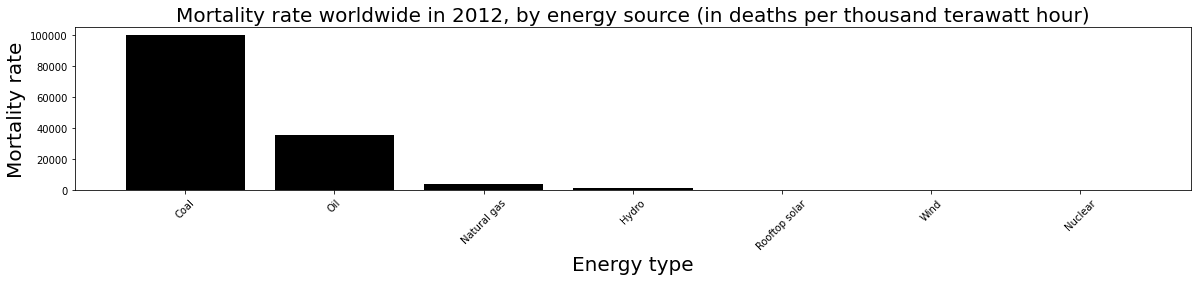

In [196]:
# bar plot of the mortality rate per each type of energy 
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.bar(data3.Energy,data3.mortality, color= 'black')
plt.title("Mortality rate worldwide in 2012, by energy source (in deaths per thousand terawatt hour)")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Mortality rate", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("mortality rate by energy source.jpg")

### Comment: 

From this bar plot we can see that the mortality rates due to the coal and oil types of energy are the highest, while the nuclear energy has the lowest mortality rate.

On contrary, as we all know, the nuclear energy is often associated with a feeling of fear among people, but is it a well-founded fear? If it is so safe, why are we afraid of it?

Specialists claim that the nuclear accidents at Three Mile Island, Chernobyl and Fukushima frightened people not because of the number of deaths that was low, but because of how governments responded and managed them, always overreacting. In fact, the panicked and frightened management of governments has always conveyed a very negative message to people about nuclear energy. 

As discussed in this [article](https://www.forbes.com/sites/michaelshellenberger/2018/06/11/if-nuclear-power-is-so-safe-why-are-we-so-afraid-of-it/?sh=90774d663859), a first step towards the improvement of this situation could be the change in gpvernments' management of a possible future nuclear accident.

# Data145

In [193]:
data145

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.000,0.000,7.903,0.000,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.000,0.000,7.374,0.000,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.000,0.000,6.909,0.000,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.000,0.000,6.063,0.000,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.000,0.509,5.773,0.000,12.142,0.030,4017.939,650285298
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,World,2015,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903,20491.034,35496406339
3196,World,2016,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901,20532.490,35452459298
3197,World,2017,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936,20675.493,35925737687
3198,World,2018,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955,20971.585,36646139785


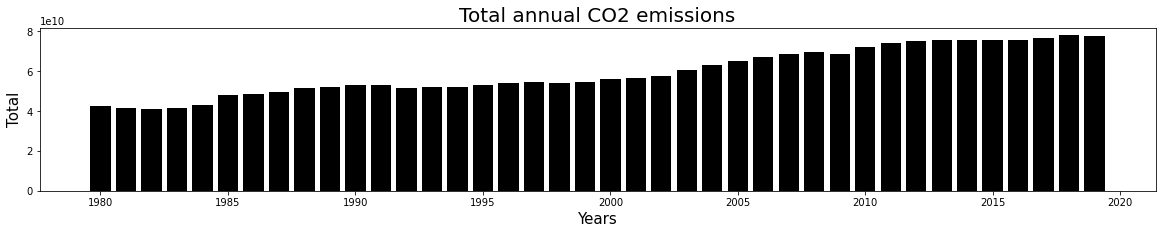

In [197]:
# annual CO2 emissions from 1980-2019

anni_unici= data145.Year.unique()

tot_CO2= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    tot_CO2[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2, color= 'black')
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Total_annual_CO2_emissions.png')

### Comment: 

In these 40 years, from 1980 to 2019, the total annual CO2 emissions has almost doubled. This reflectes the big changes in the society we are living in. We consume a lot and we have a really big impact on the enviroment. These CO2 levels need to be a huge warning for all of us.

In many coutries, it is common to start taking care of this problem, but unfortunately this is not true in all the world.

In [ ]:
# annual energy per capita 

energy_capita= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    energy_capita[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2, color= 'black')
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Total_annual_CO2_emissions.png')

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_9679/2071075570.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data55 = data5.melt(id_vars=['Entity'], var_name='Year', value_name='Annual CO2 emissions')


<AxesSubplot:xlabel='Year', ylabel='Annual CO2 emissions'>

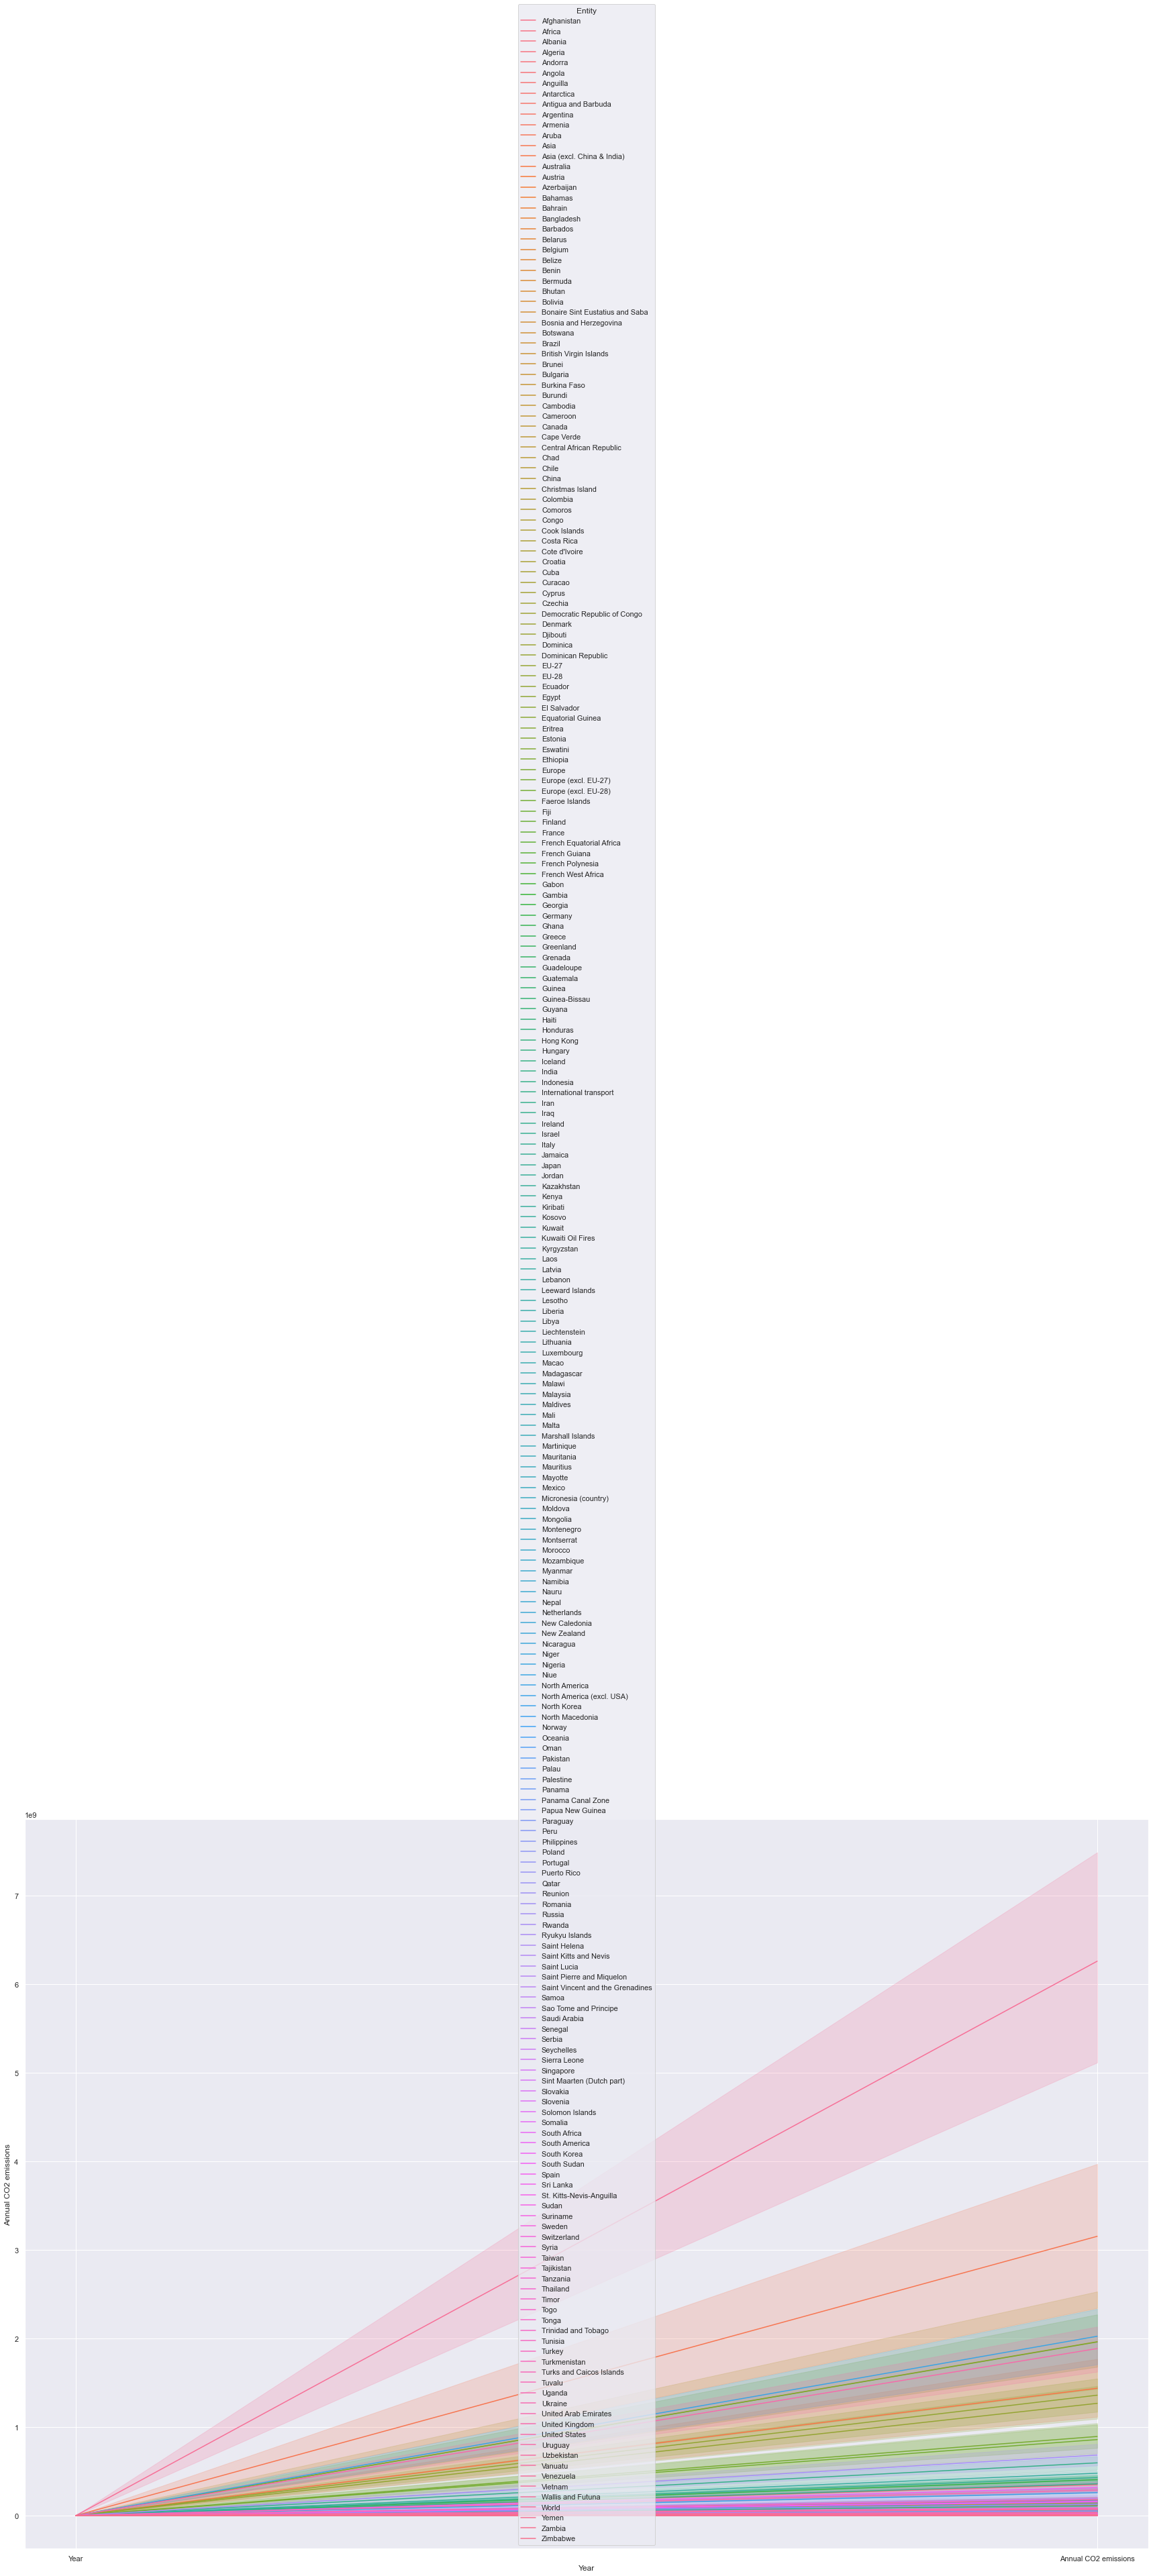

In [30]:
# plot multiple line(one for each country) from 1949 to 2020 of the CO2 emissions

#data5.groupby("Entity").plot.line(x= 'Year', y= 'Annual CO2 emissions')

import seaborn as sns
data55 = data5.melt(id_vars=['Entity'], var_name='Year', value_name='Annual CO2 emissions')
sns.set(rc = {'figure.figsize':(30,20)})
sns.lineplot(x='Year', y='Annual CO2 emissions', hue='Entity', data=data55)

## Viz for the video: 
what is the size of the data? what are other properties?
what is the data range? is it geo-data?

* 4284 rows
* 11 columns ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables', 'Annual CO2 emissions']
* from 1965 to 2019 
* 82 countries + World

In [31]:
#merging data4 and data5 by common columns Entity and Year
data45 = pd.merge(data4, data5, on=['Entity','Year'])
#renaming columns
data45.columns = ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables', 'Annual CO2 emissions']
data45.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Annual CO2 emissions
0,Africa,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0,213784592
1,Africa,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0,221261615
2,Africa,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0,237257662
3,Africa,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0,257600231
4,Africa,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0,278139487


In [32]:
print(data45.shape)
data45.Country.unique()

(4284, 11)


array(['Africa', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United A

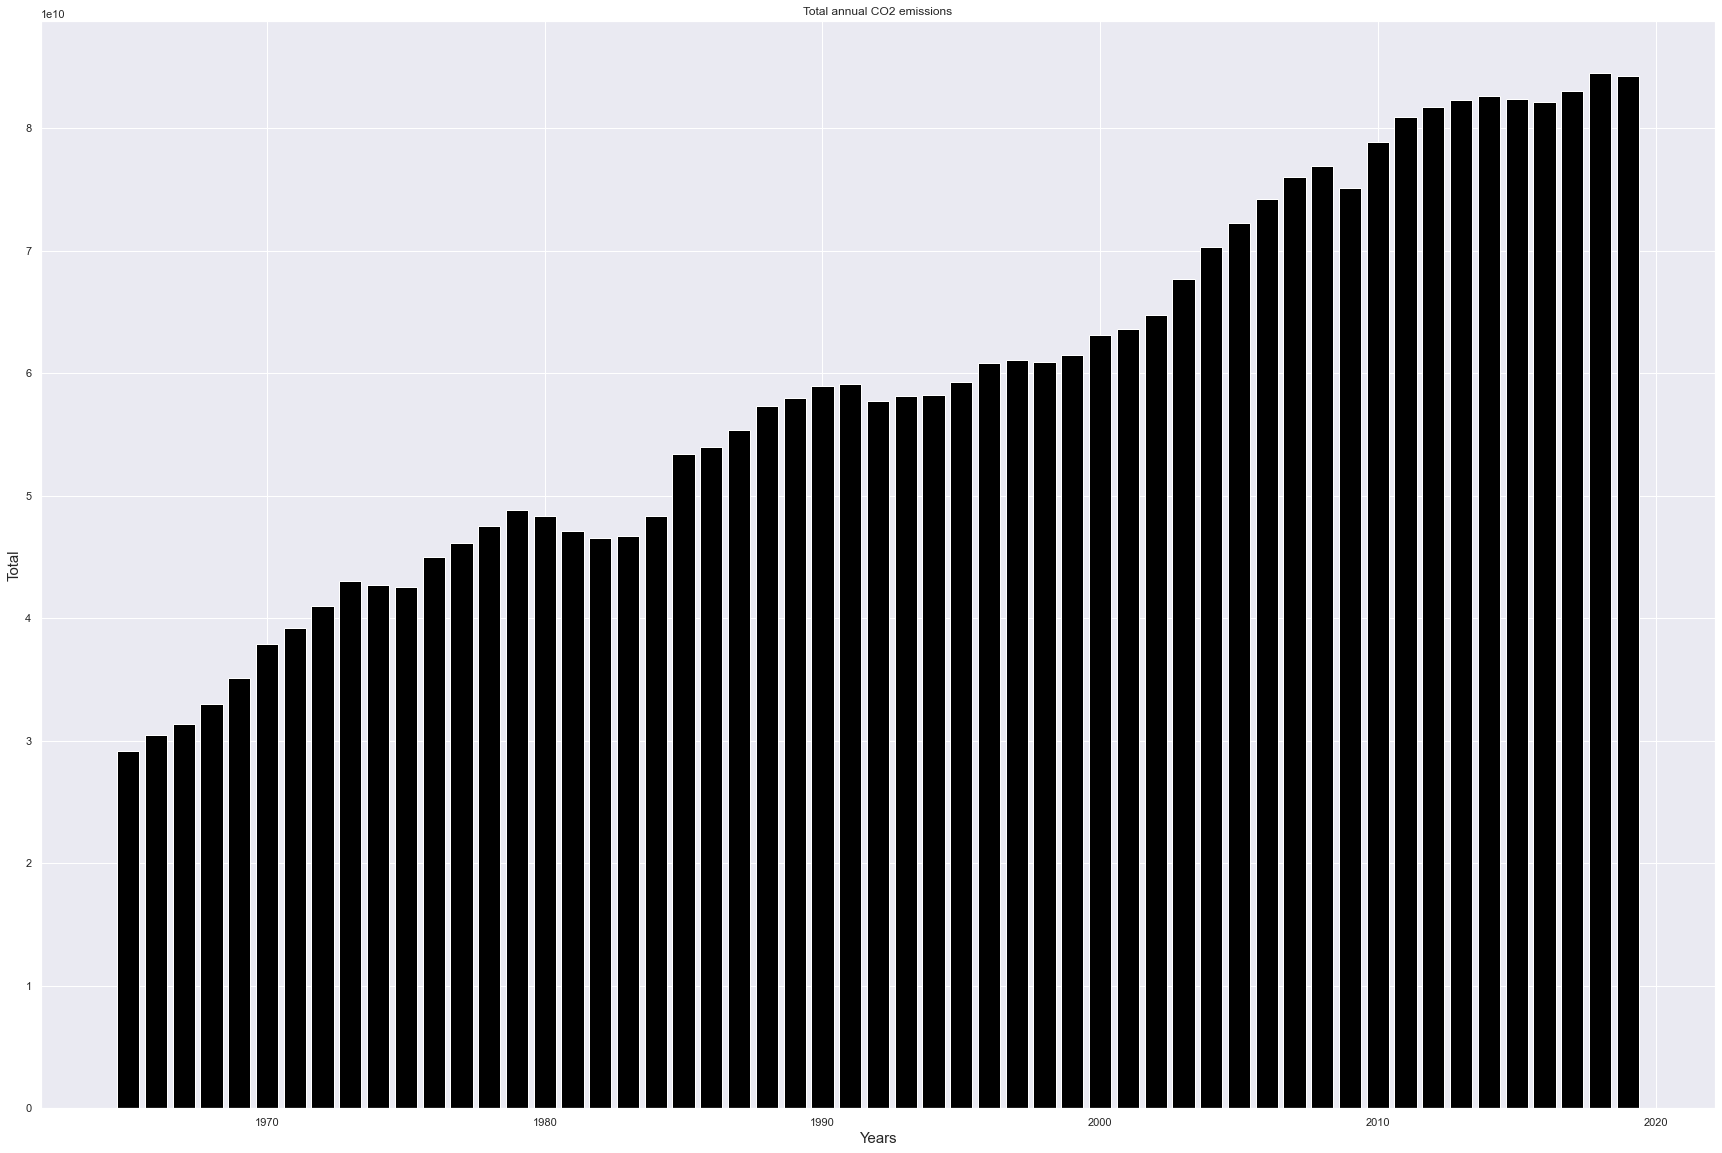

In [33]:
import matplotlib.pyplot as plt
import numpy as np

data45= data45[data45.Year > 1964]
data45= data45[data45.Year < 2020]
data45.head()

anni_unici= data45.Year.unique()

tot_CO2= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data45[data45['Year']== anno]
    tot_CO2[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2, color= 'black')
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
fig.savefig('Total_annual_CO2_emissions.png')

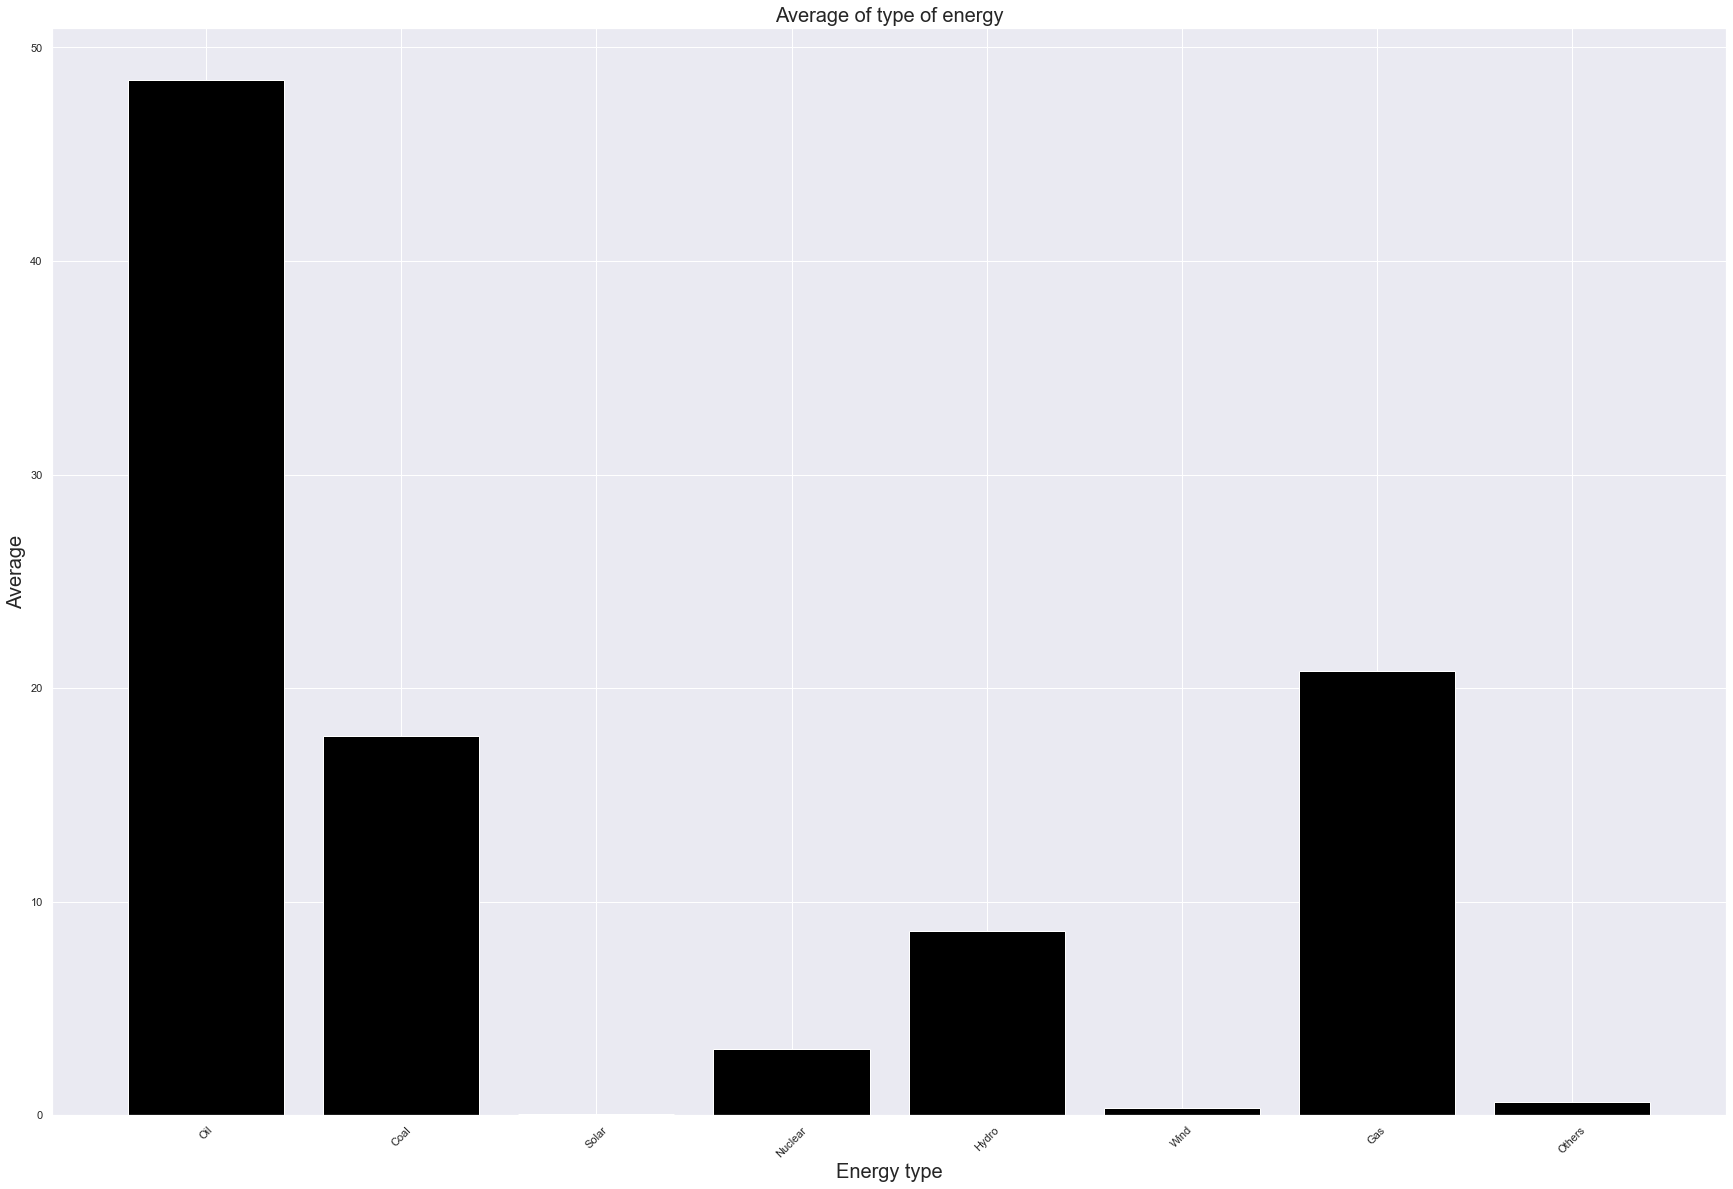

In [34]:
# bar plot con le medie dei tipi di energia

mean_oil= data45['Oil'].mean()
mean_coal= data45['Coal'].mean()
mean_solar= data45['Solar'].mean()
mean_nuclear= data45['Nuclear'].mean()
mean_hydro= data45['Hydro'].mean()
mean_wind= data45['Wind'].mean()
mean_gas= data45['Gas'].mean()
mean_otherren= data45['Others renewables'].mean()

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']
means=[mean_oil, mean_coal, mean_solar, mean_nuclear, mean_hydro, mean_wind, mean_gas, mean_otherren]

fig = plt.figure()
plt.bar(energy_type,means, color= 'black')
plt.title("Average of type of energy")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Average", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
fig.savefig("average_type_of_energy.jpg")

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_9679/20150581.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


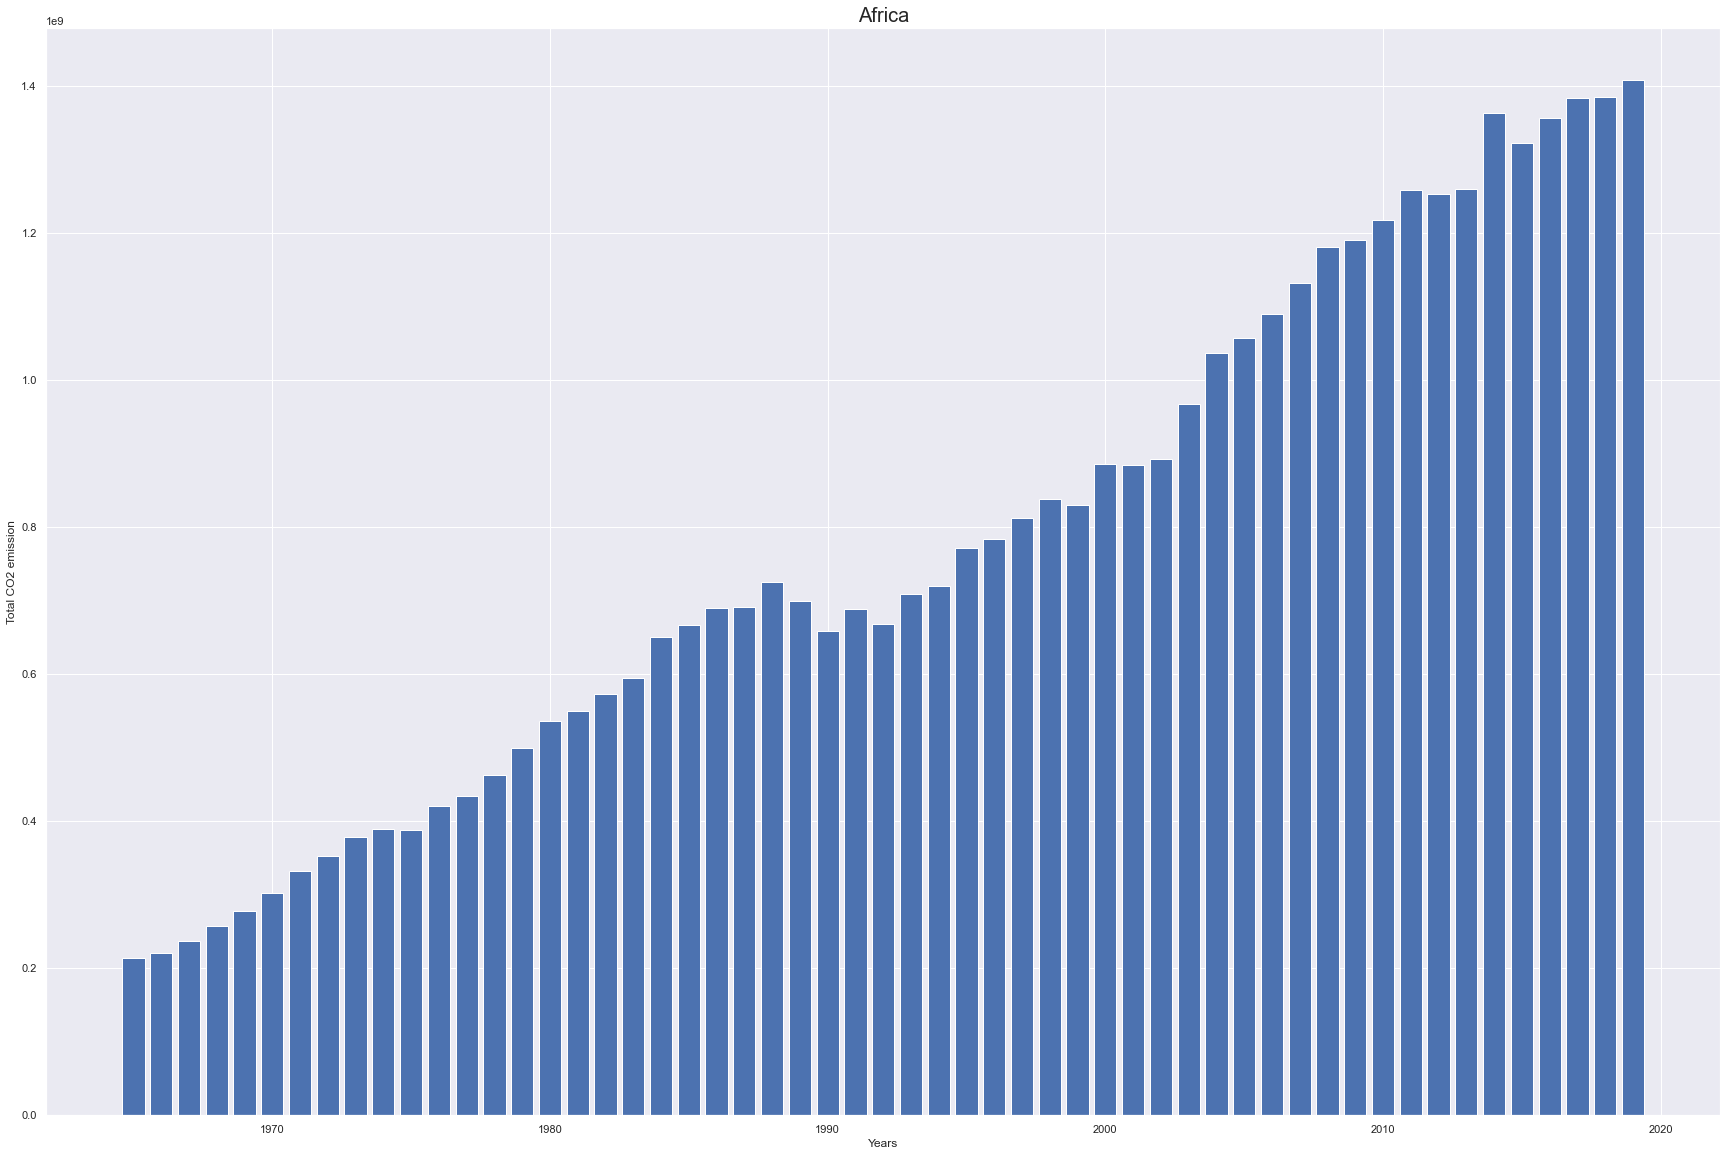

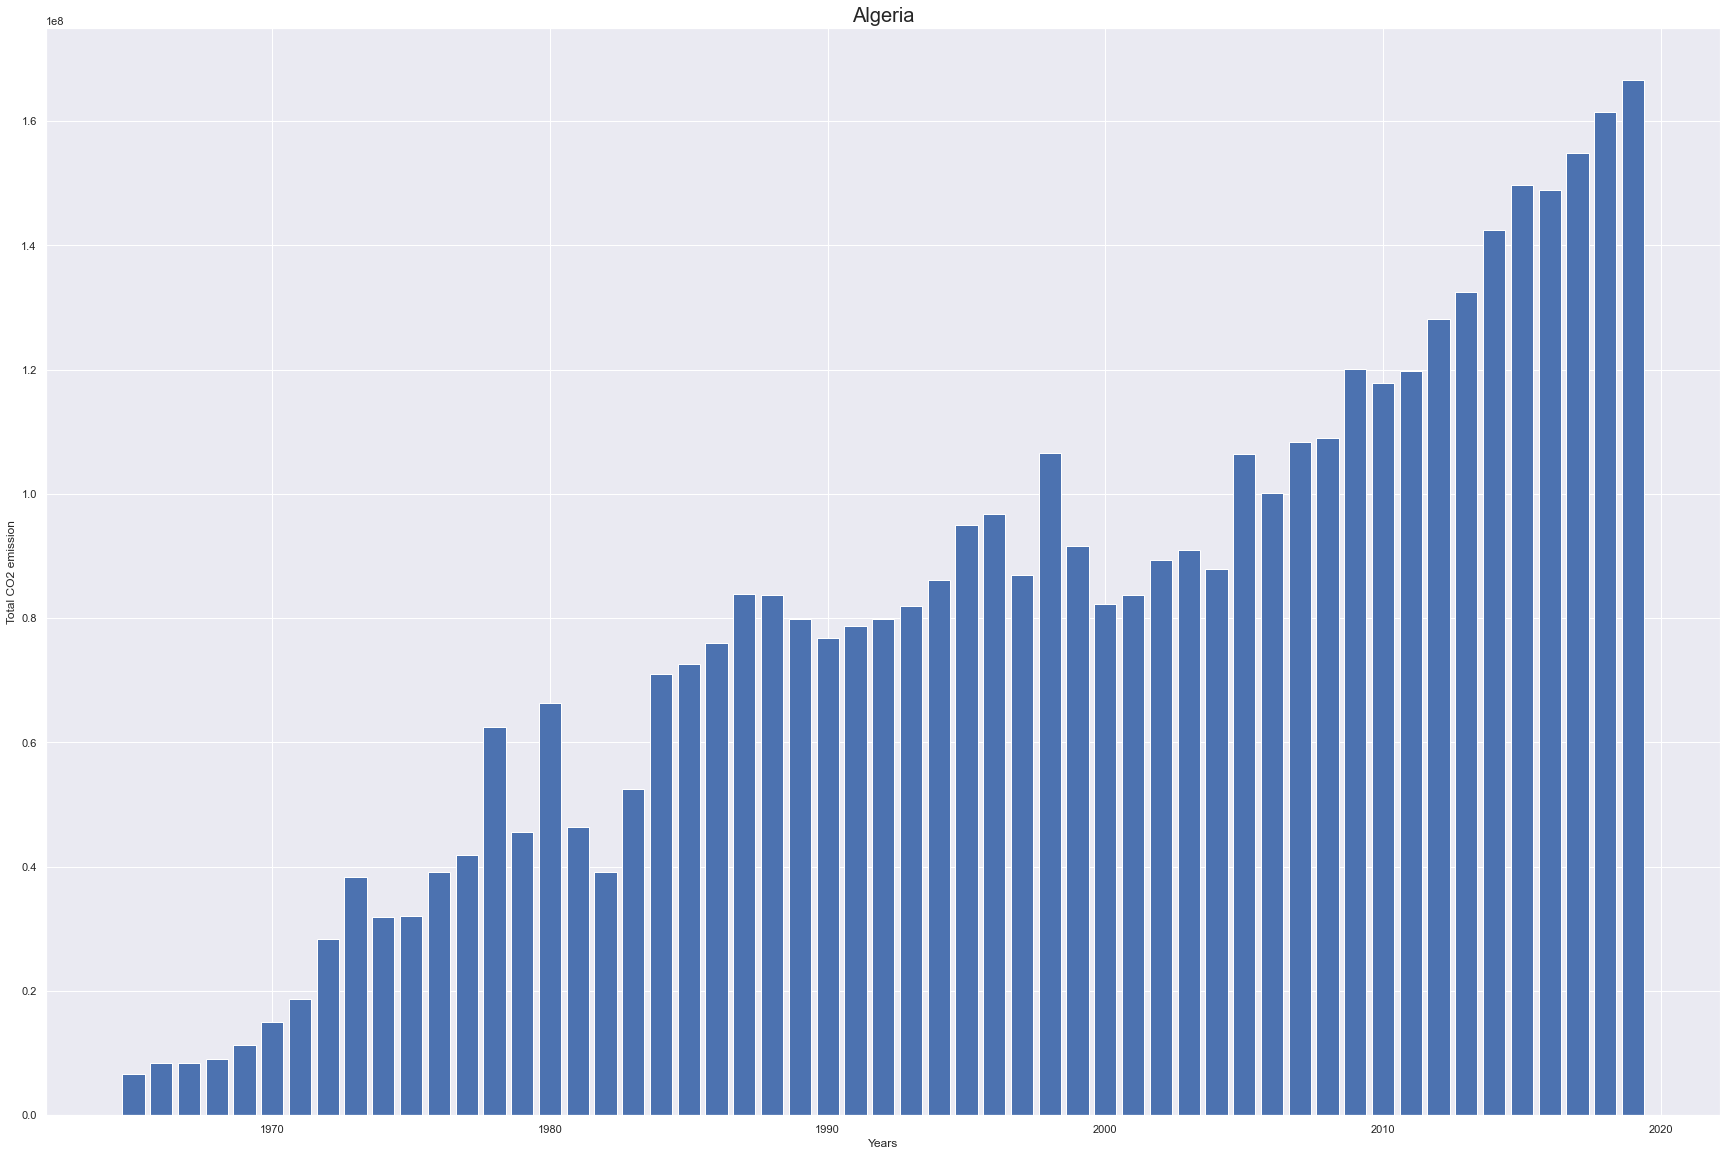

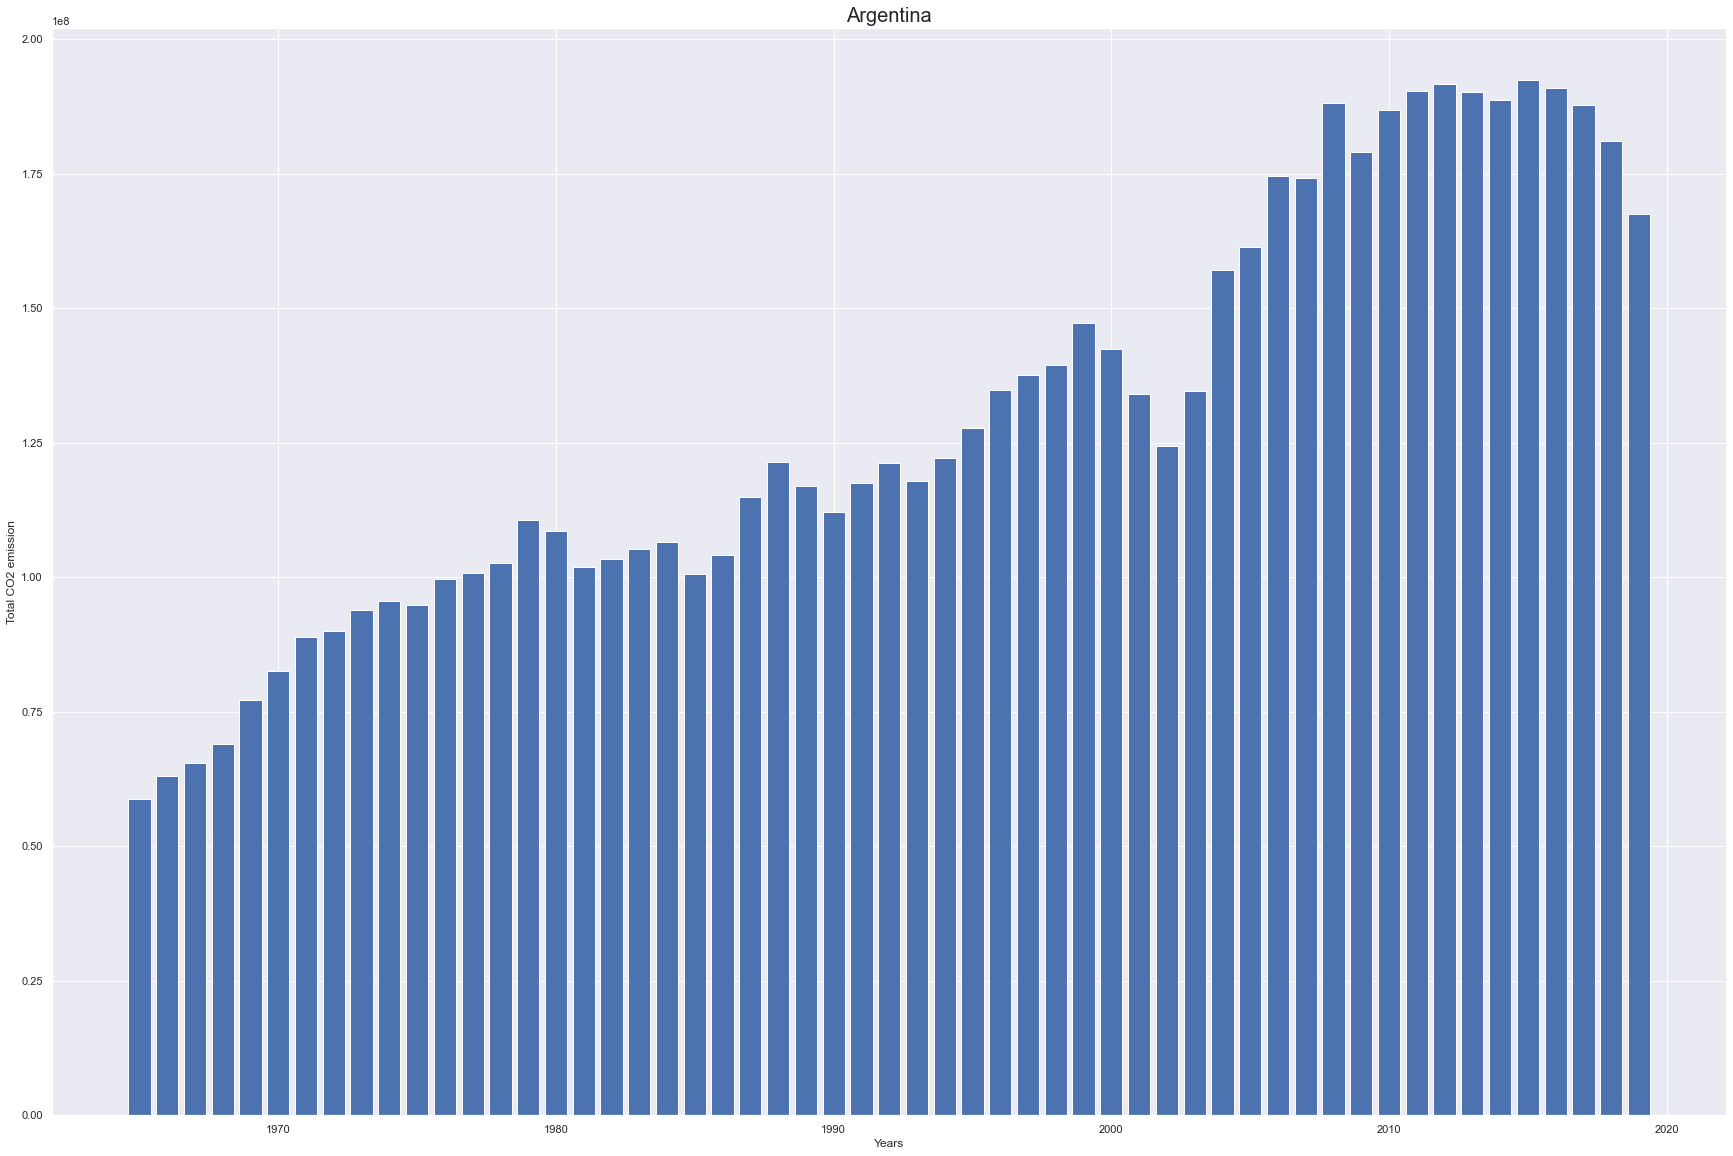

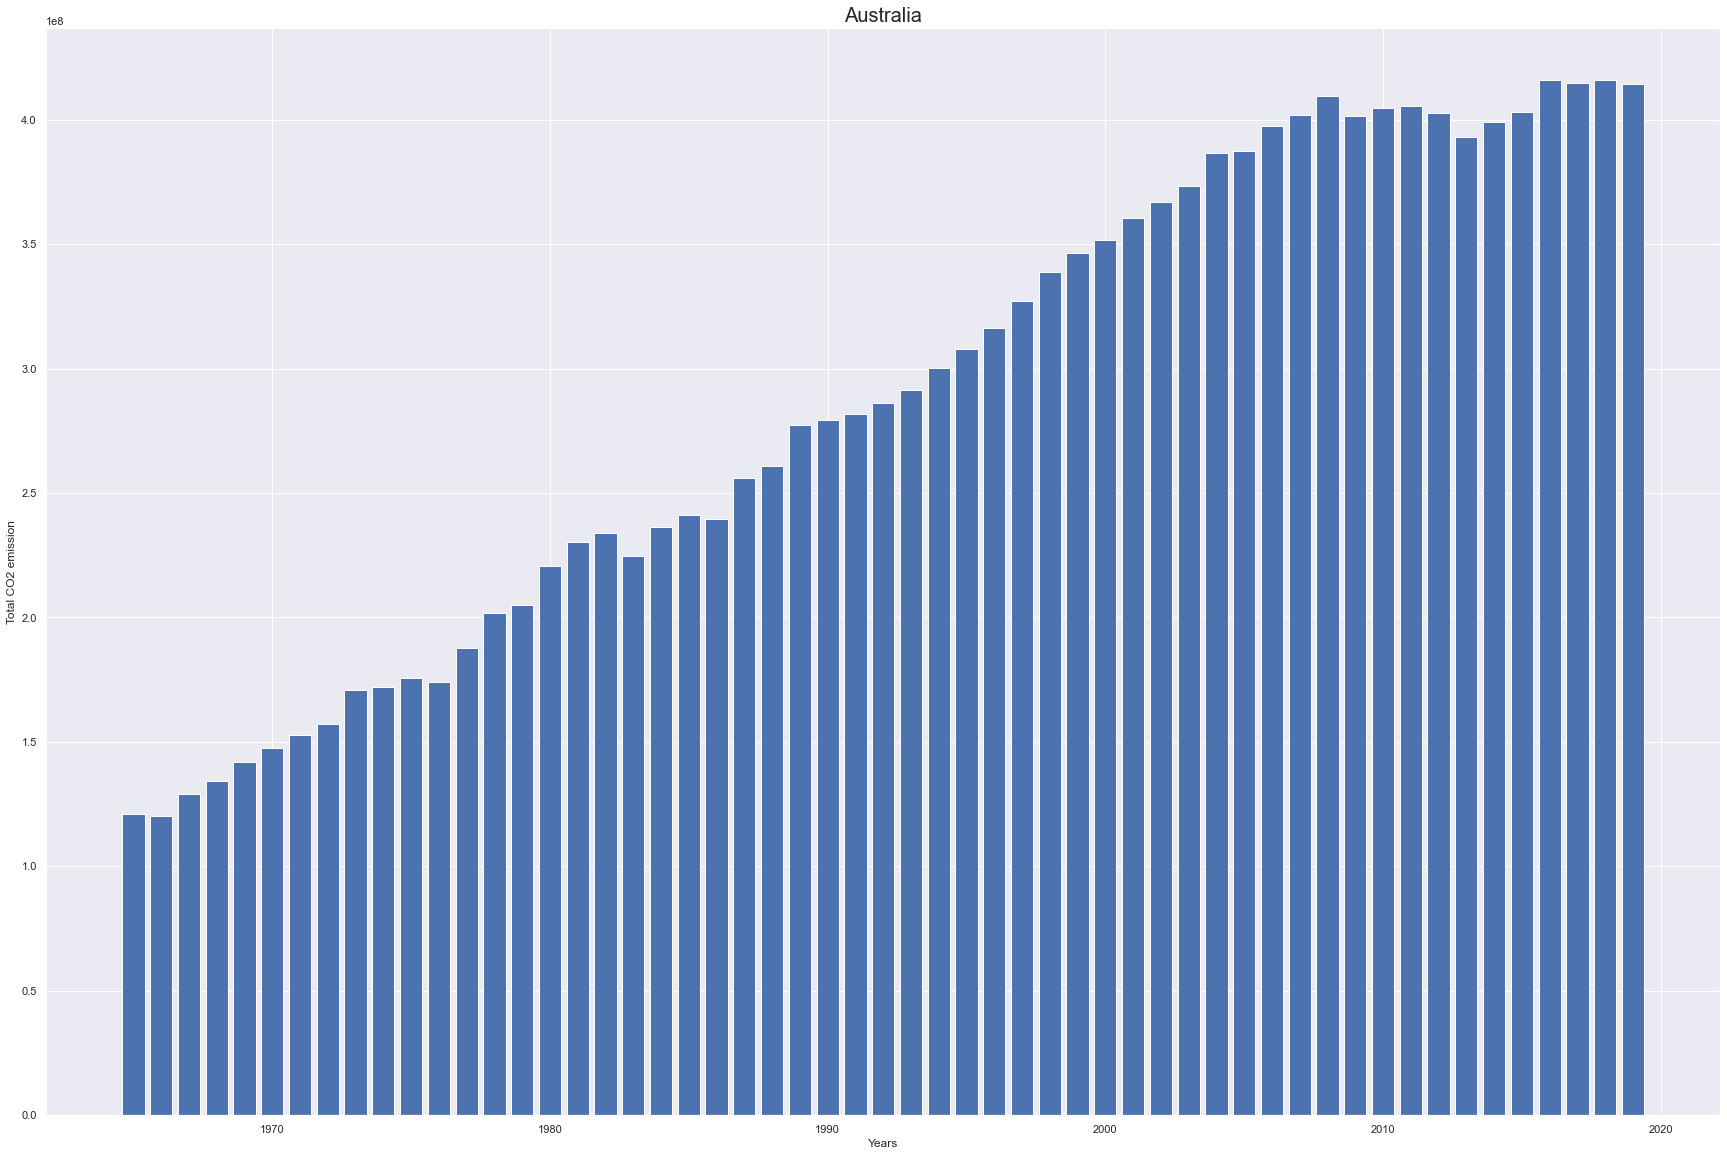

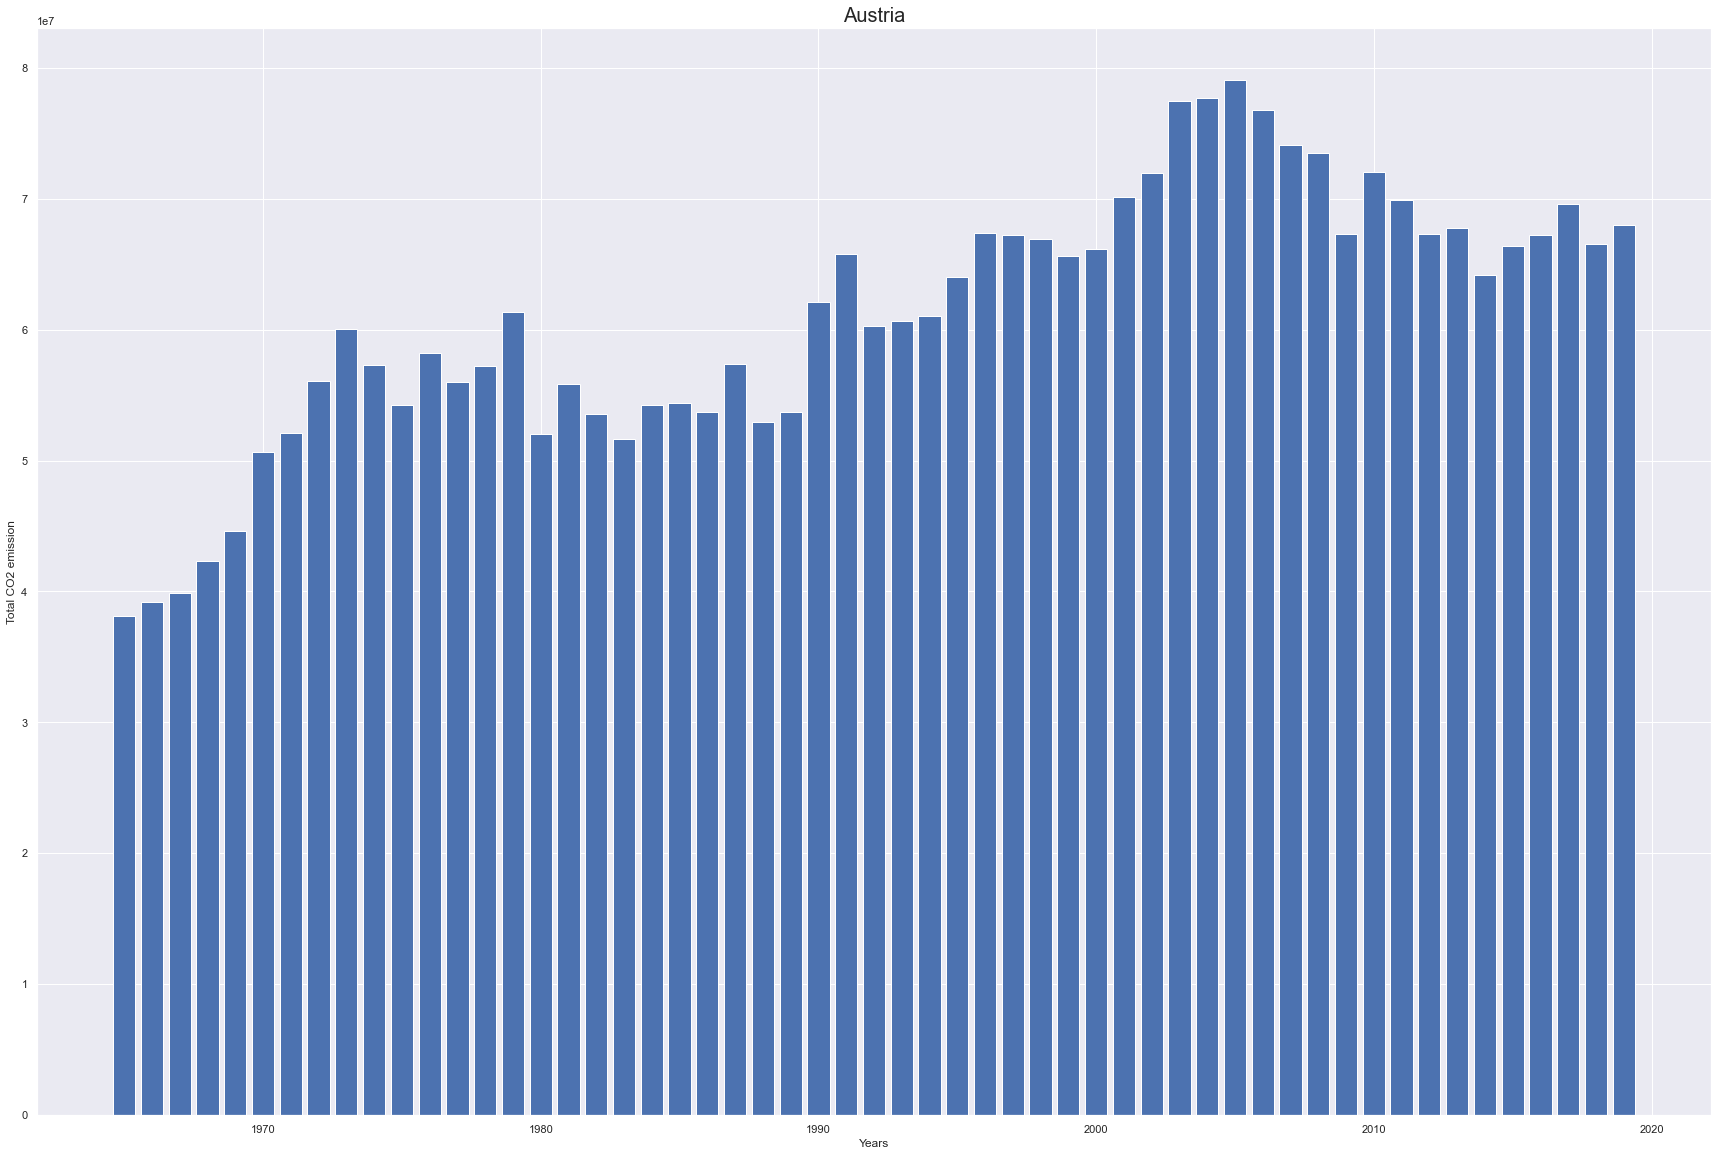

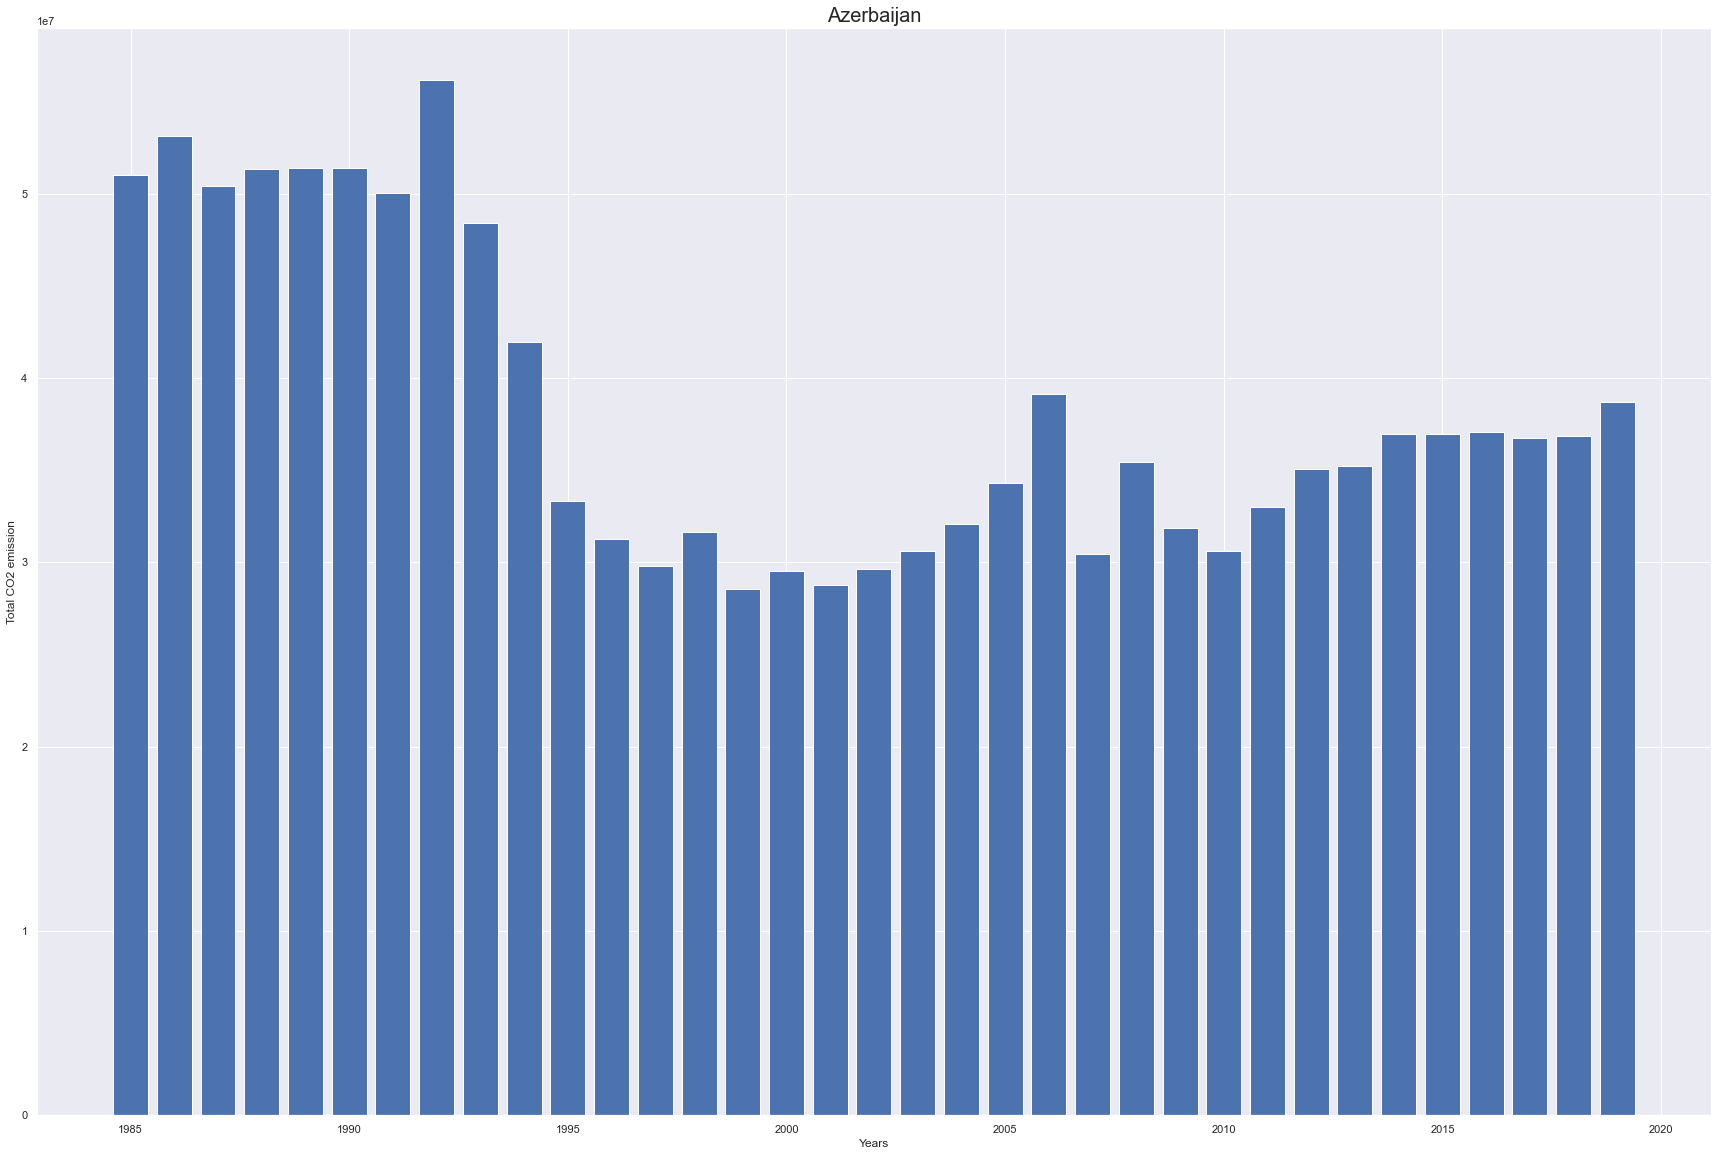

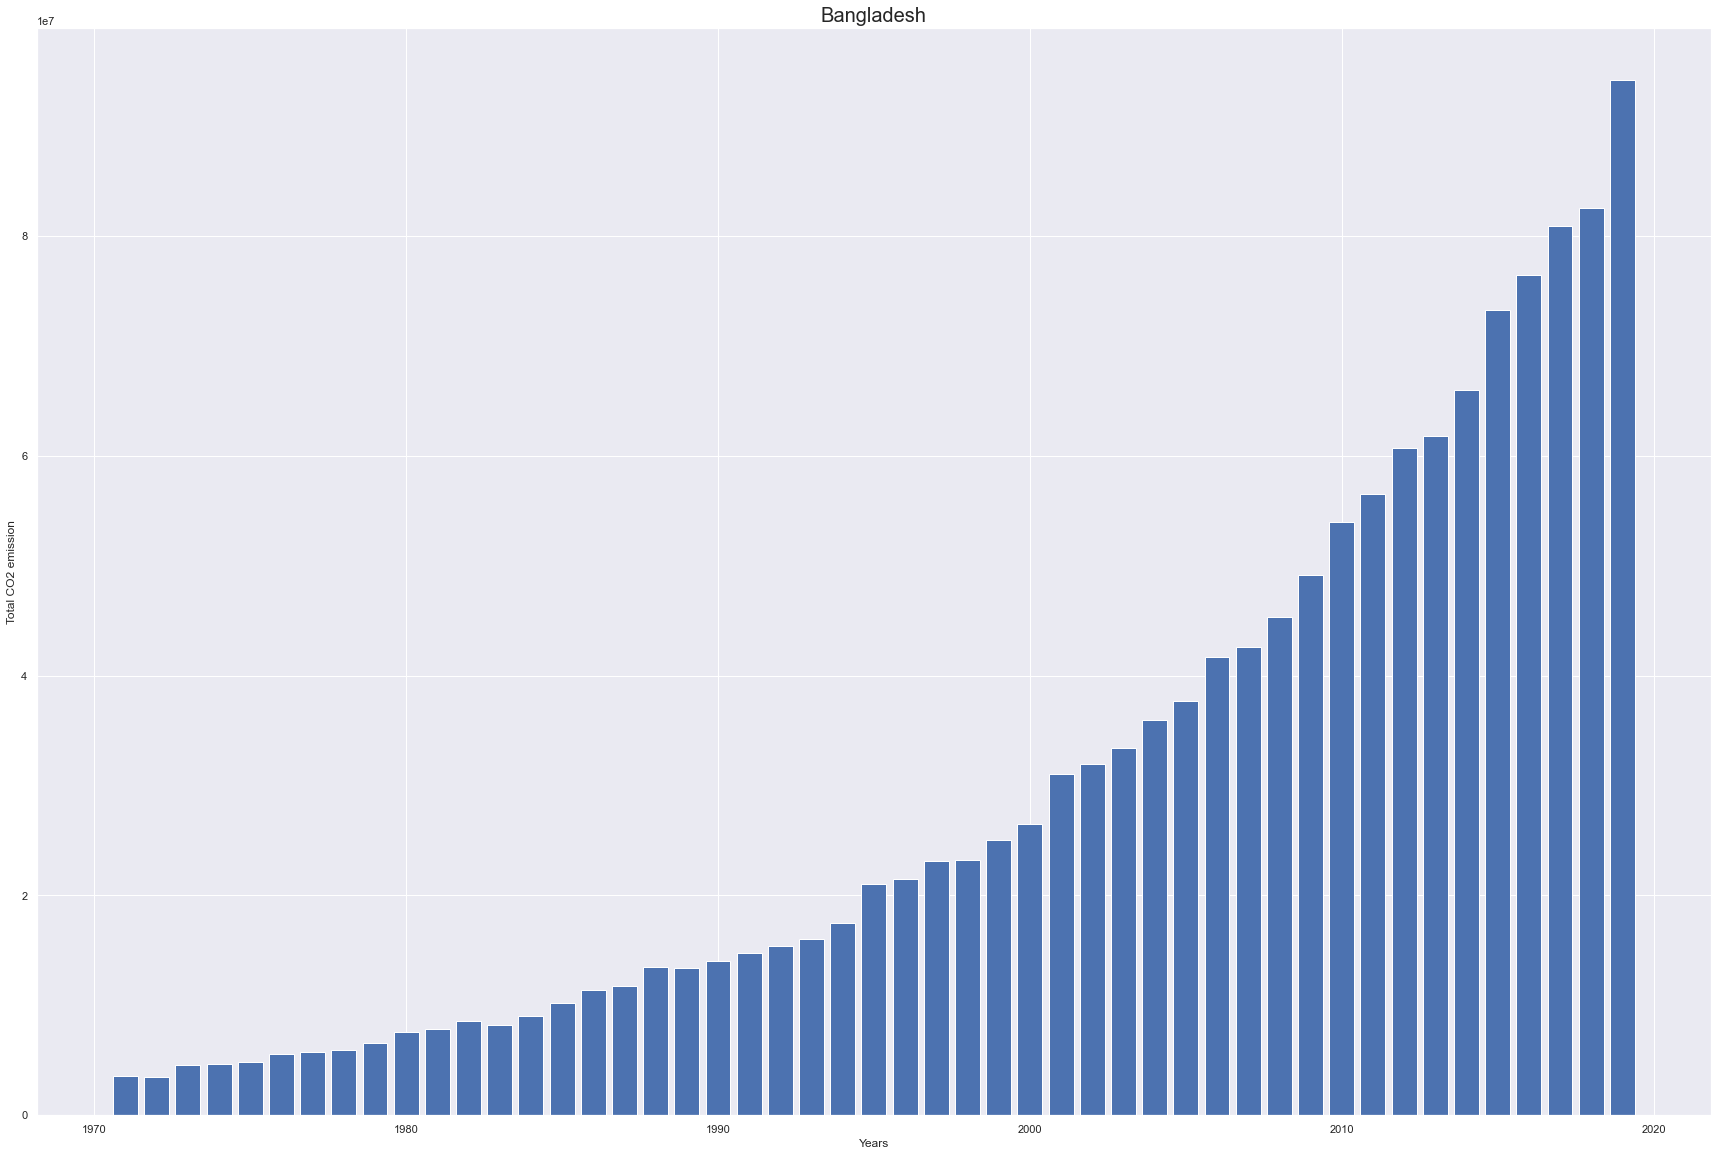

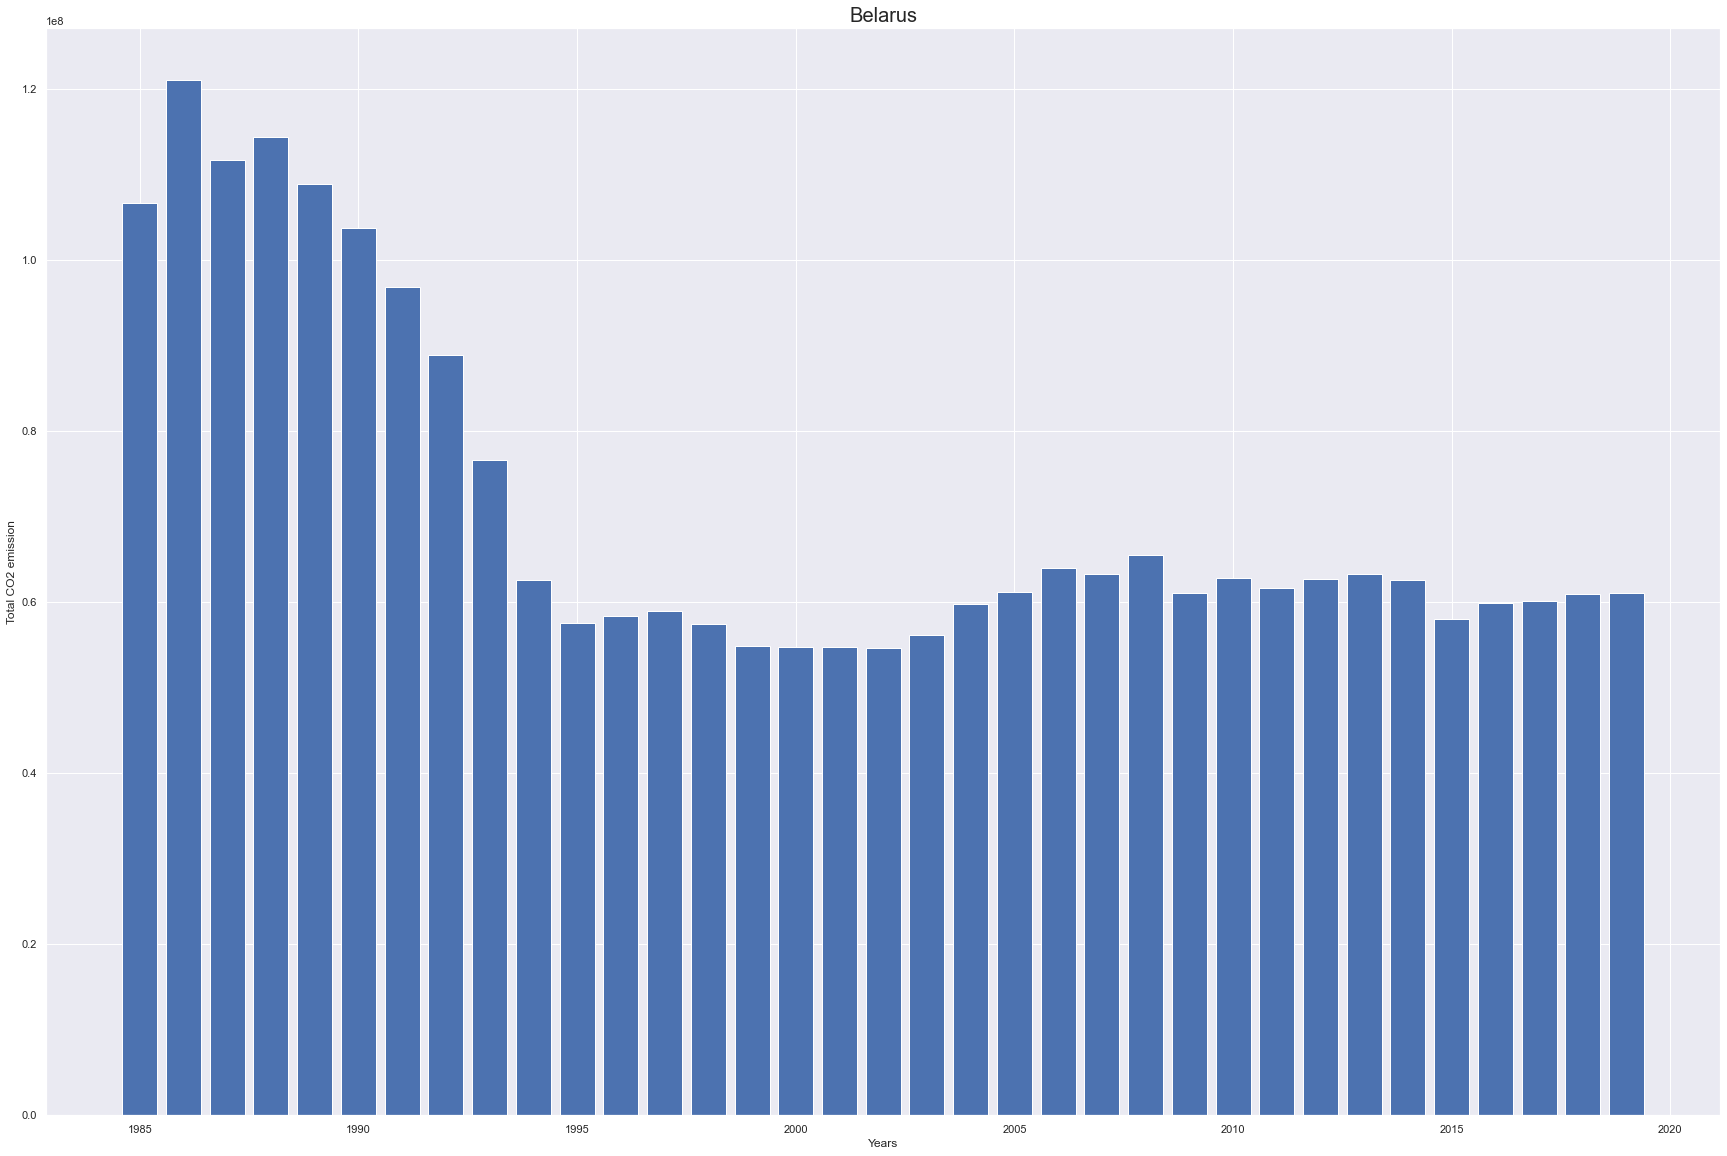

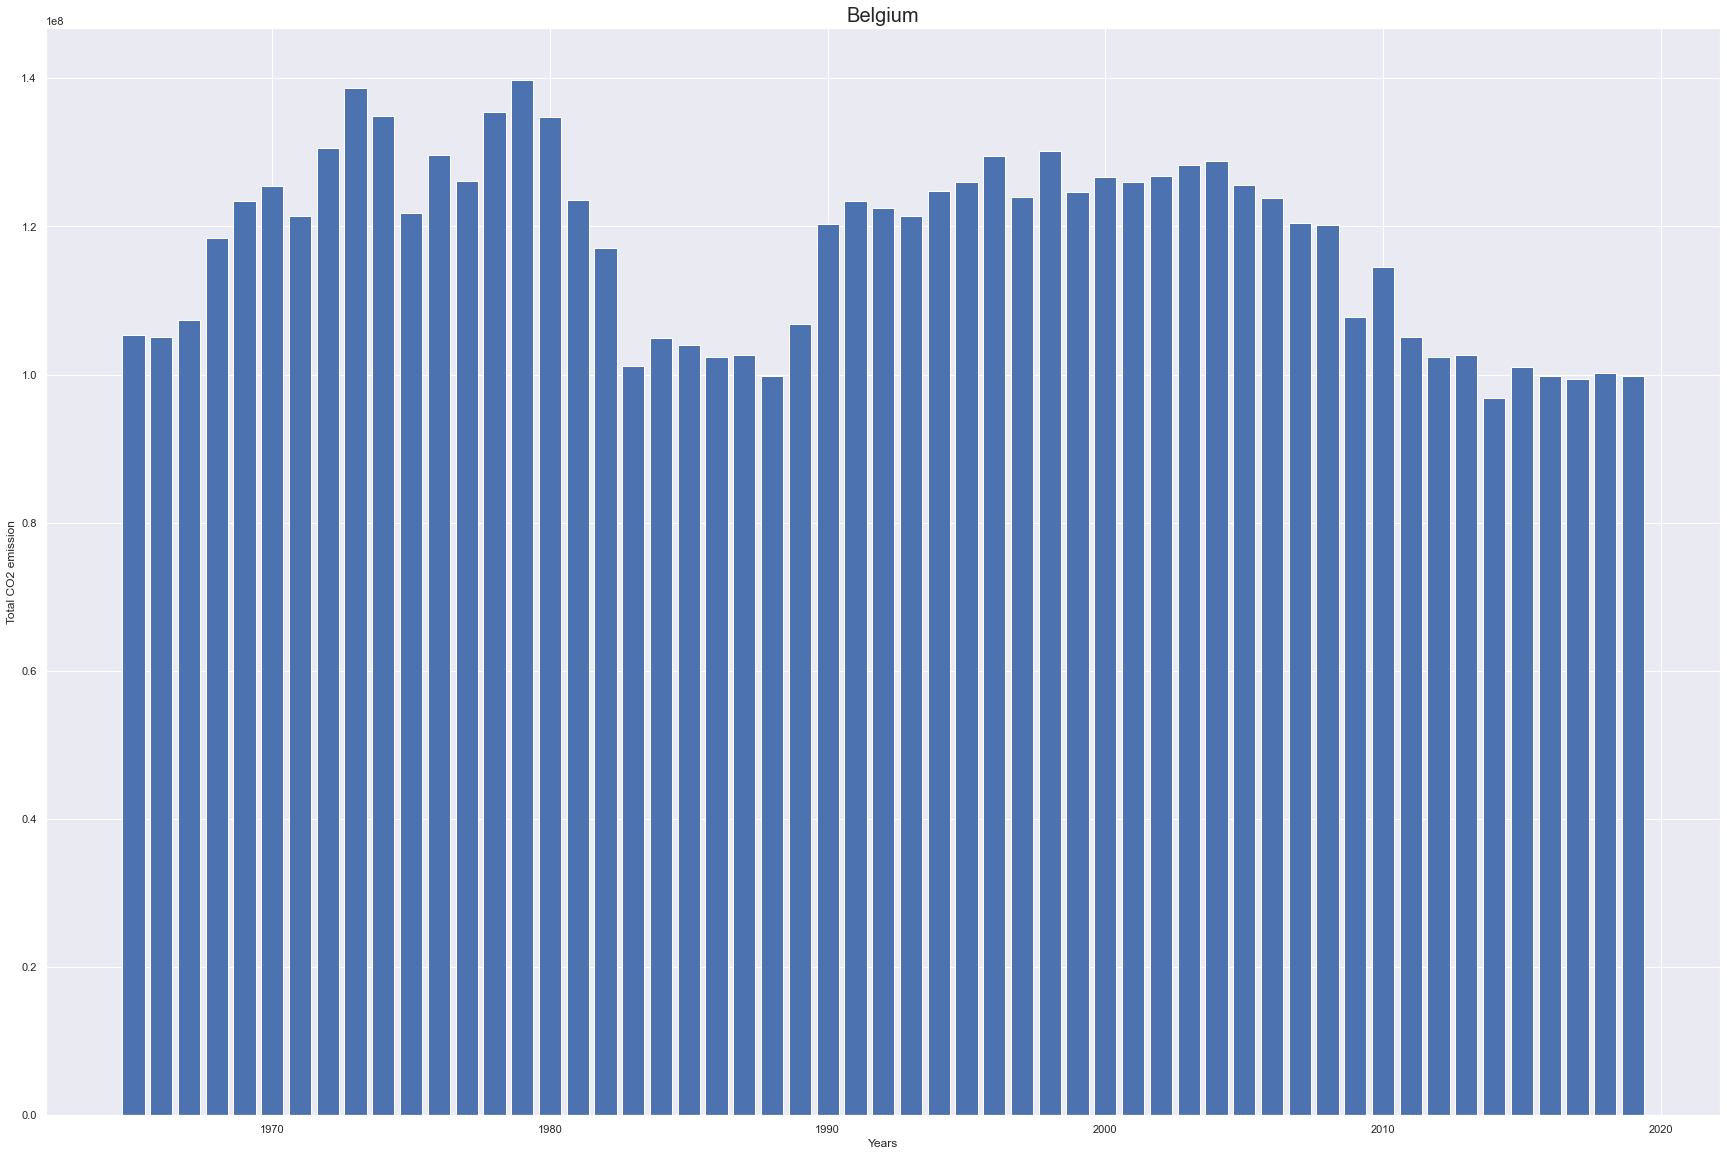

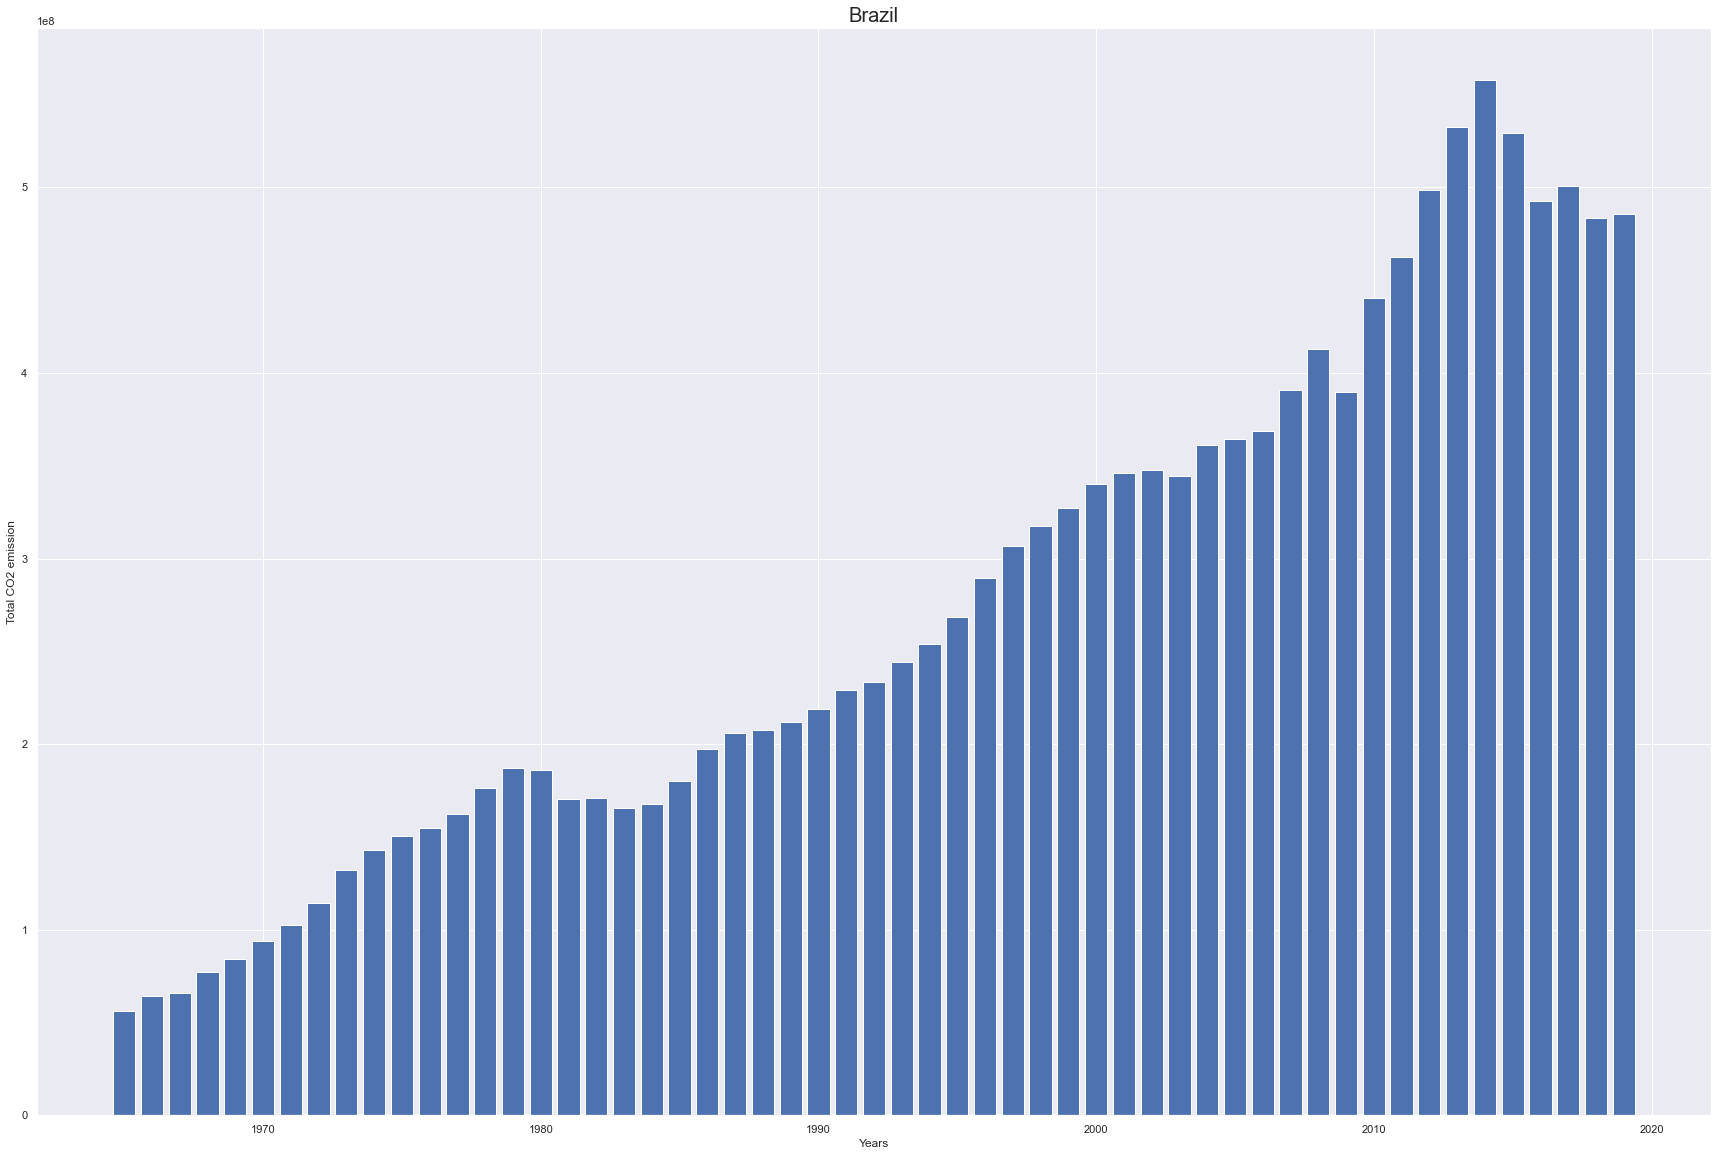

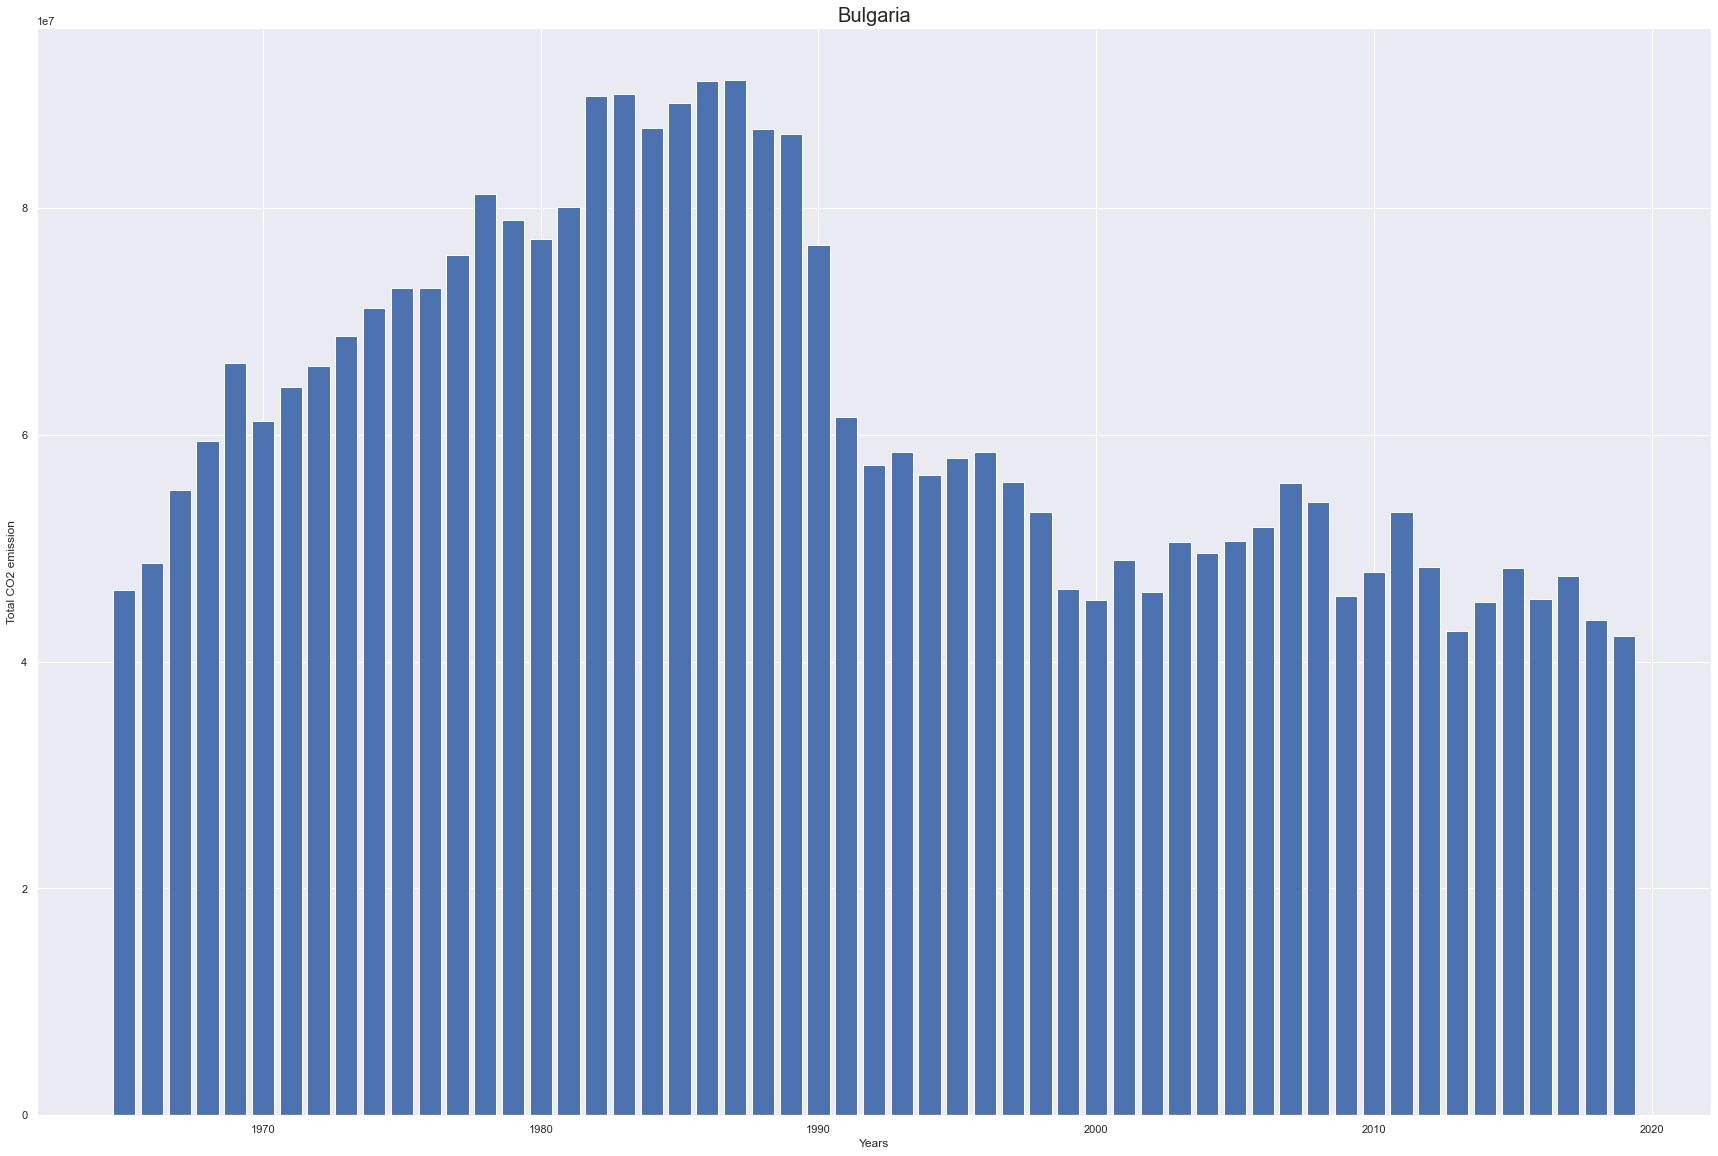

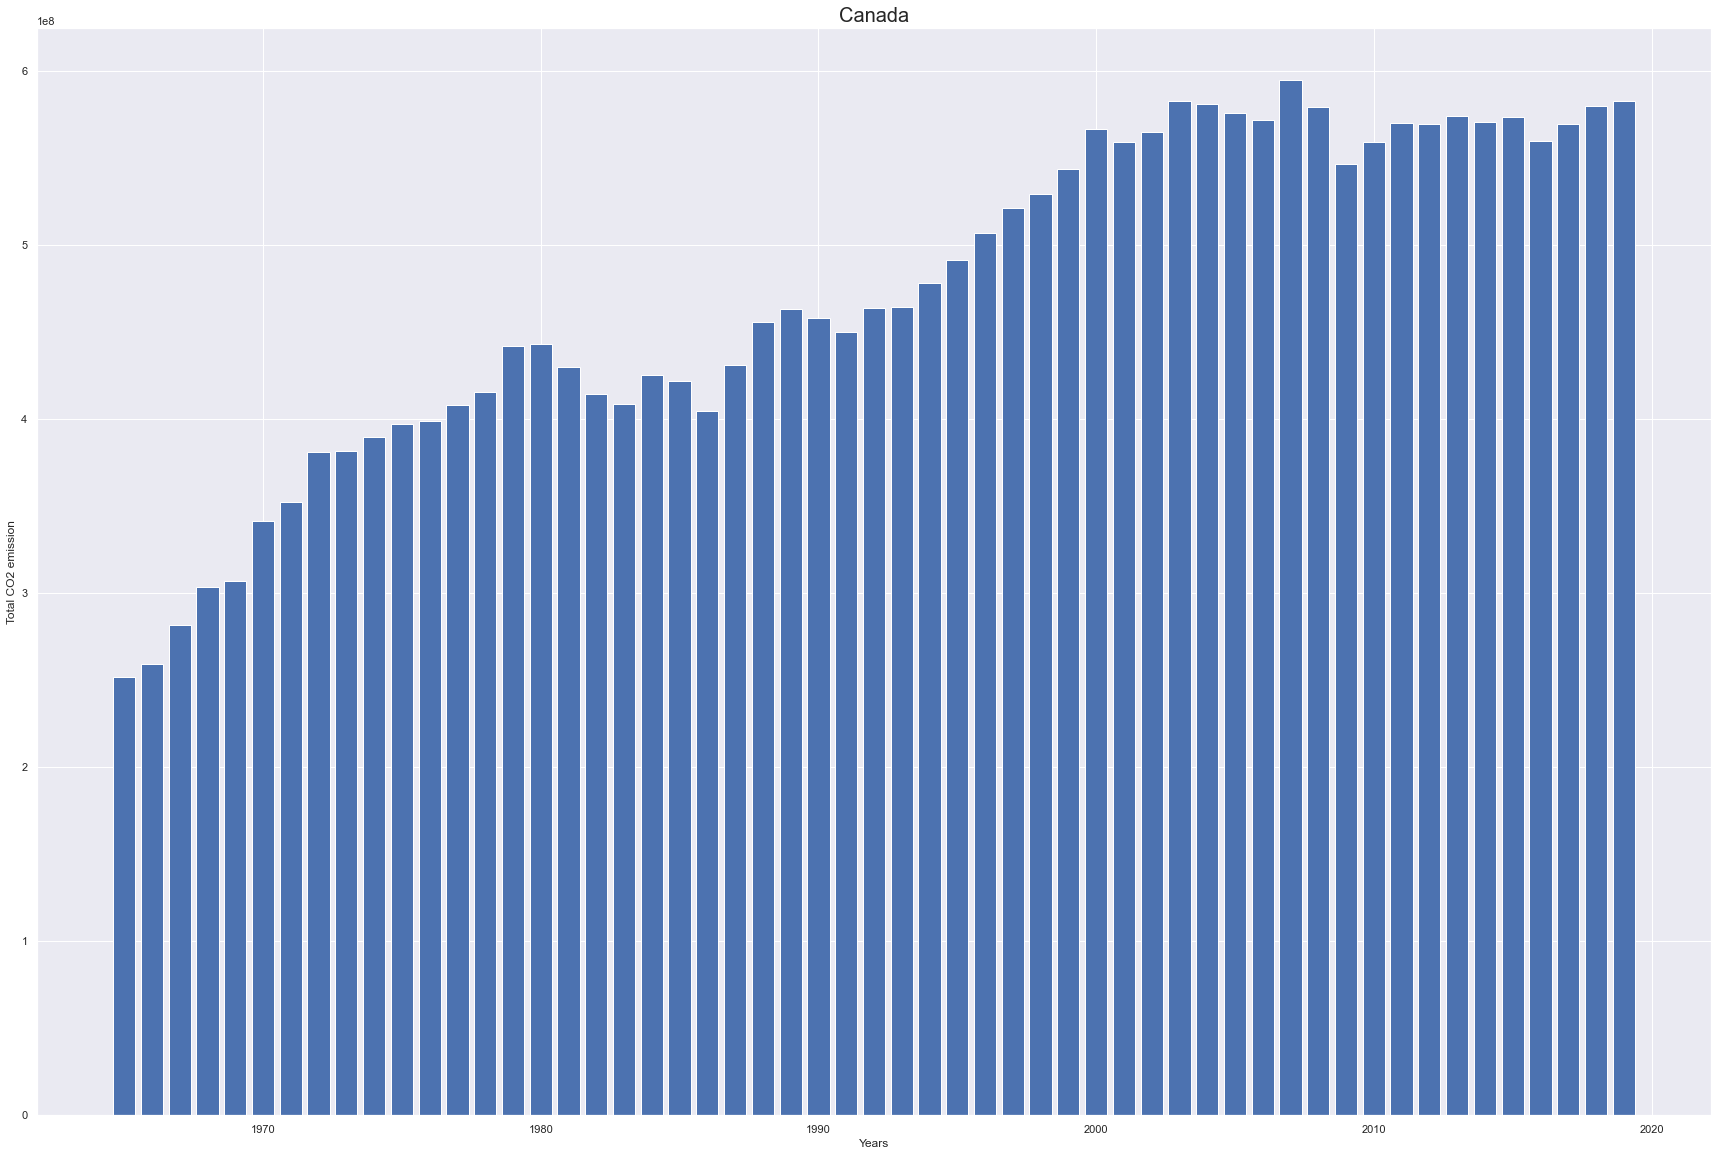

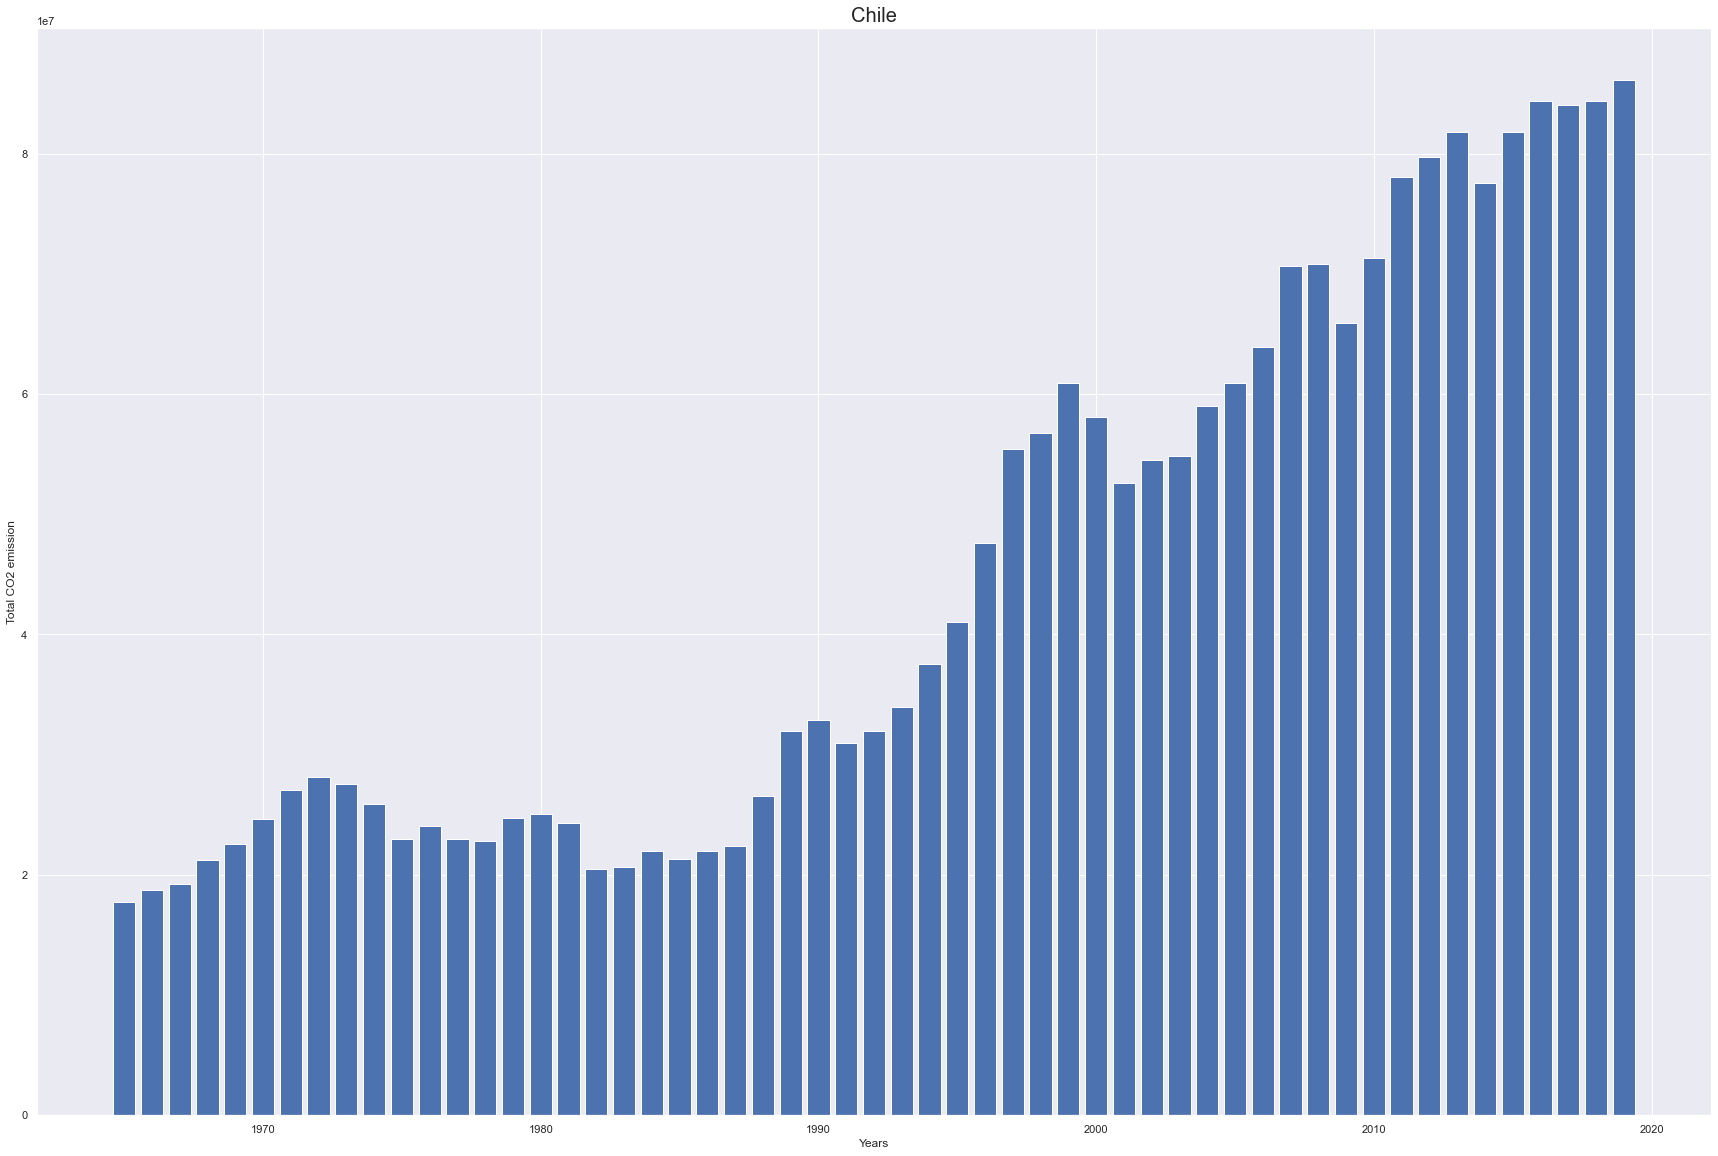

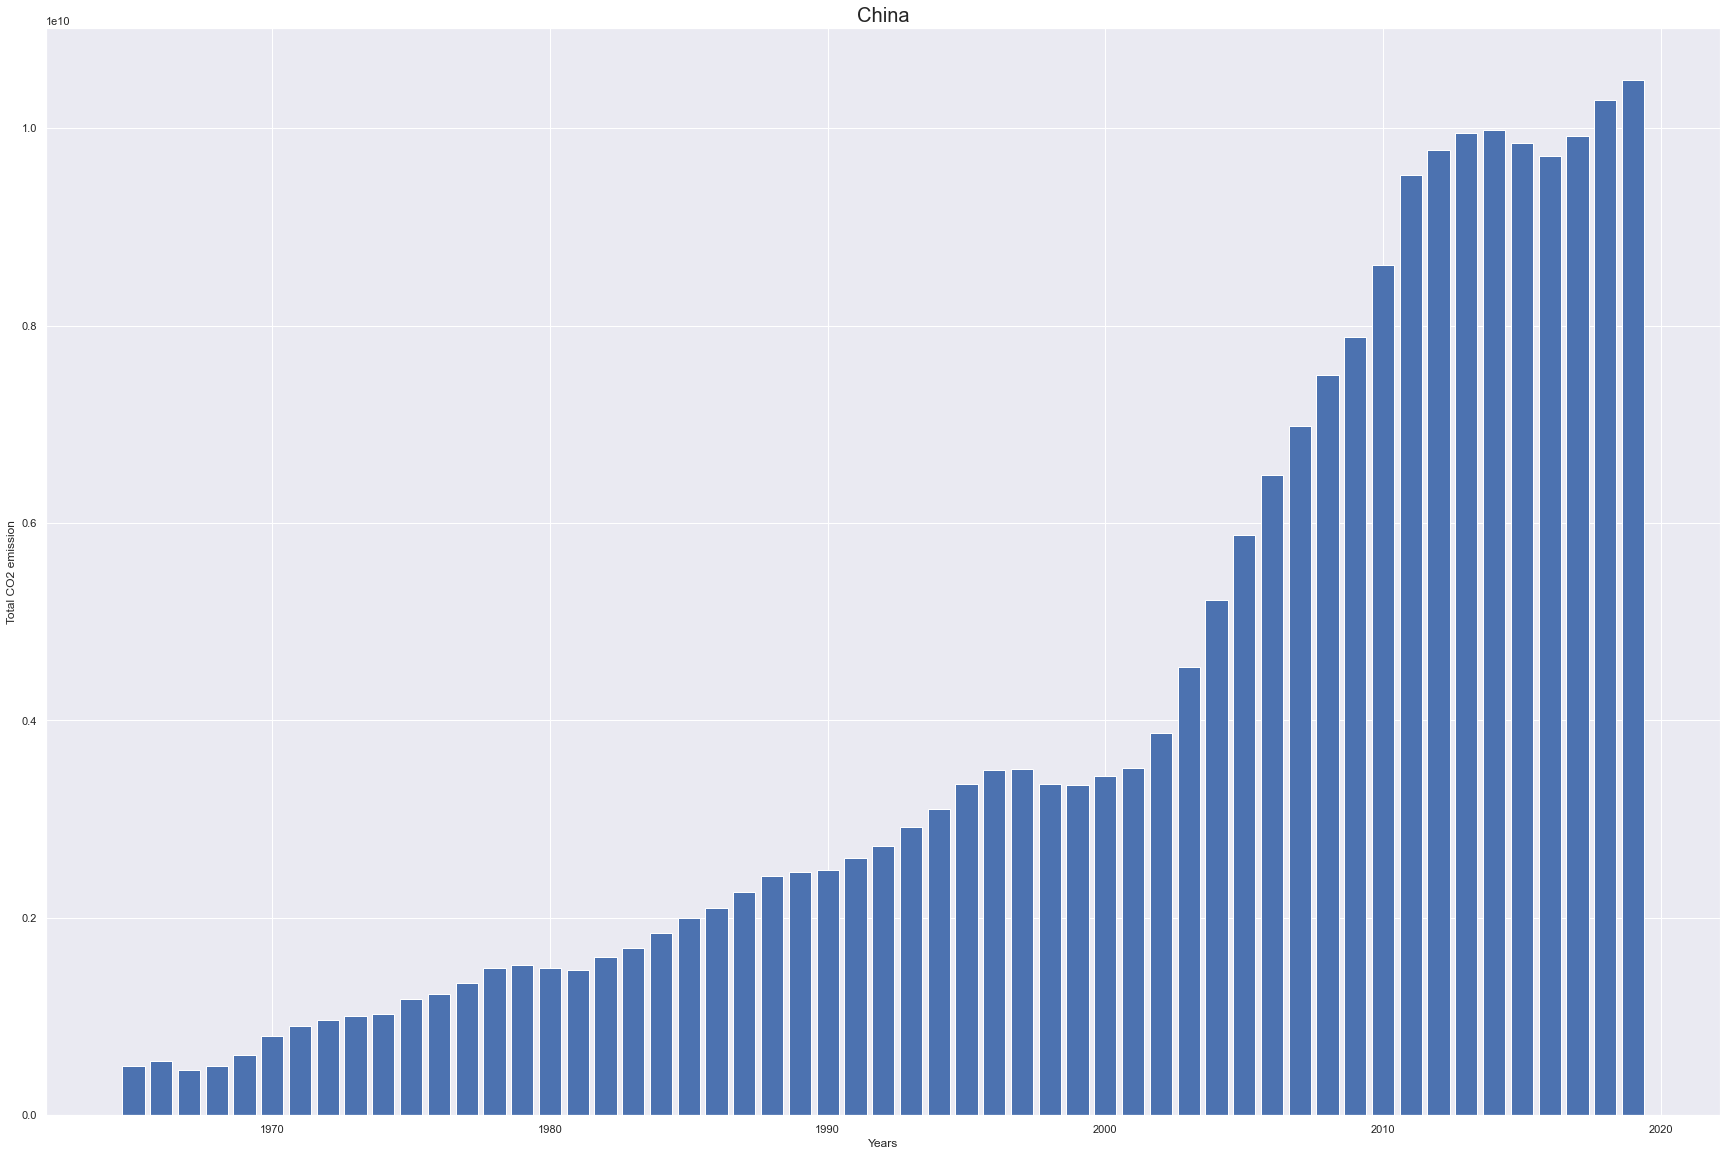

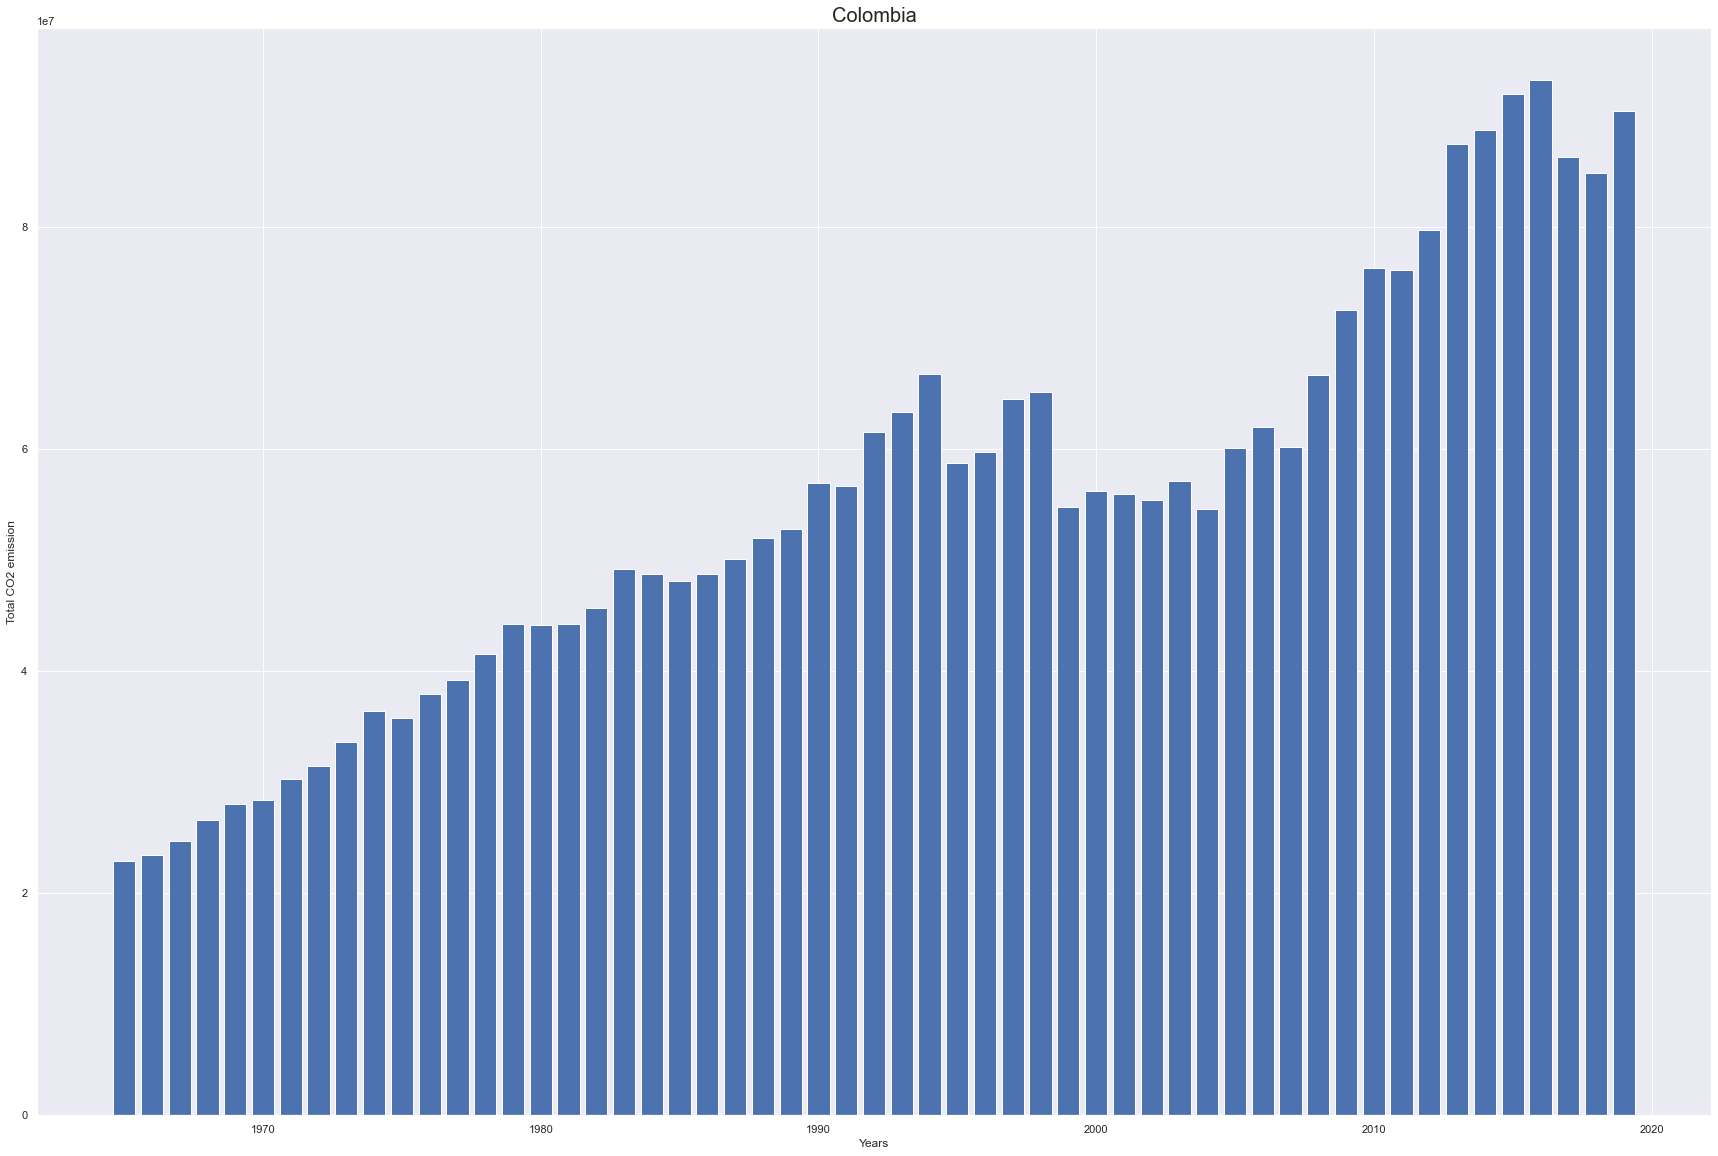

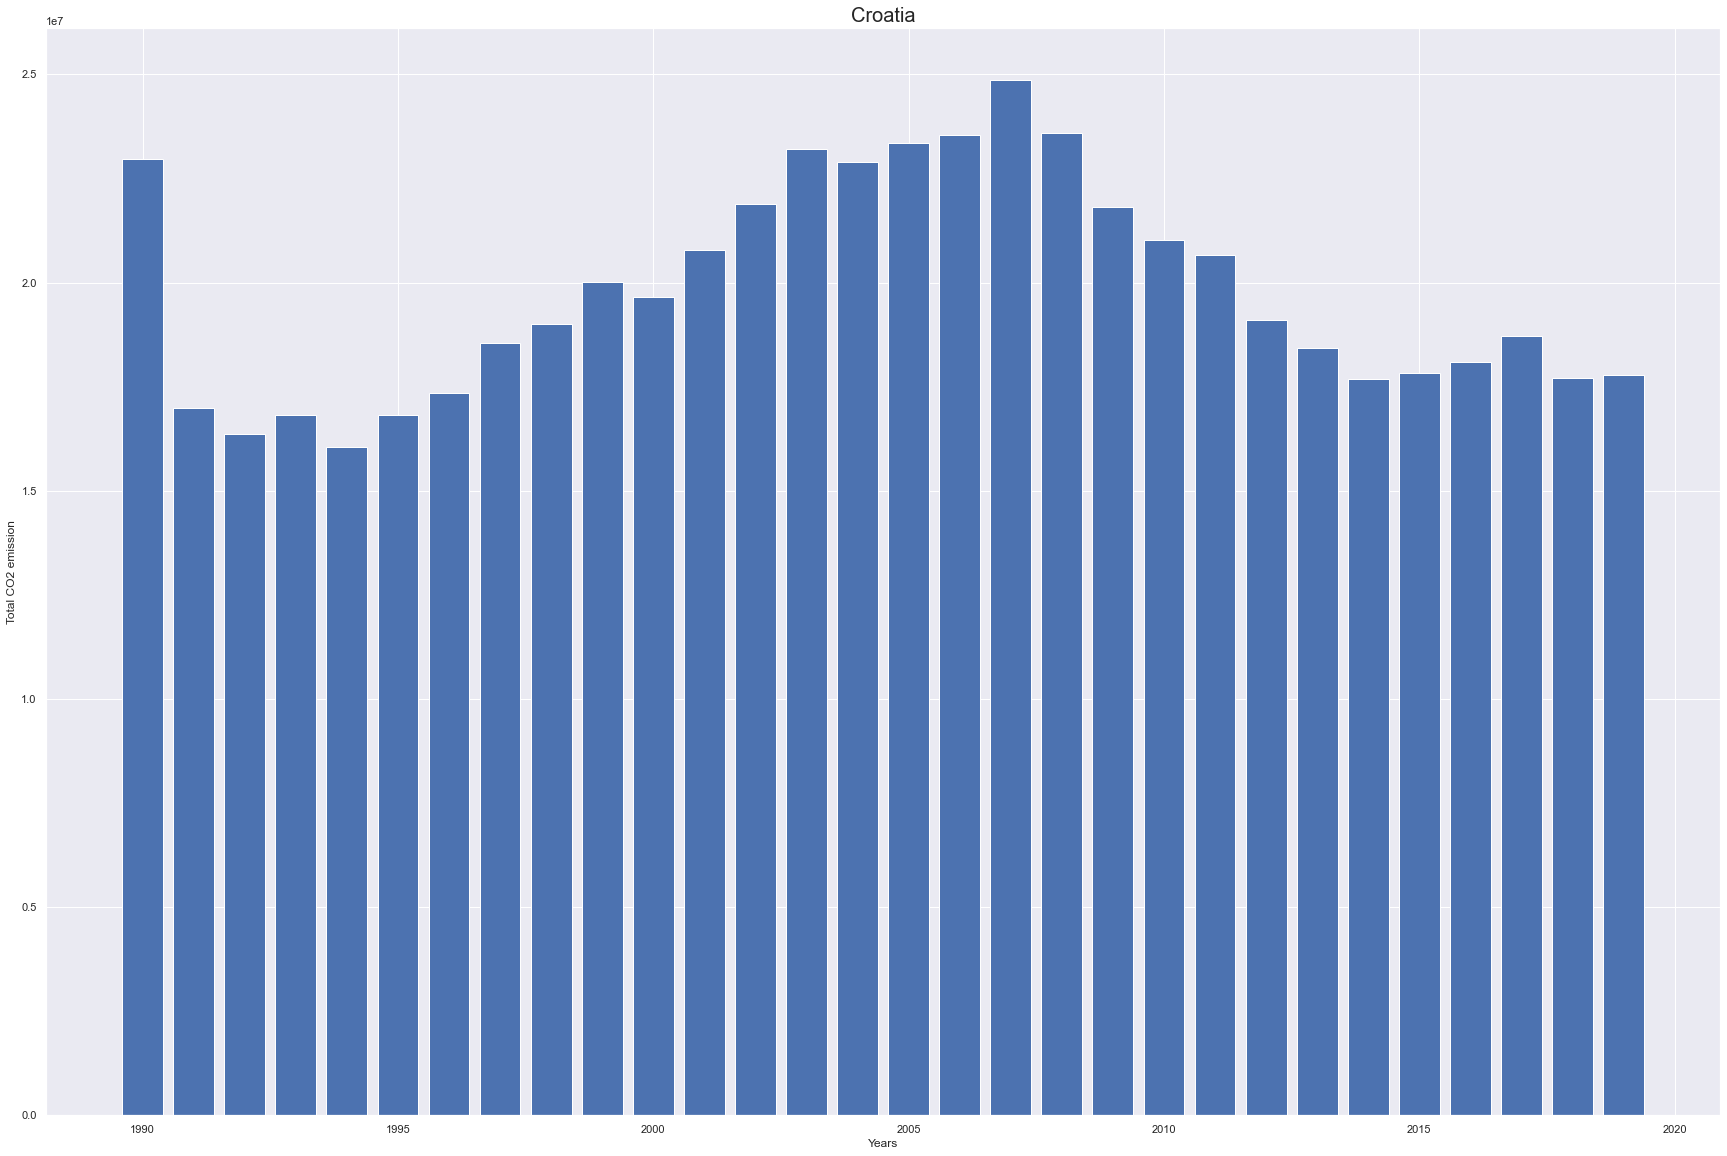

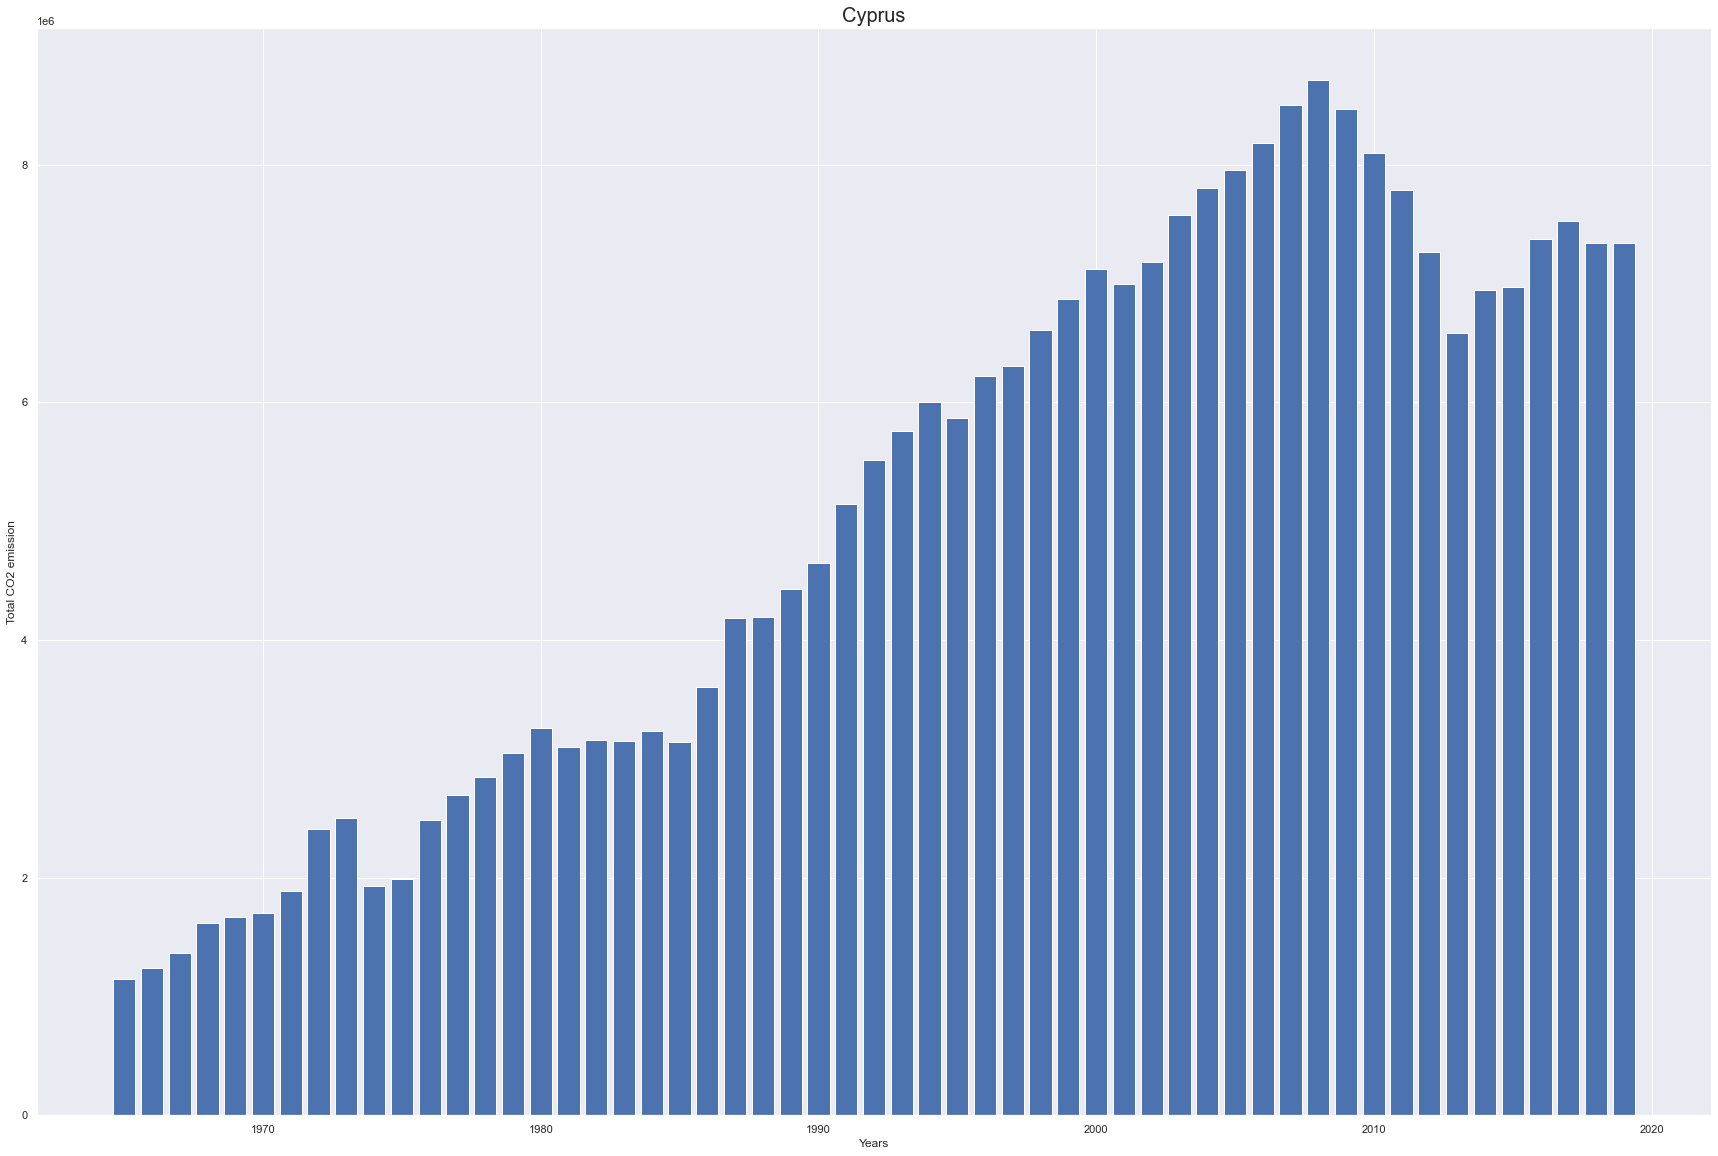

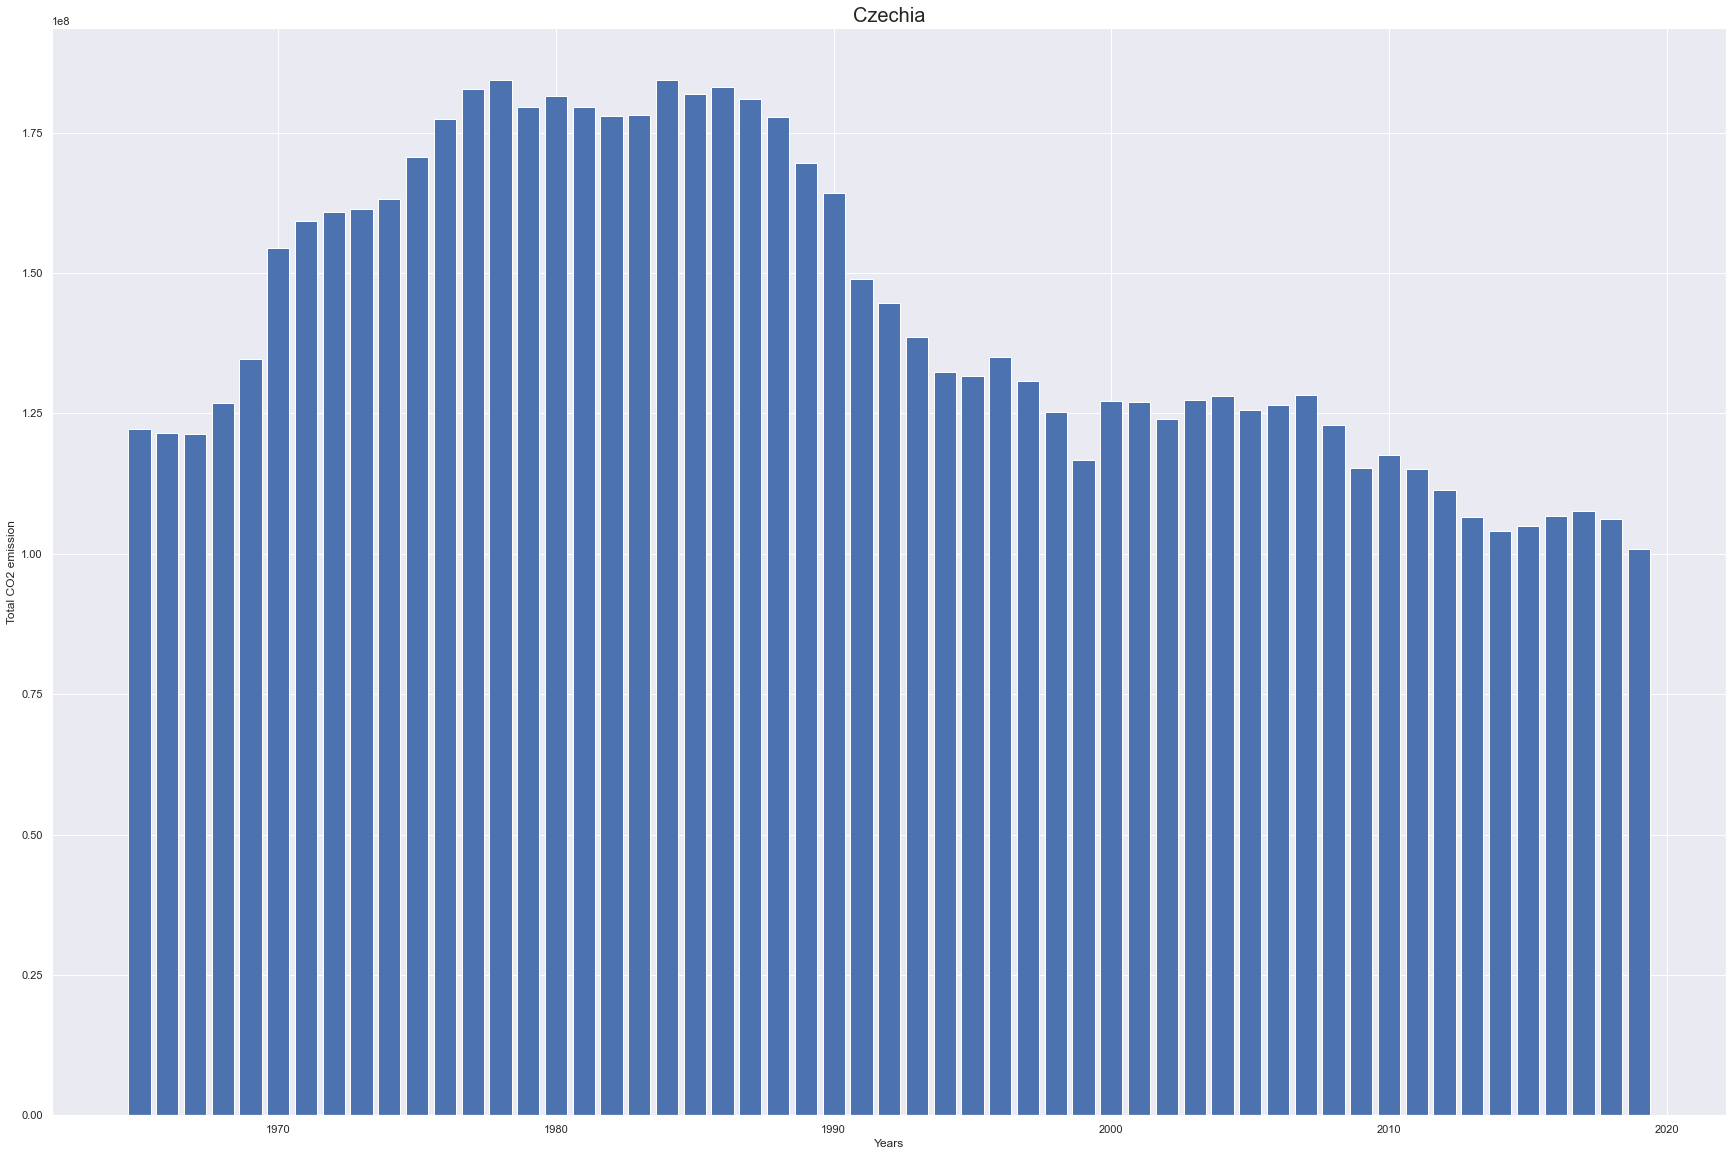

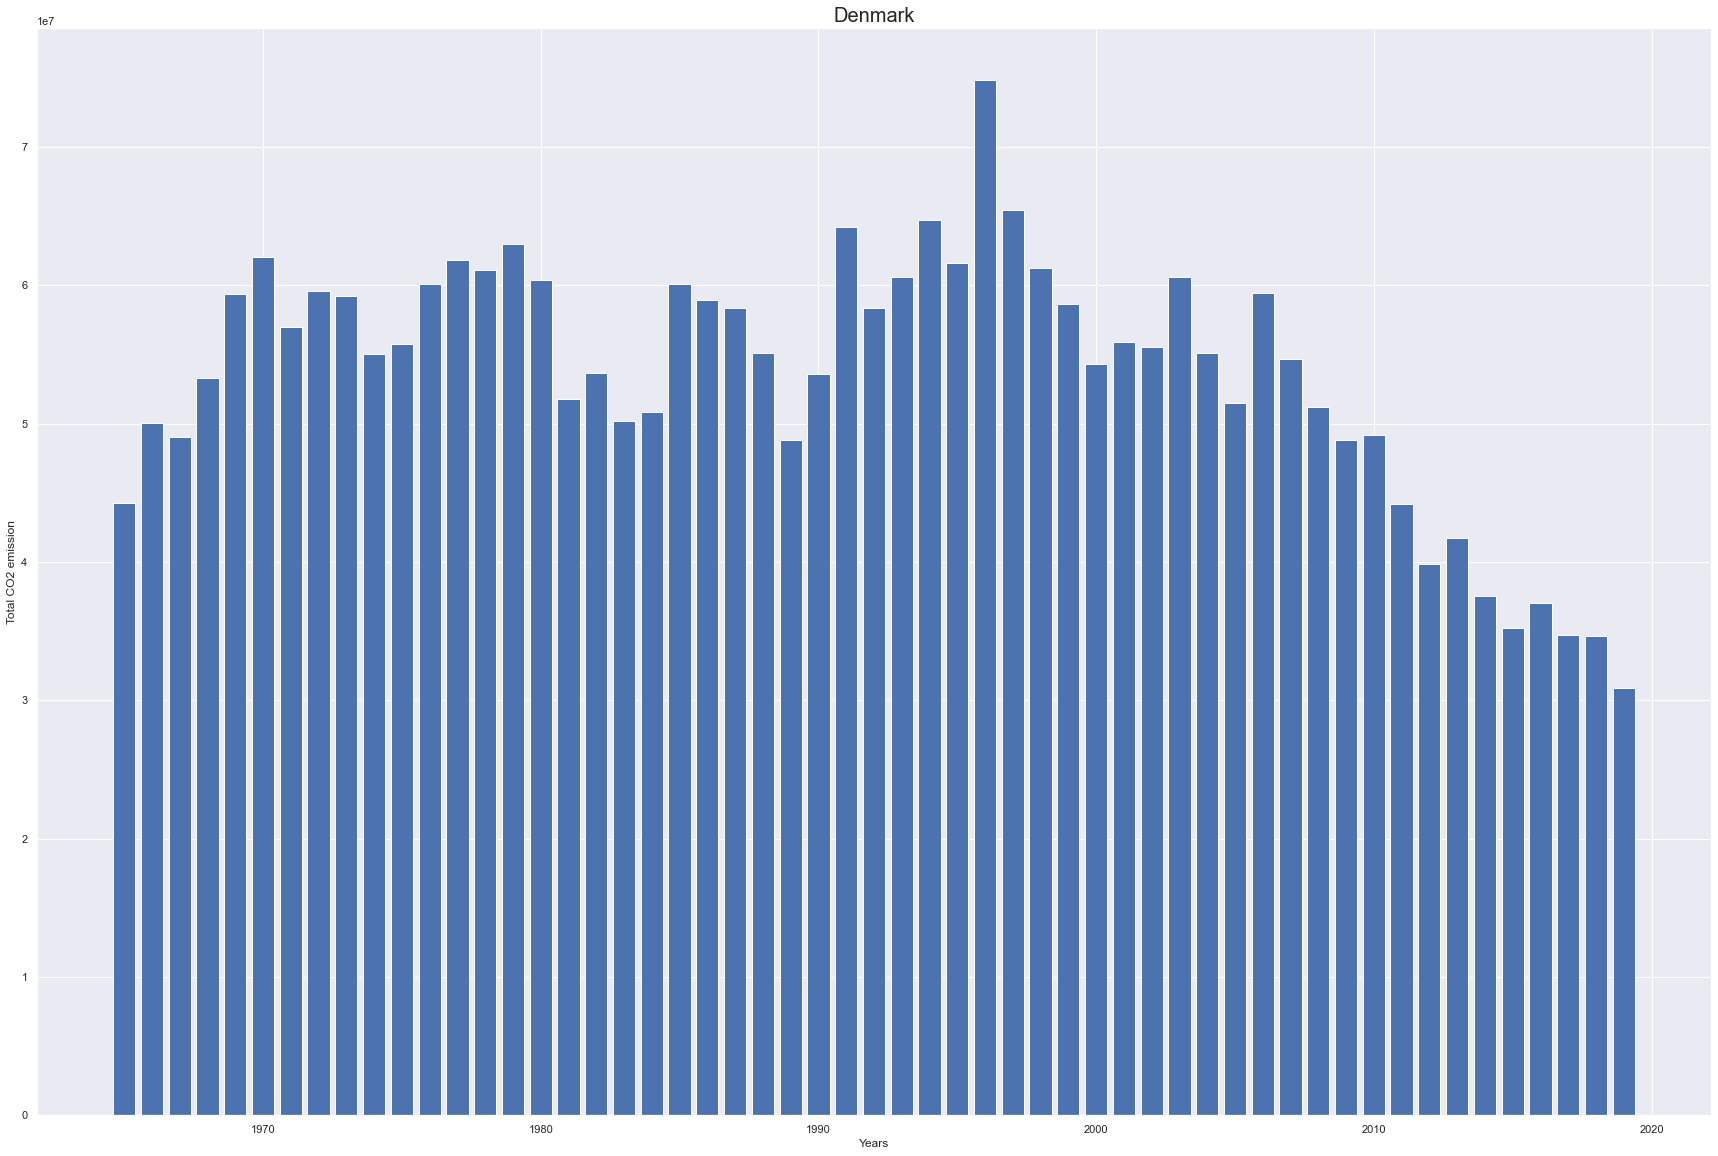

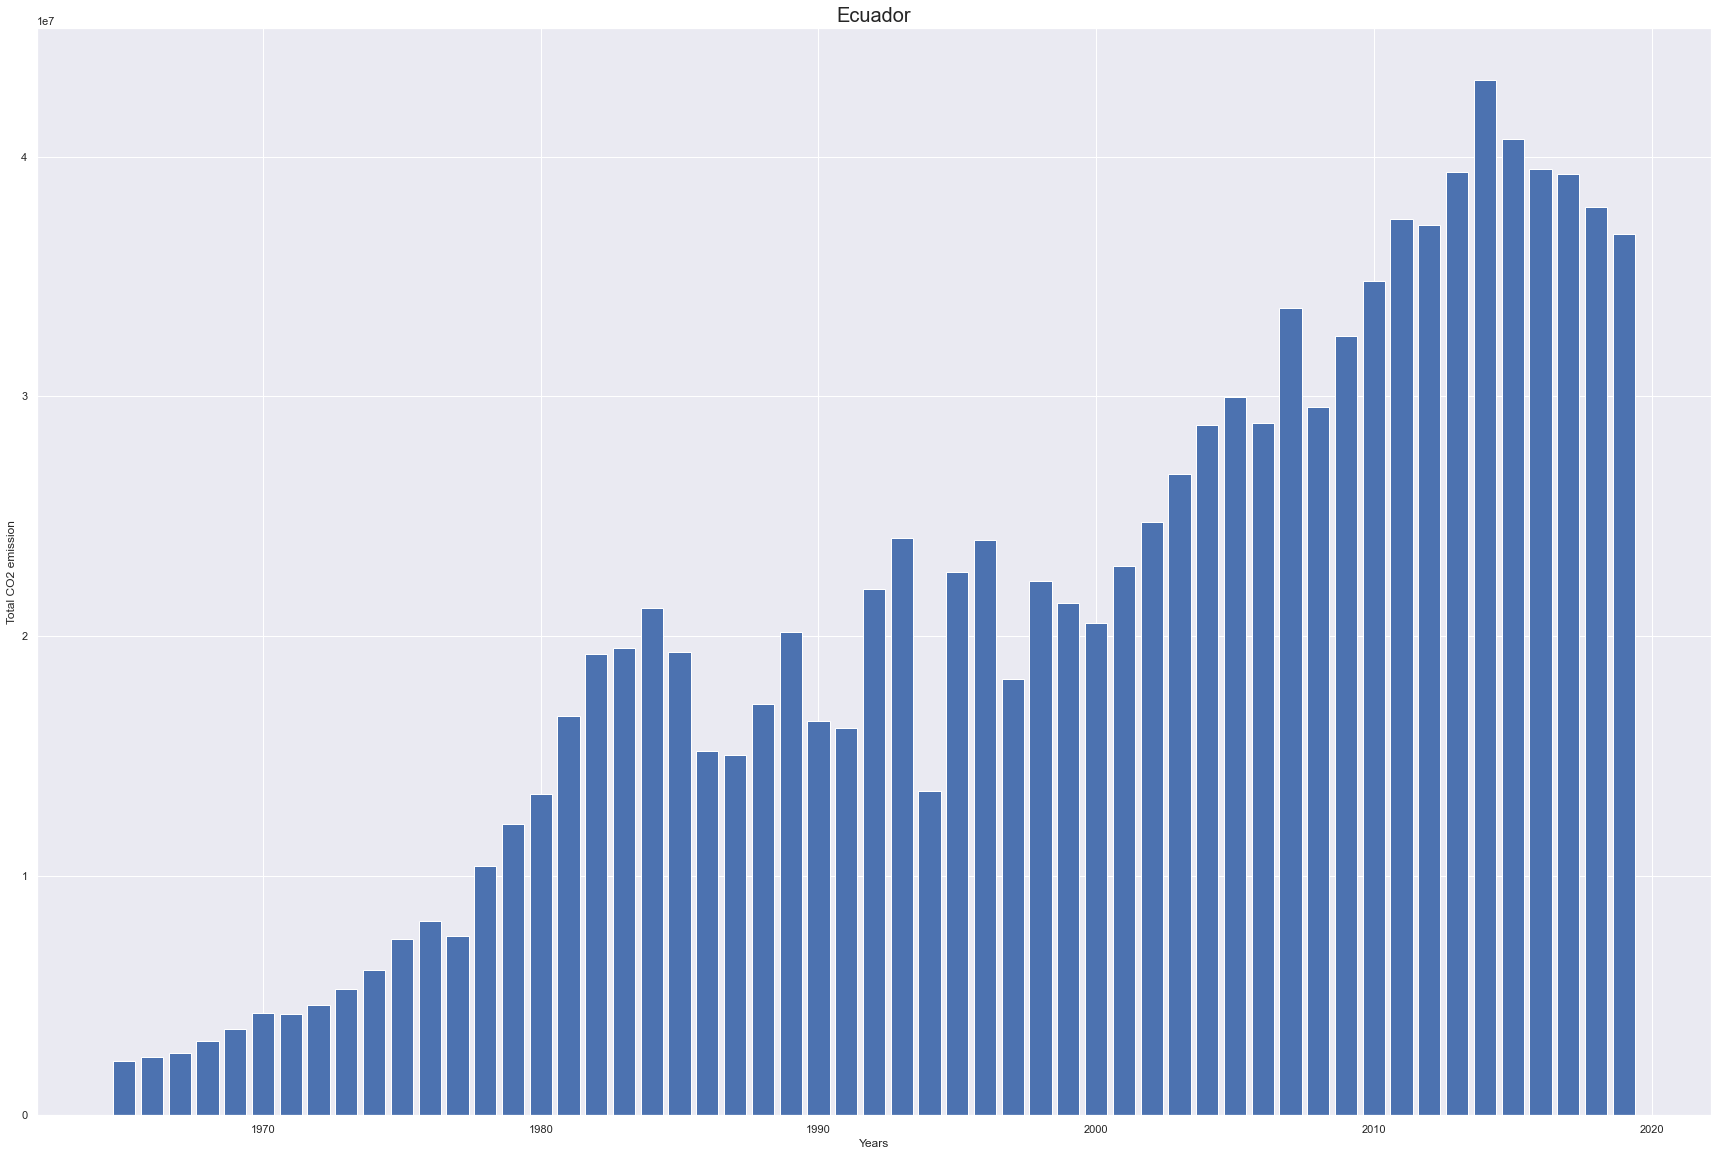

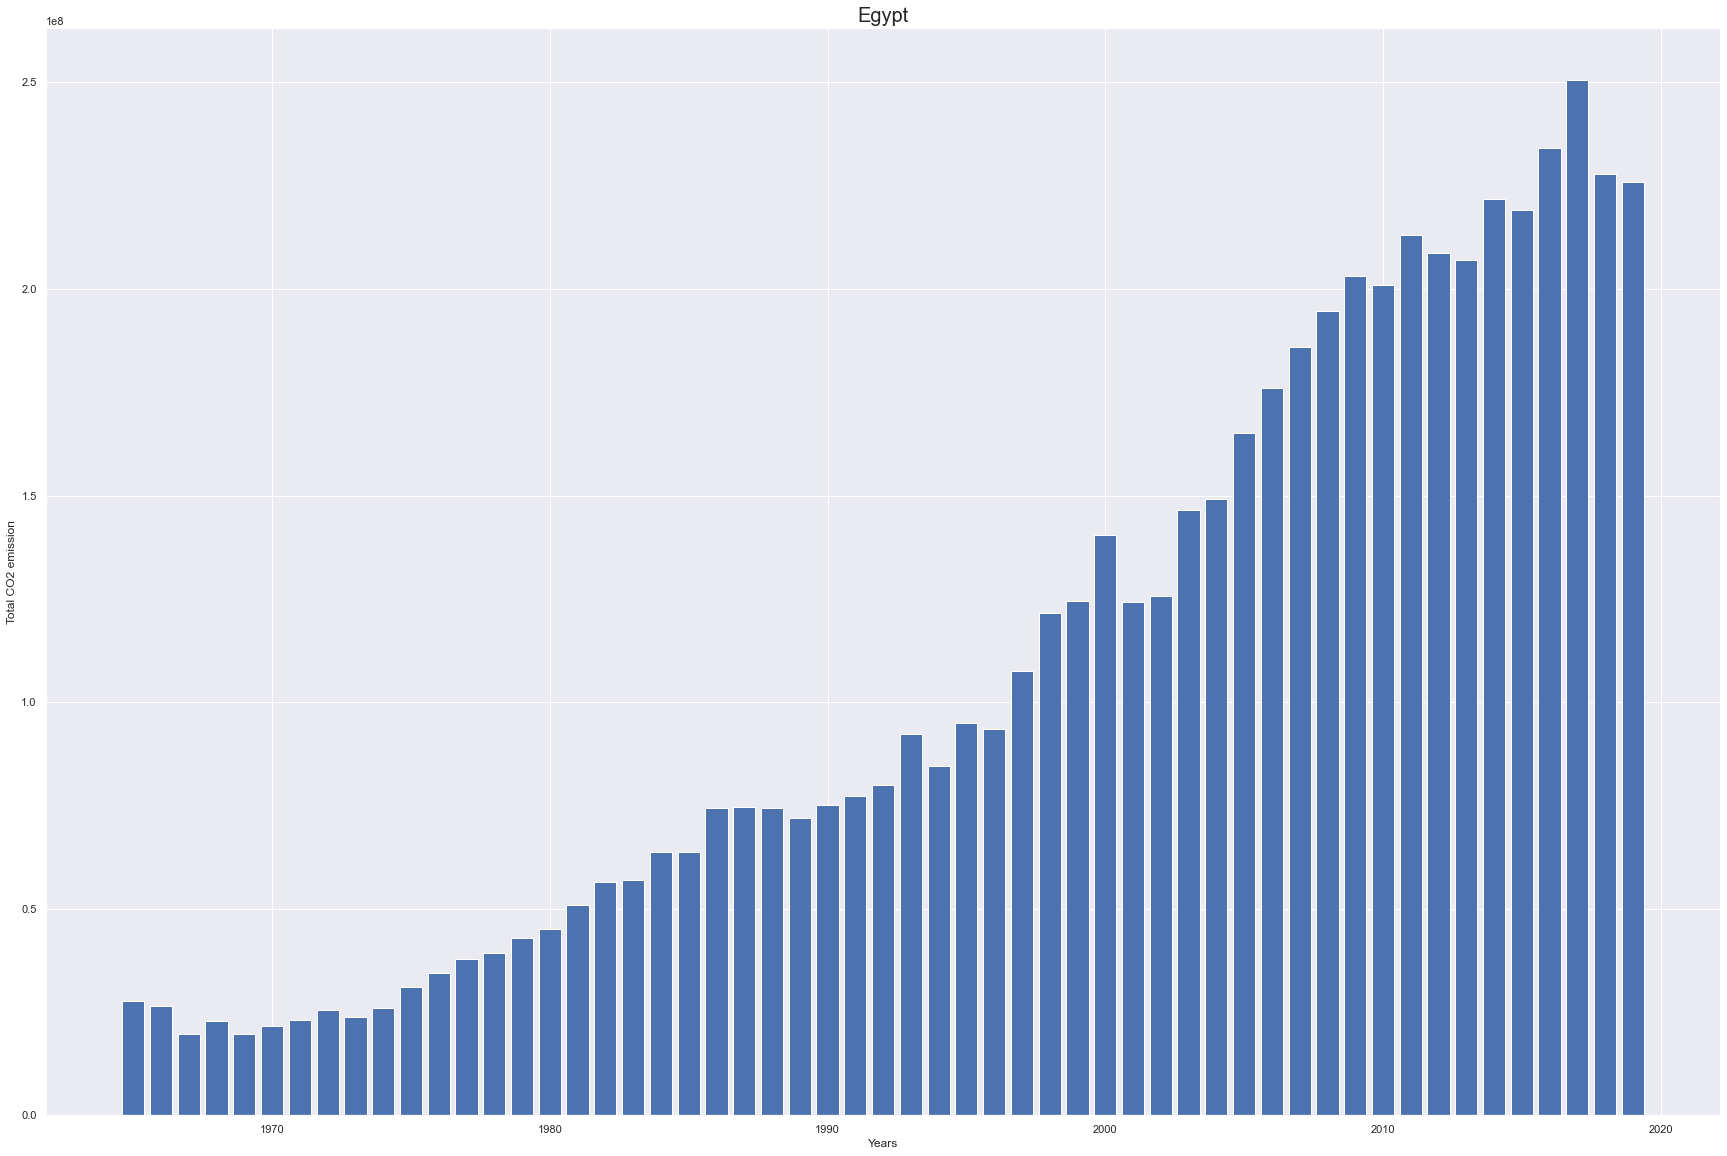

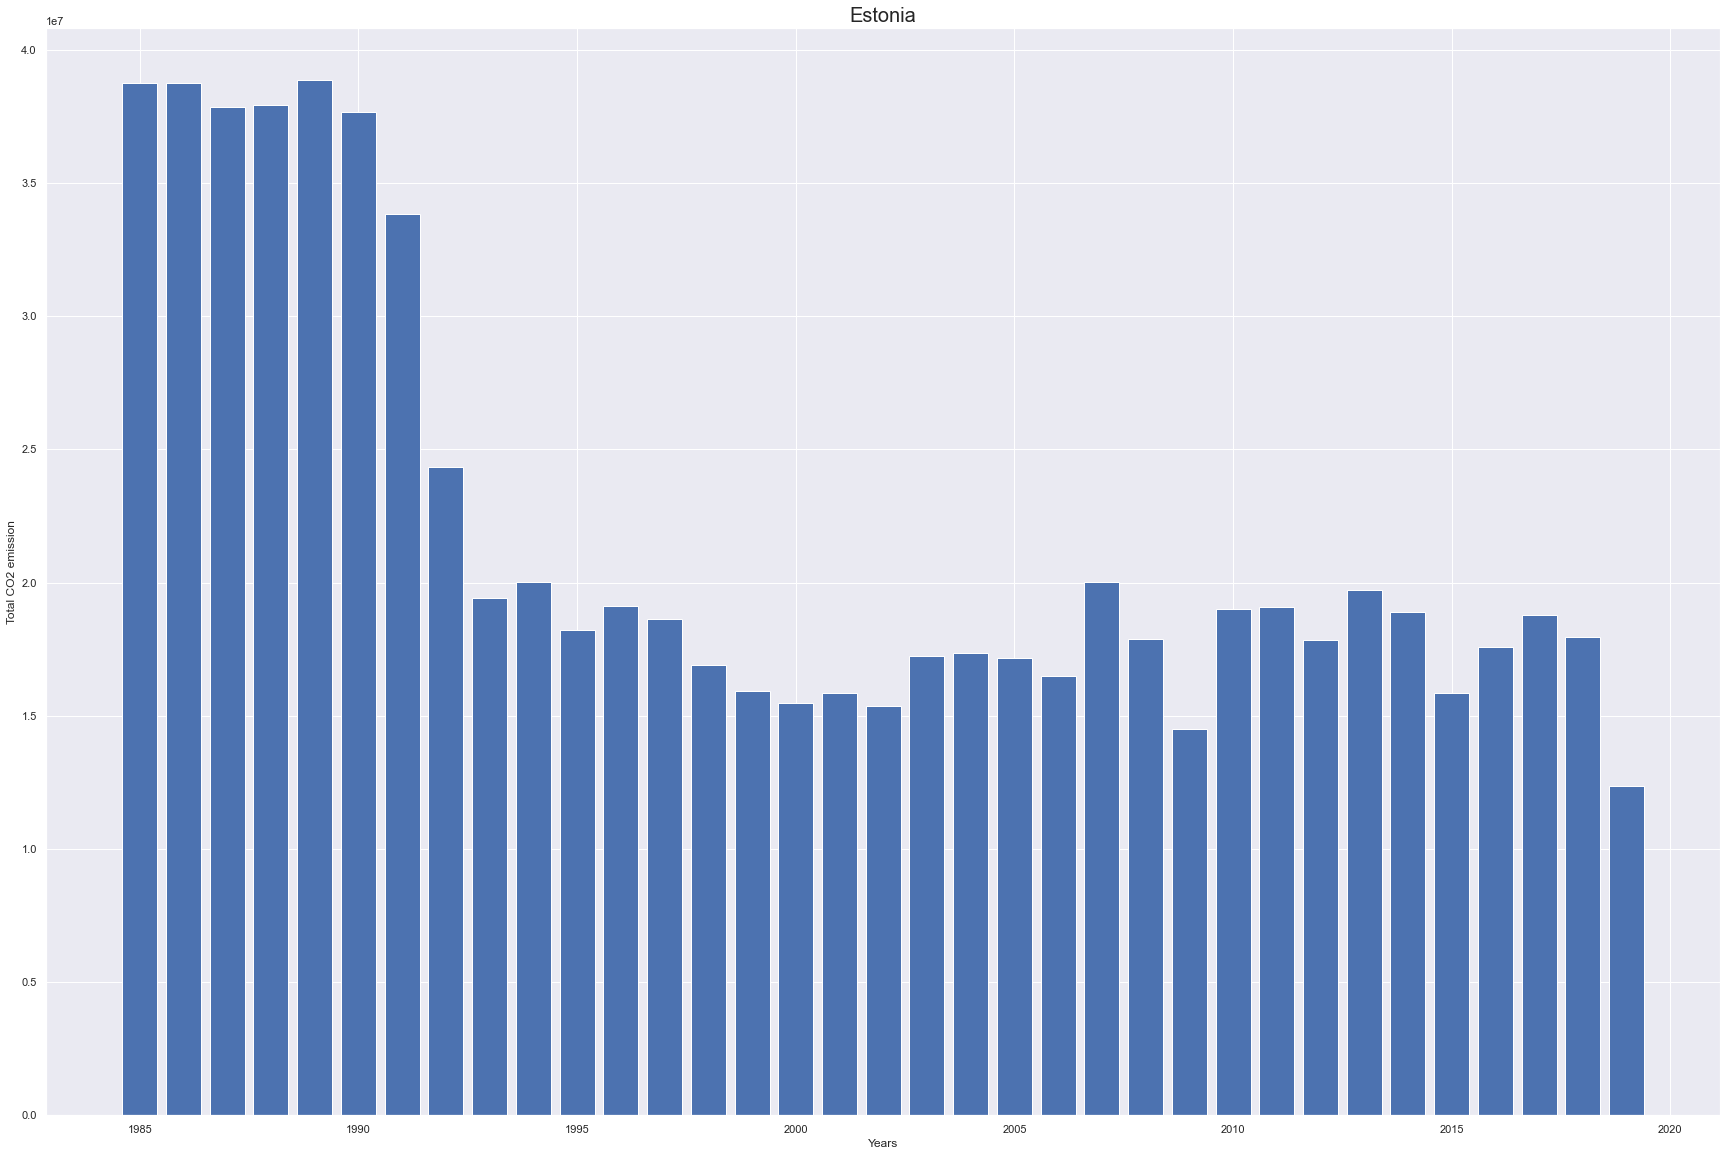

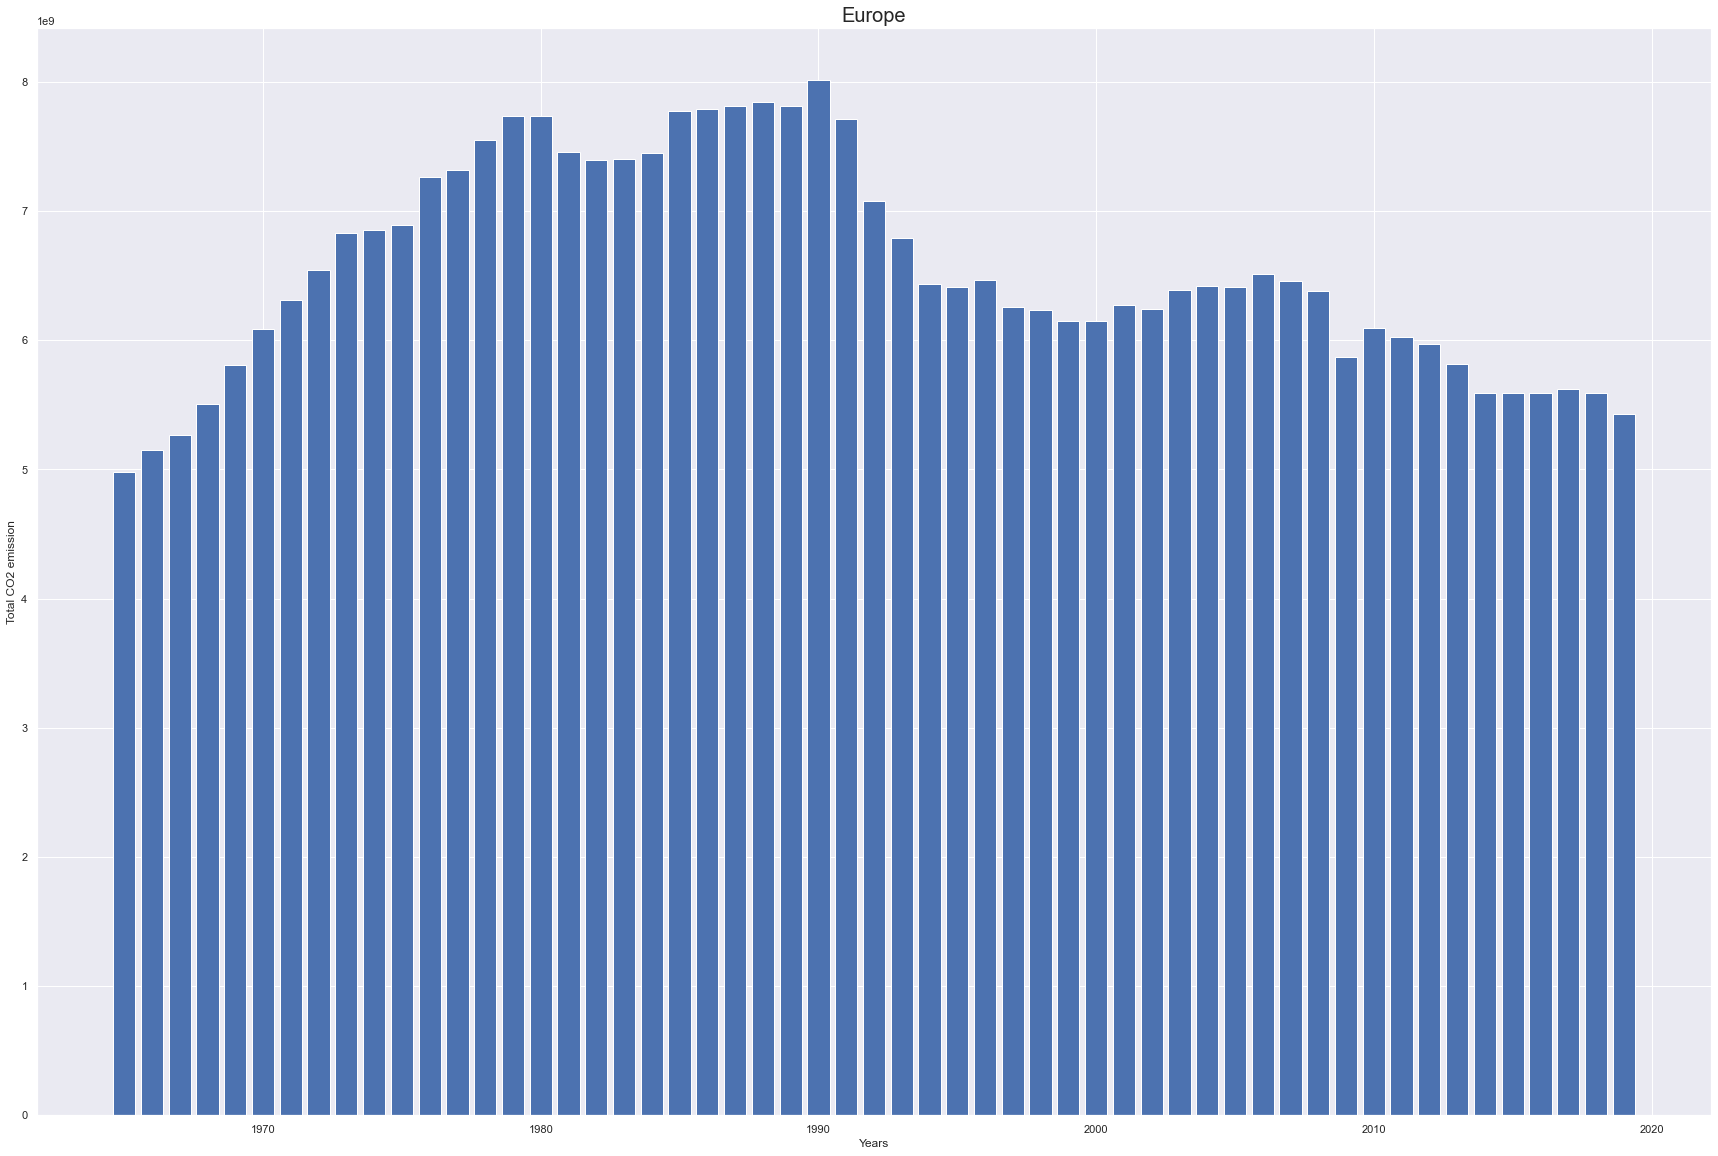

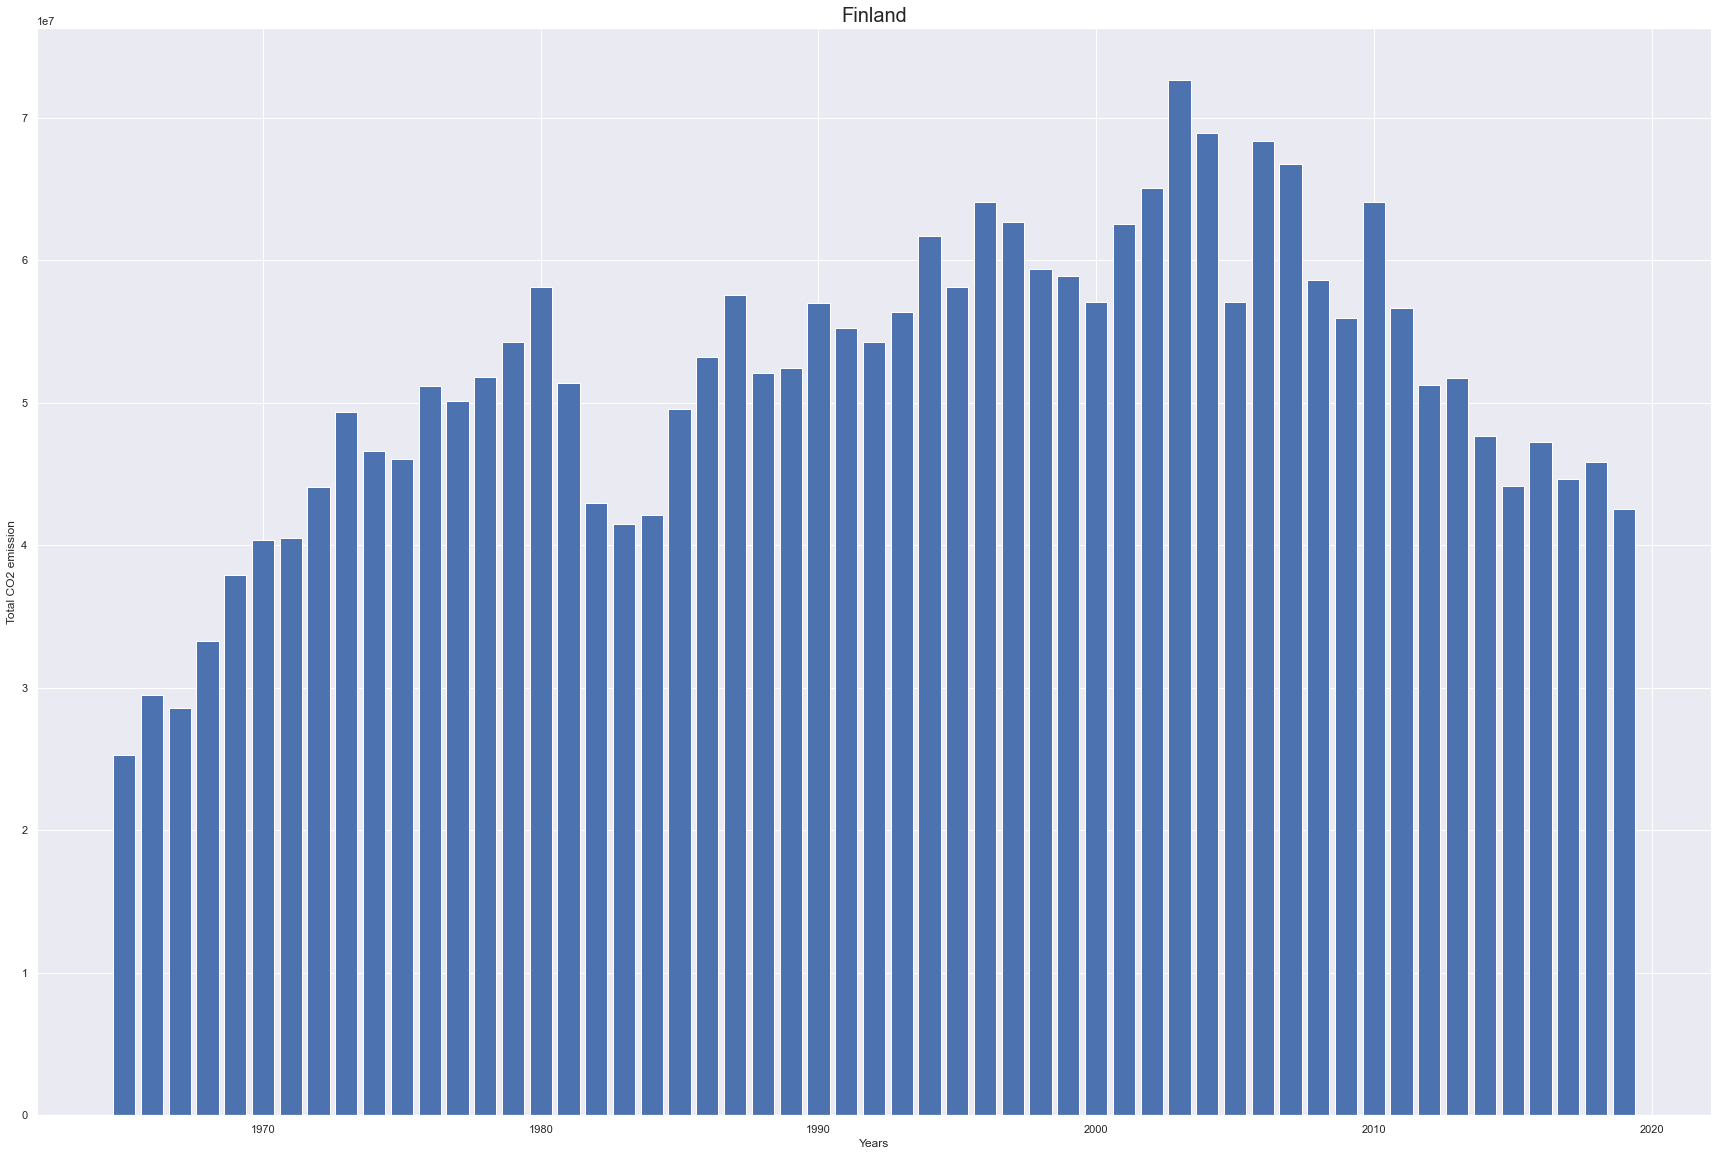

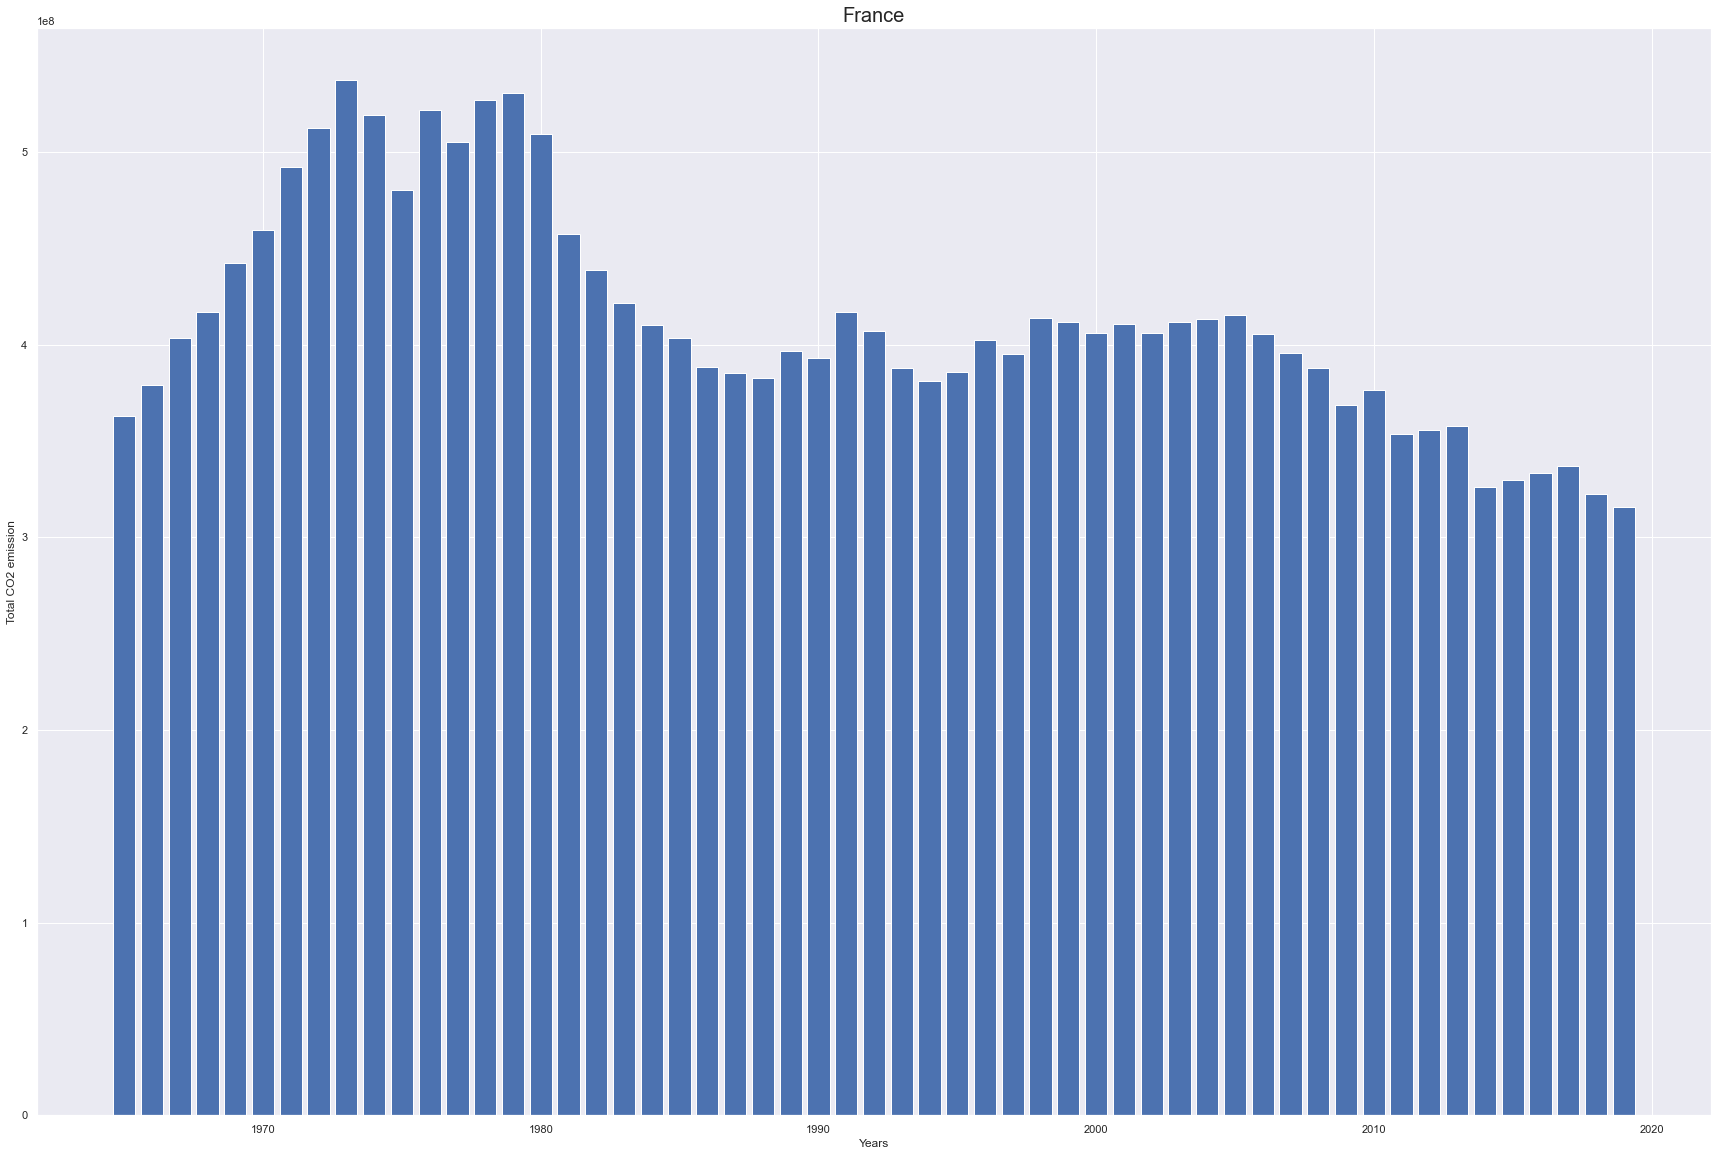

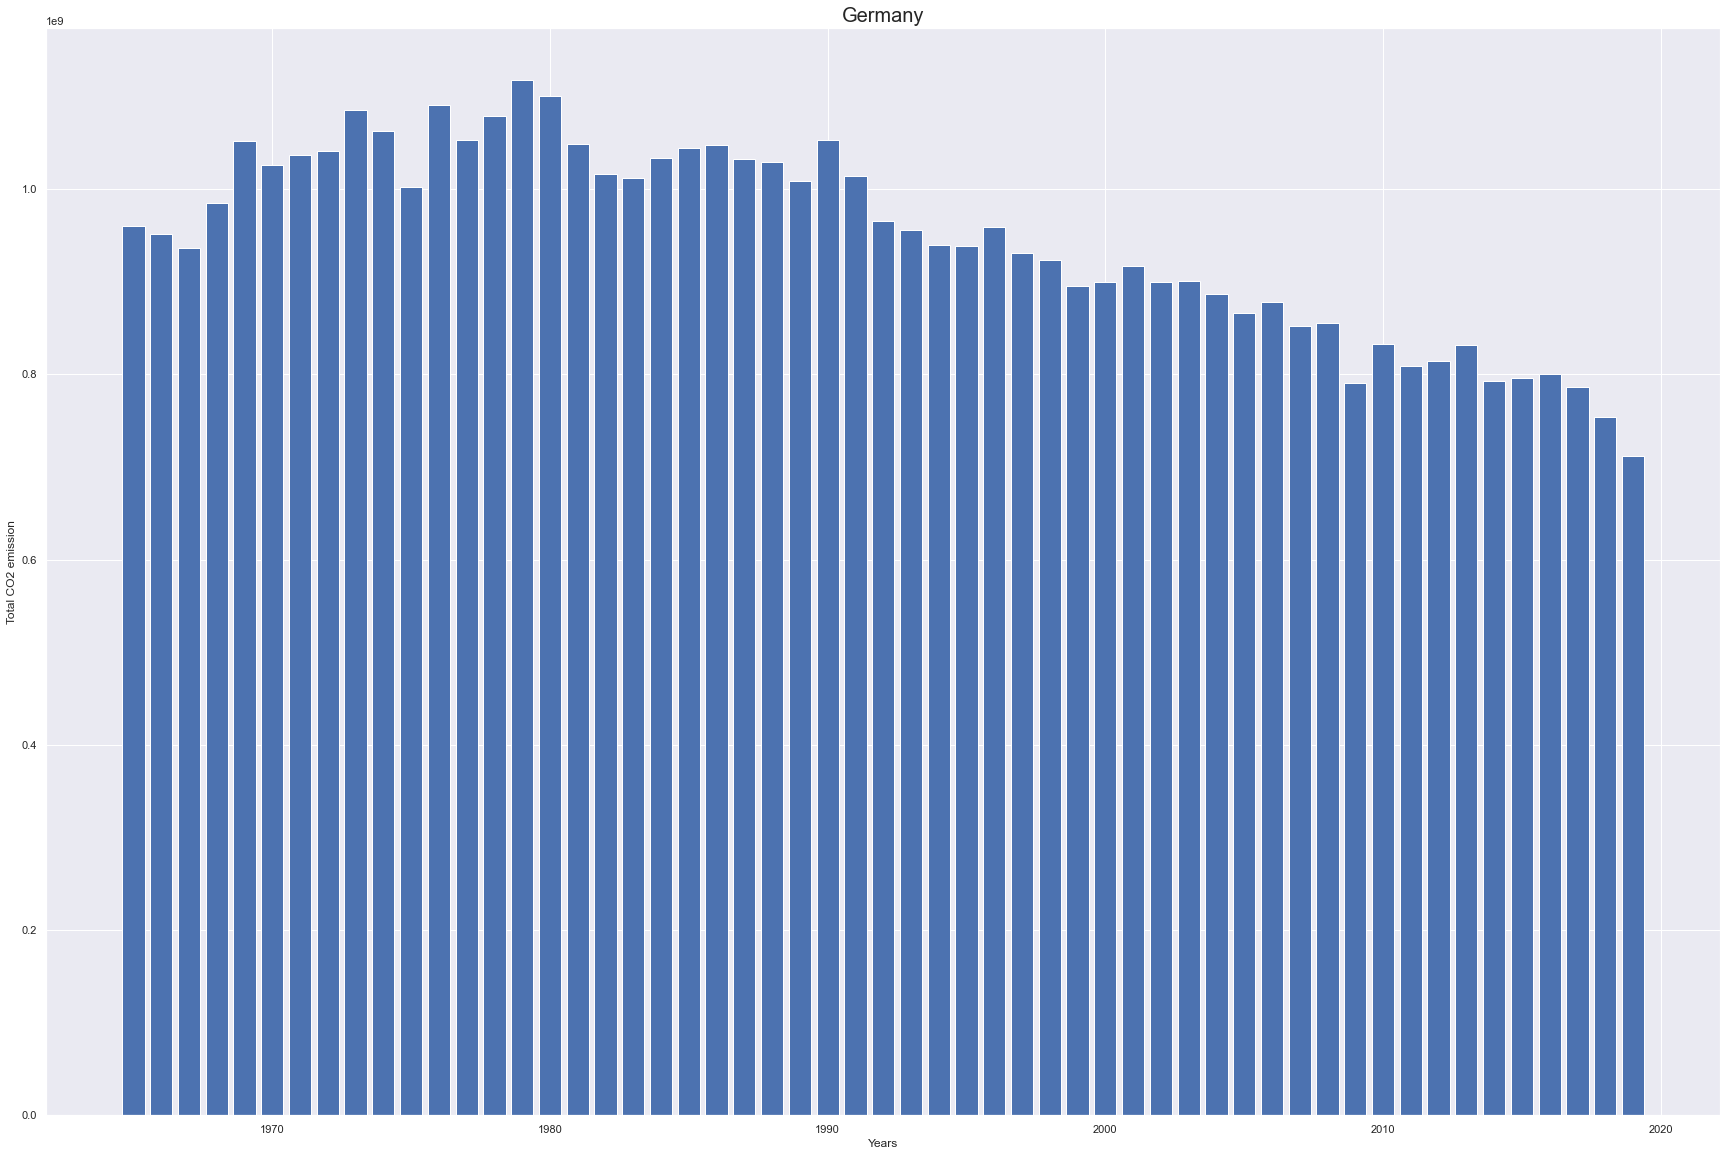

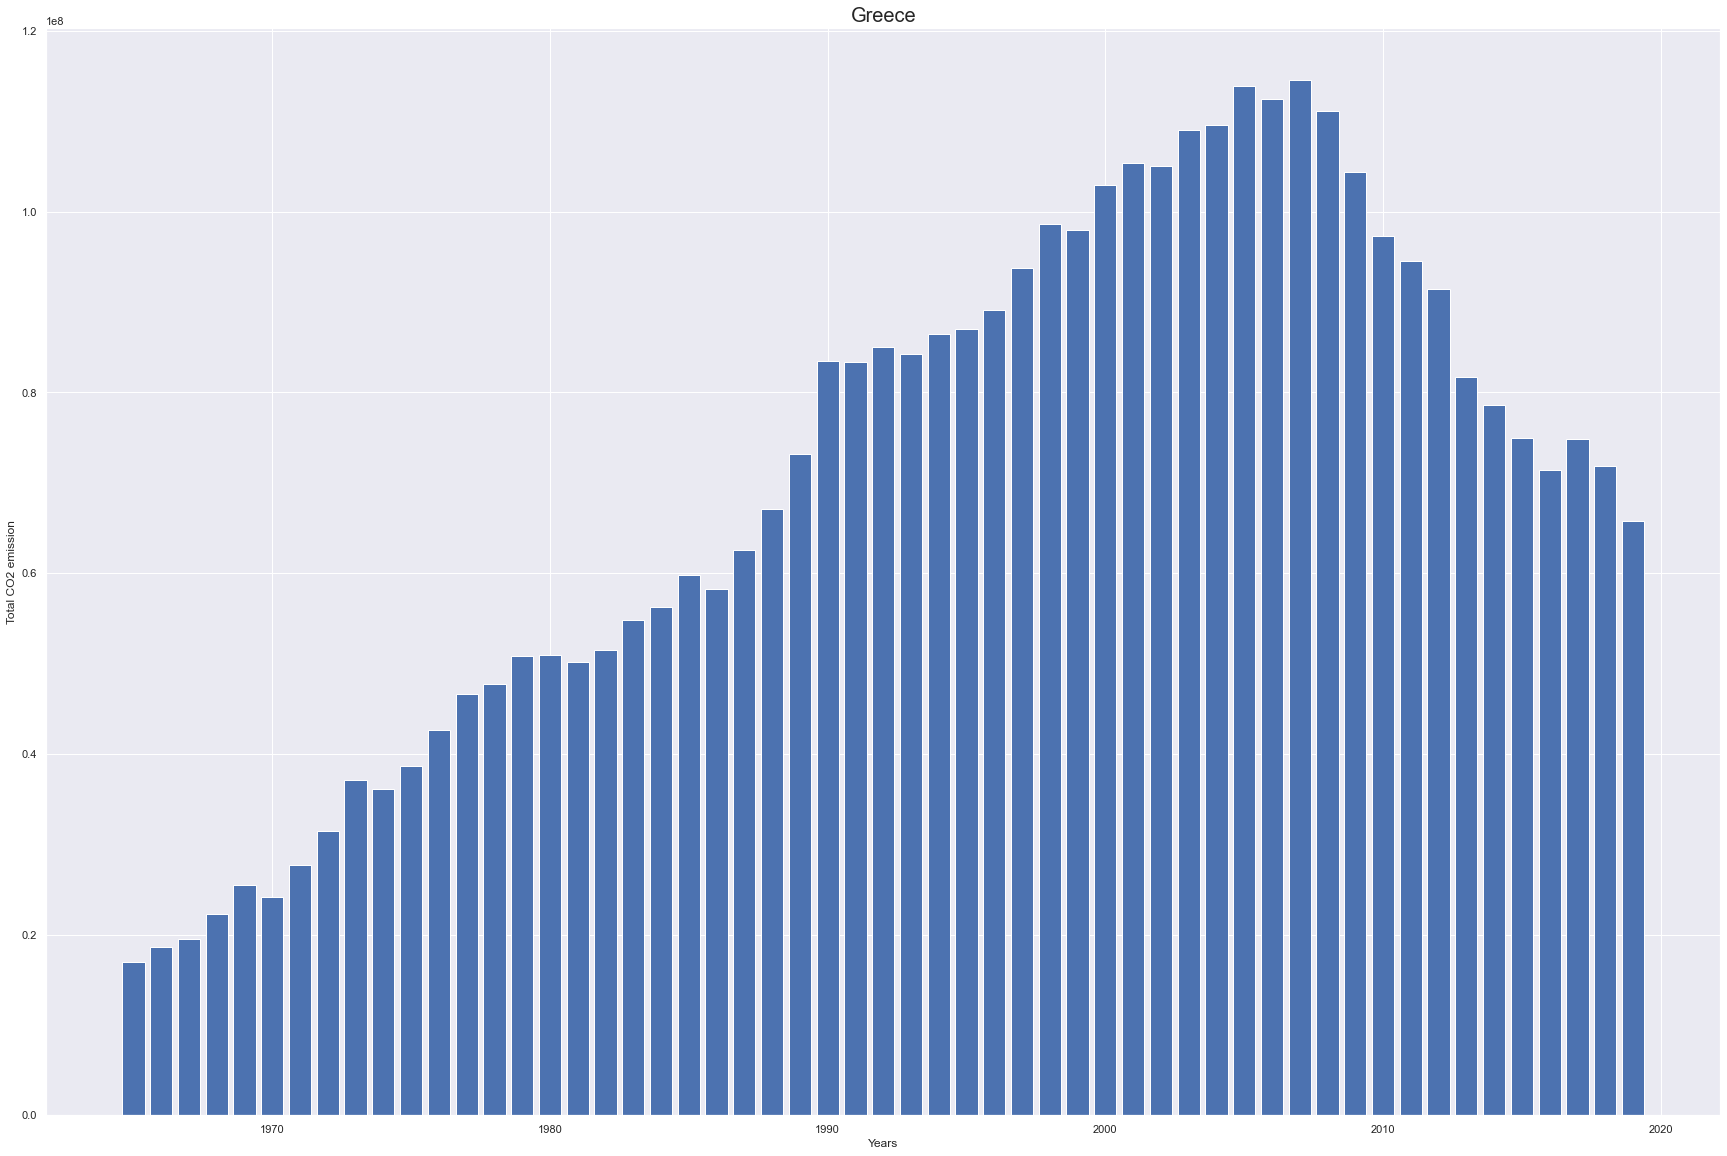

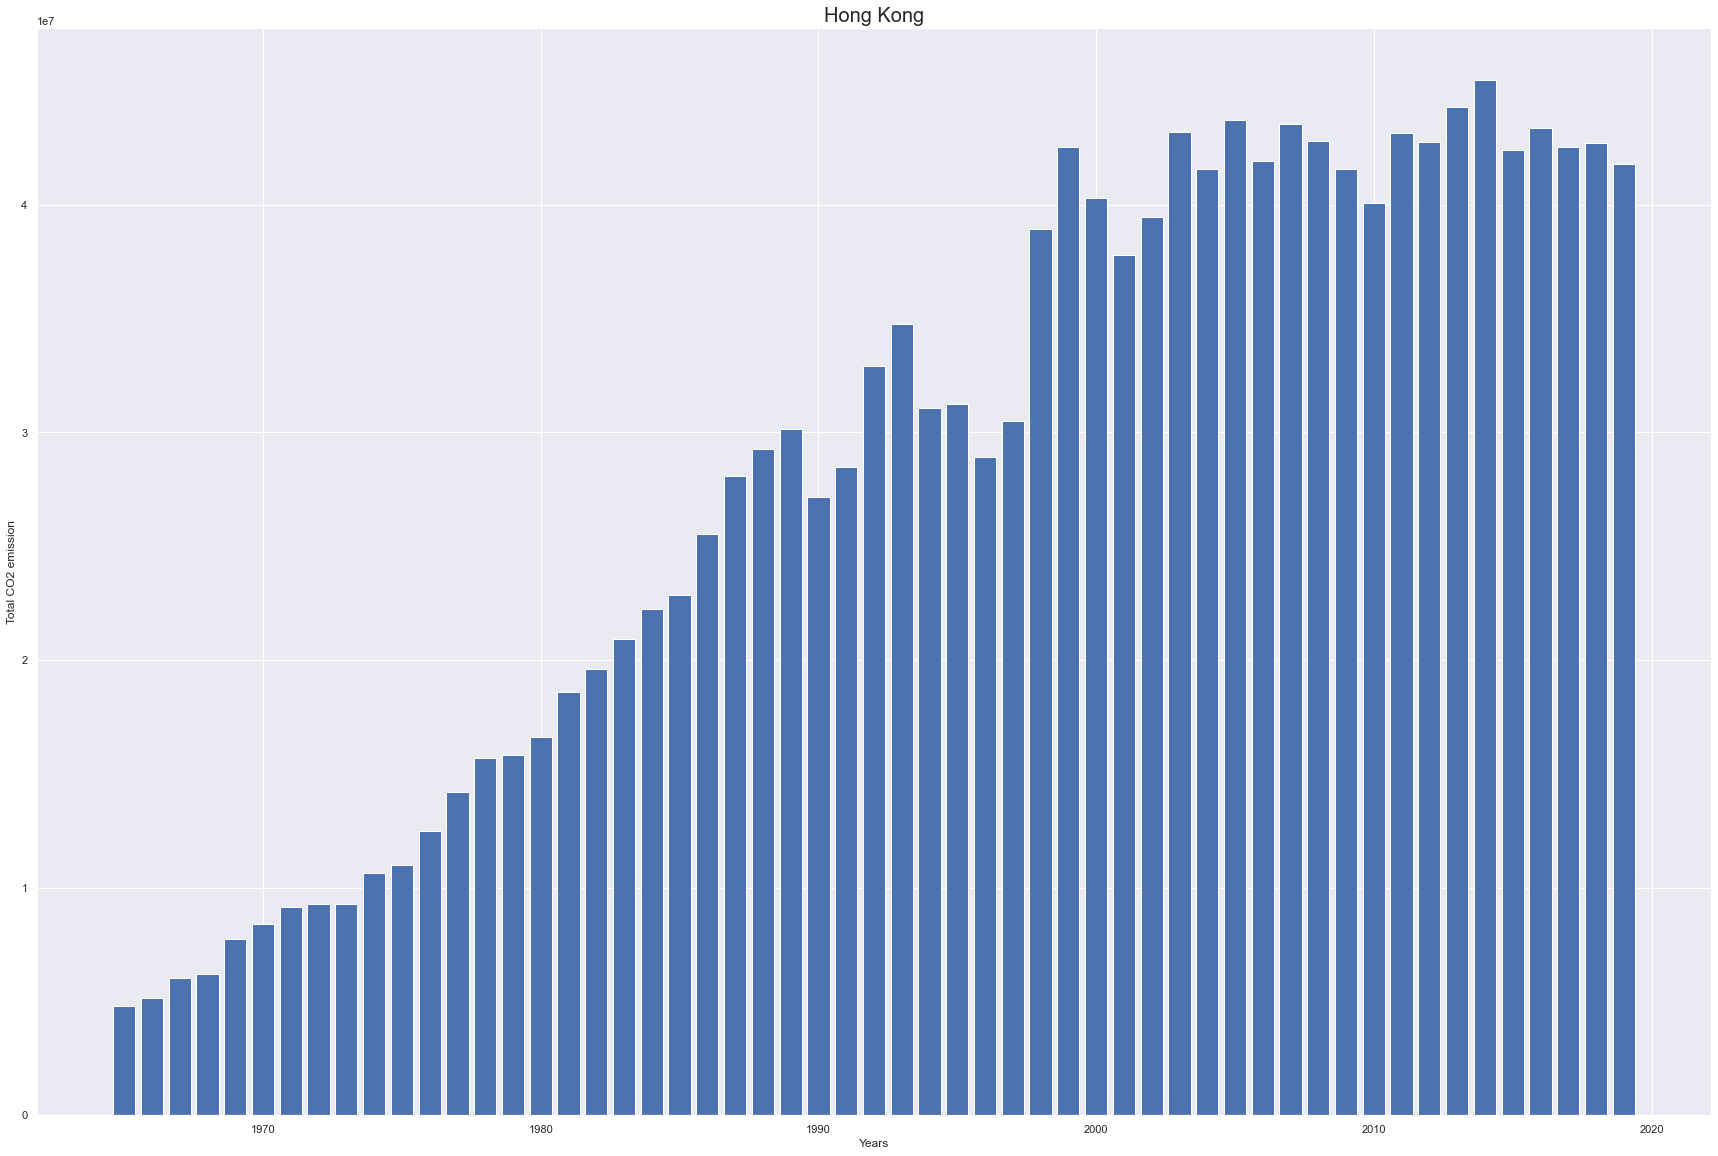

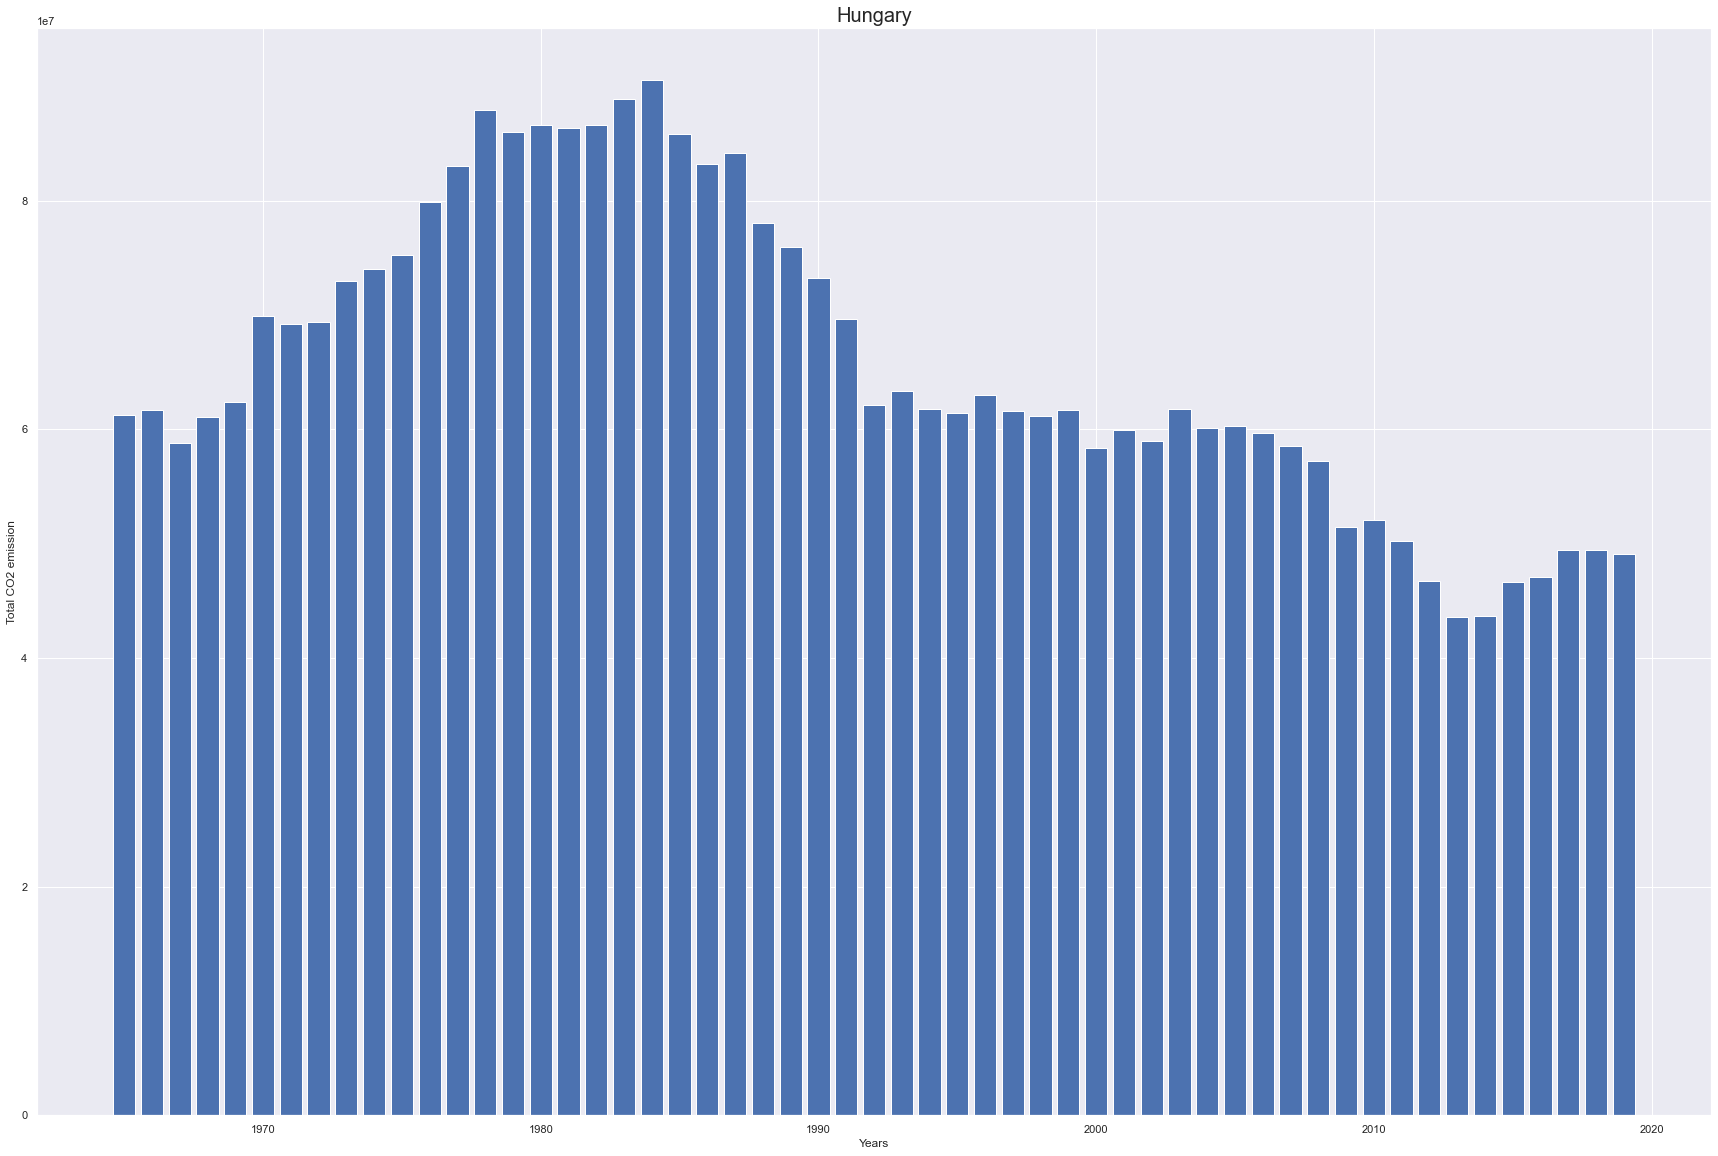

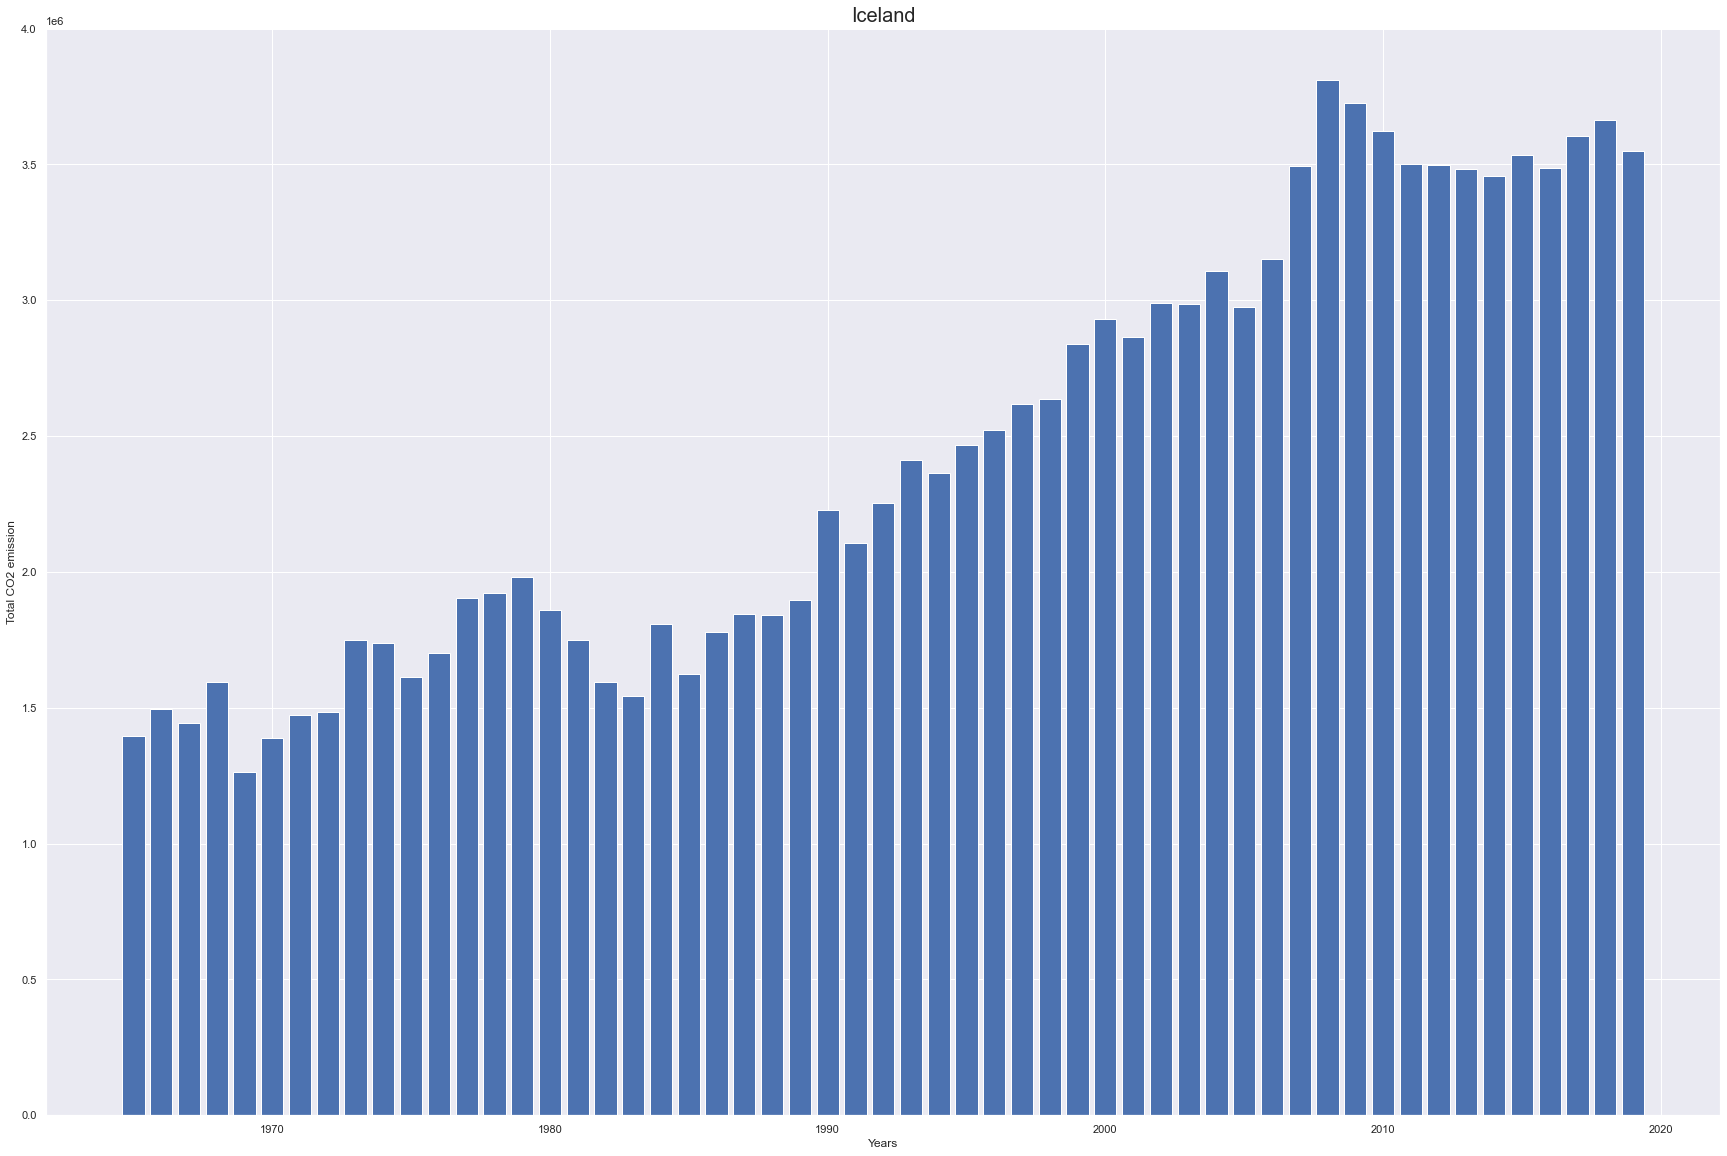

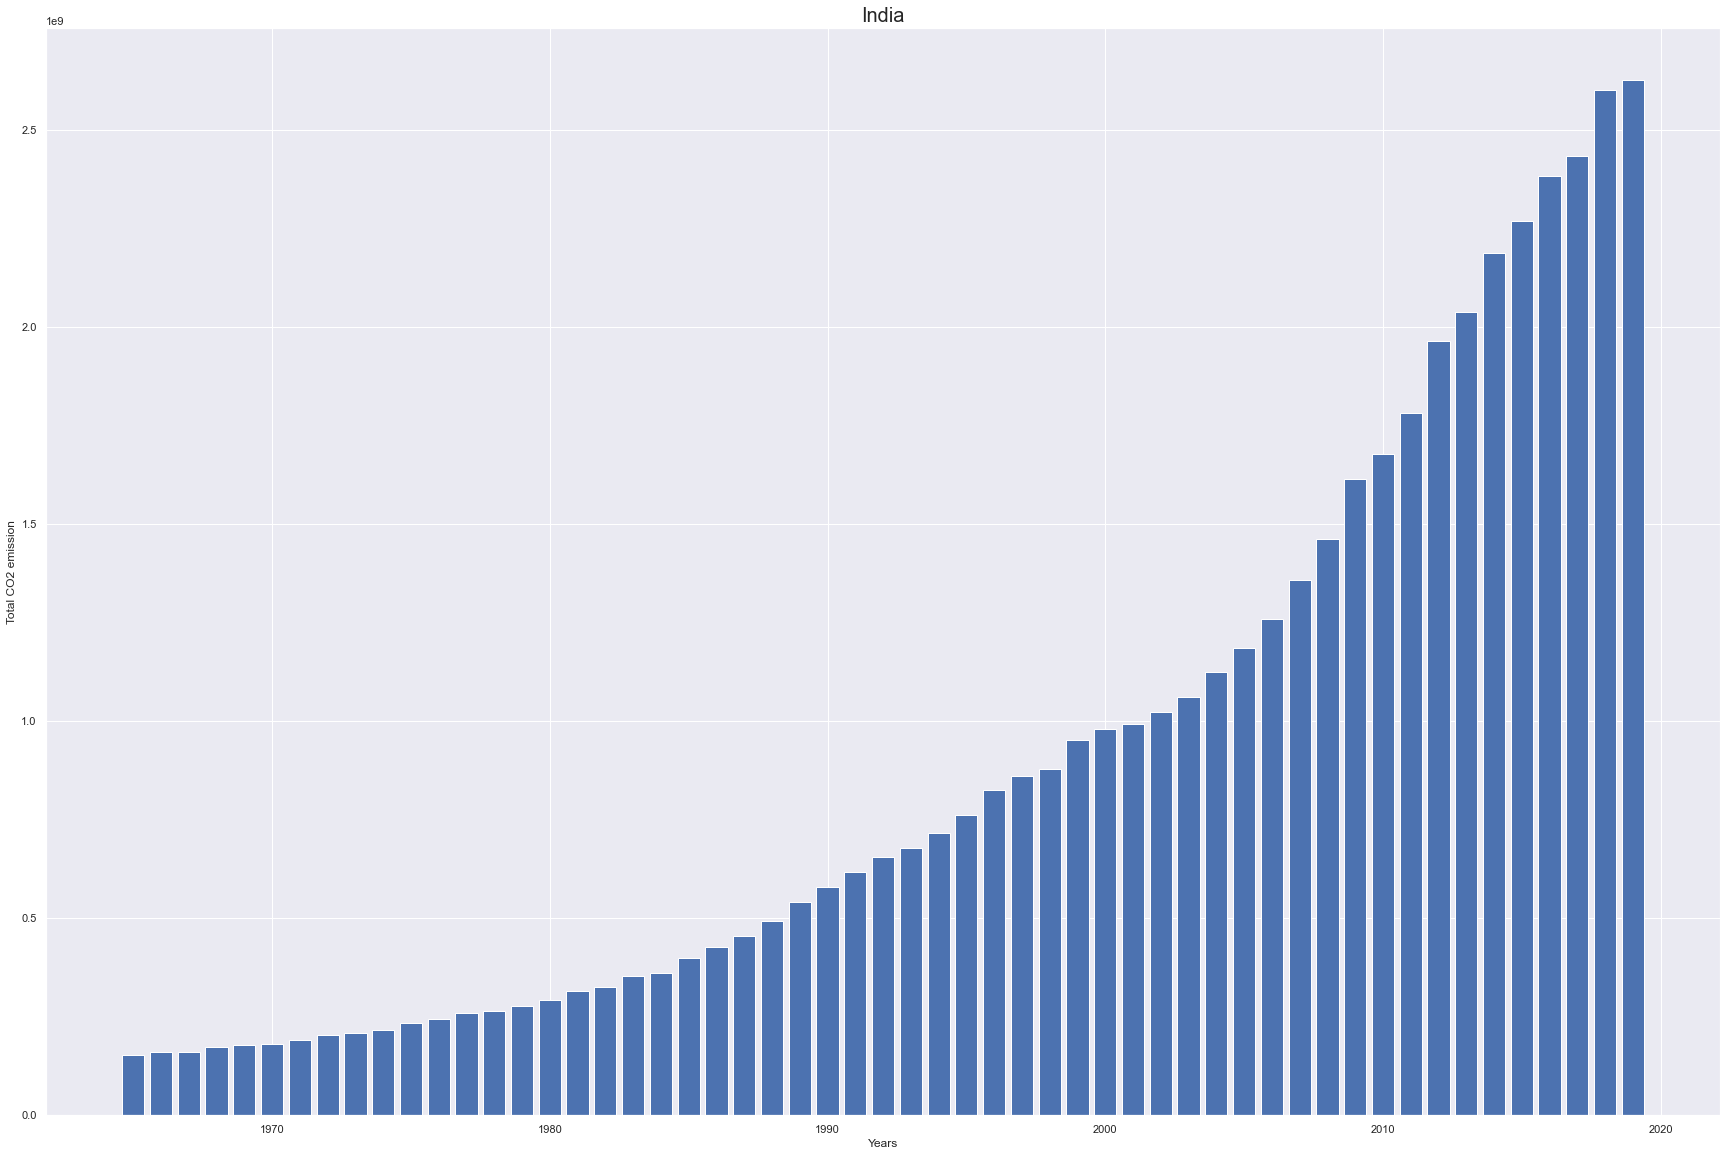

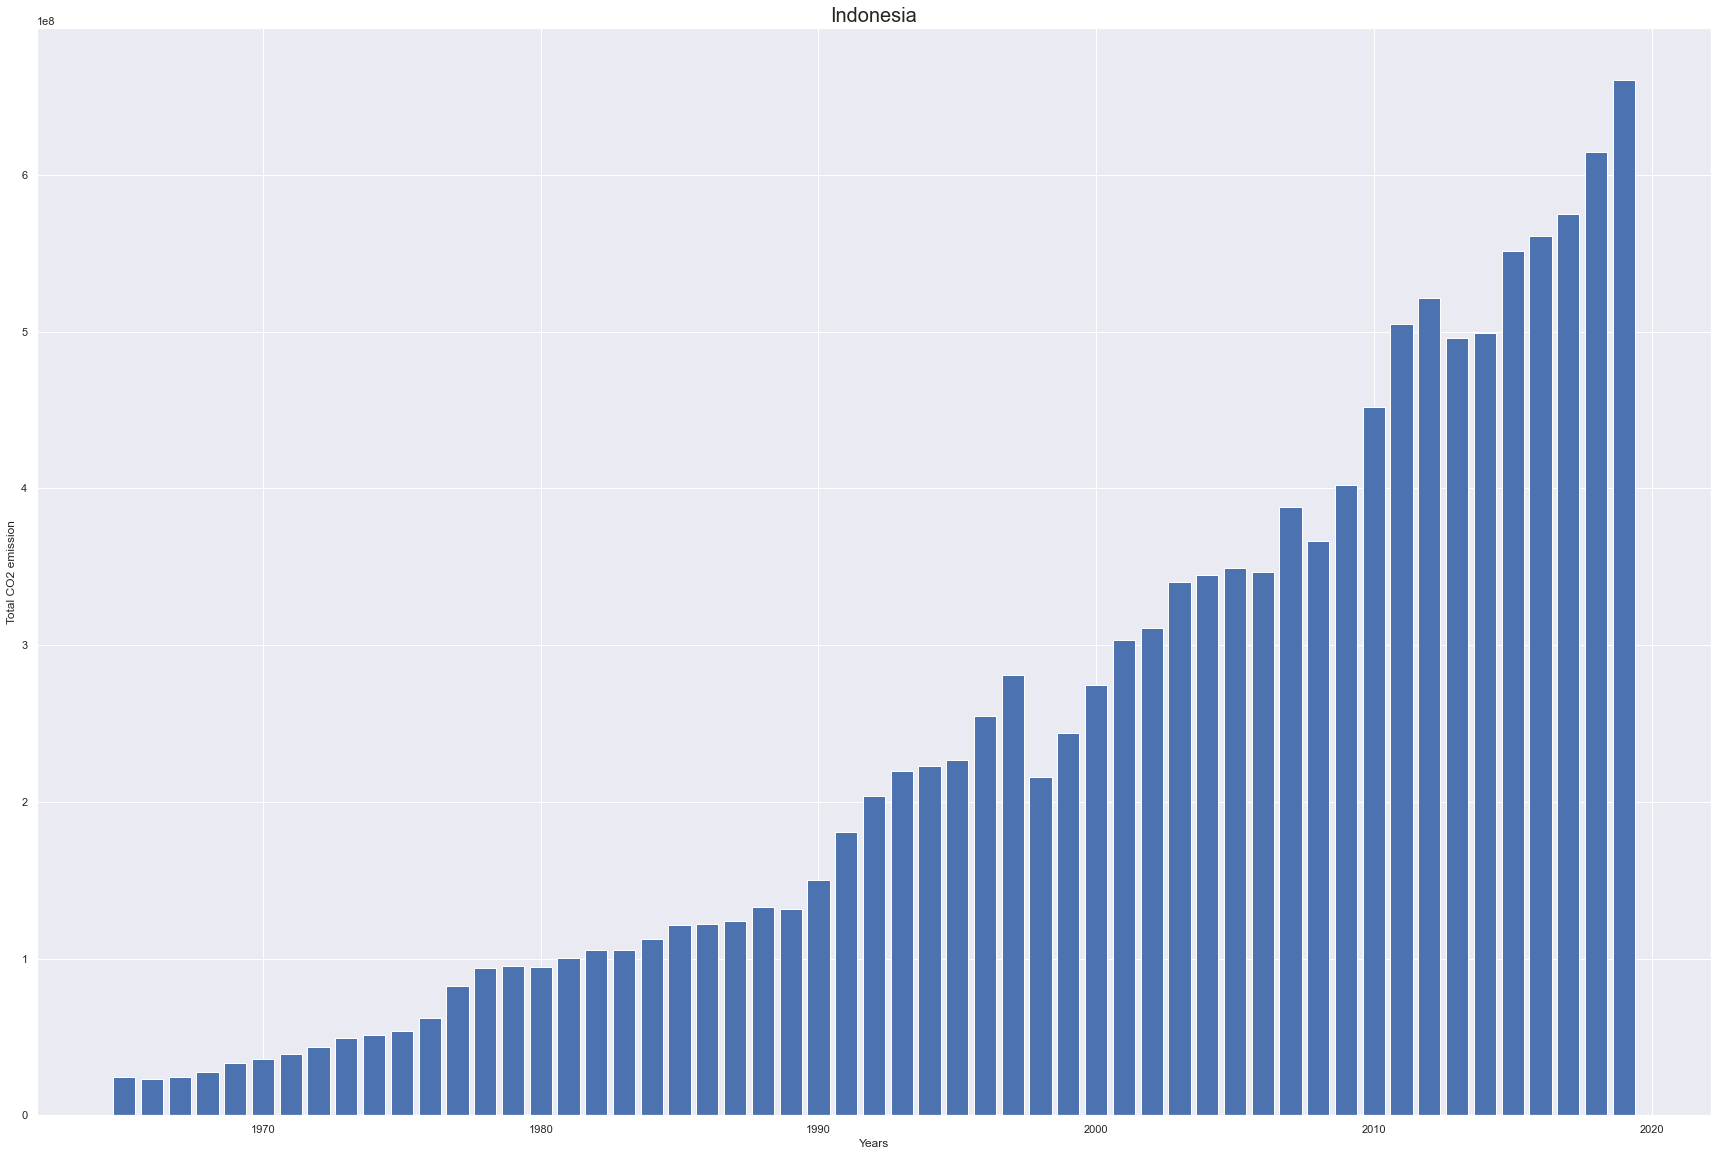

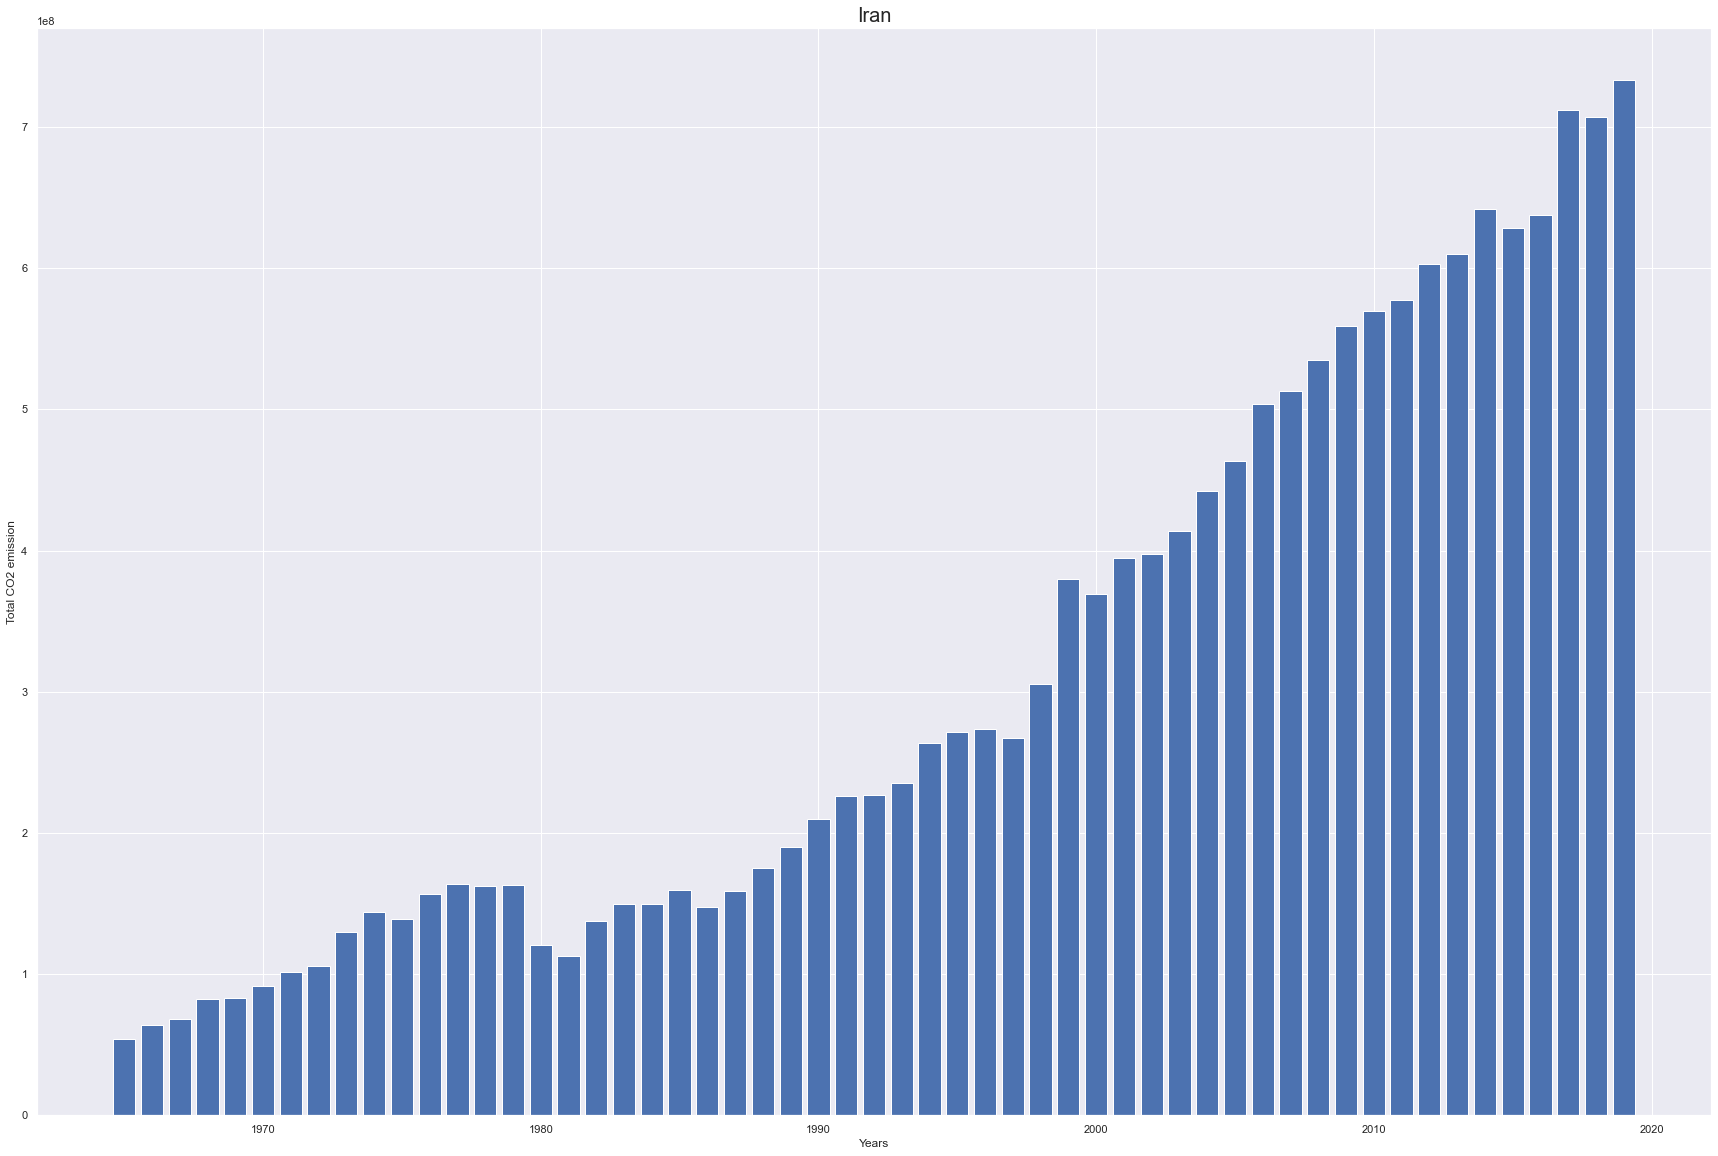

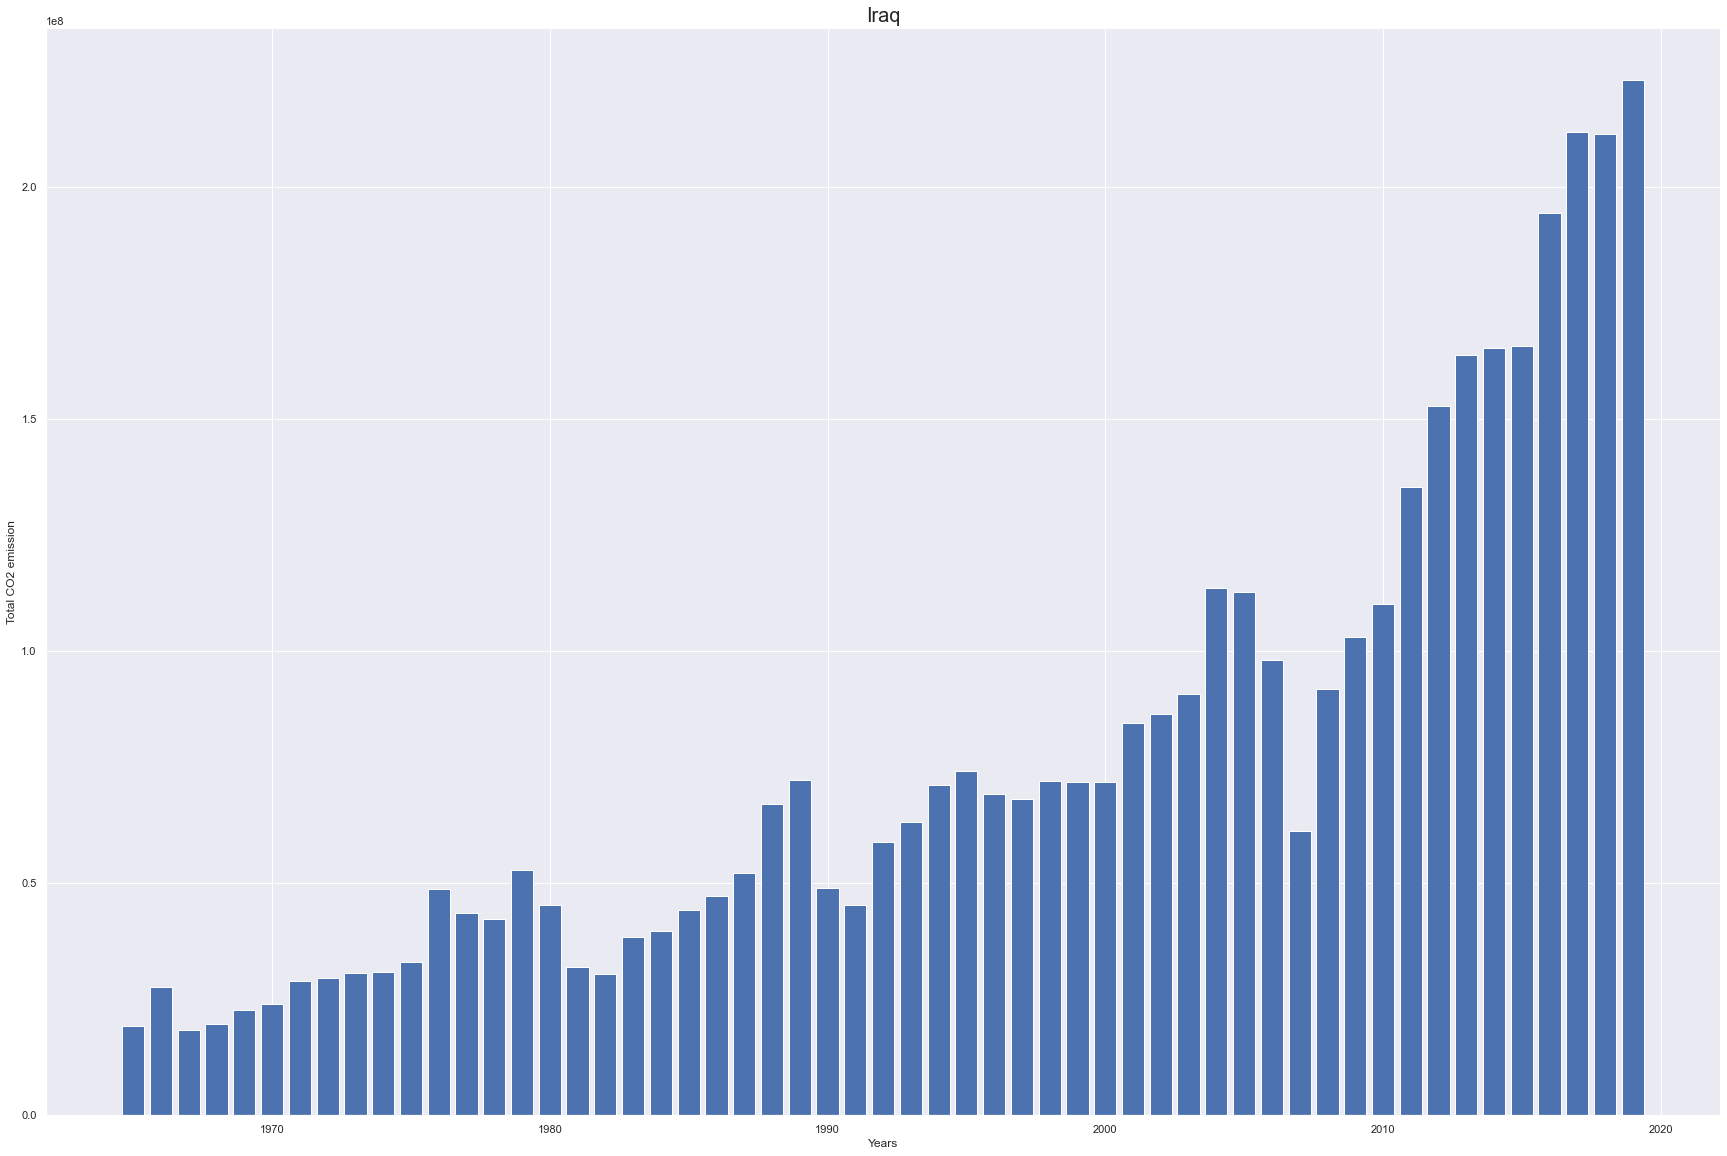

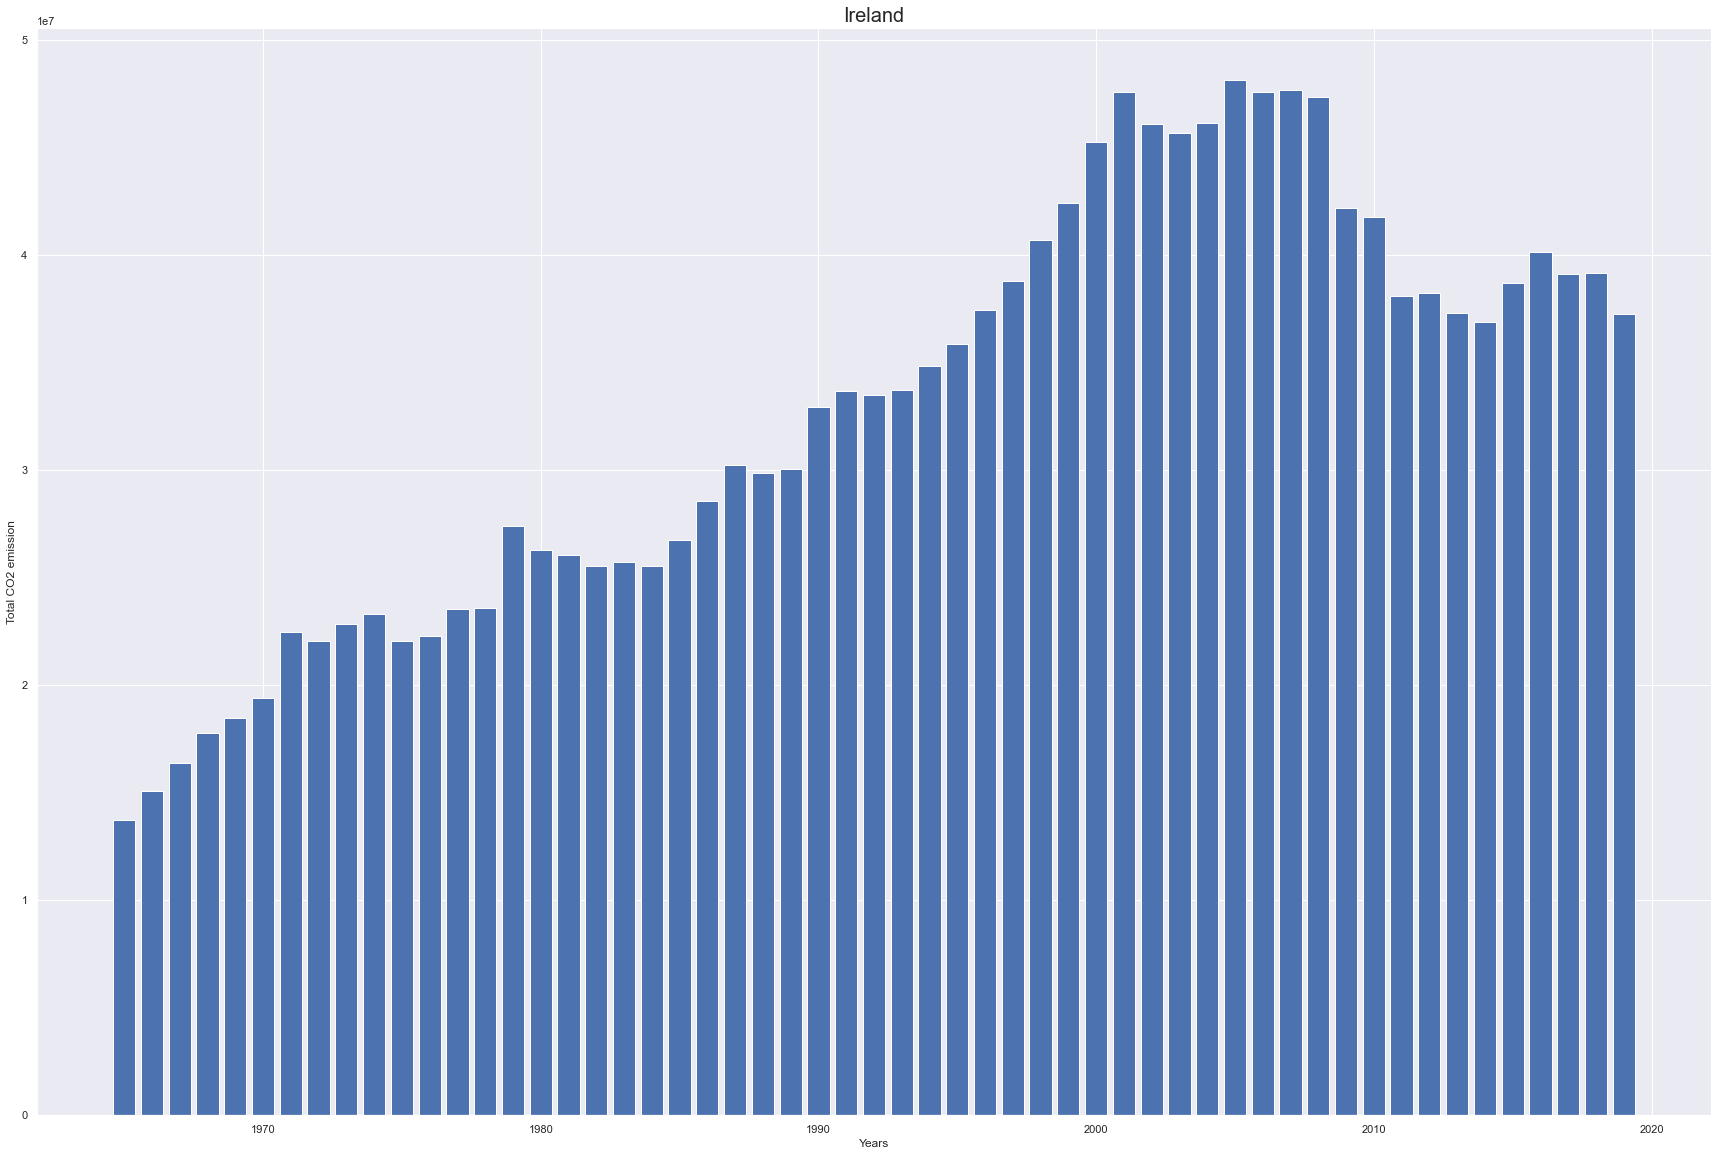

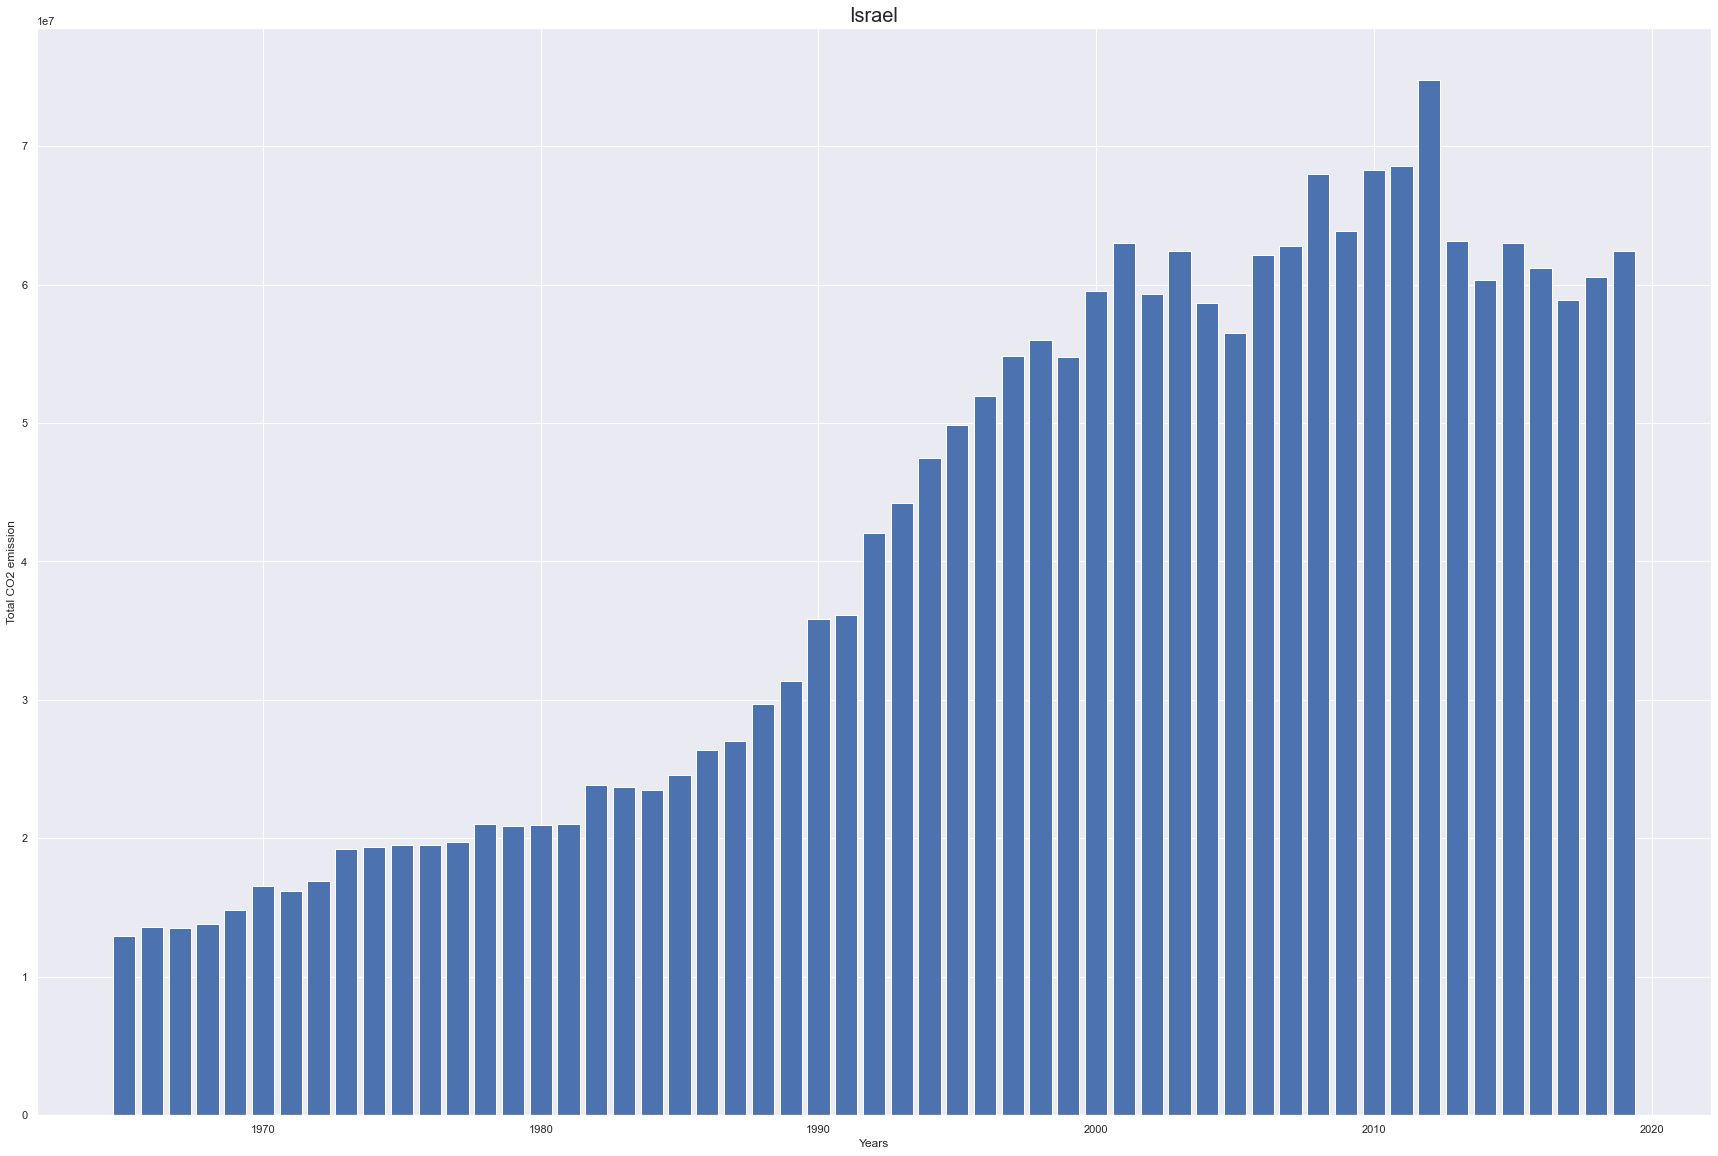

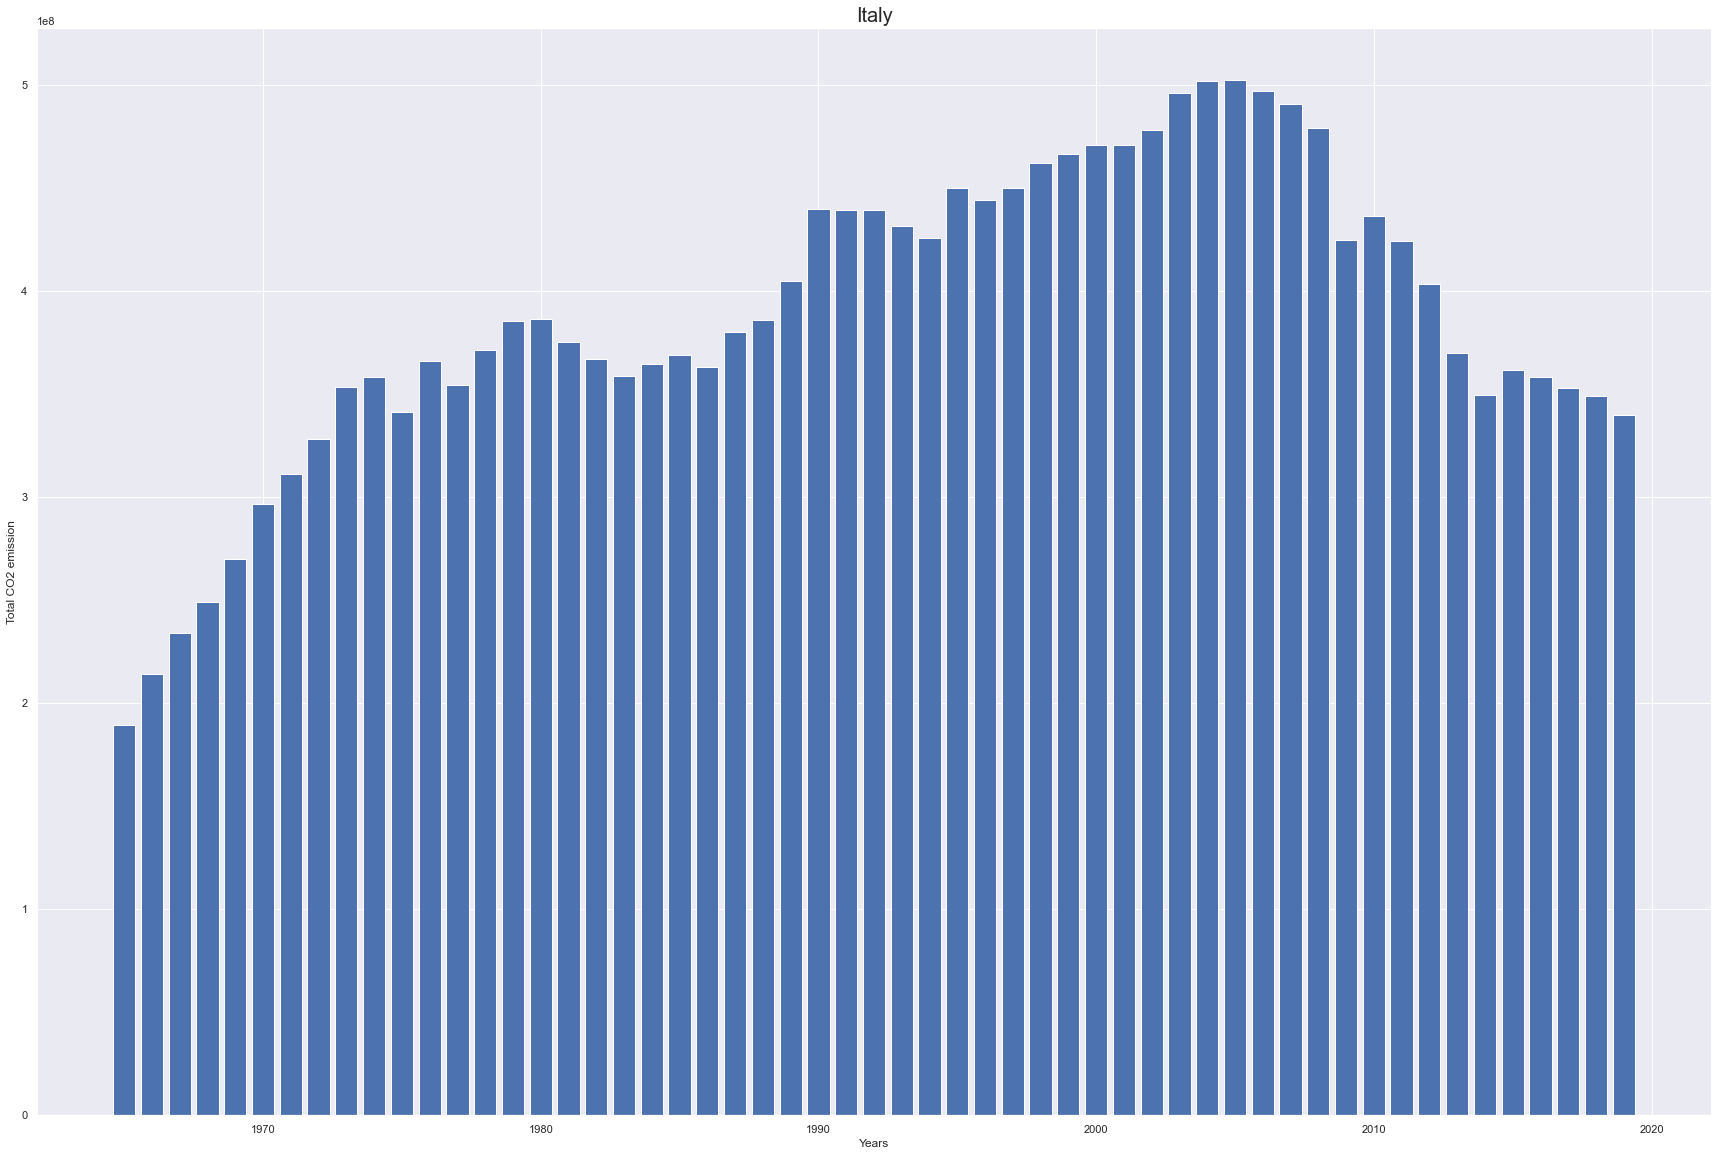

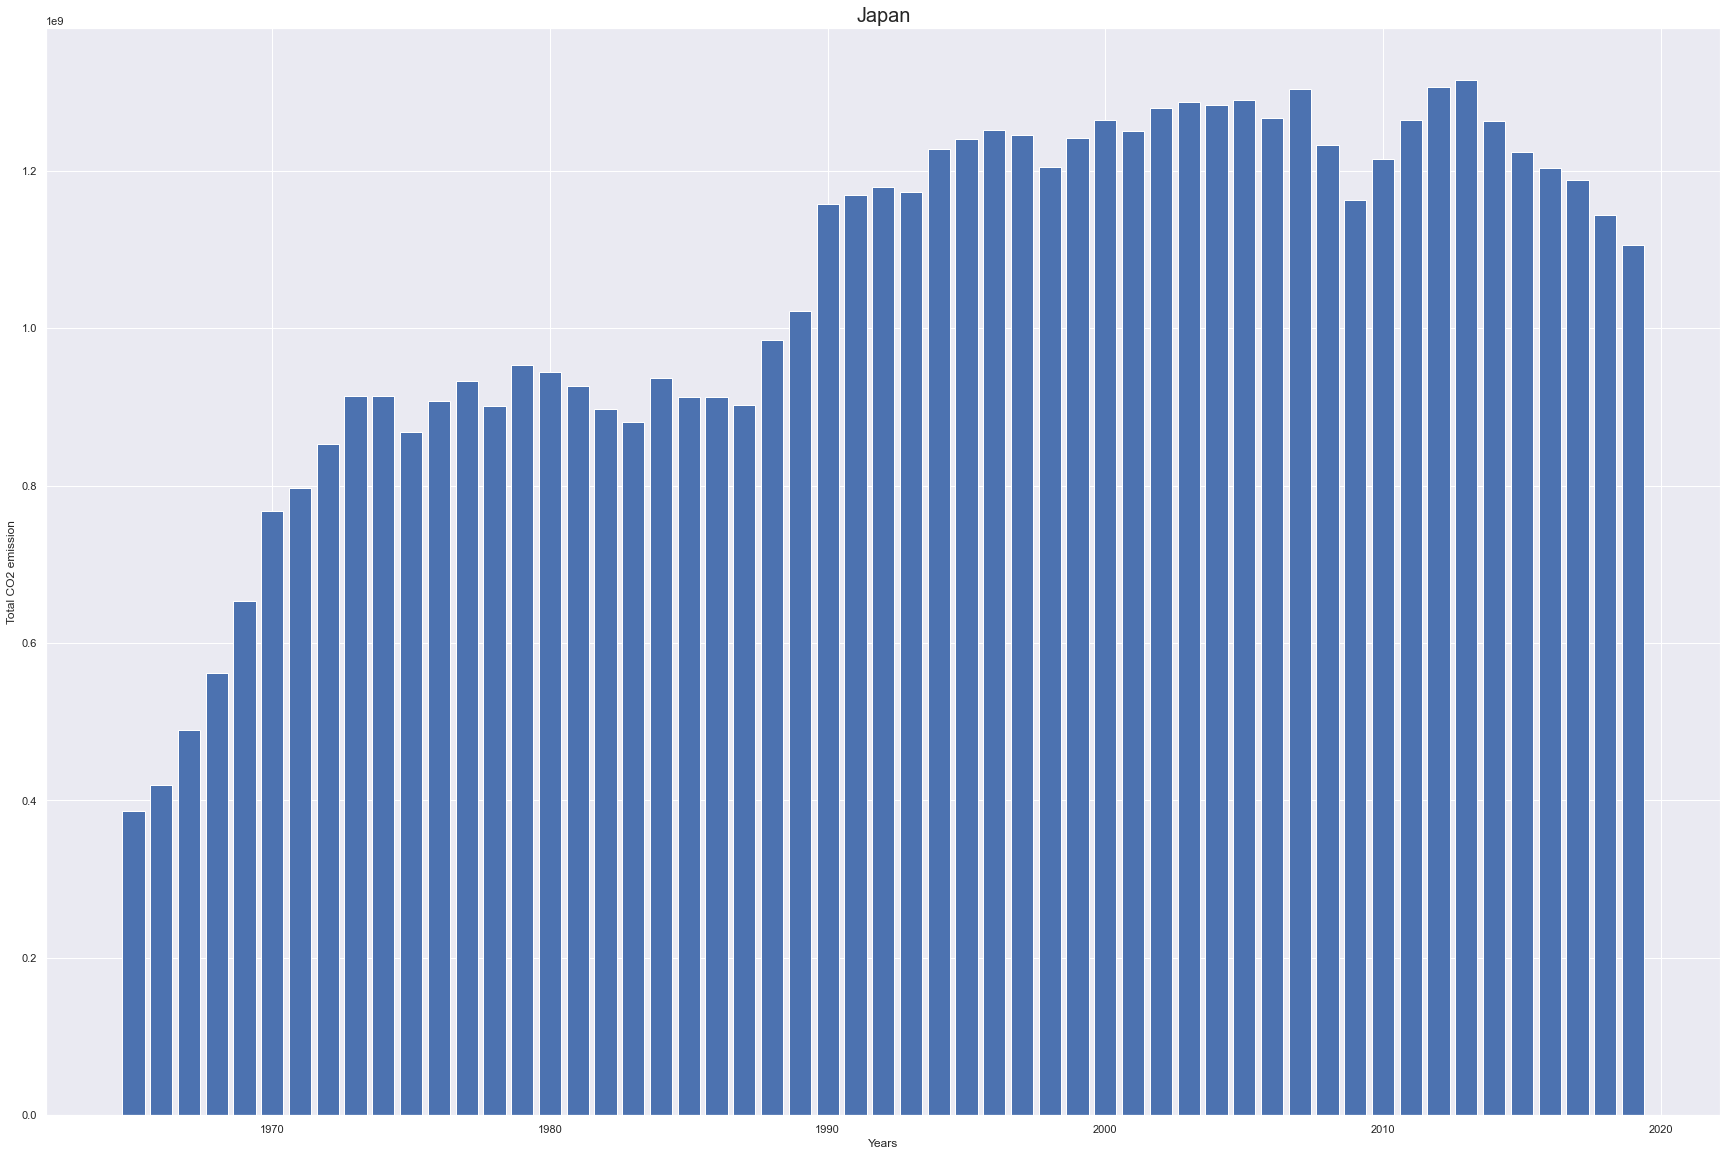

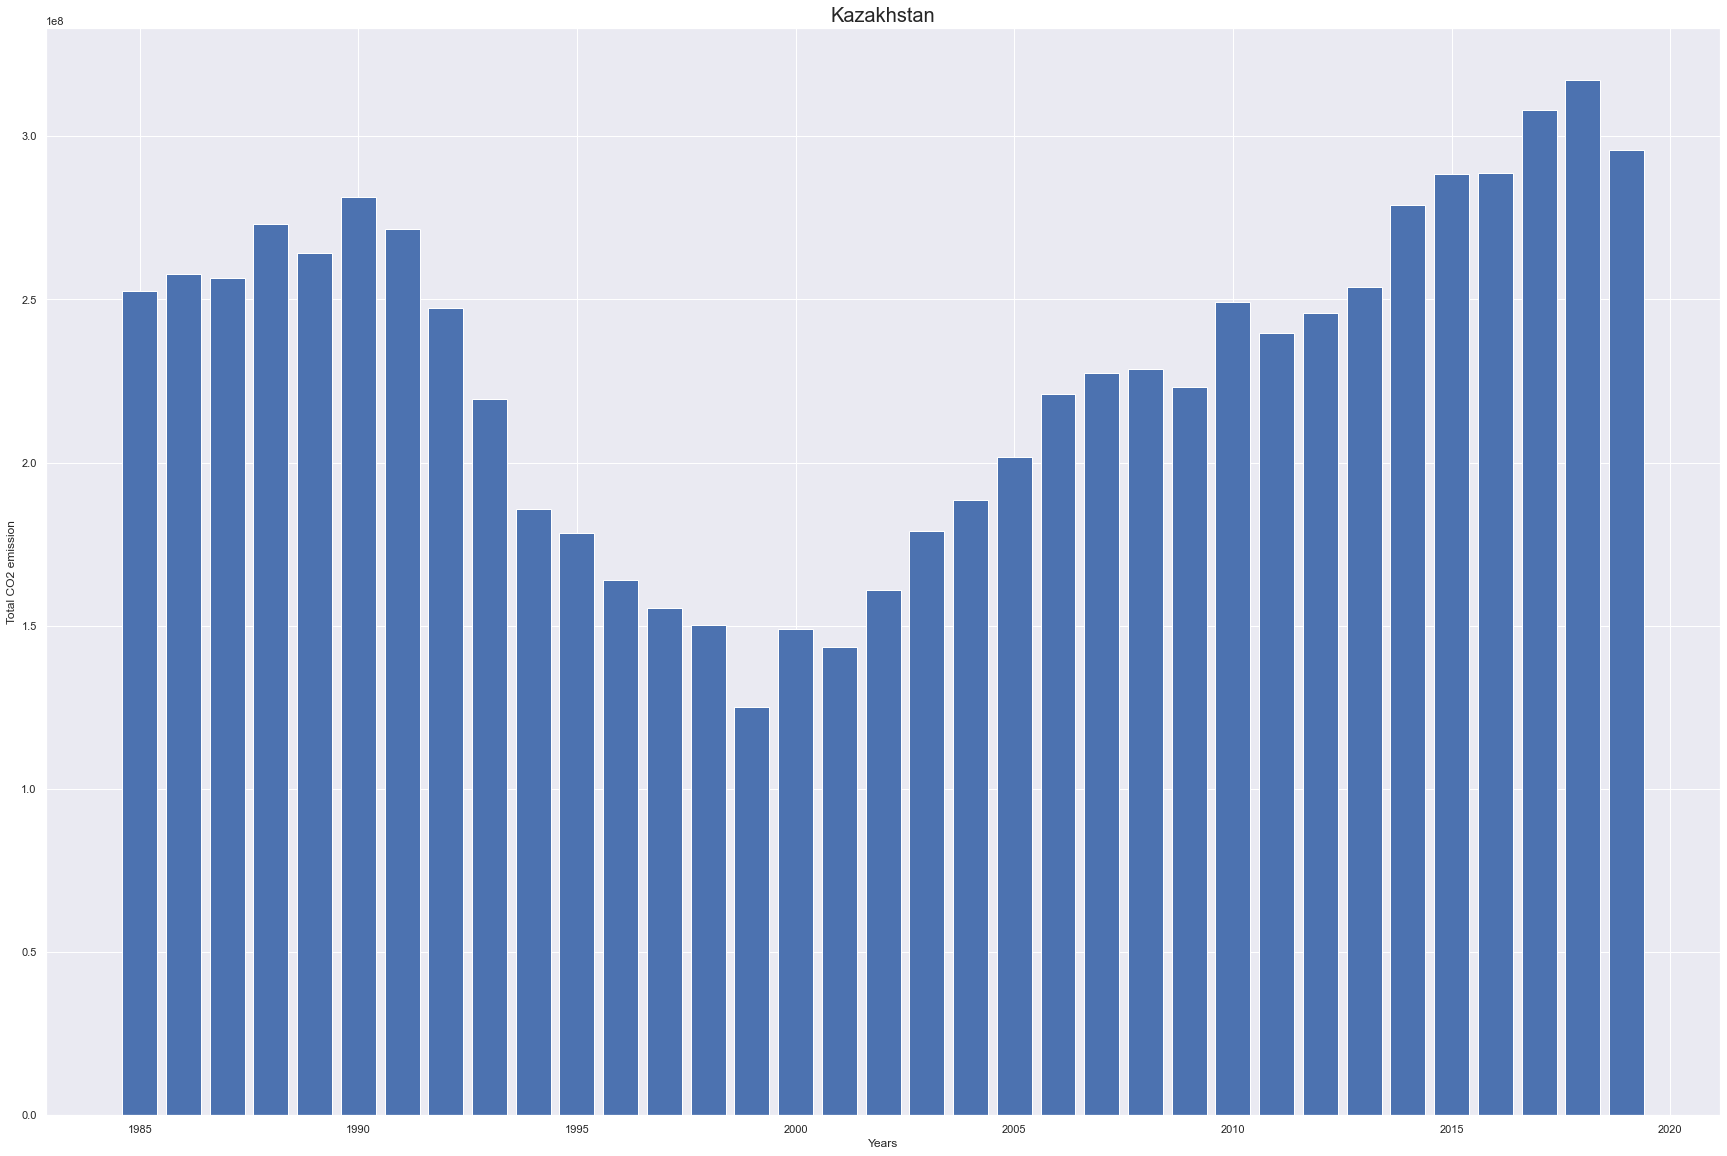

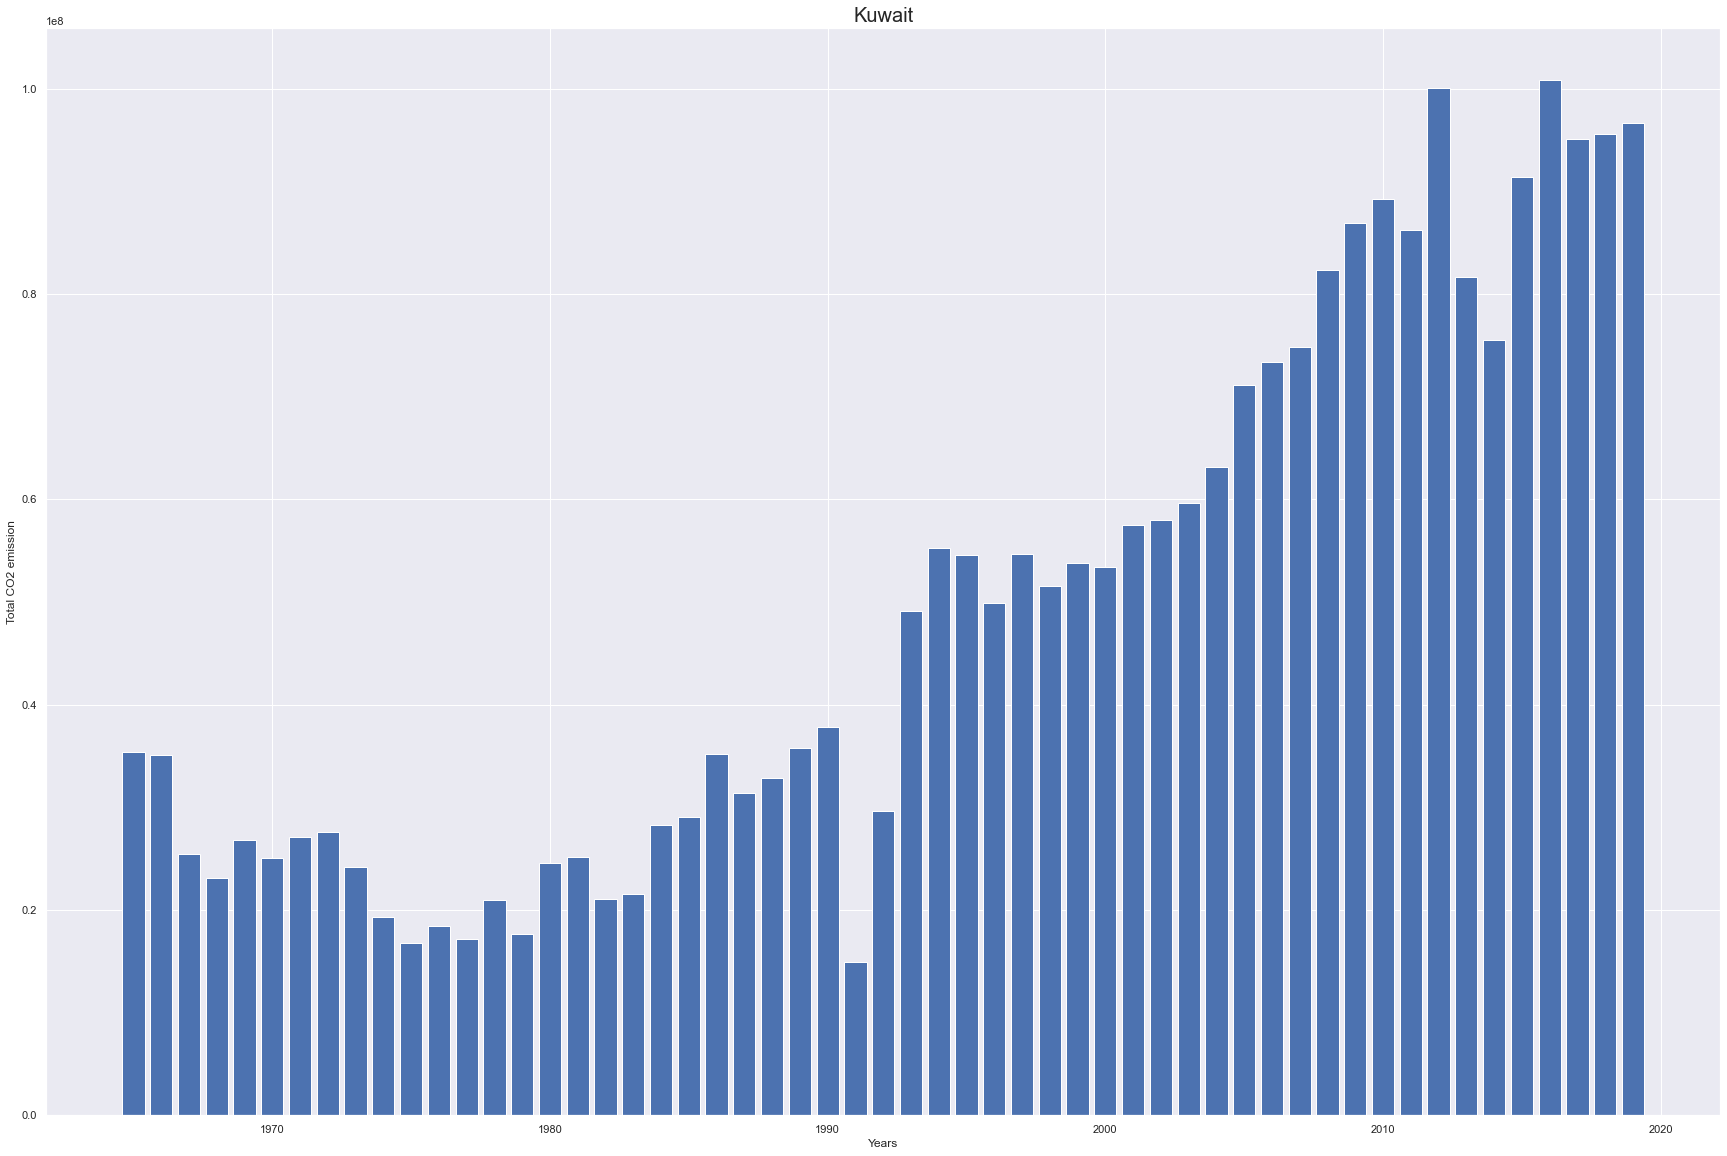

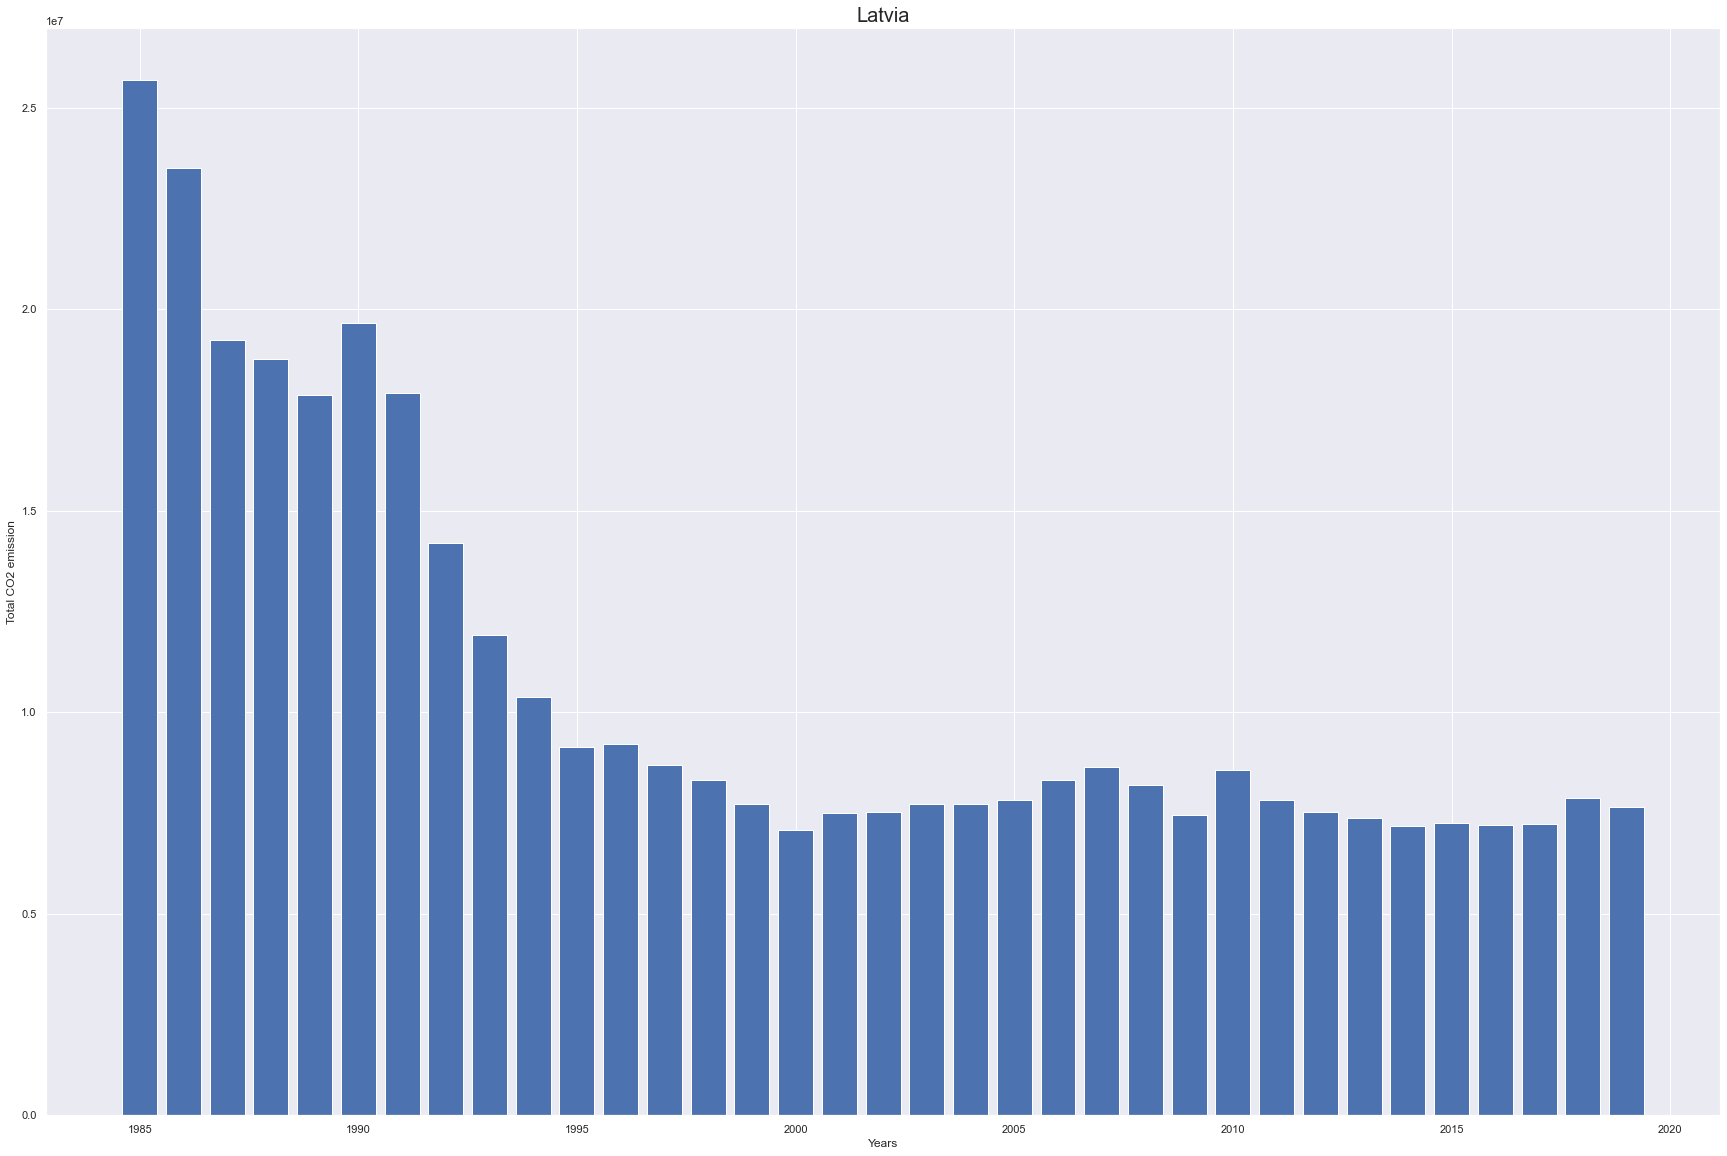

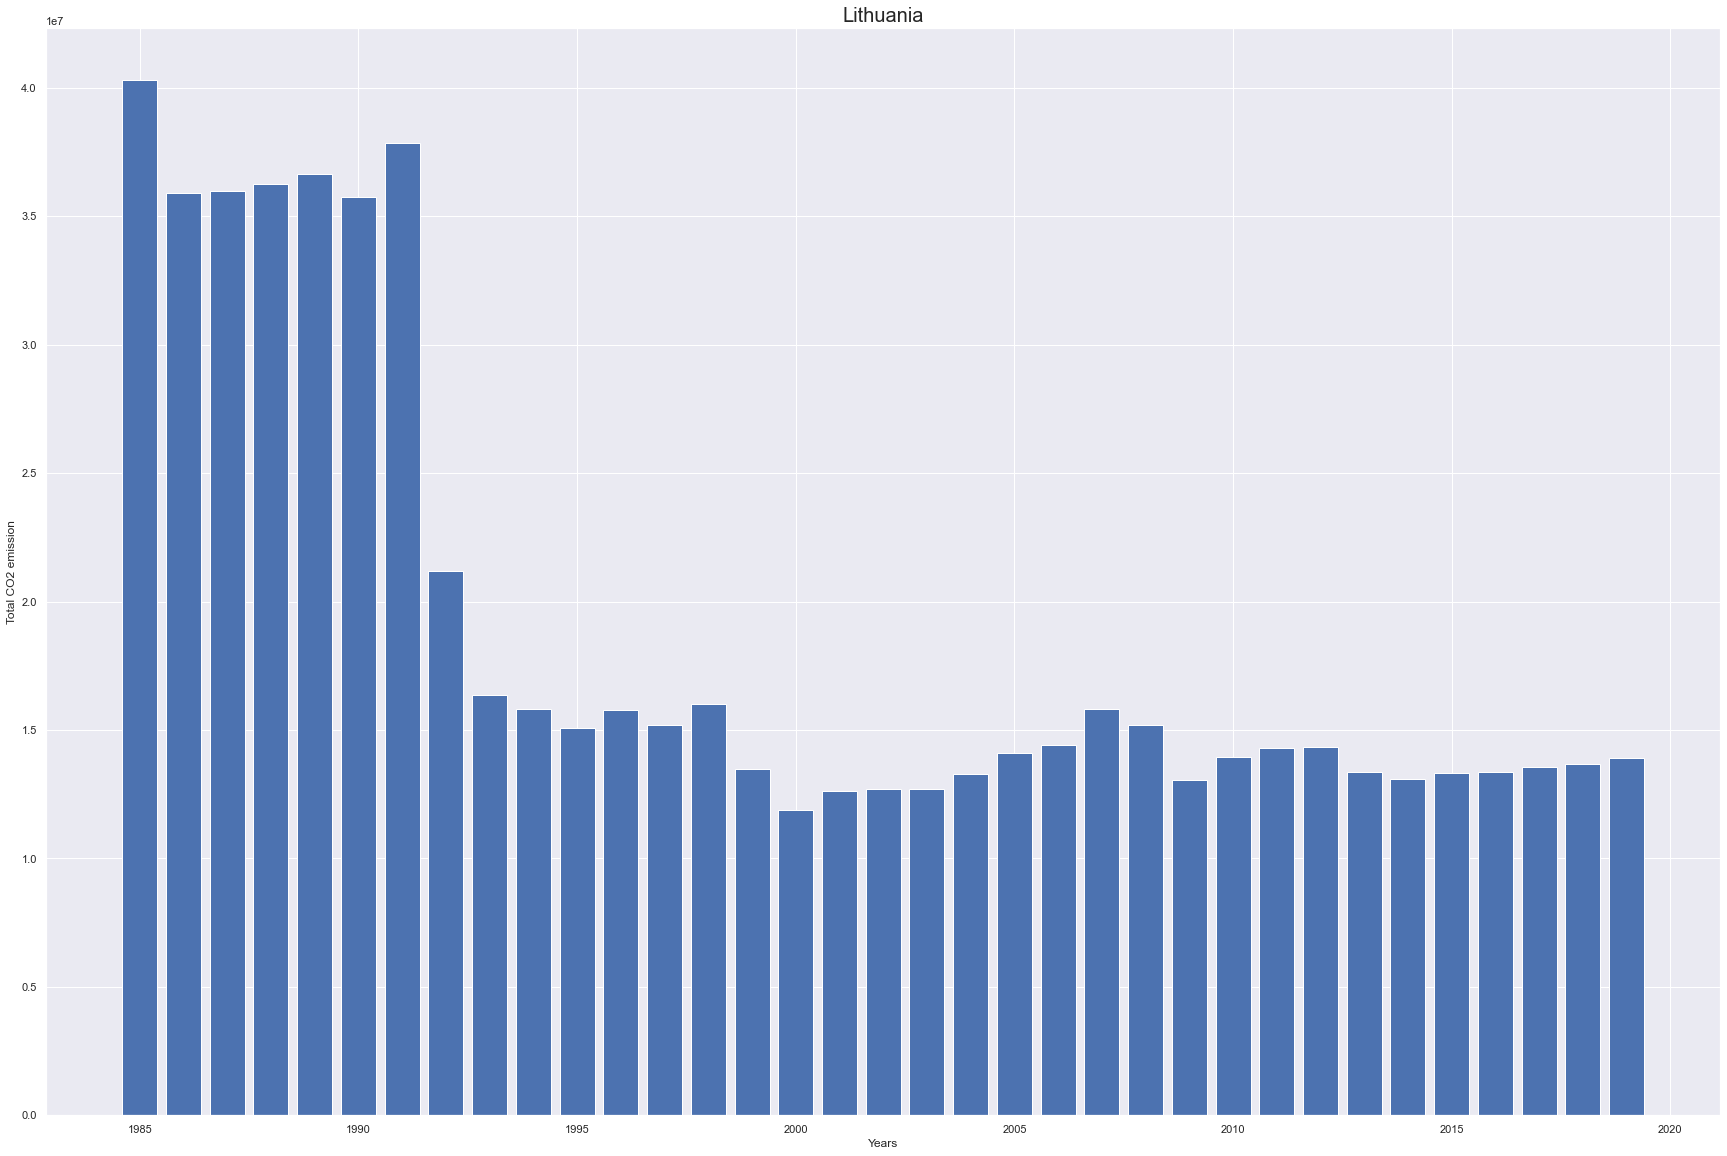

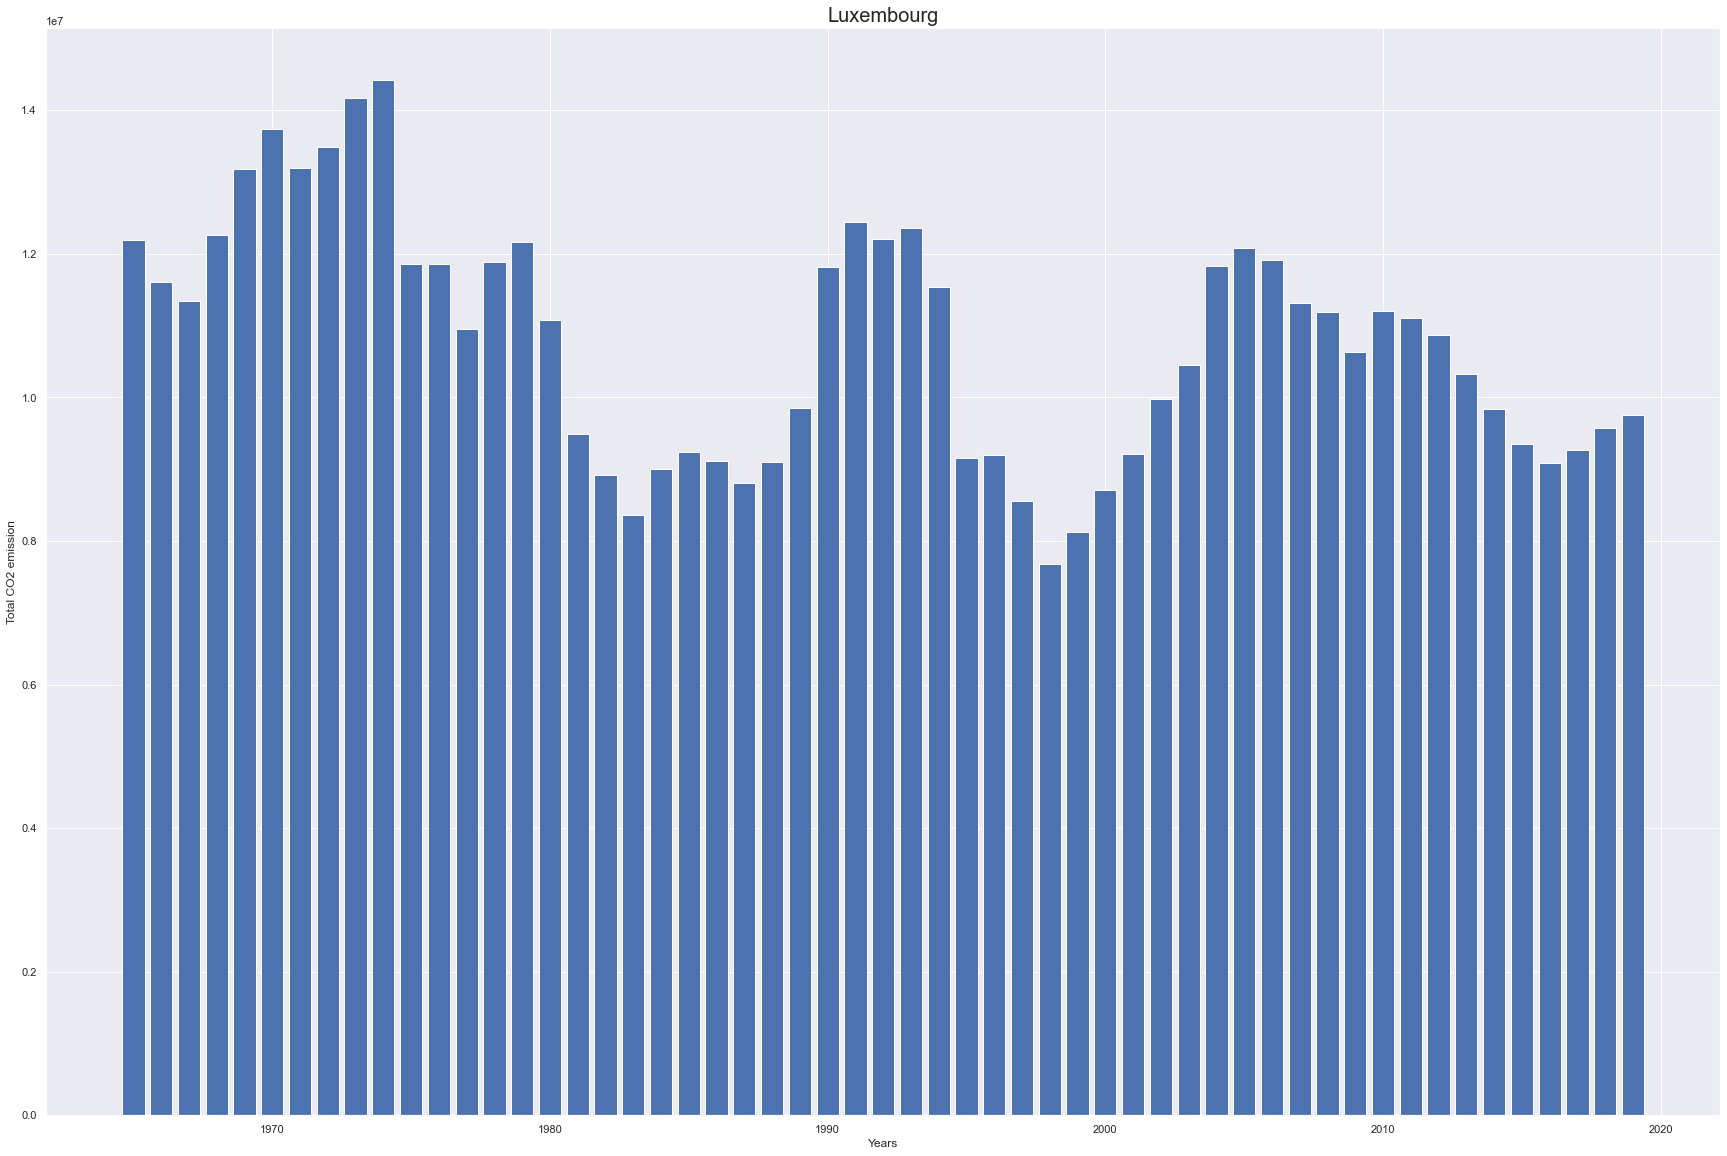

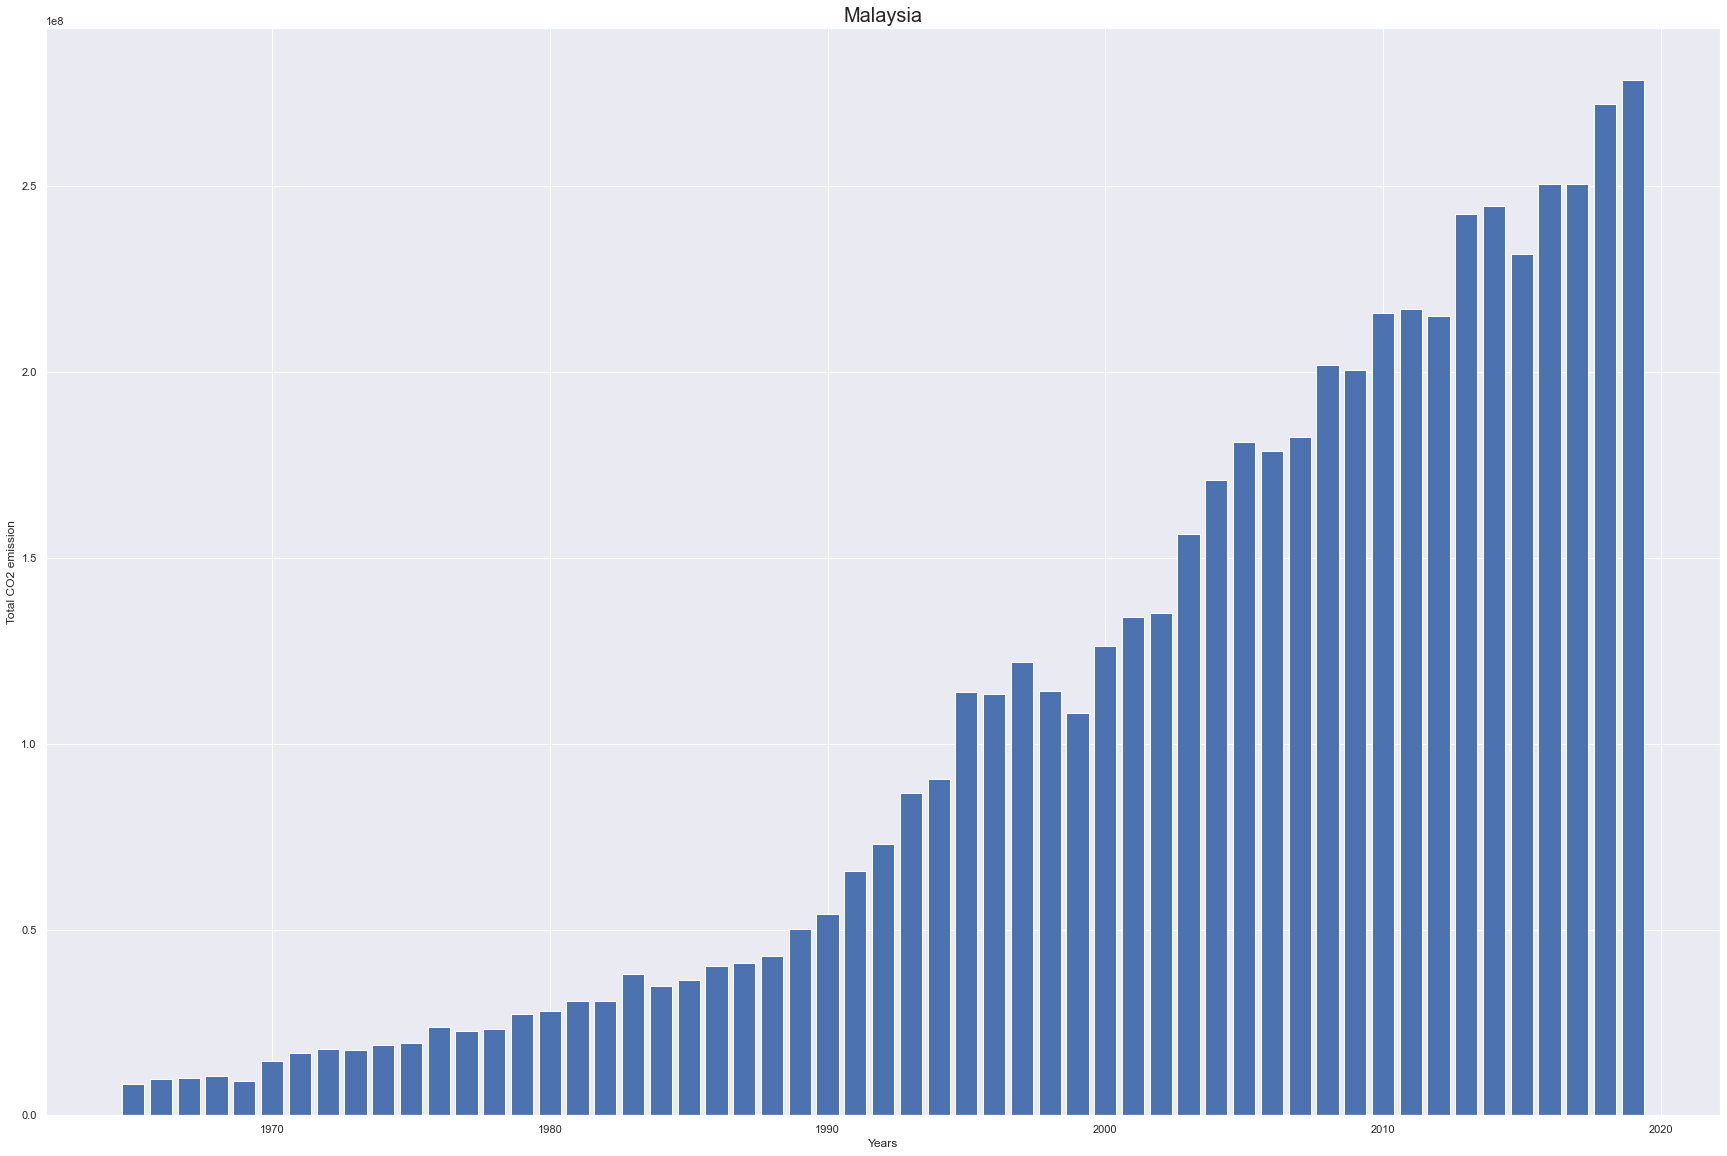

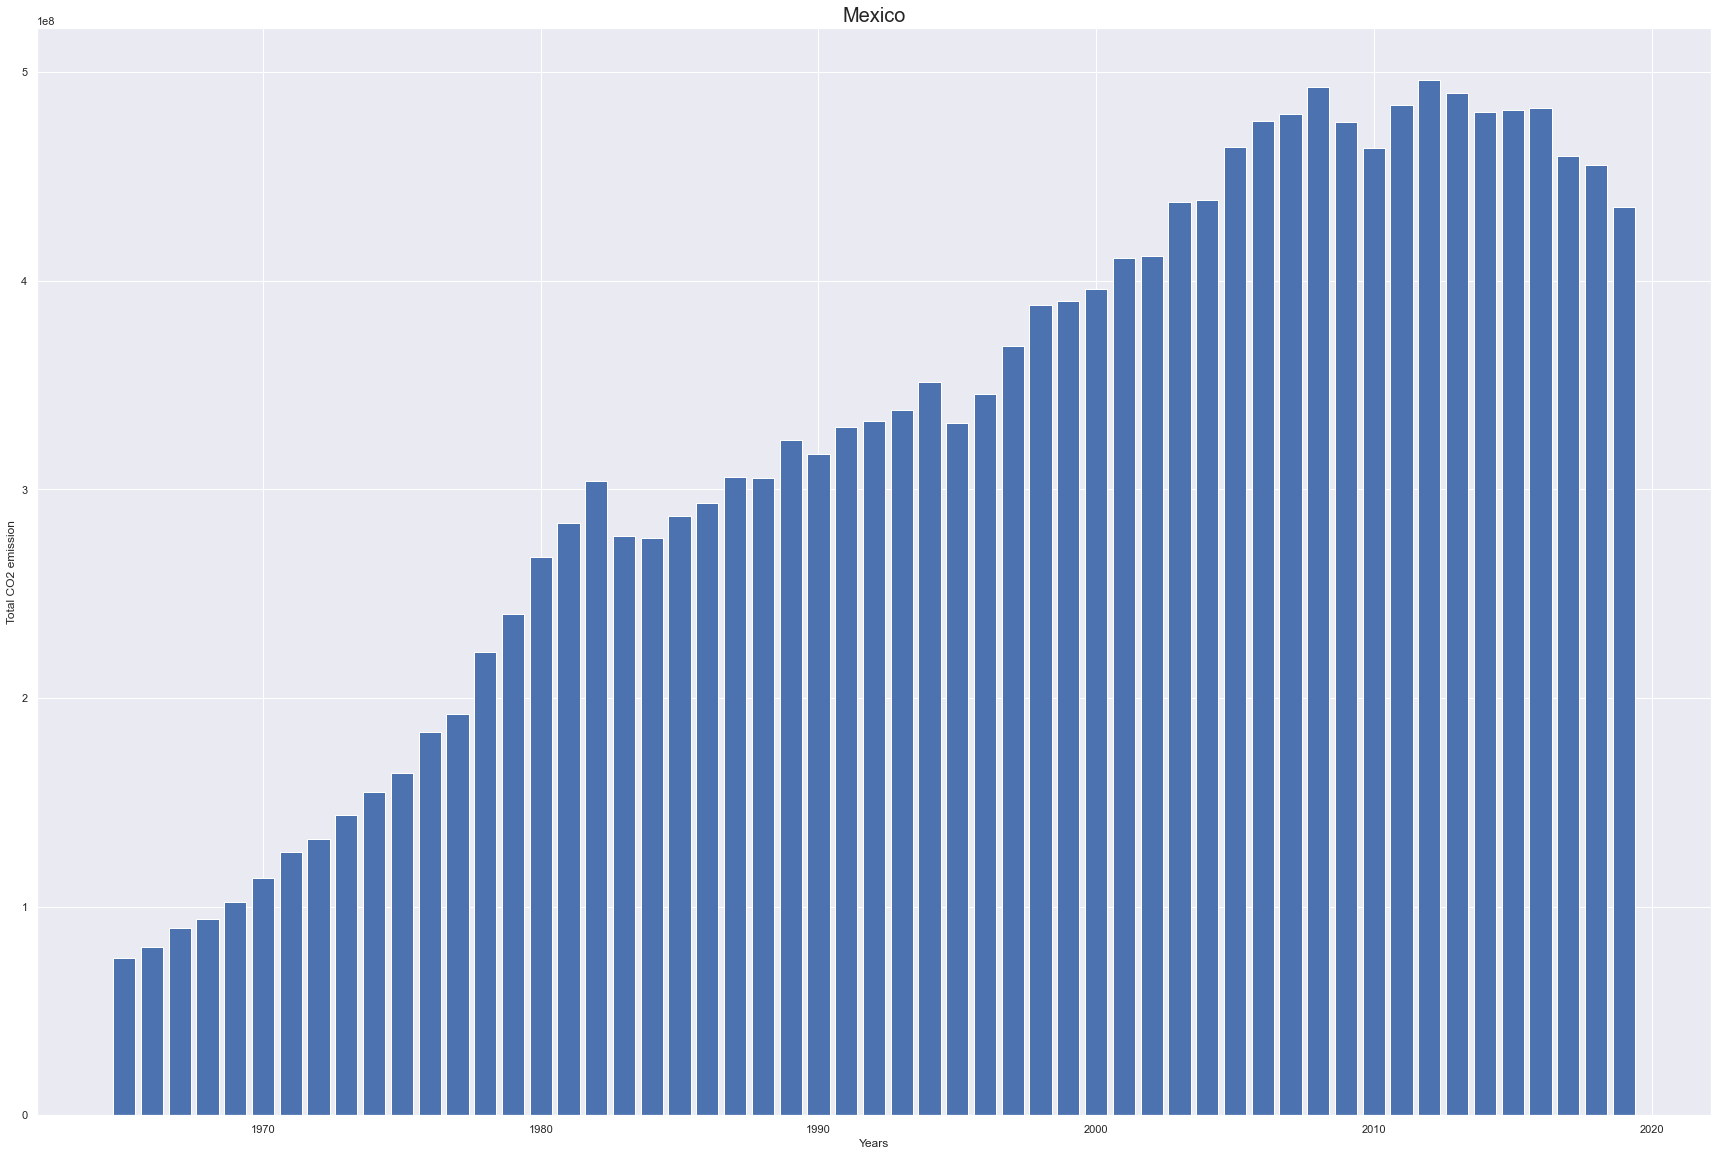

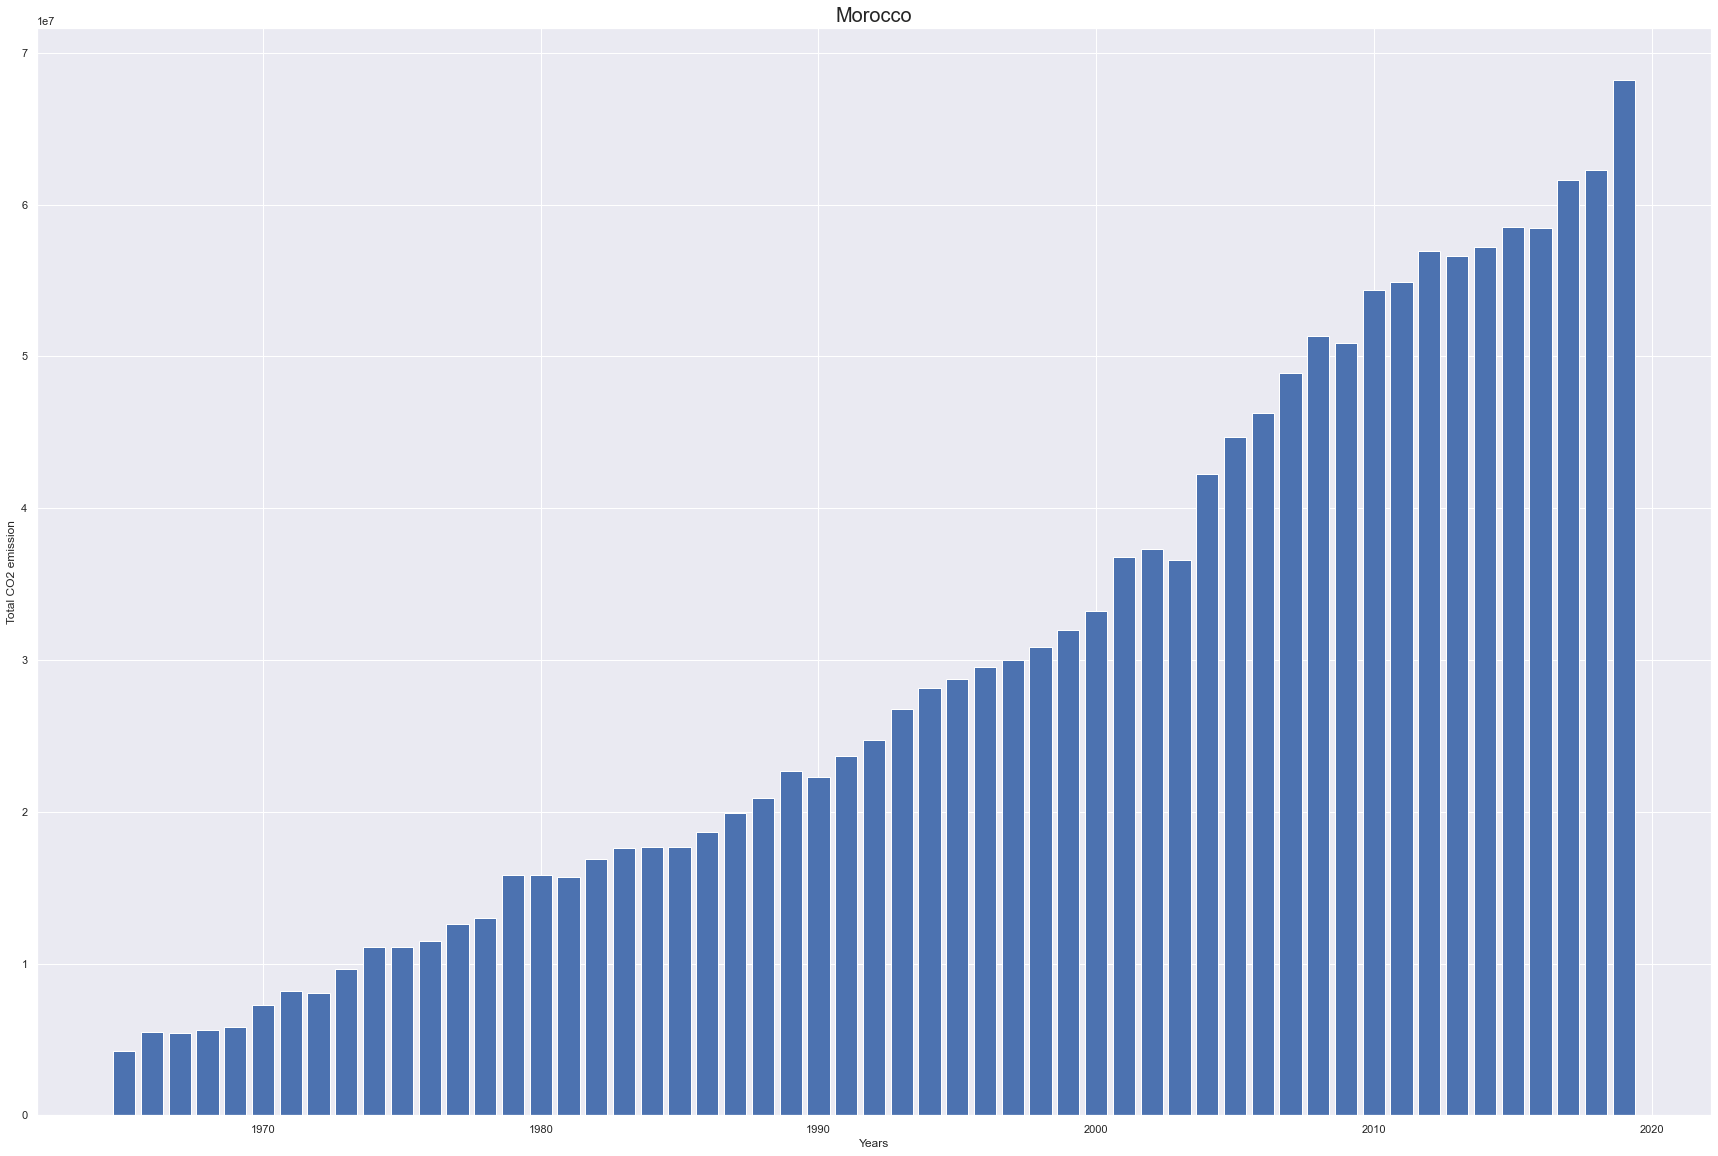

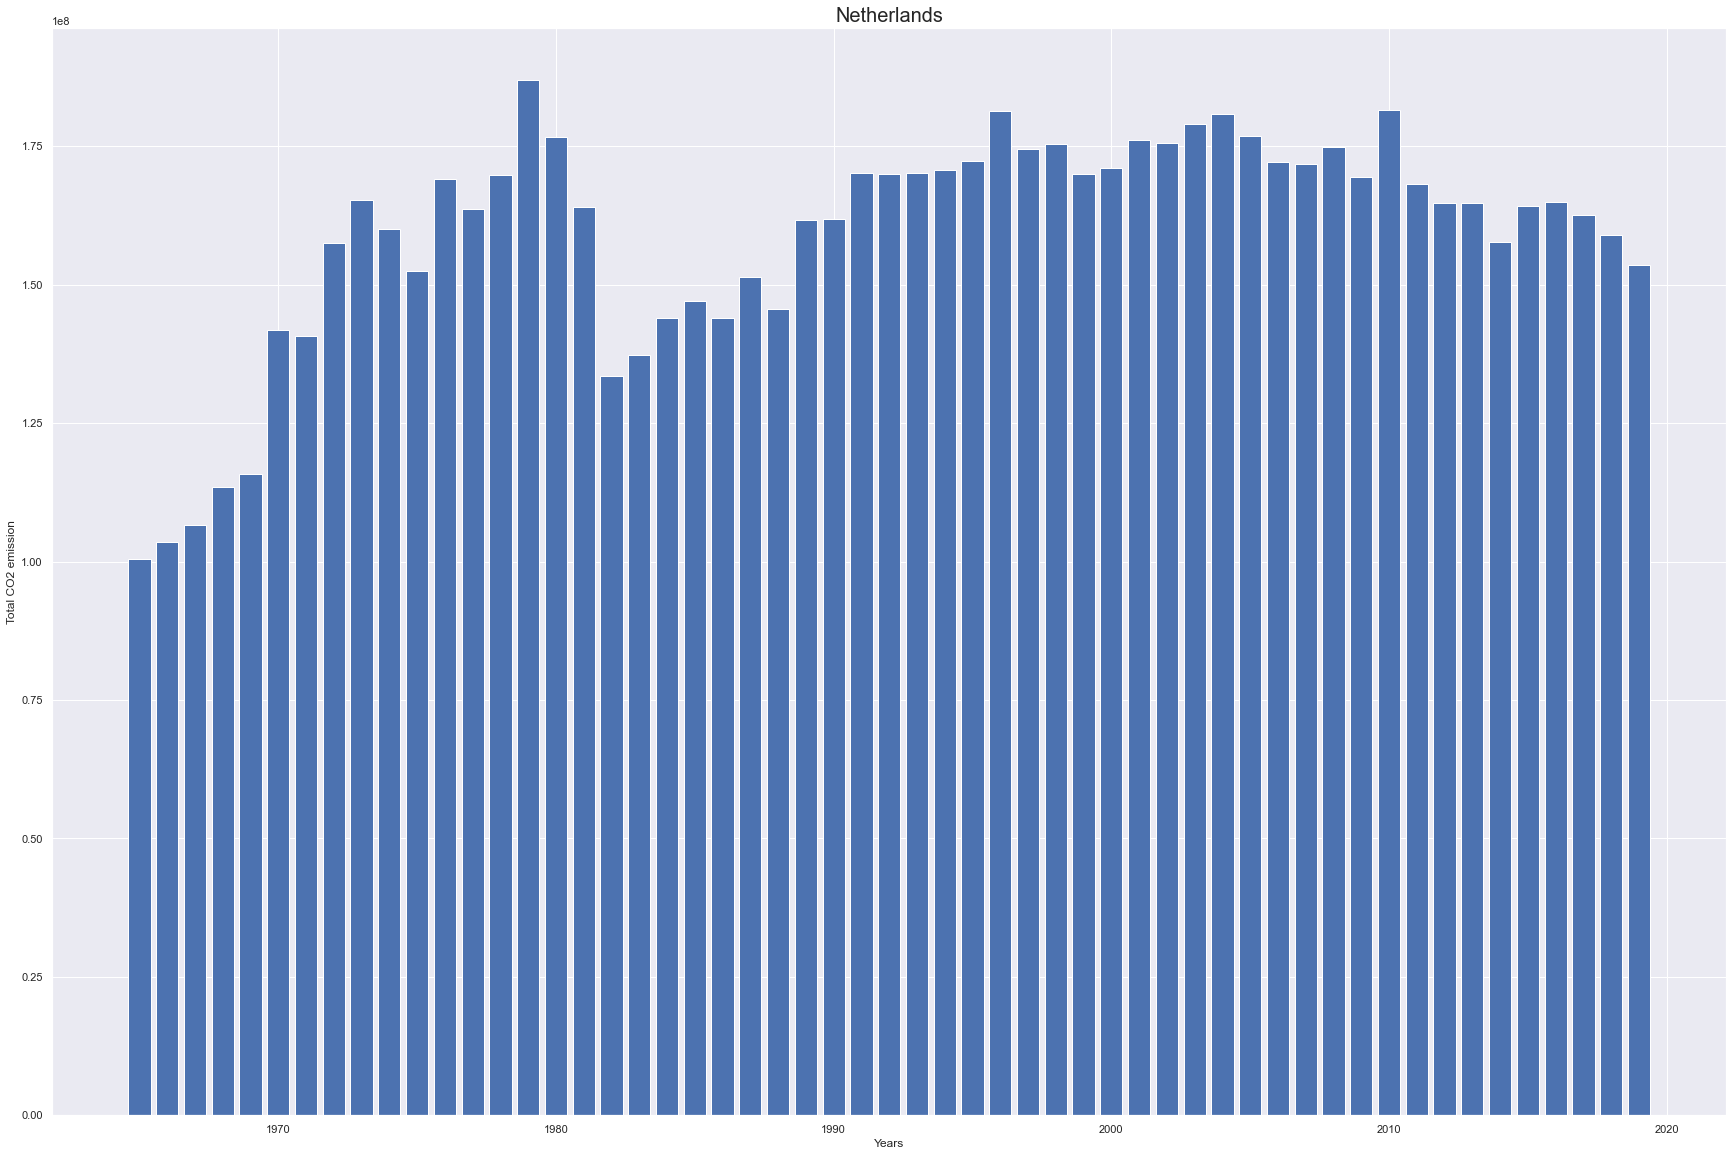

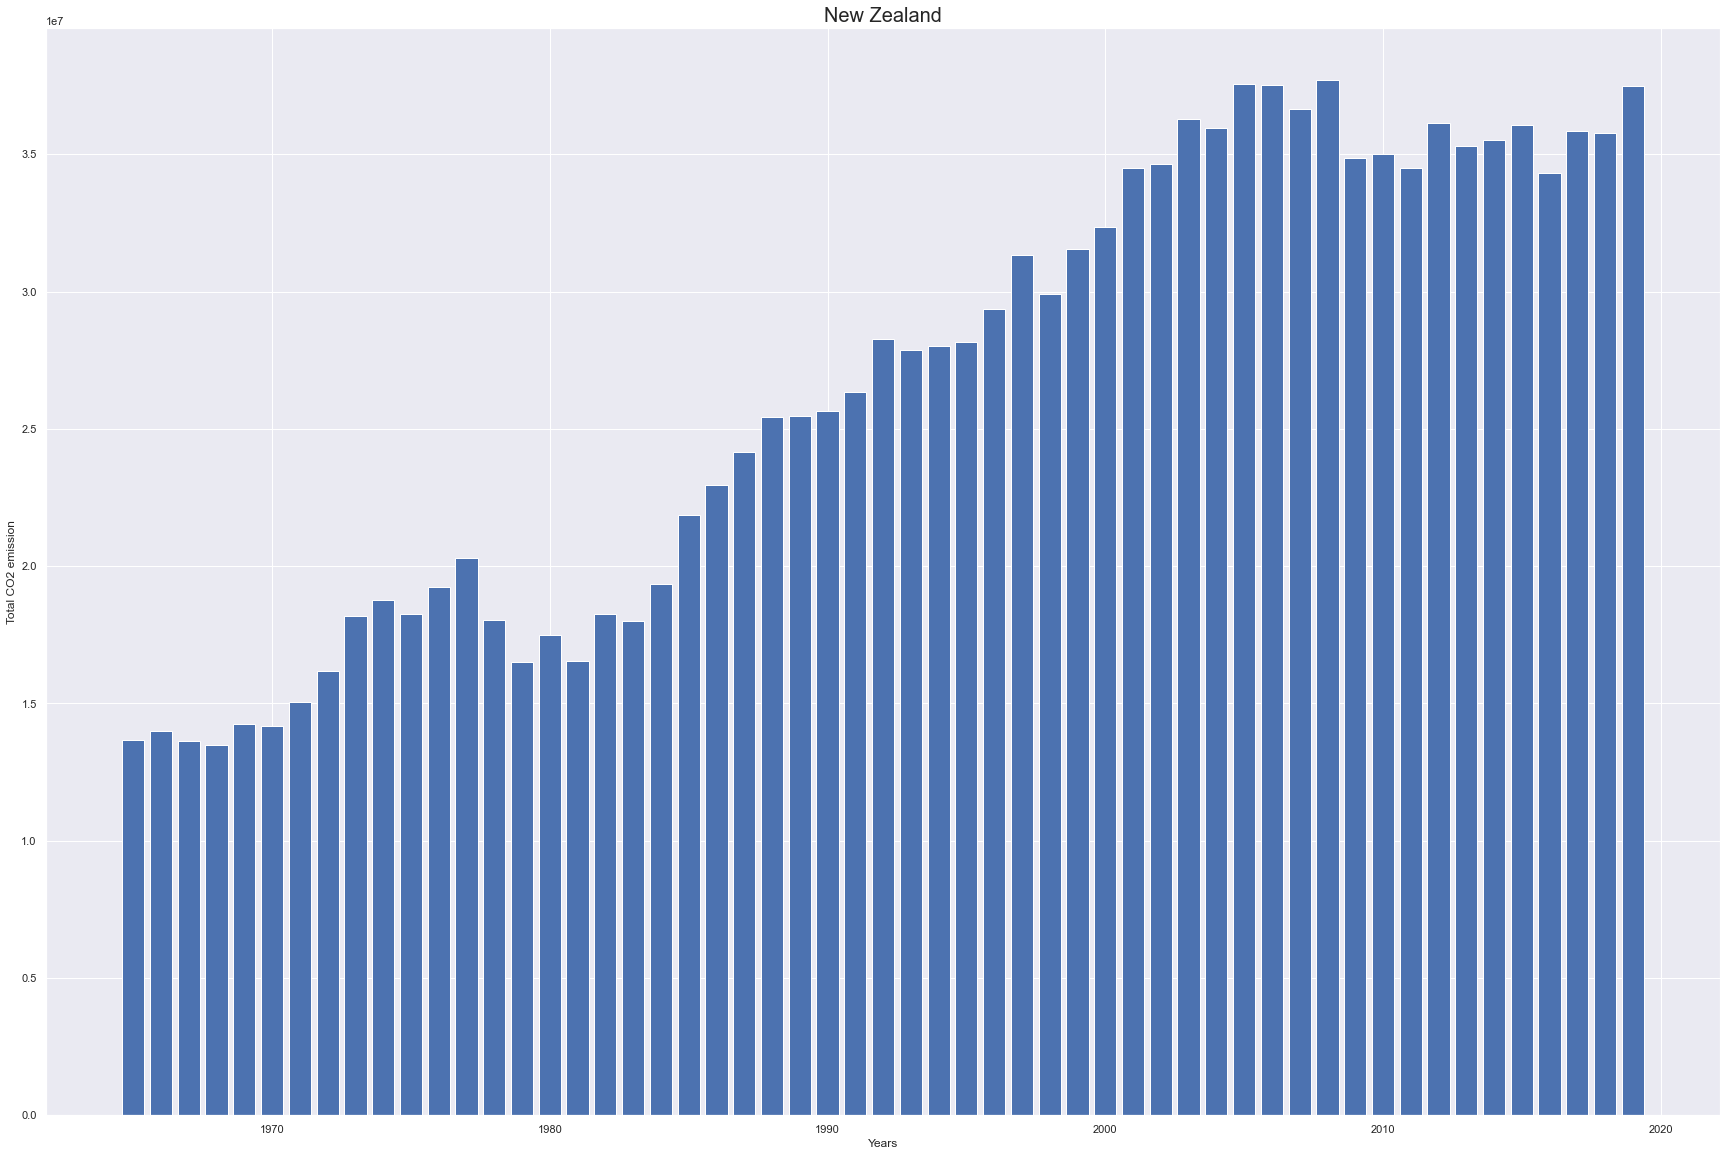

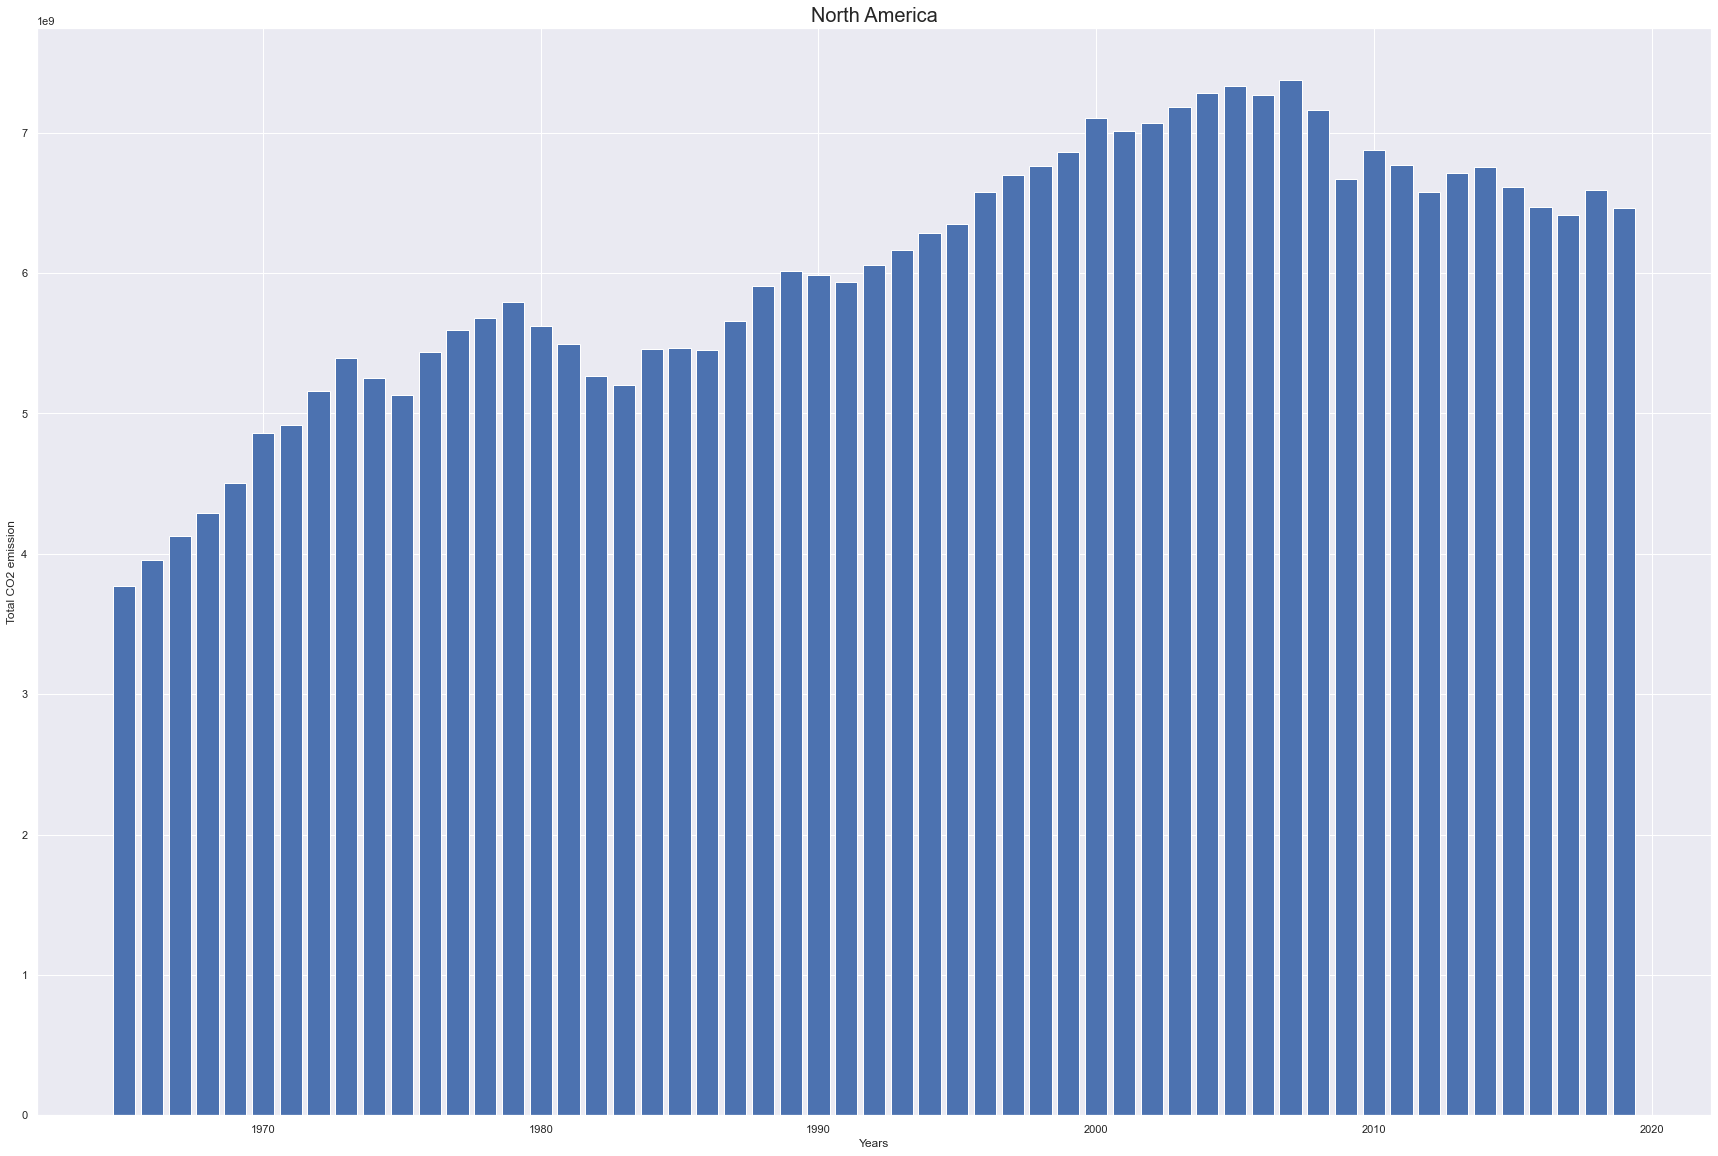

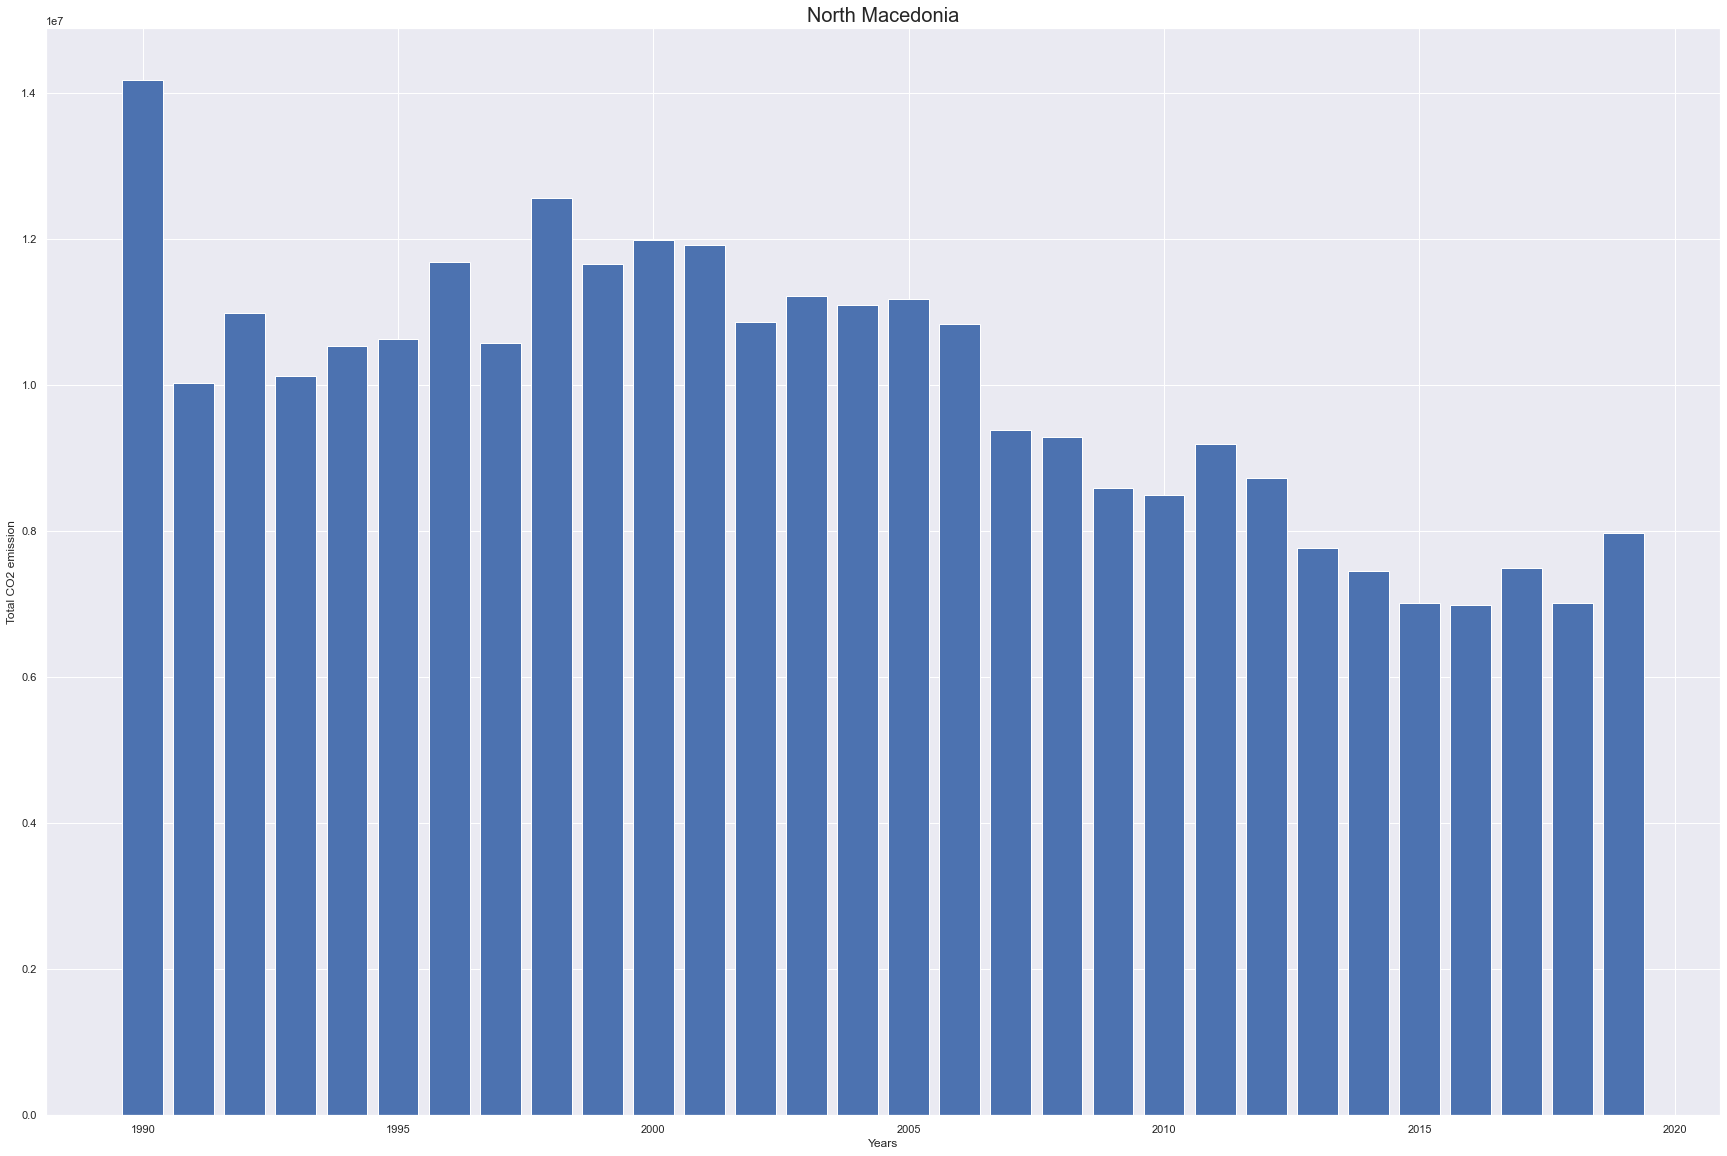

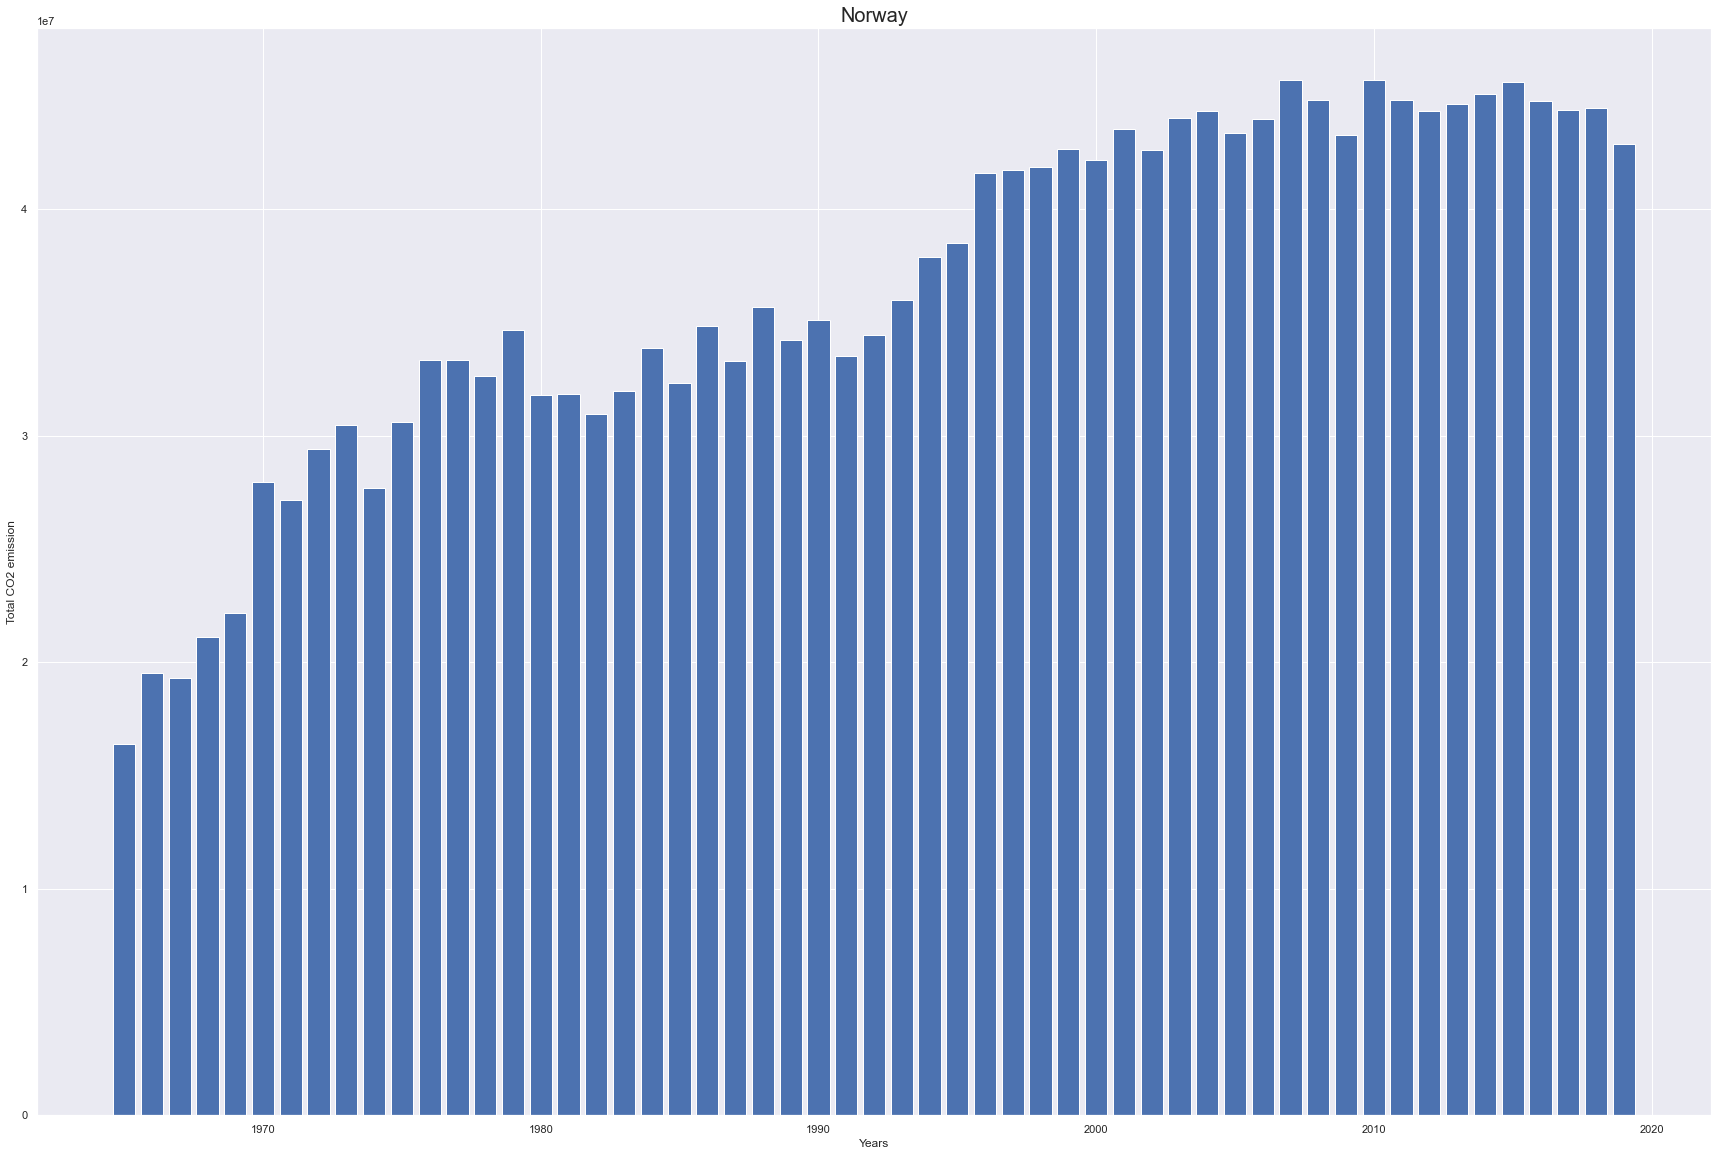

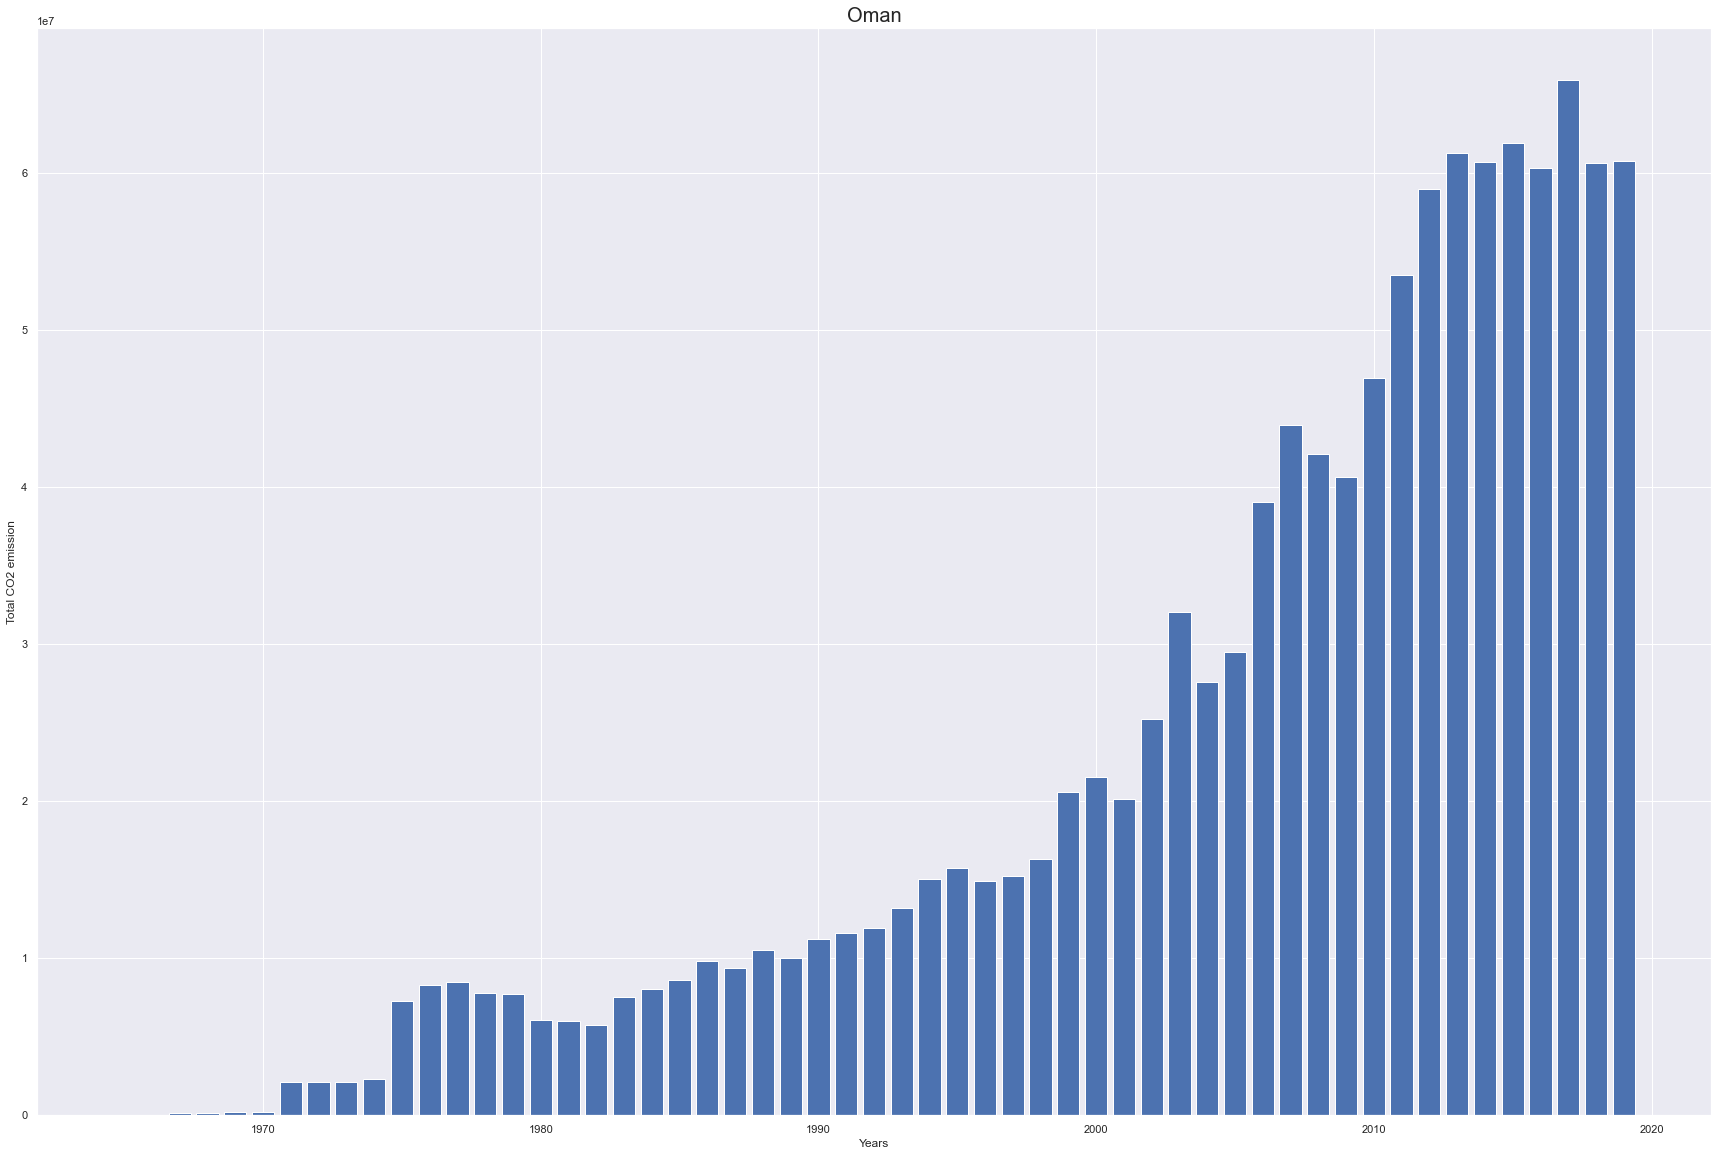

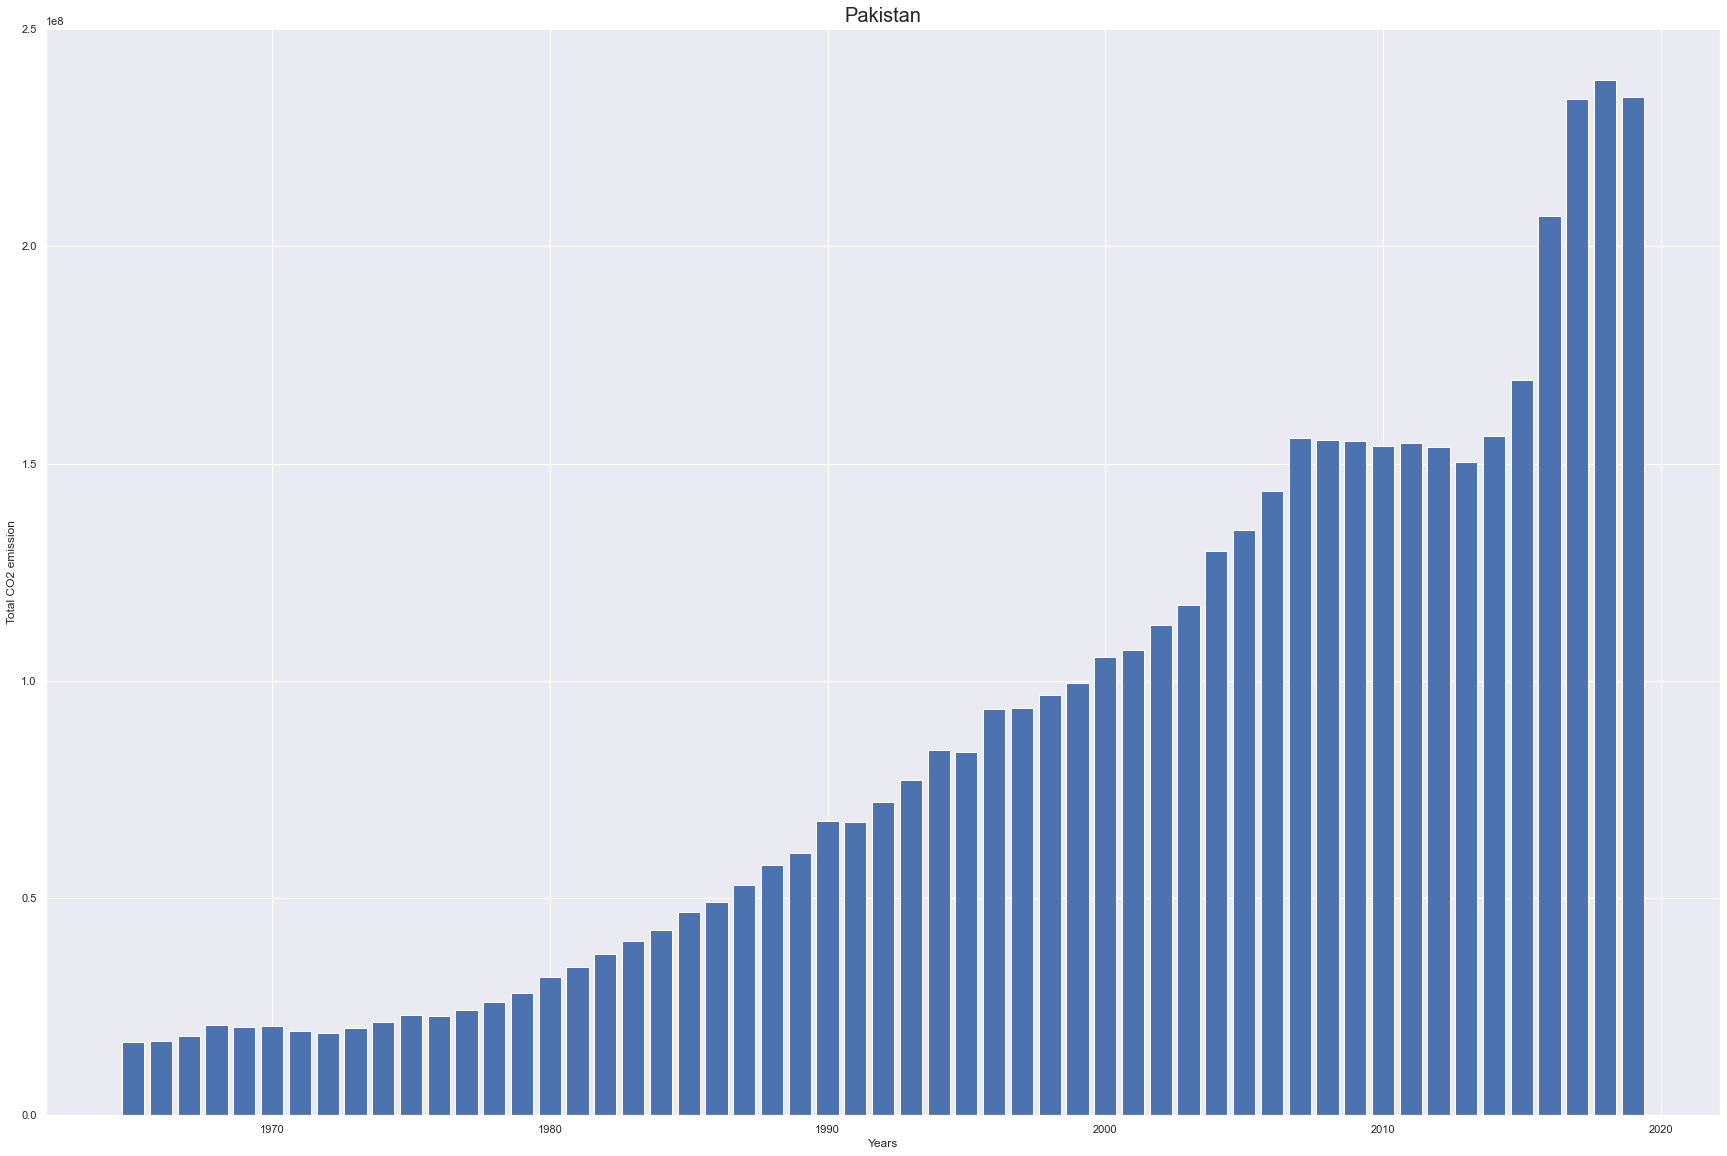

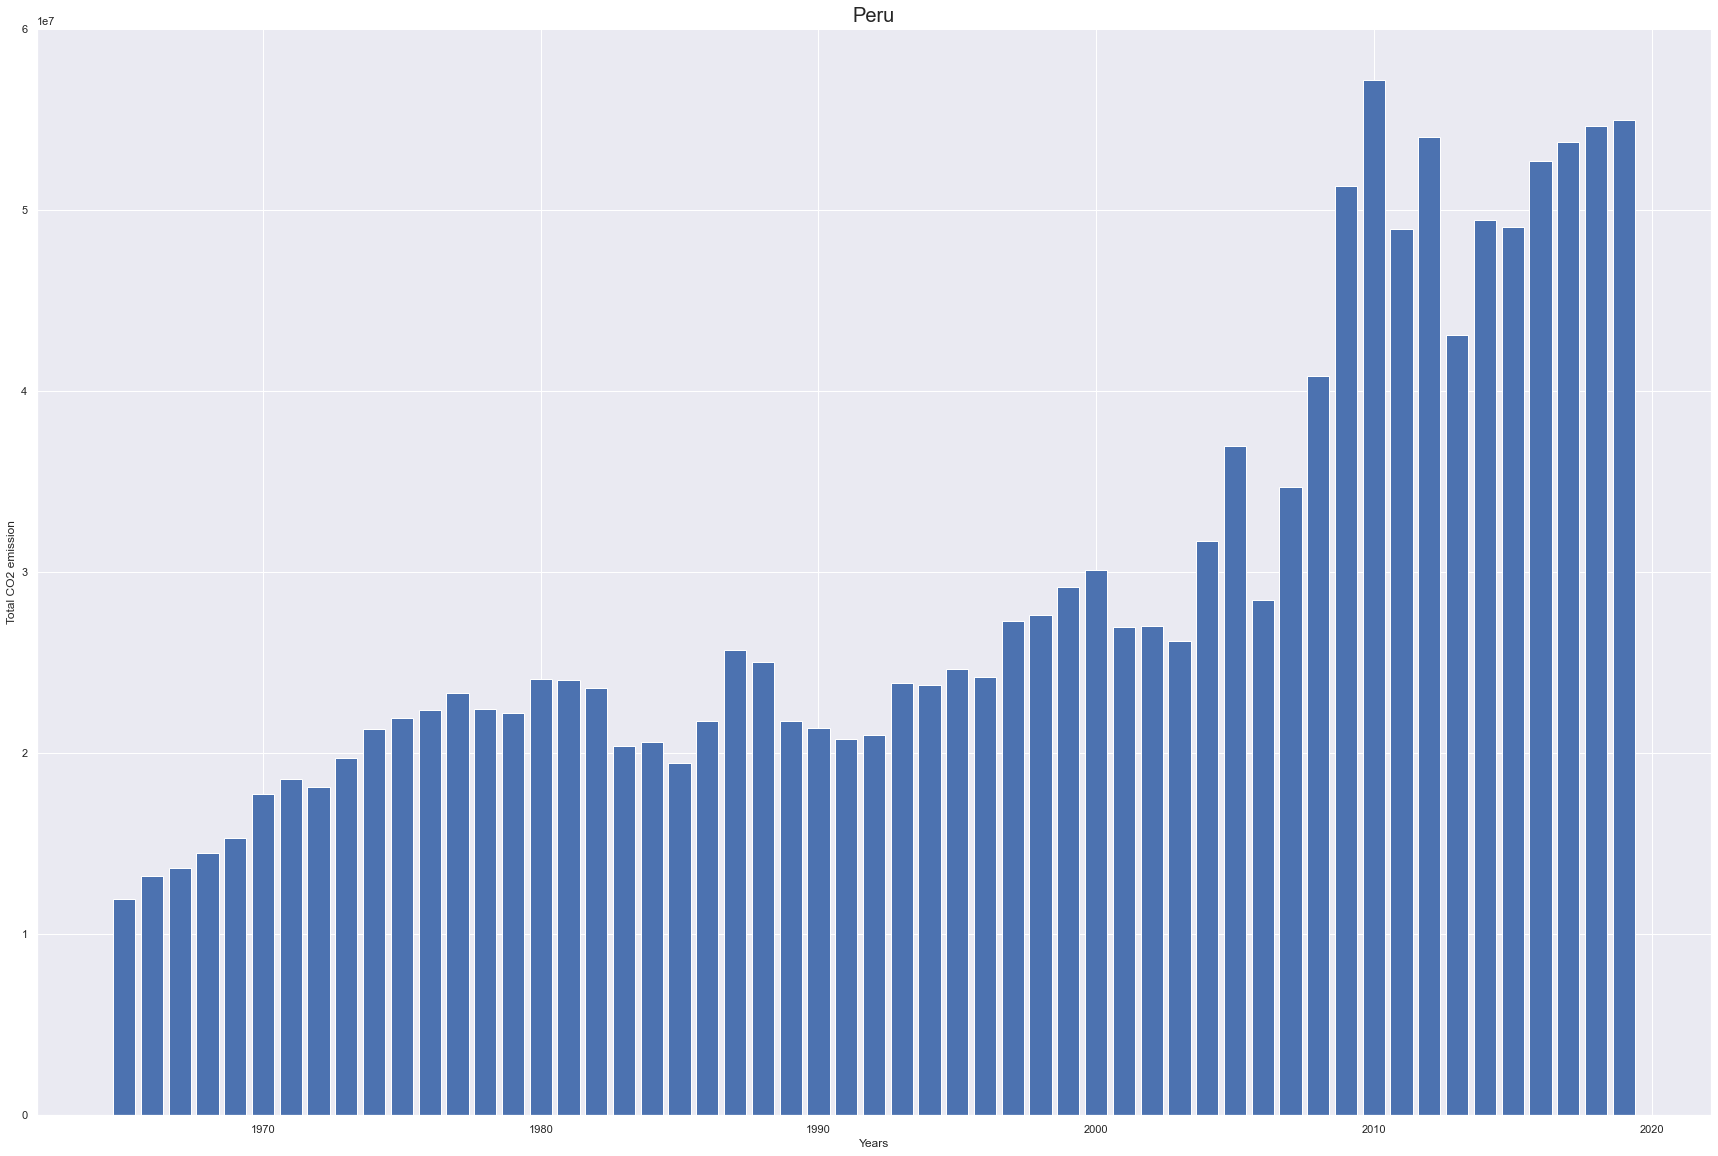

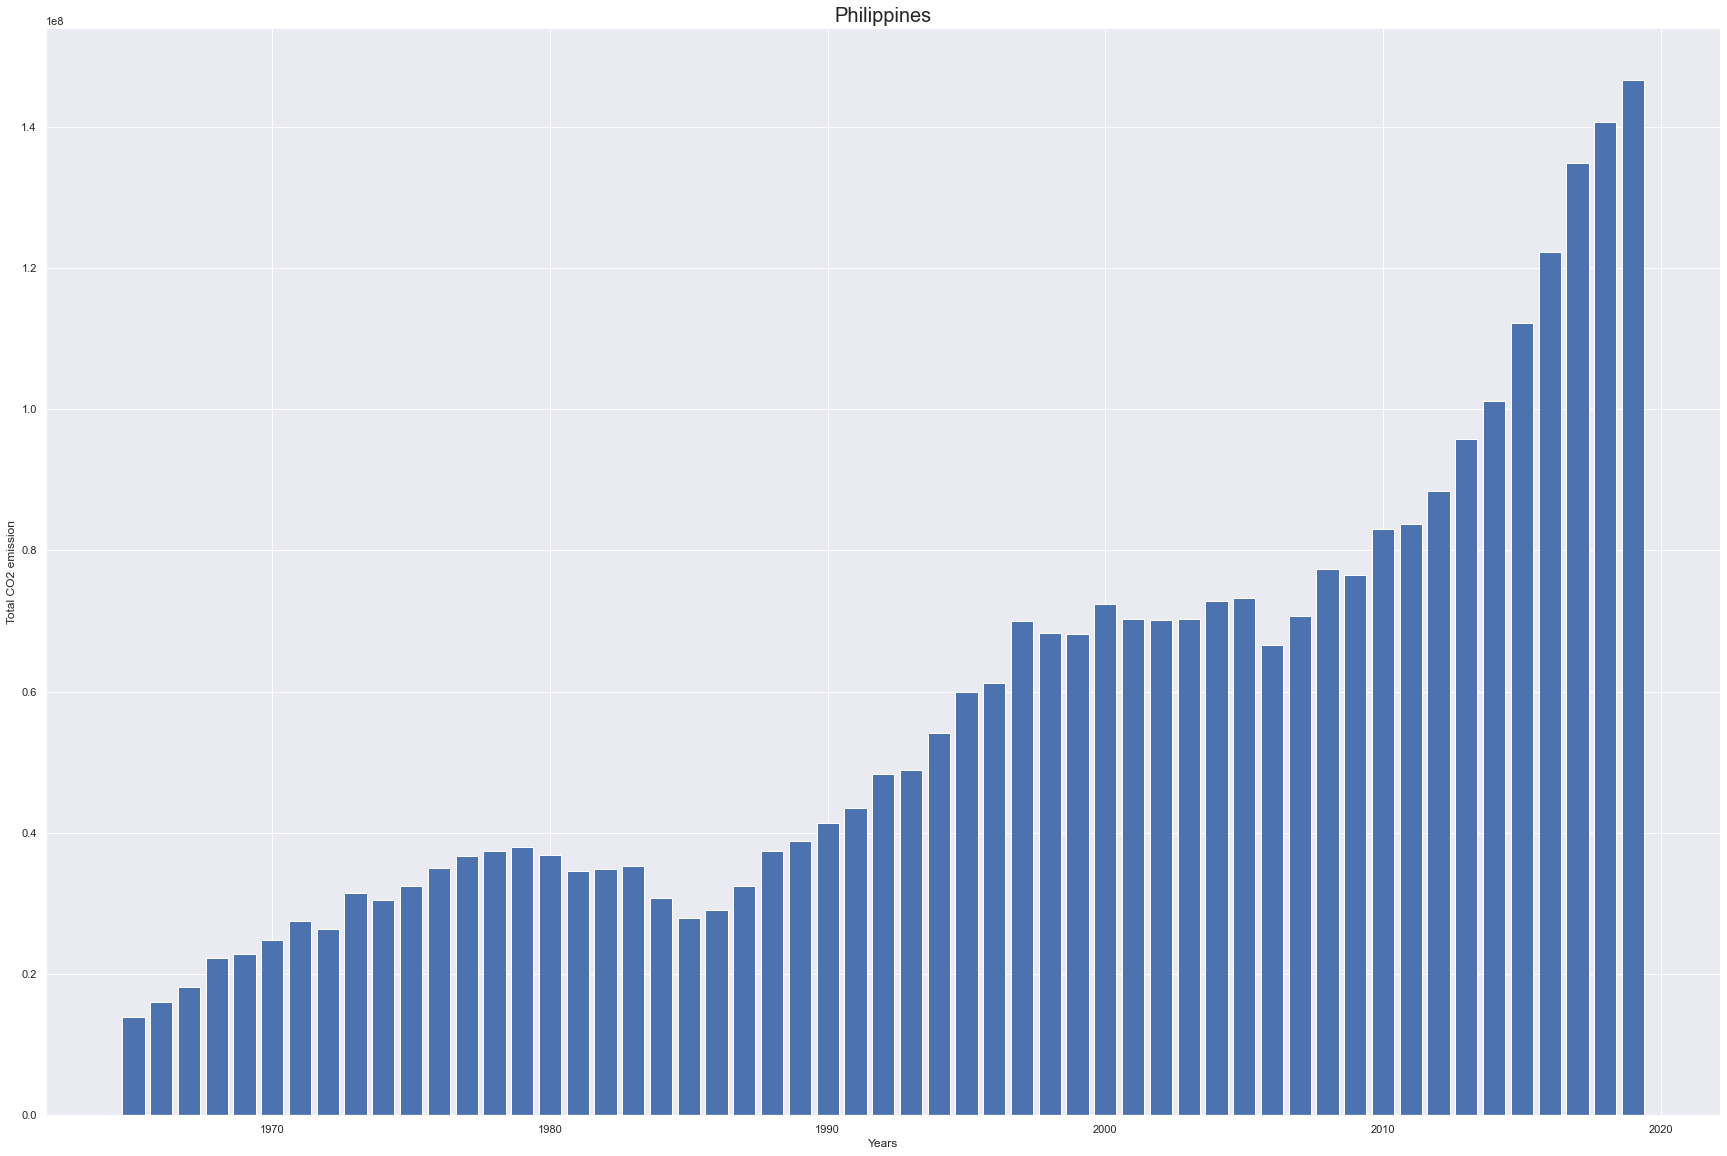

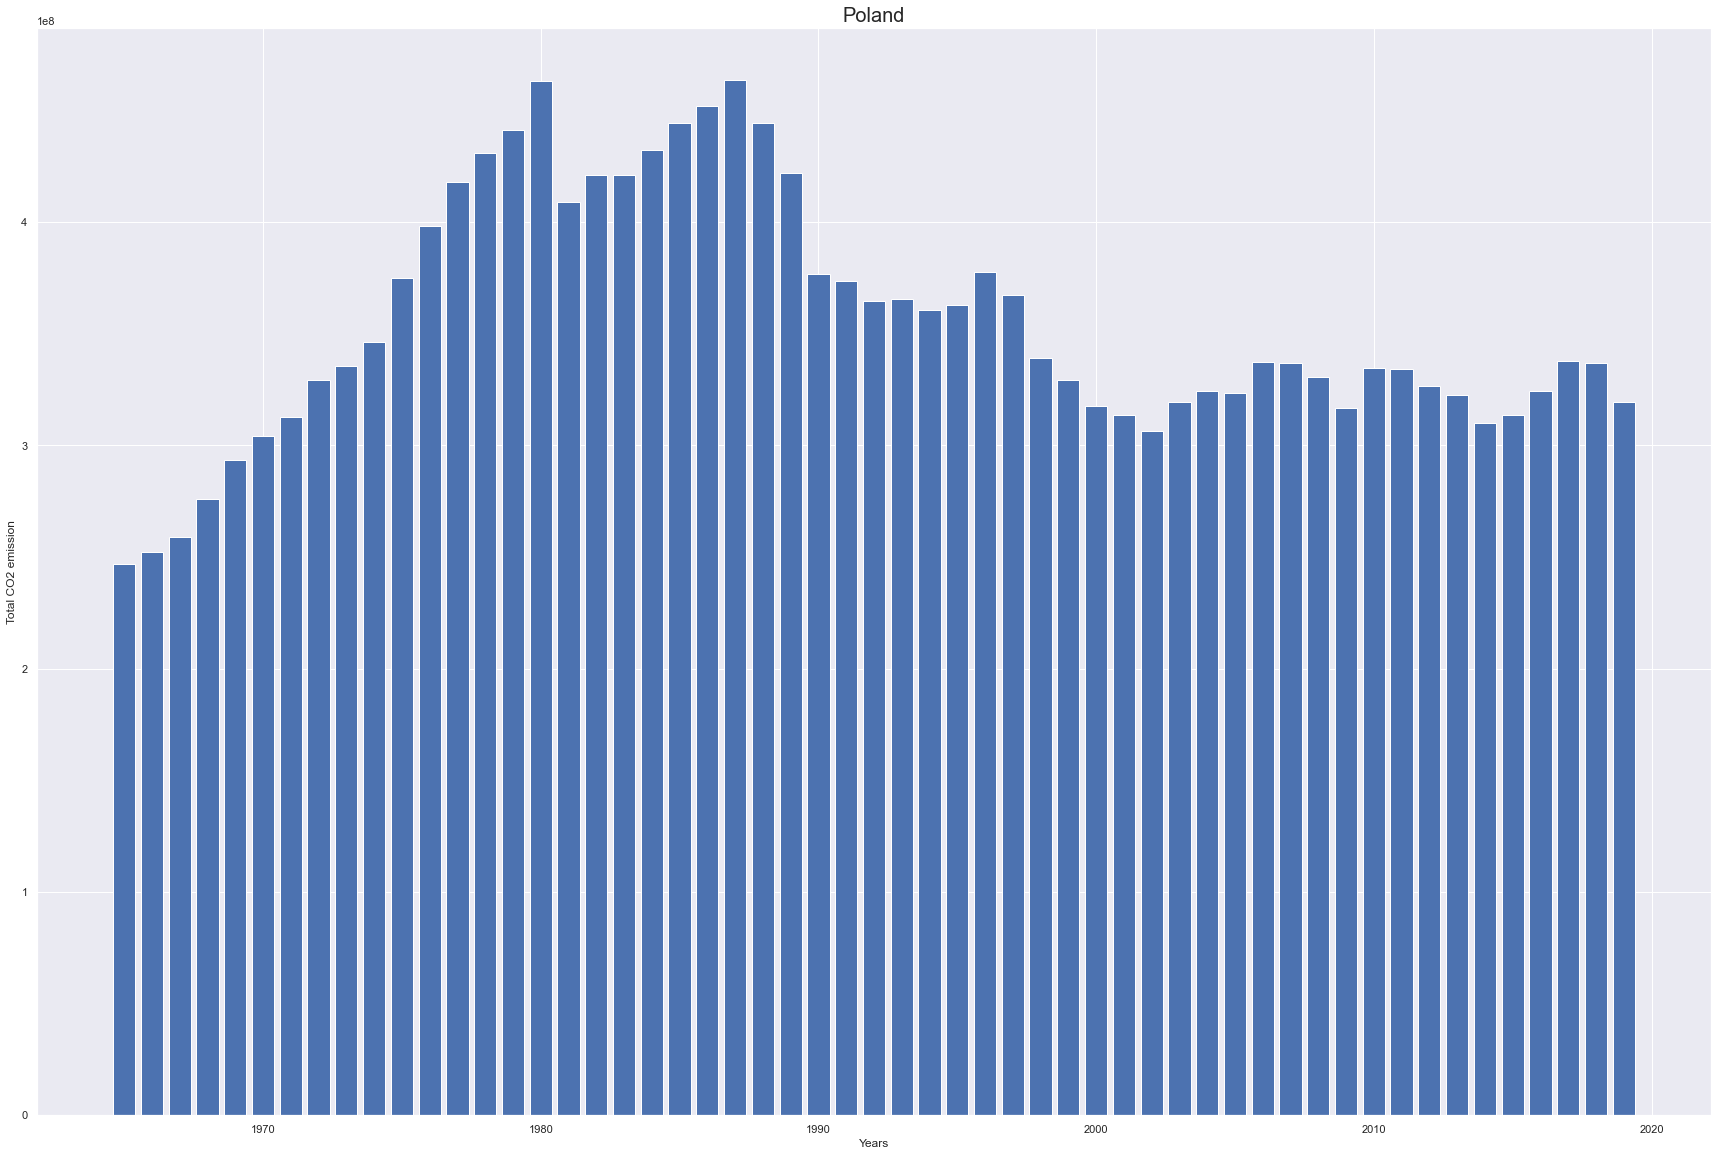

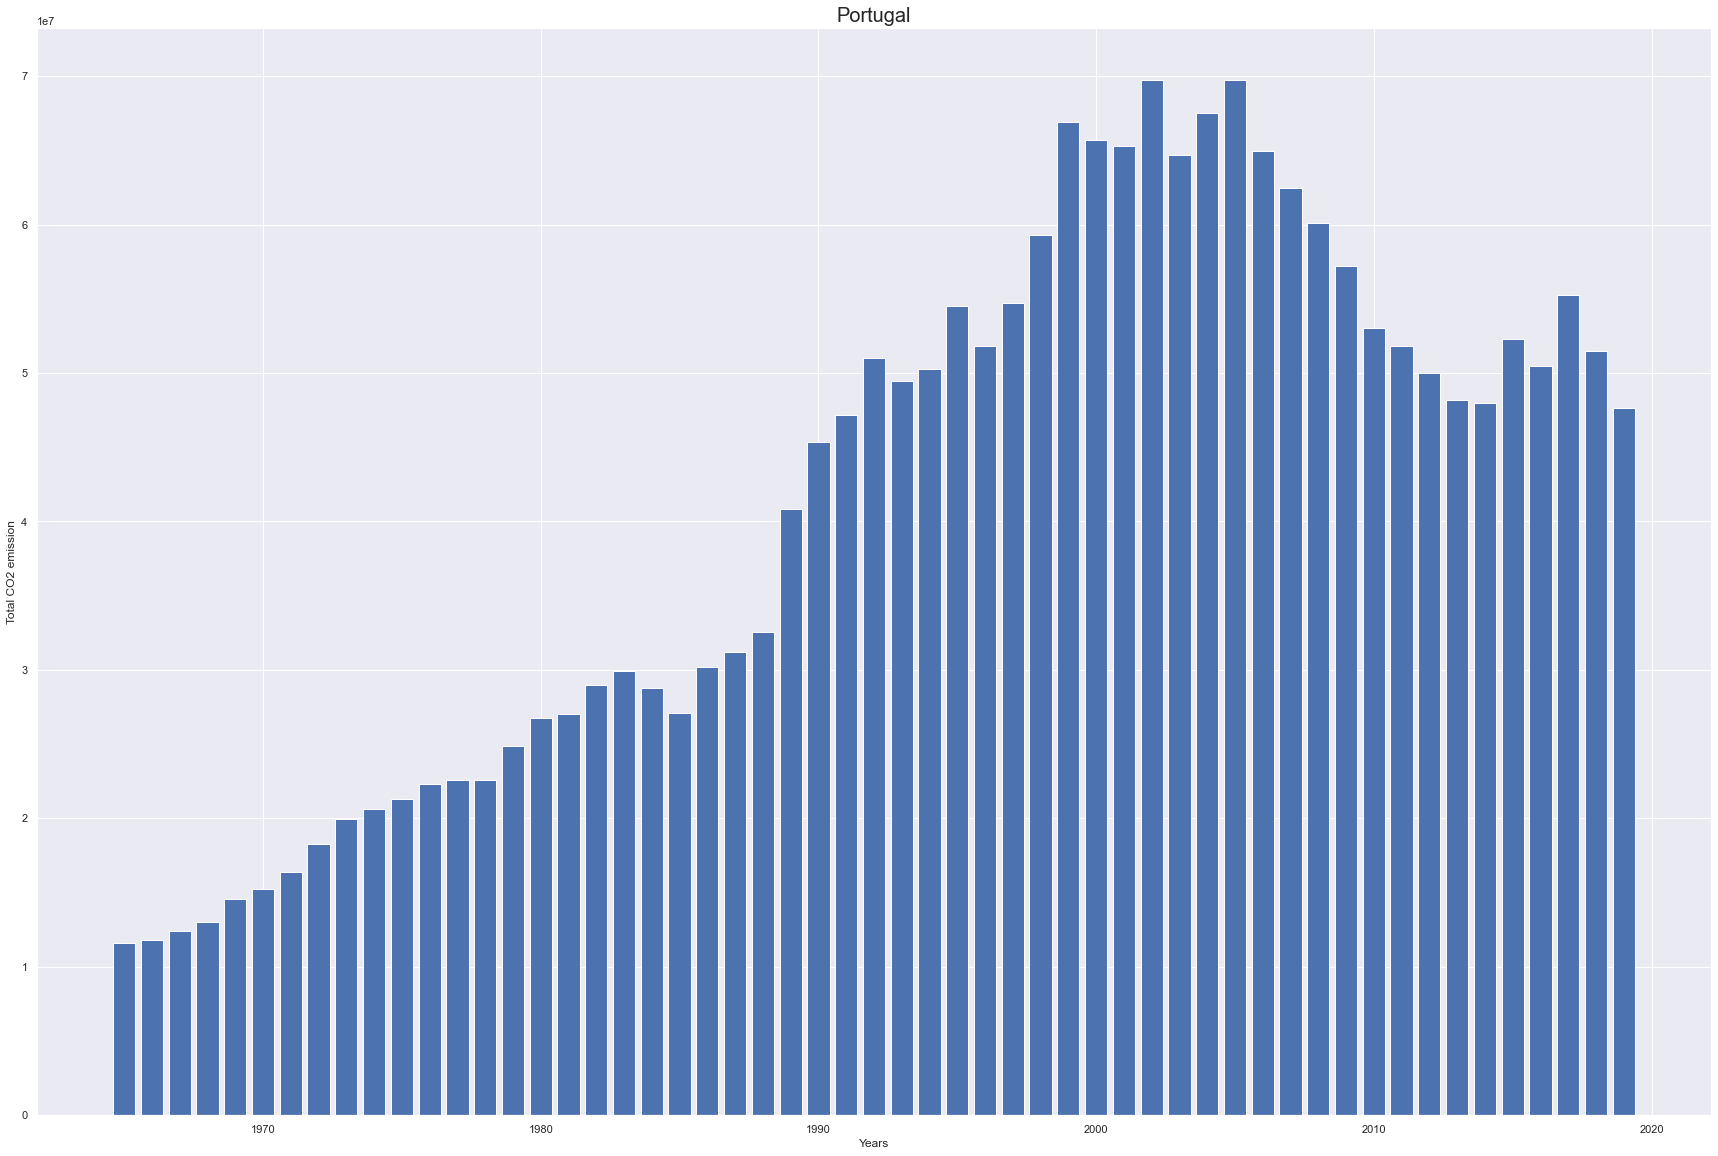

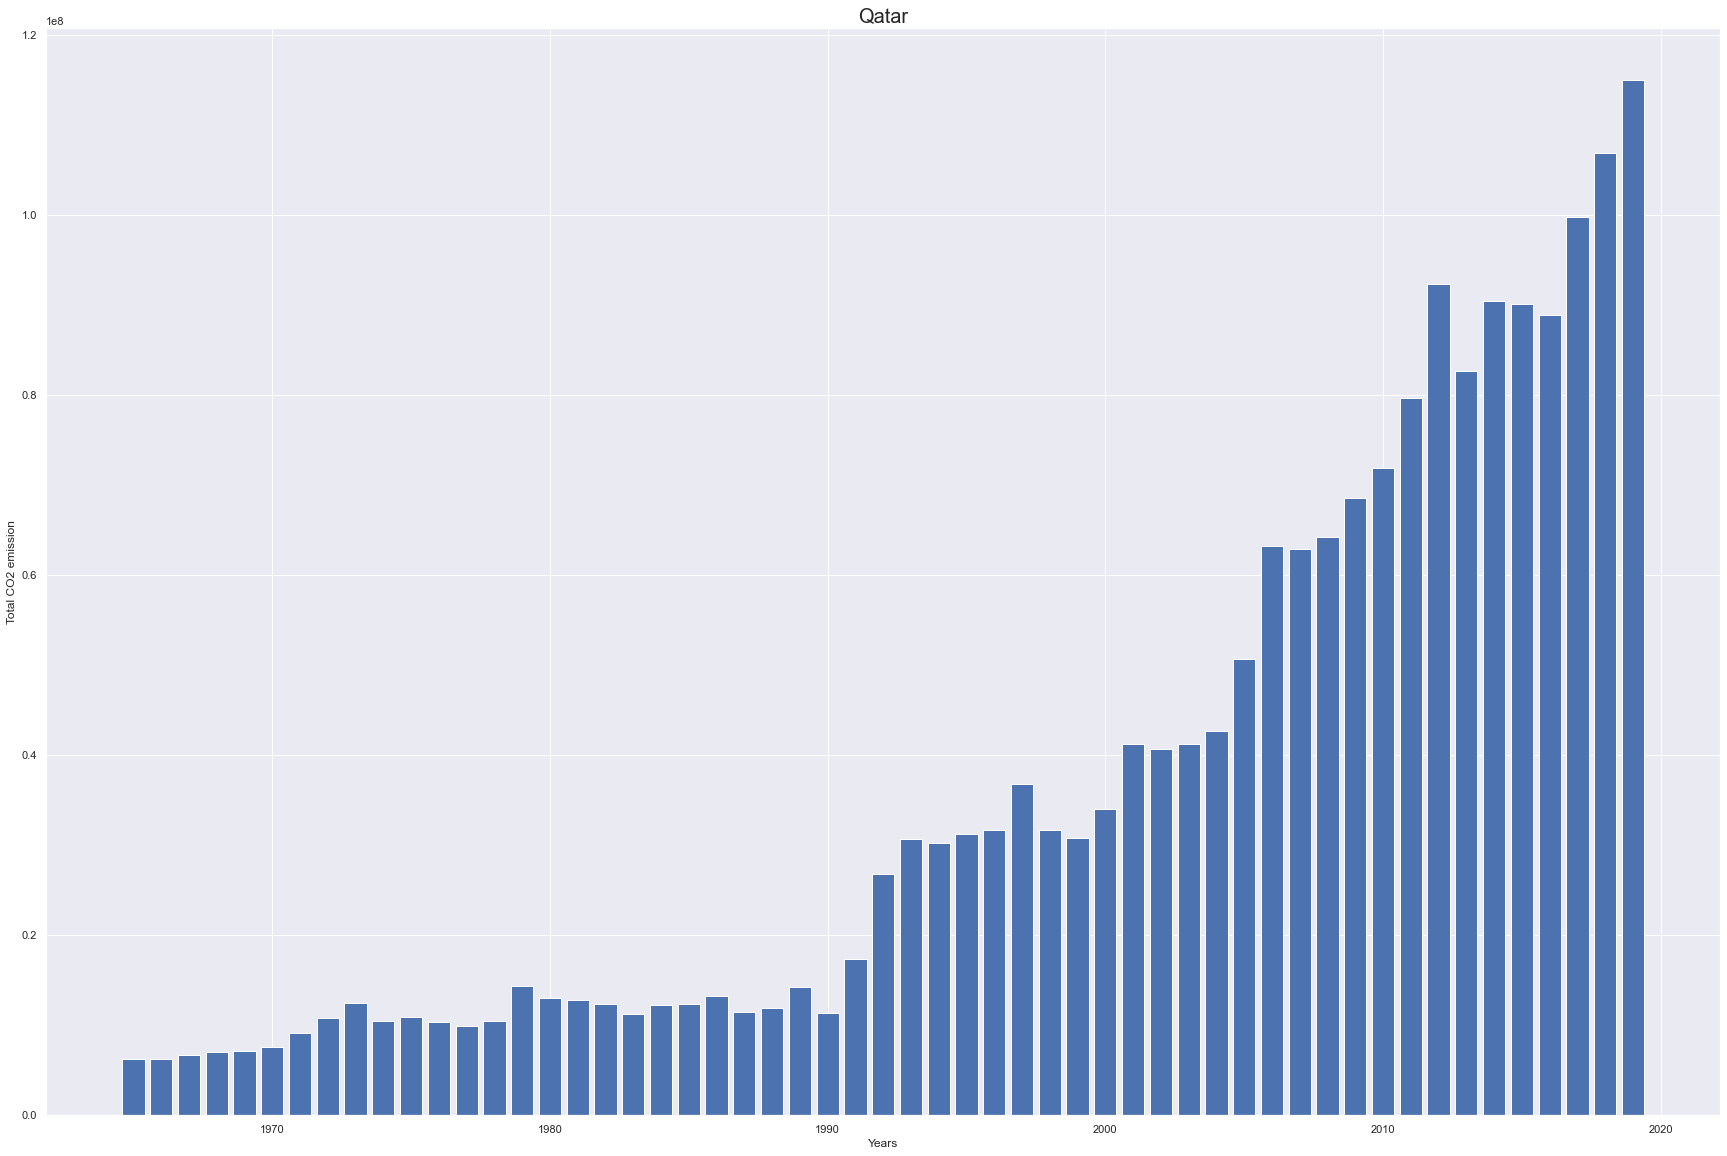

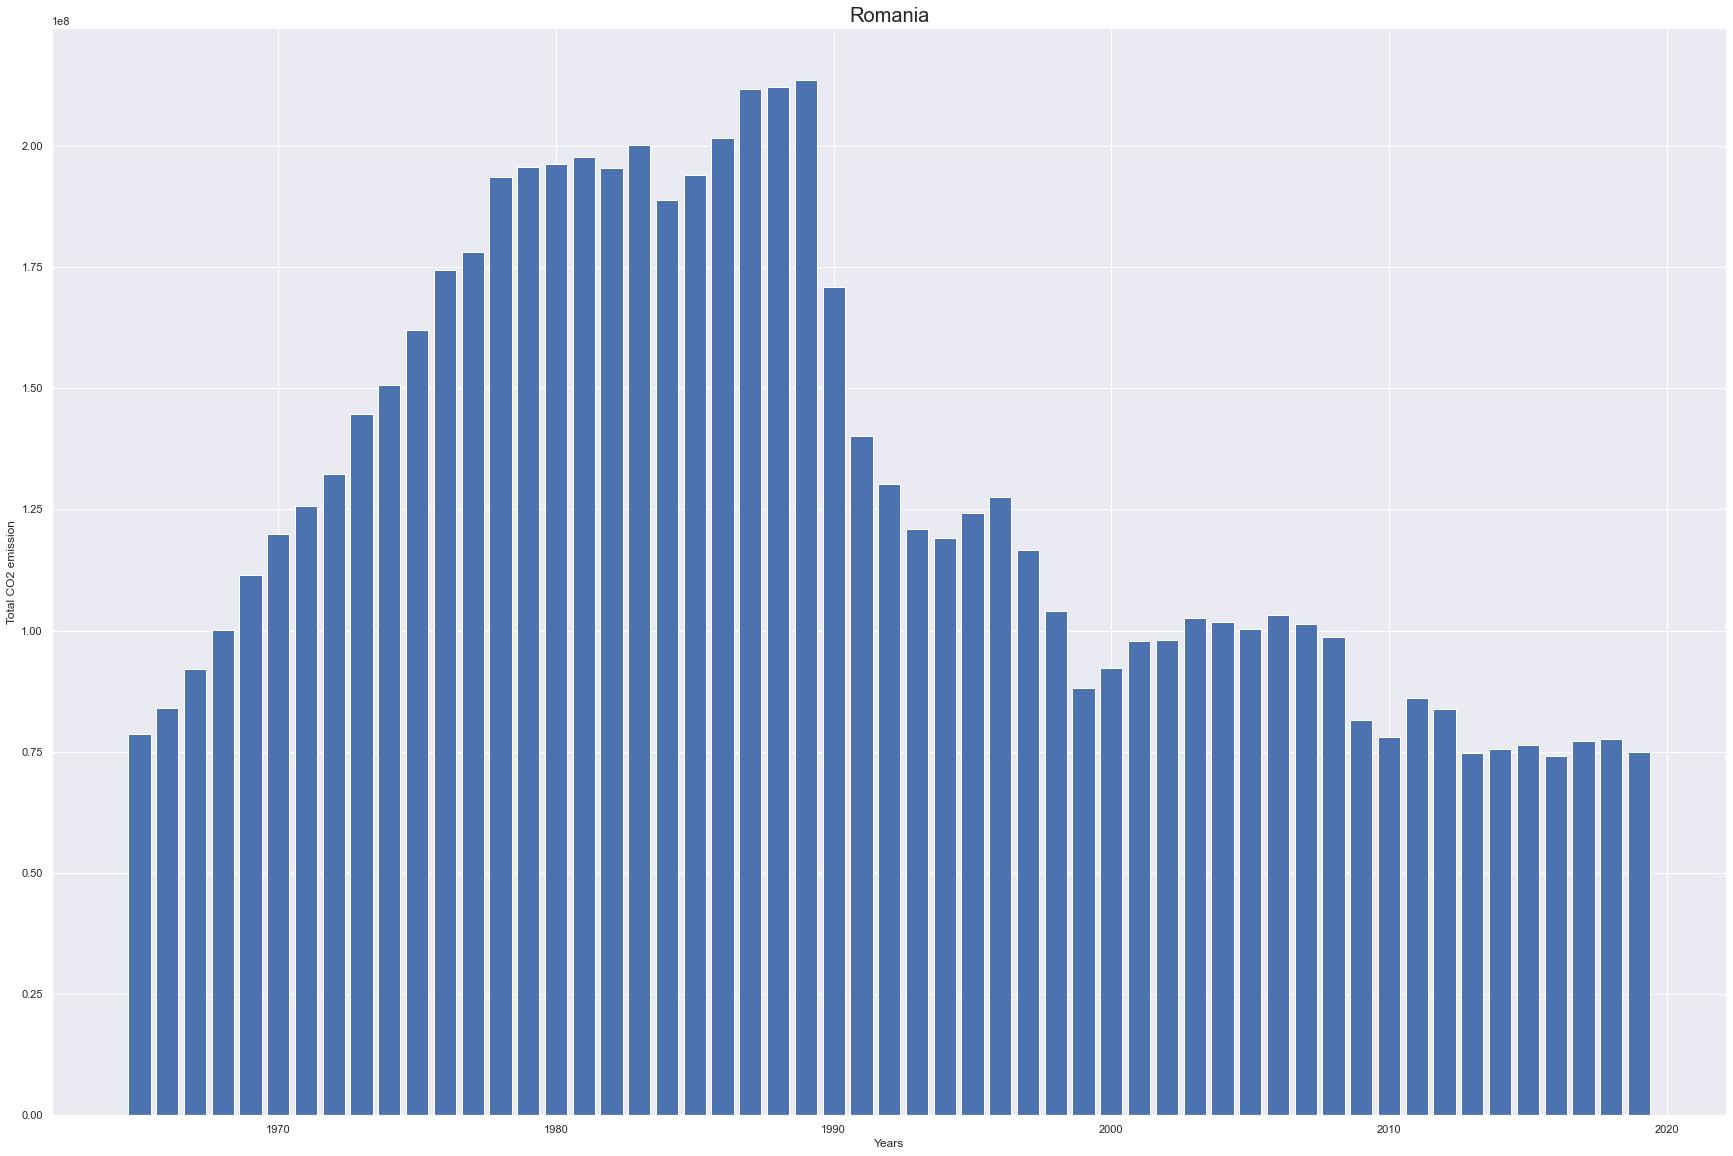

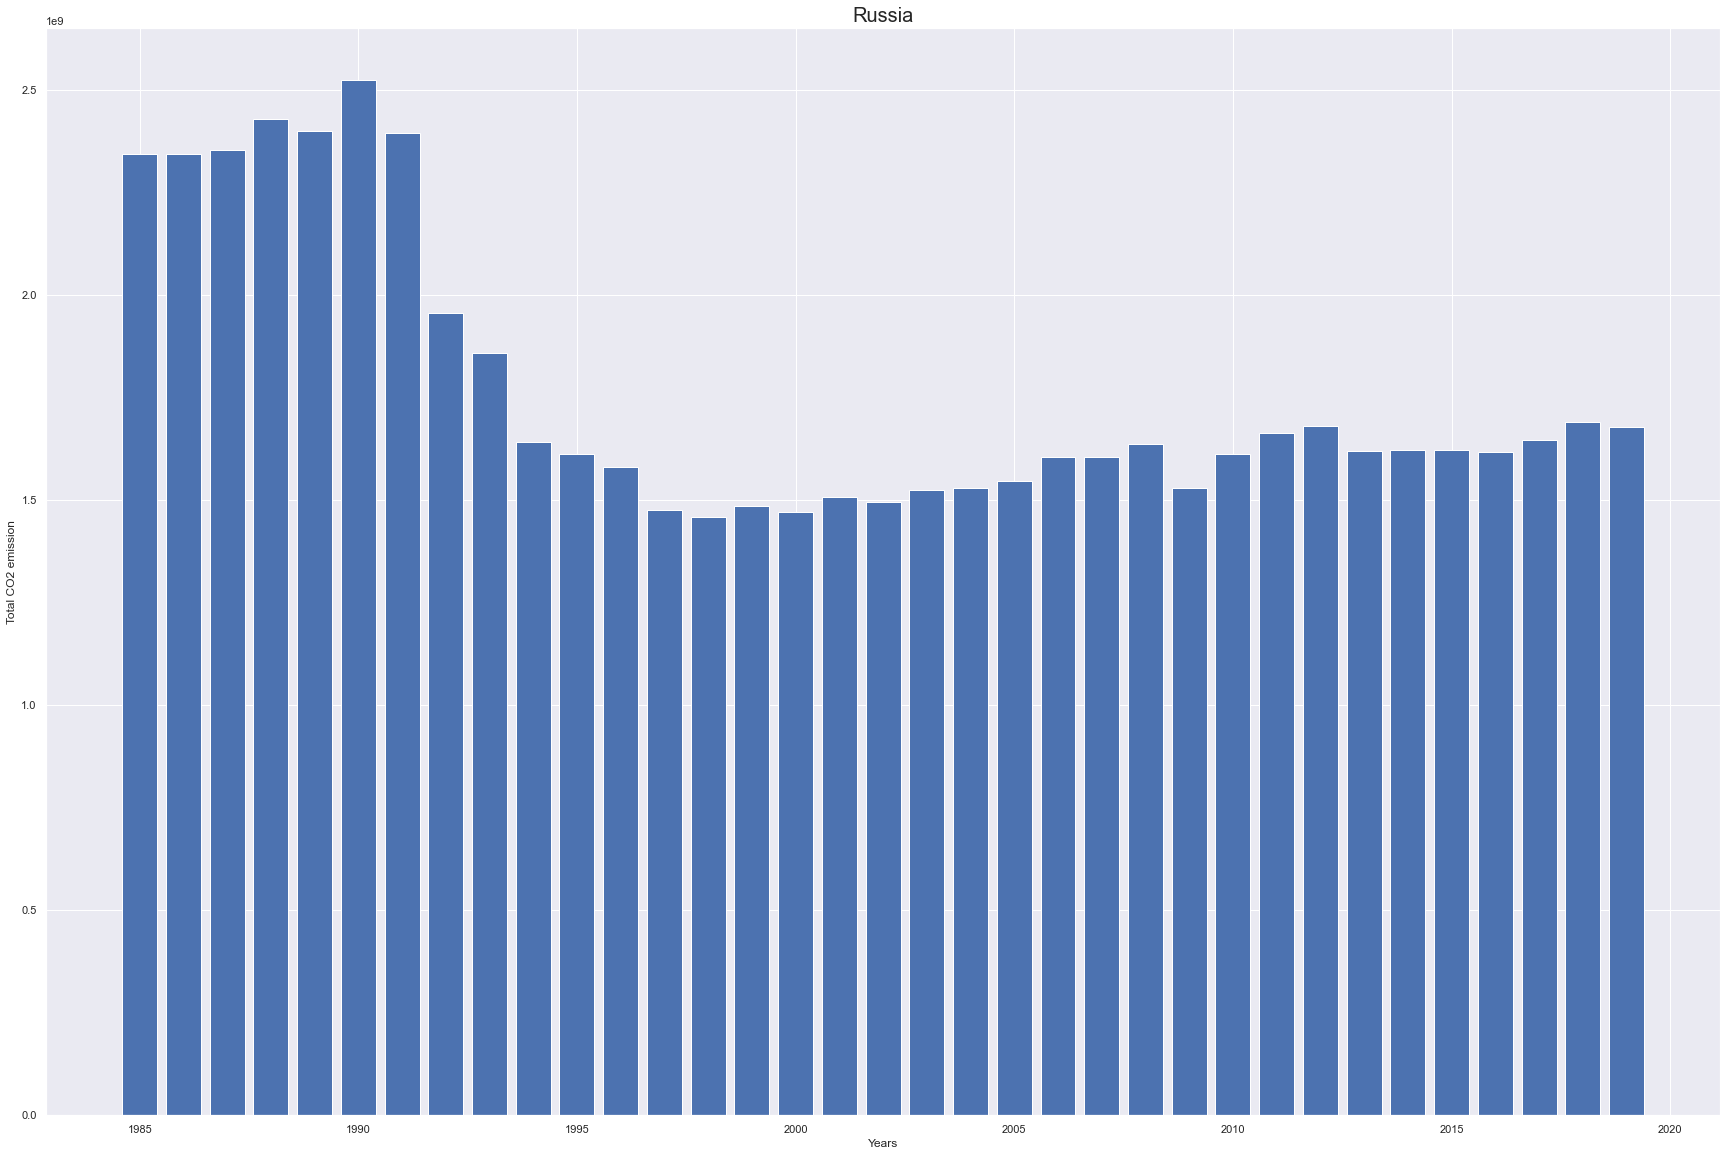

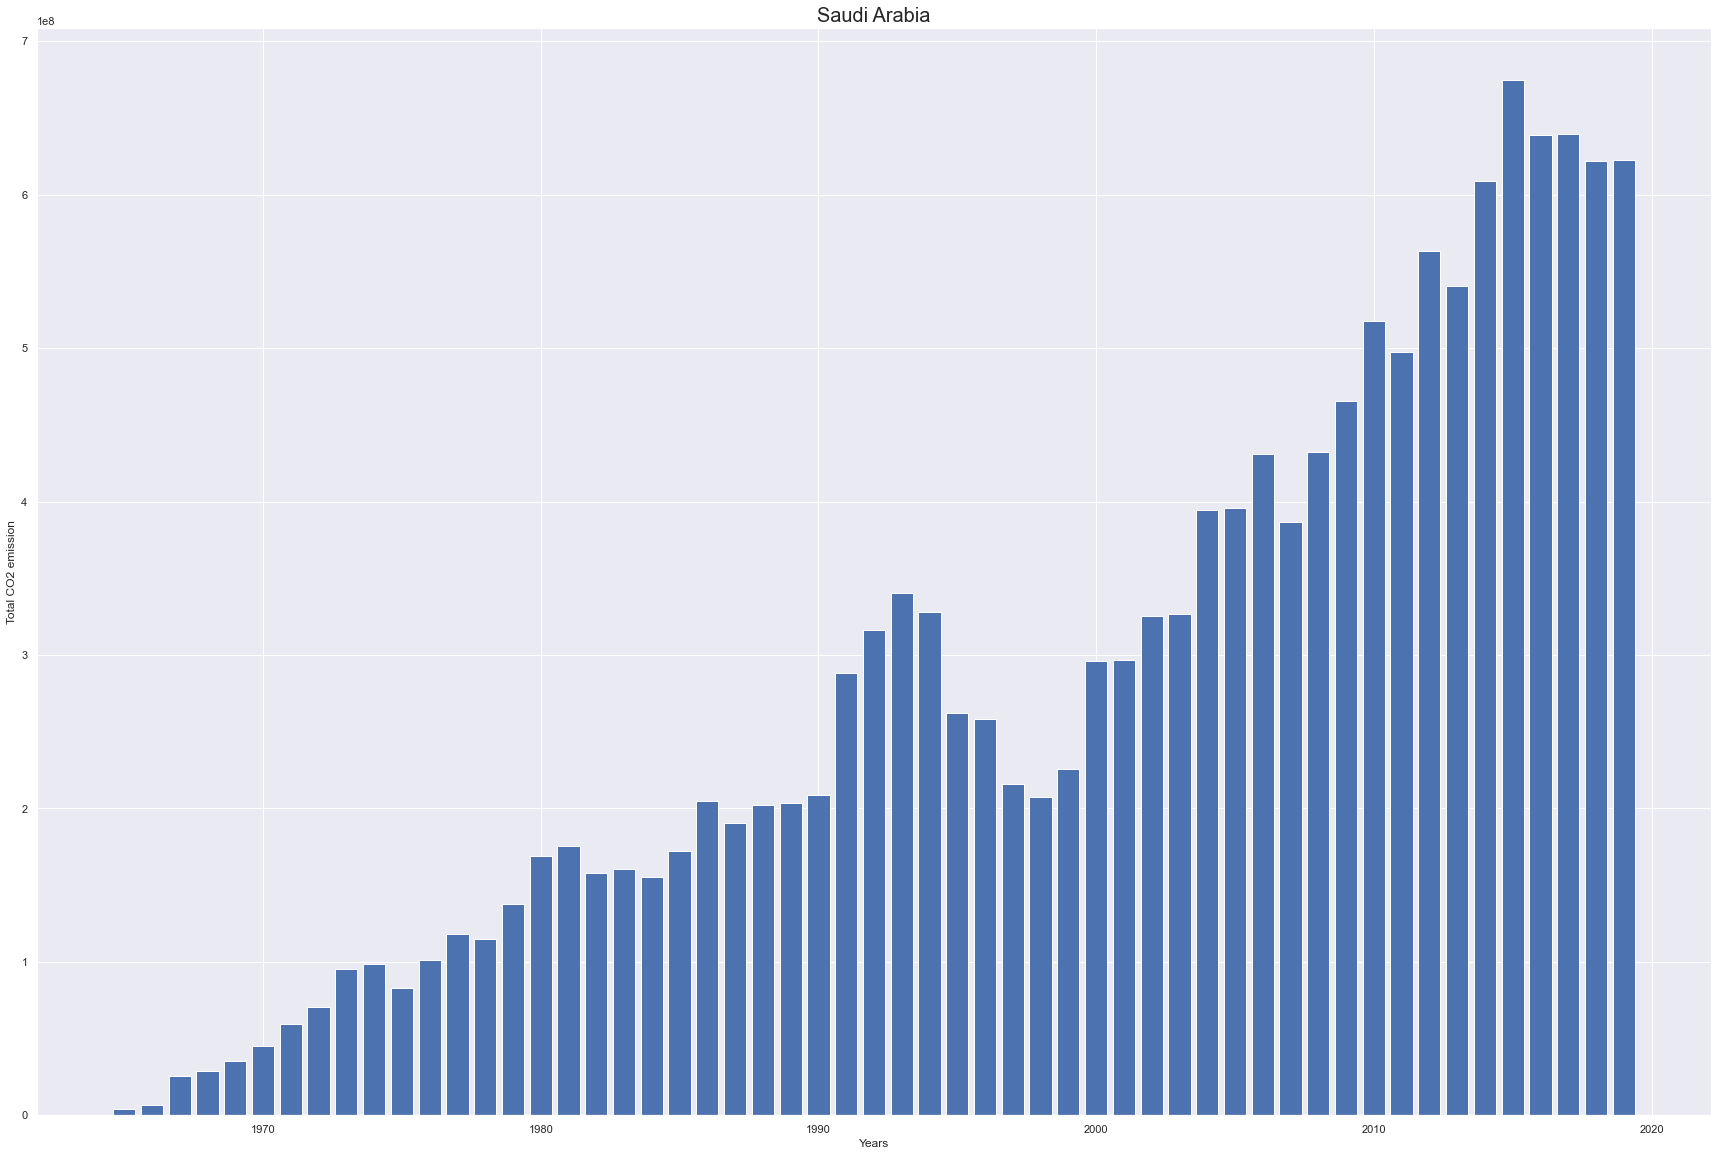

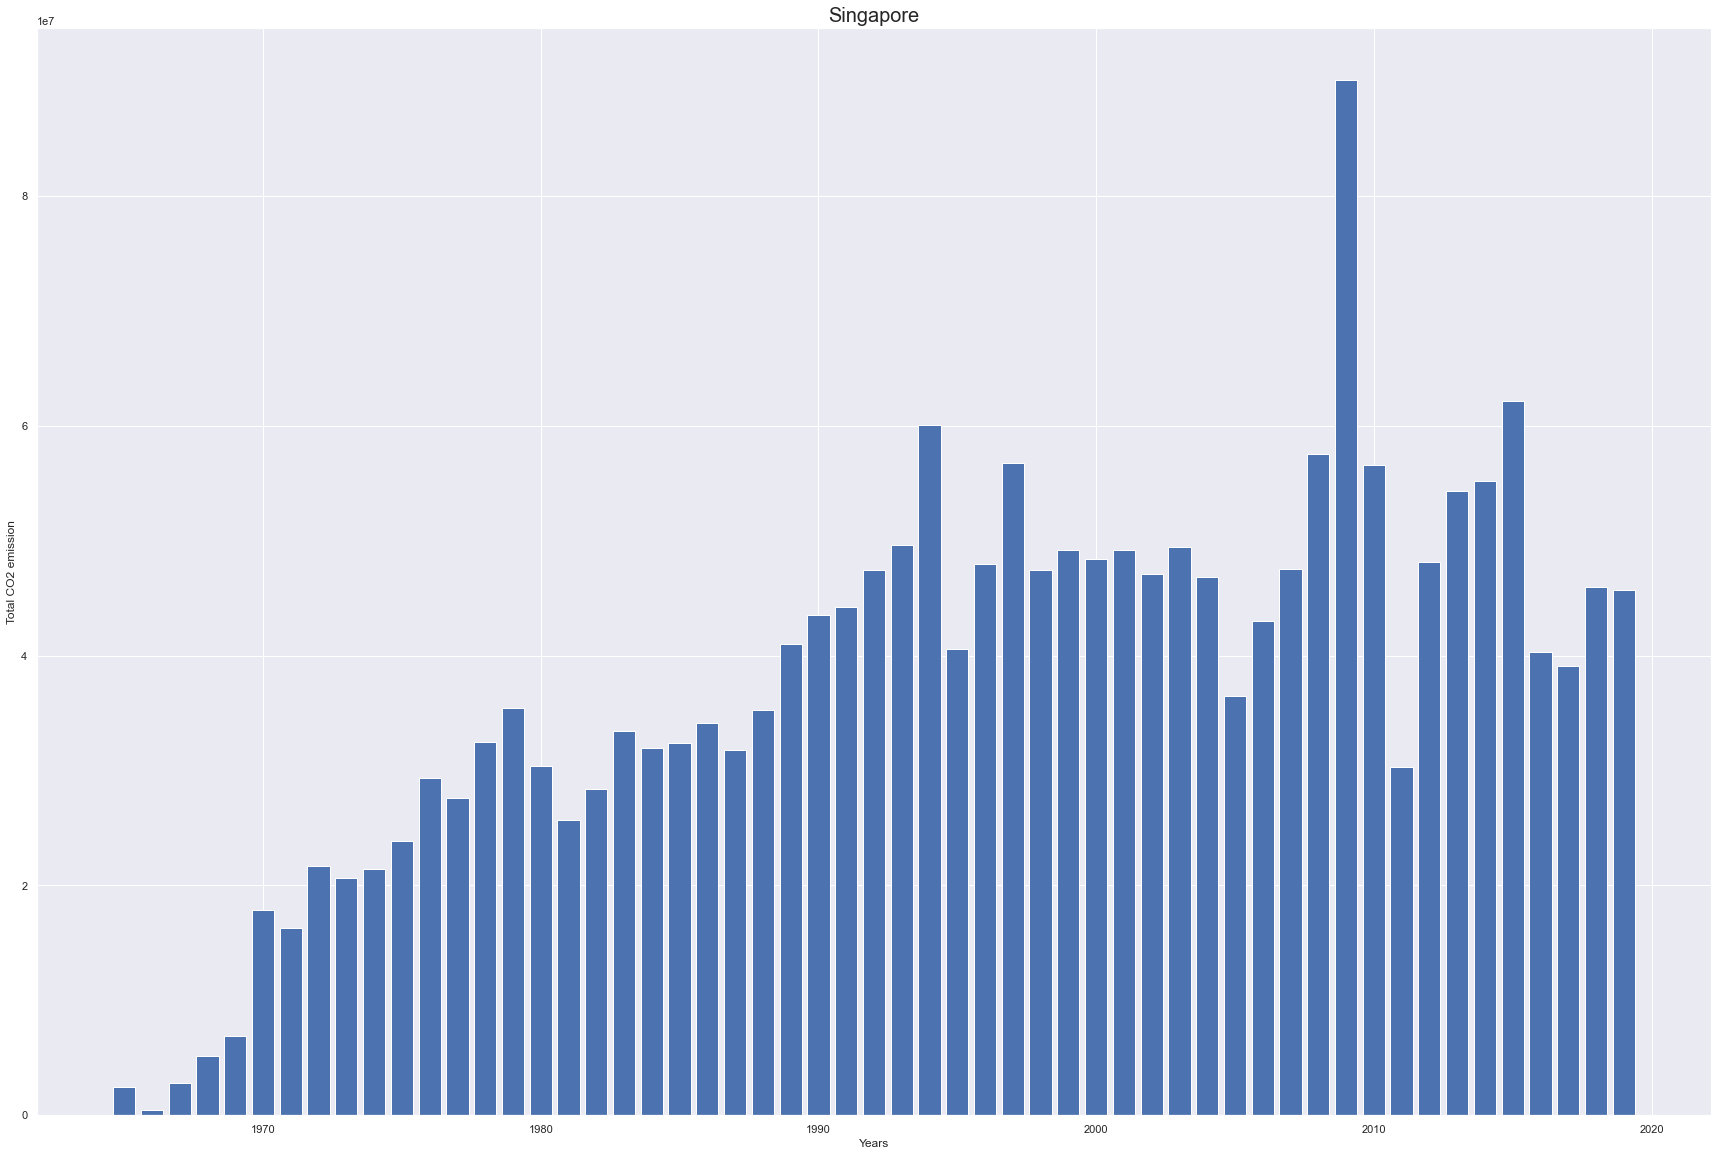

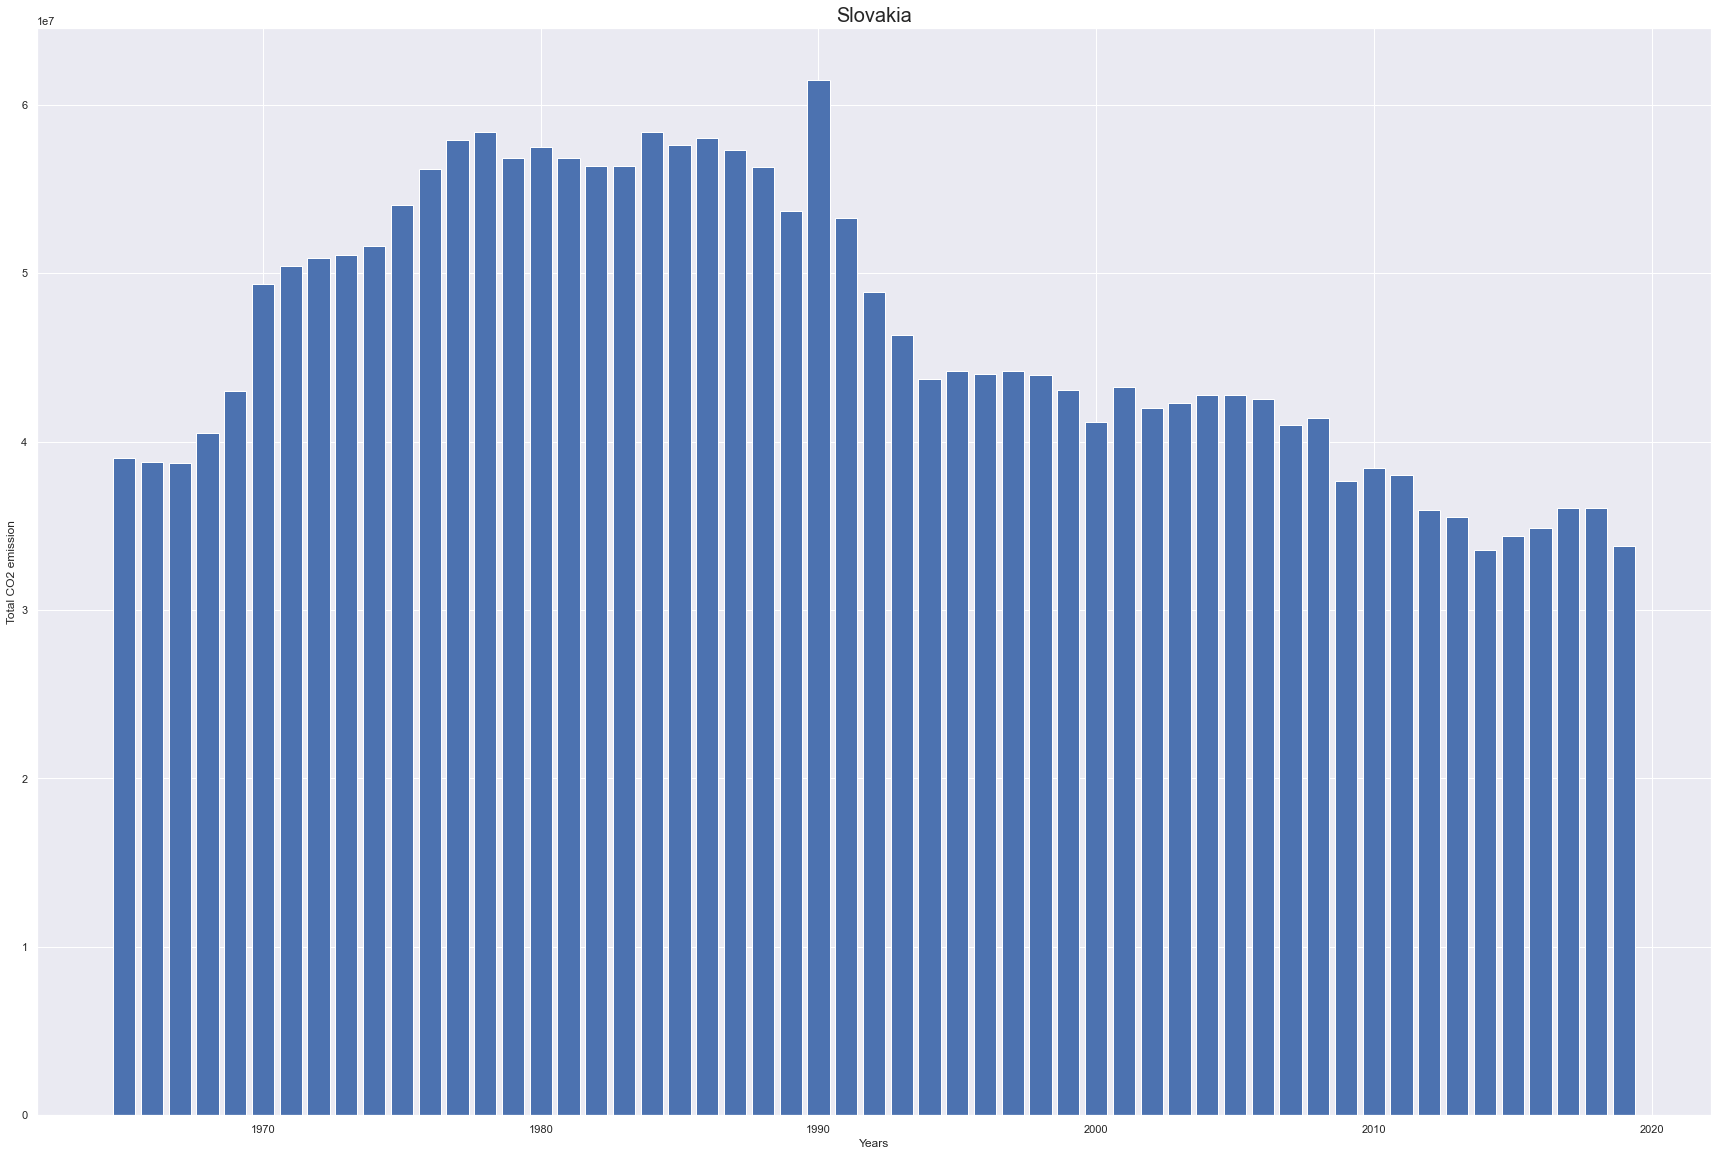

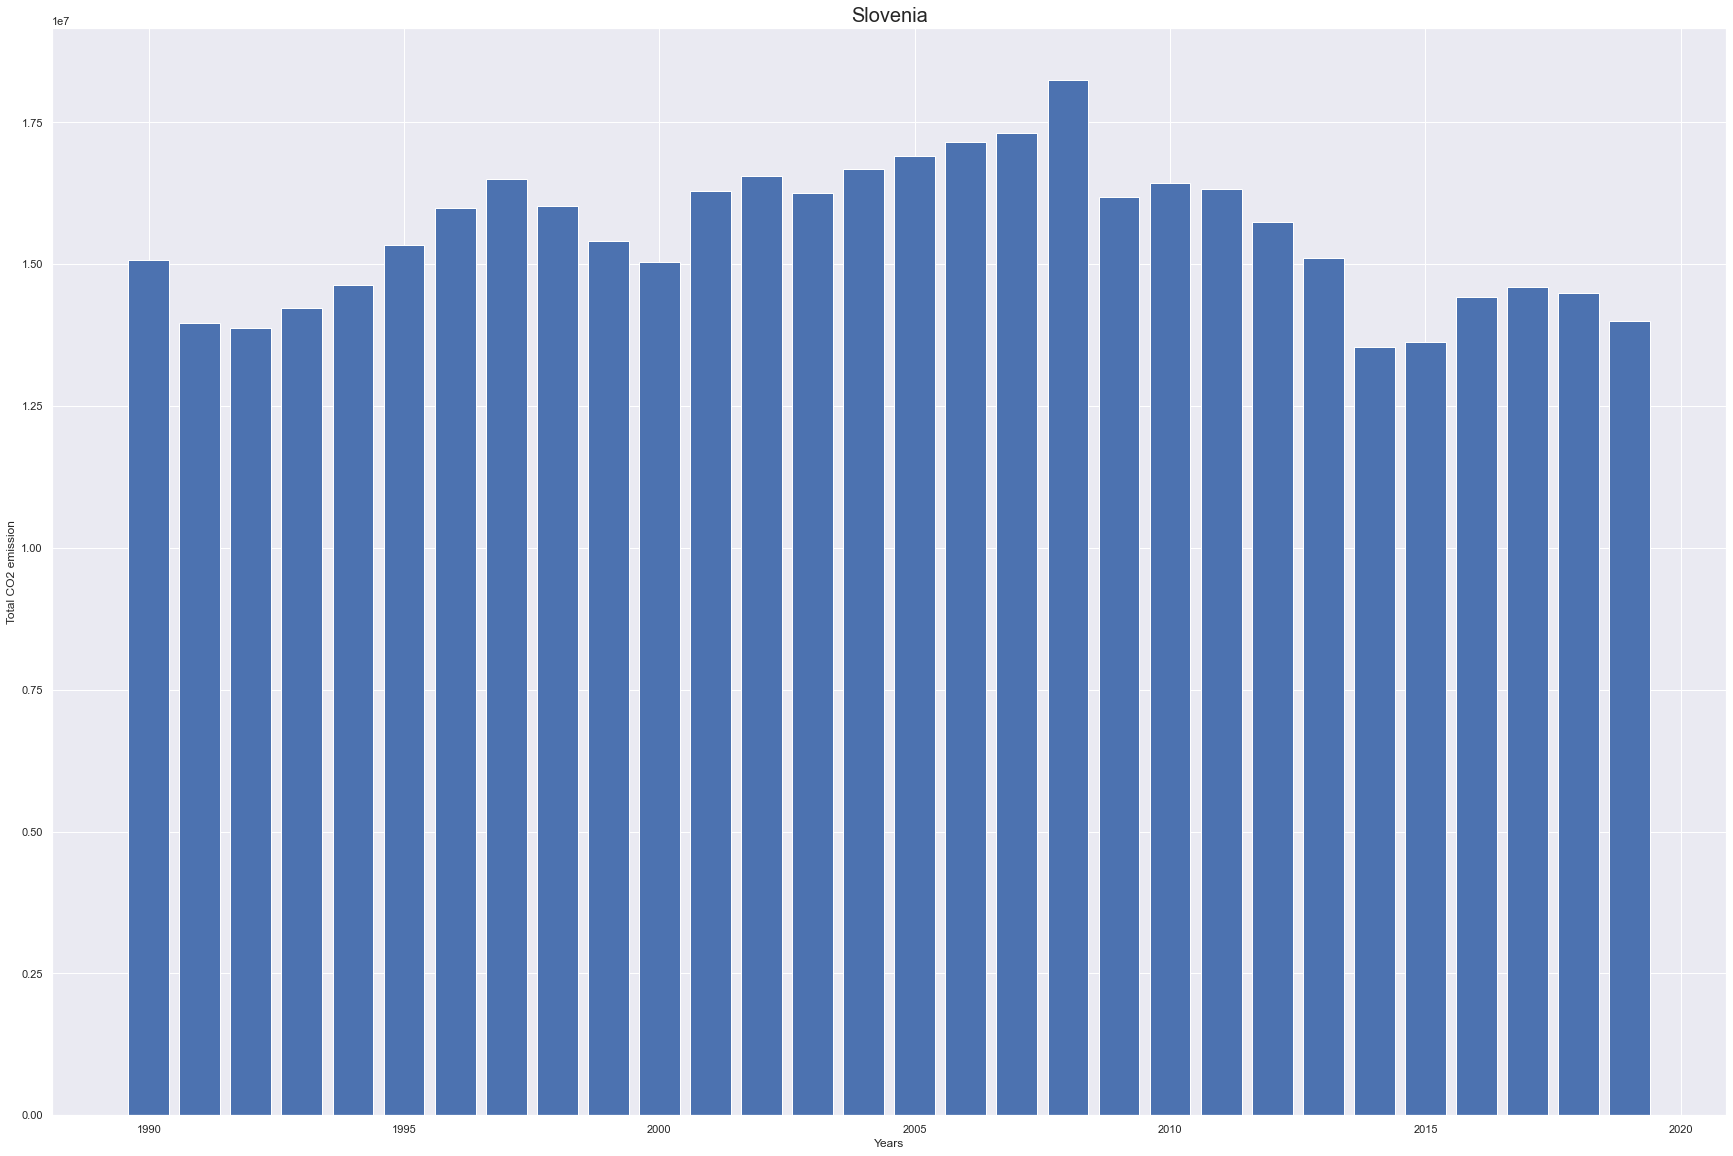

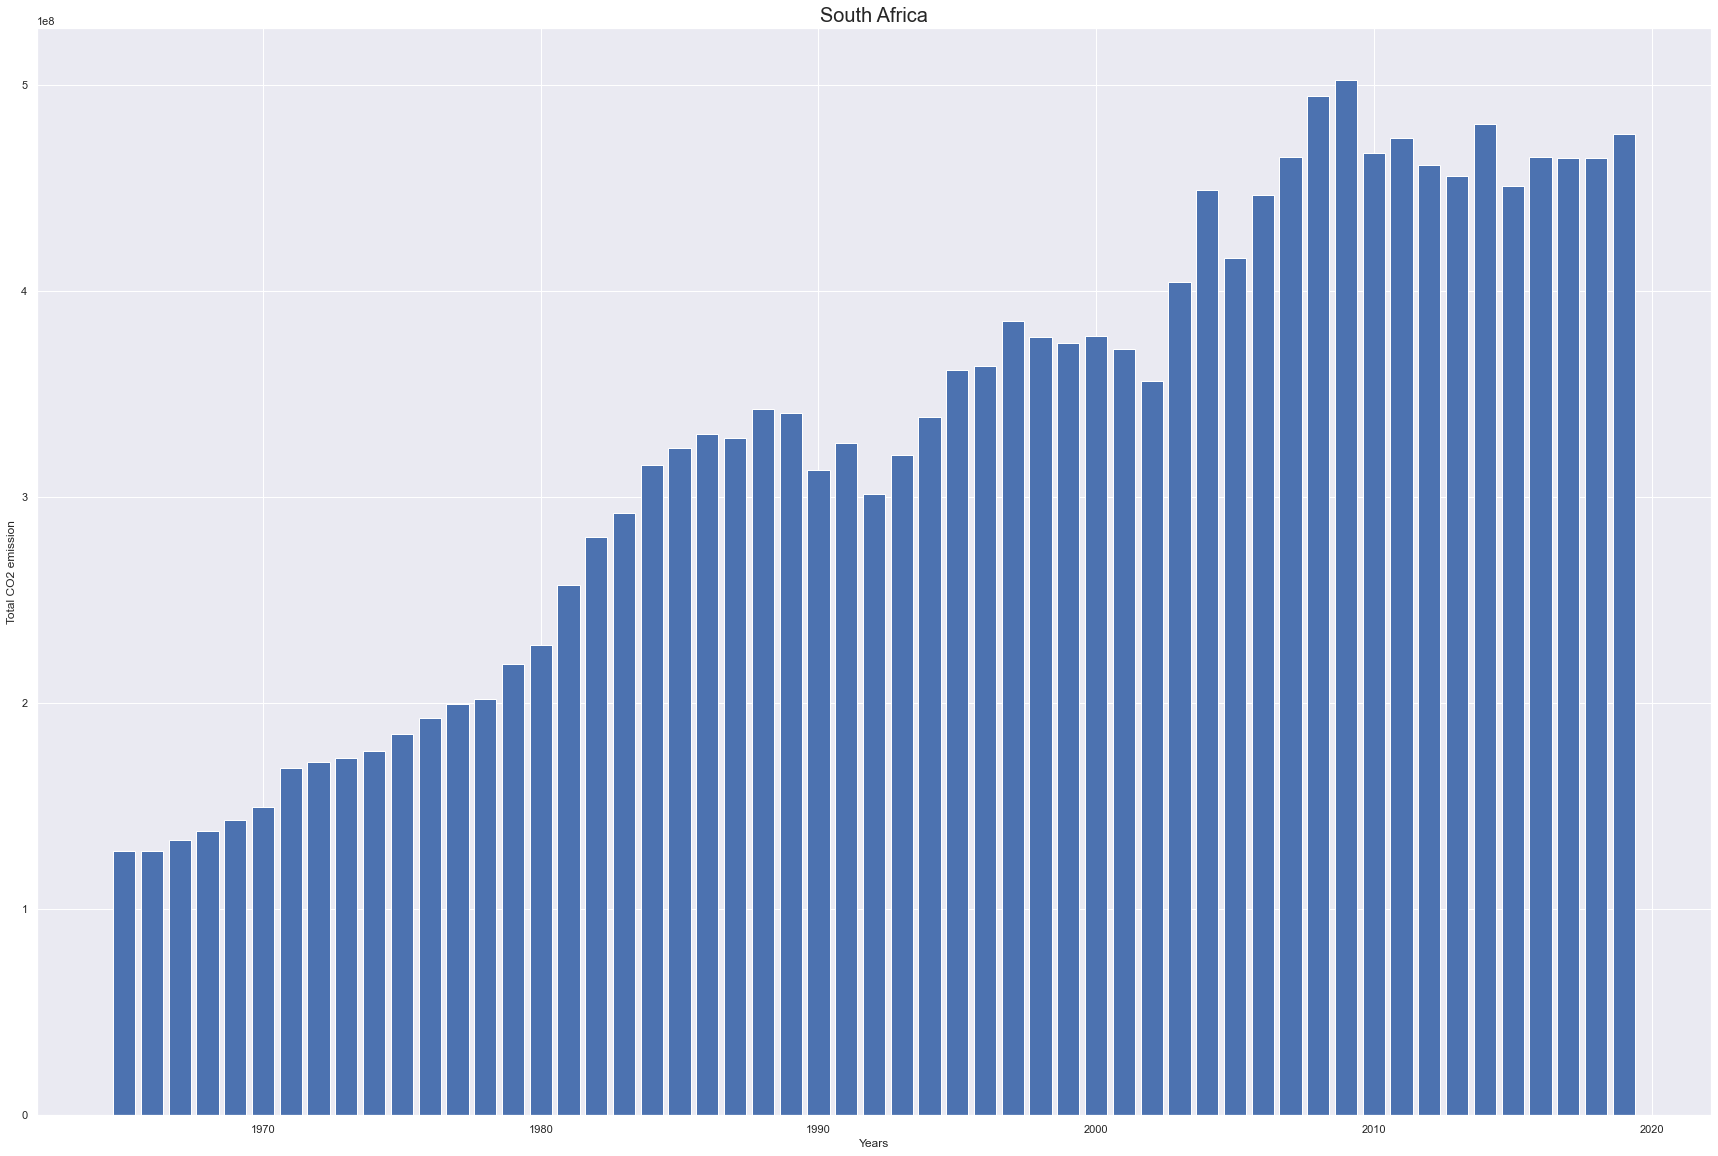

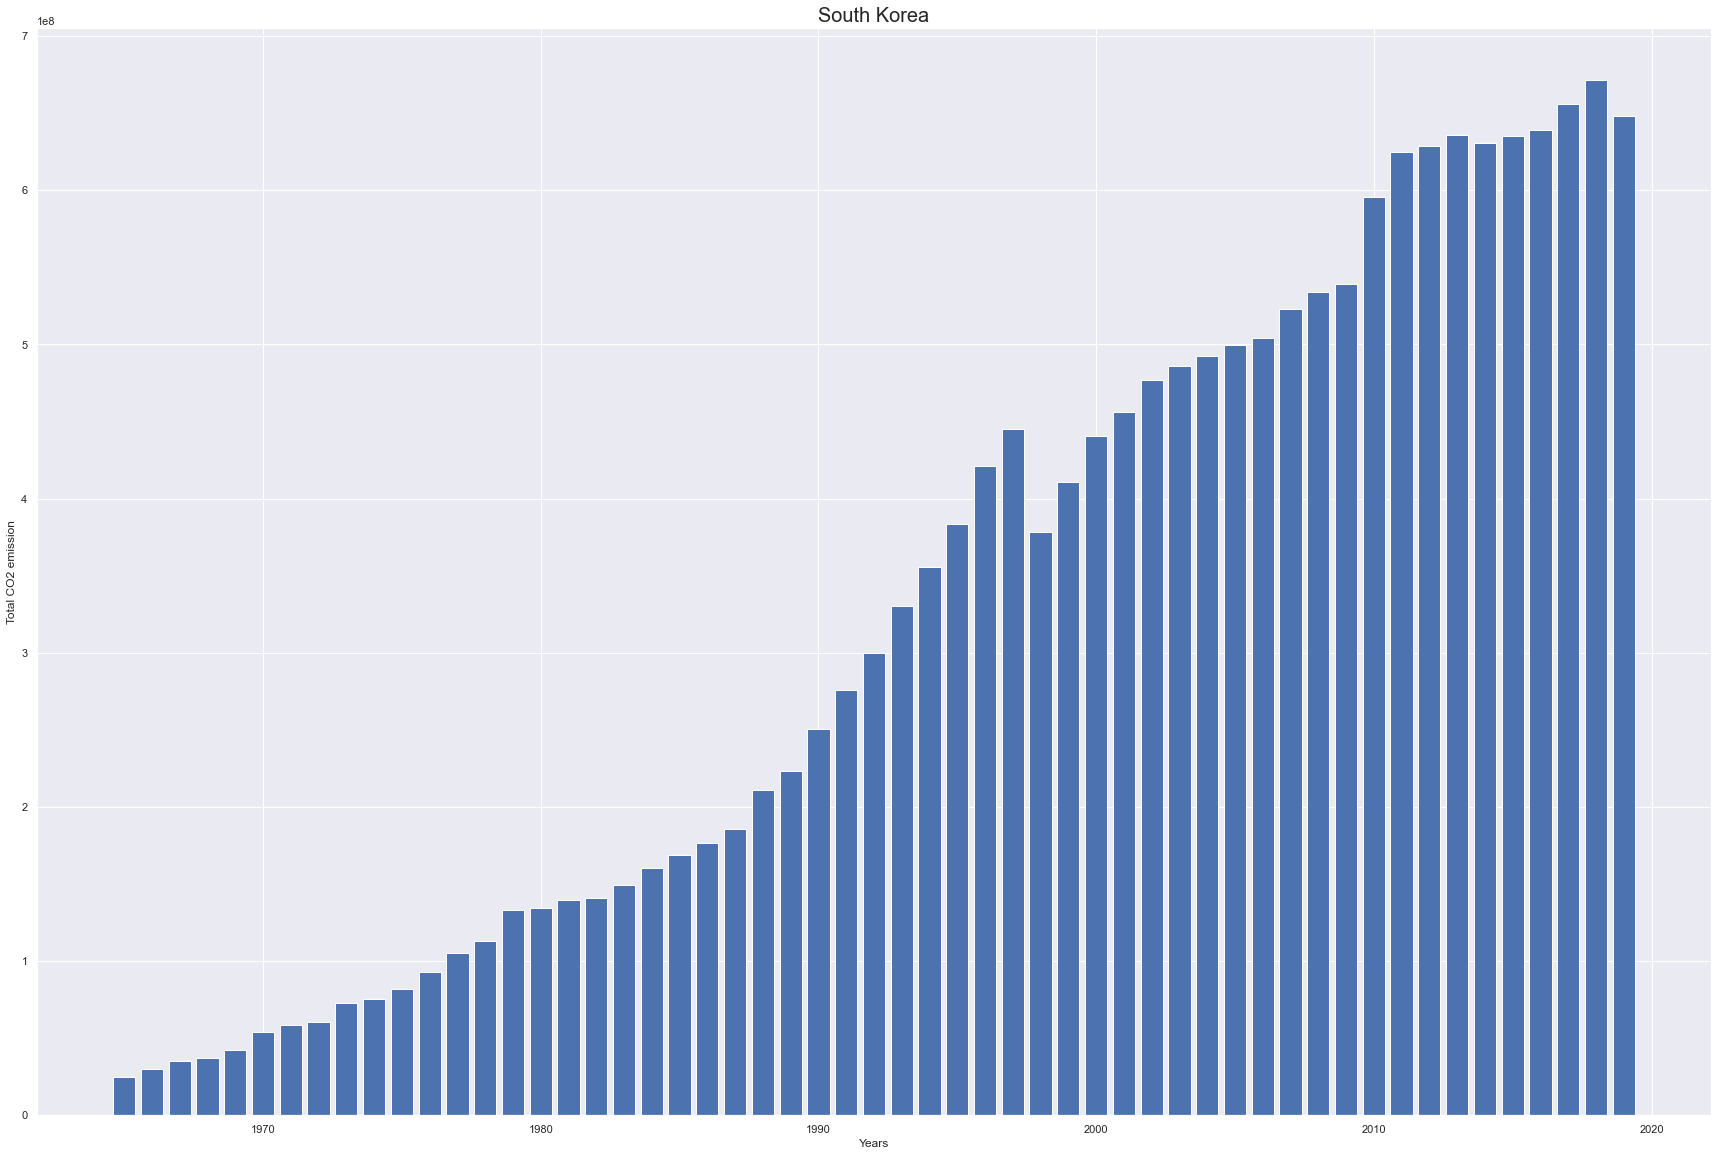

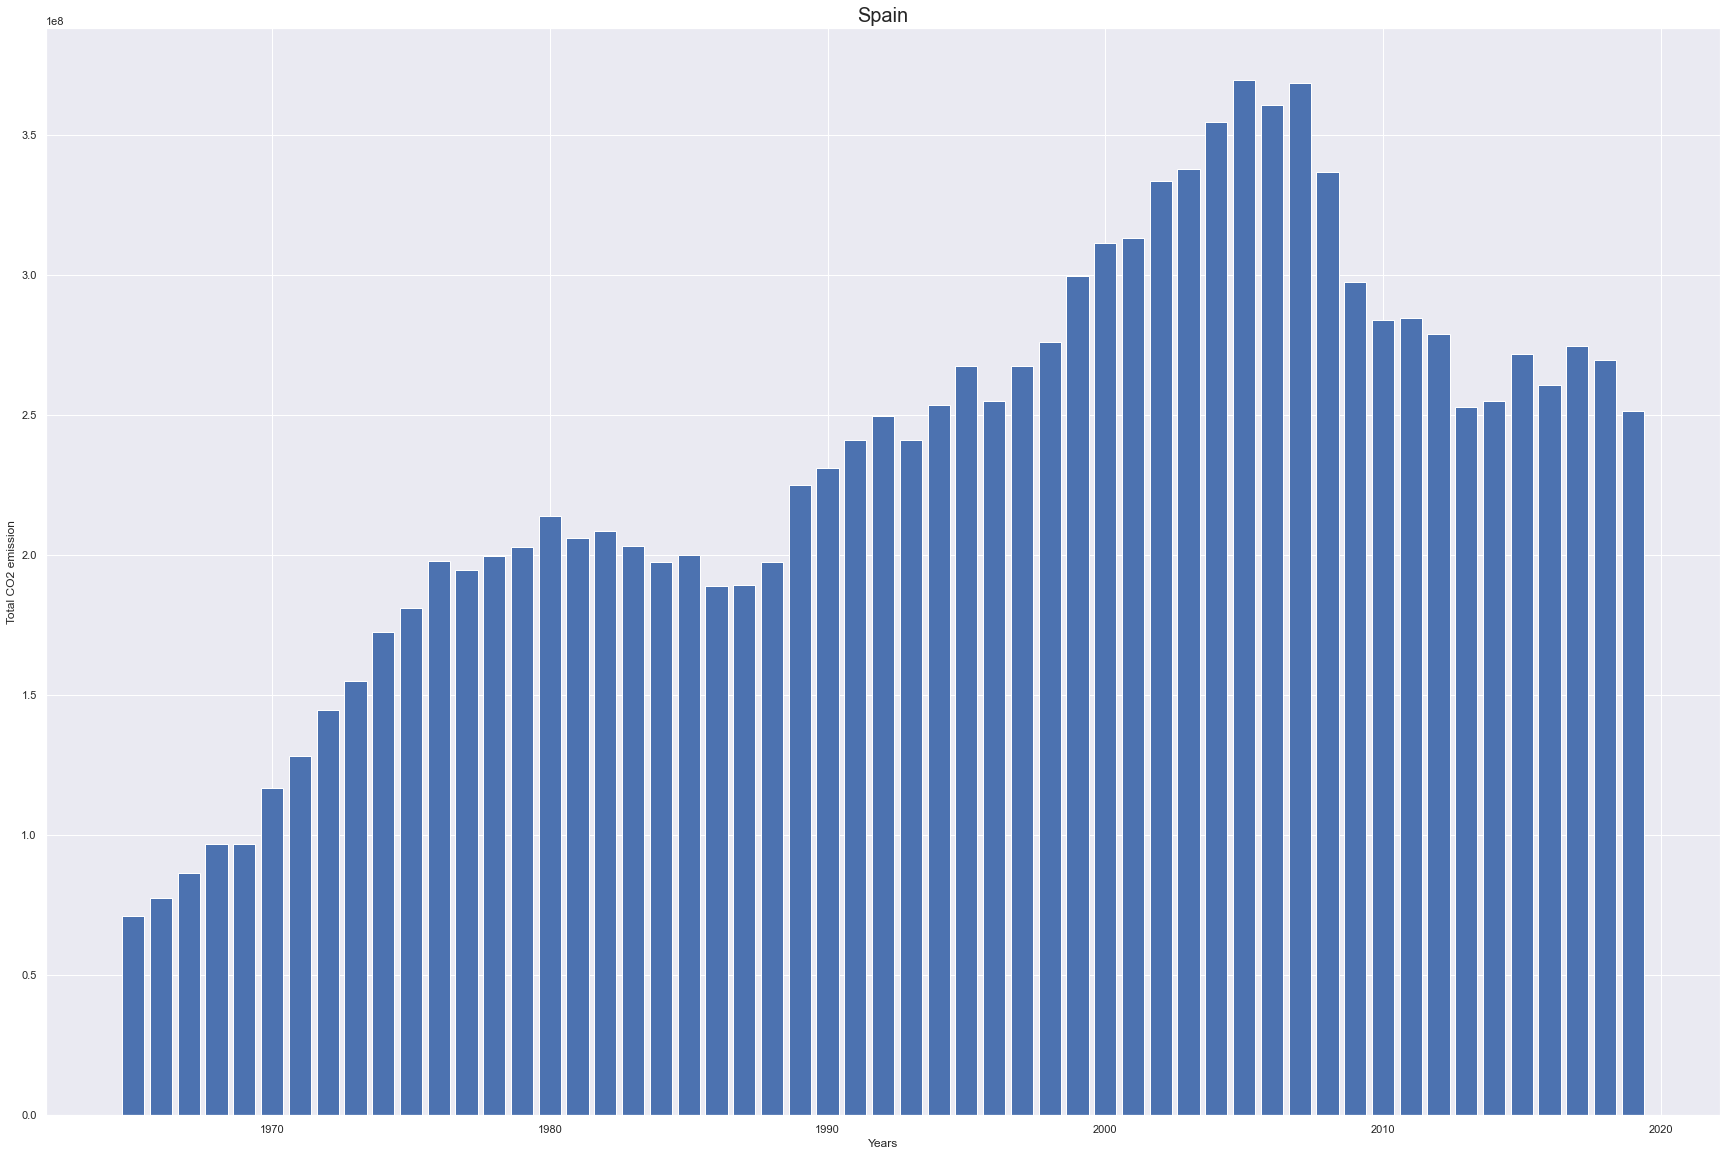

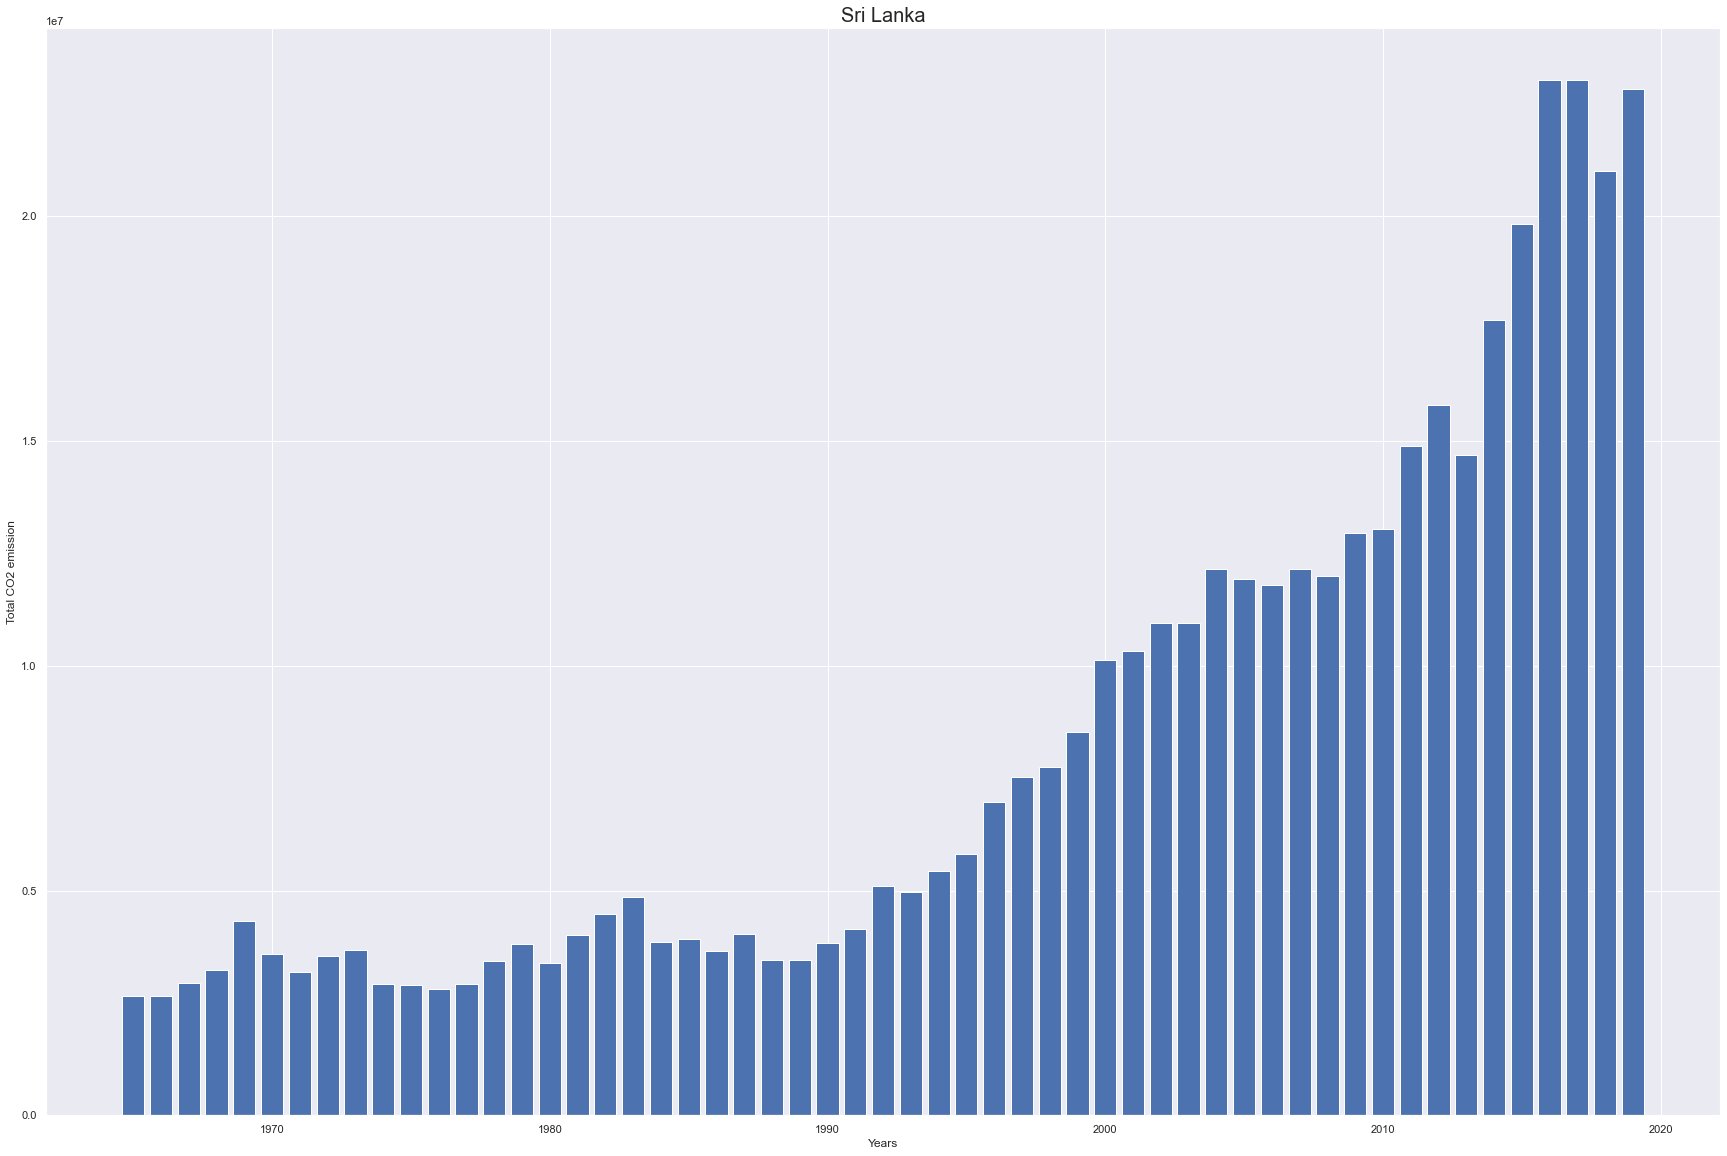

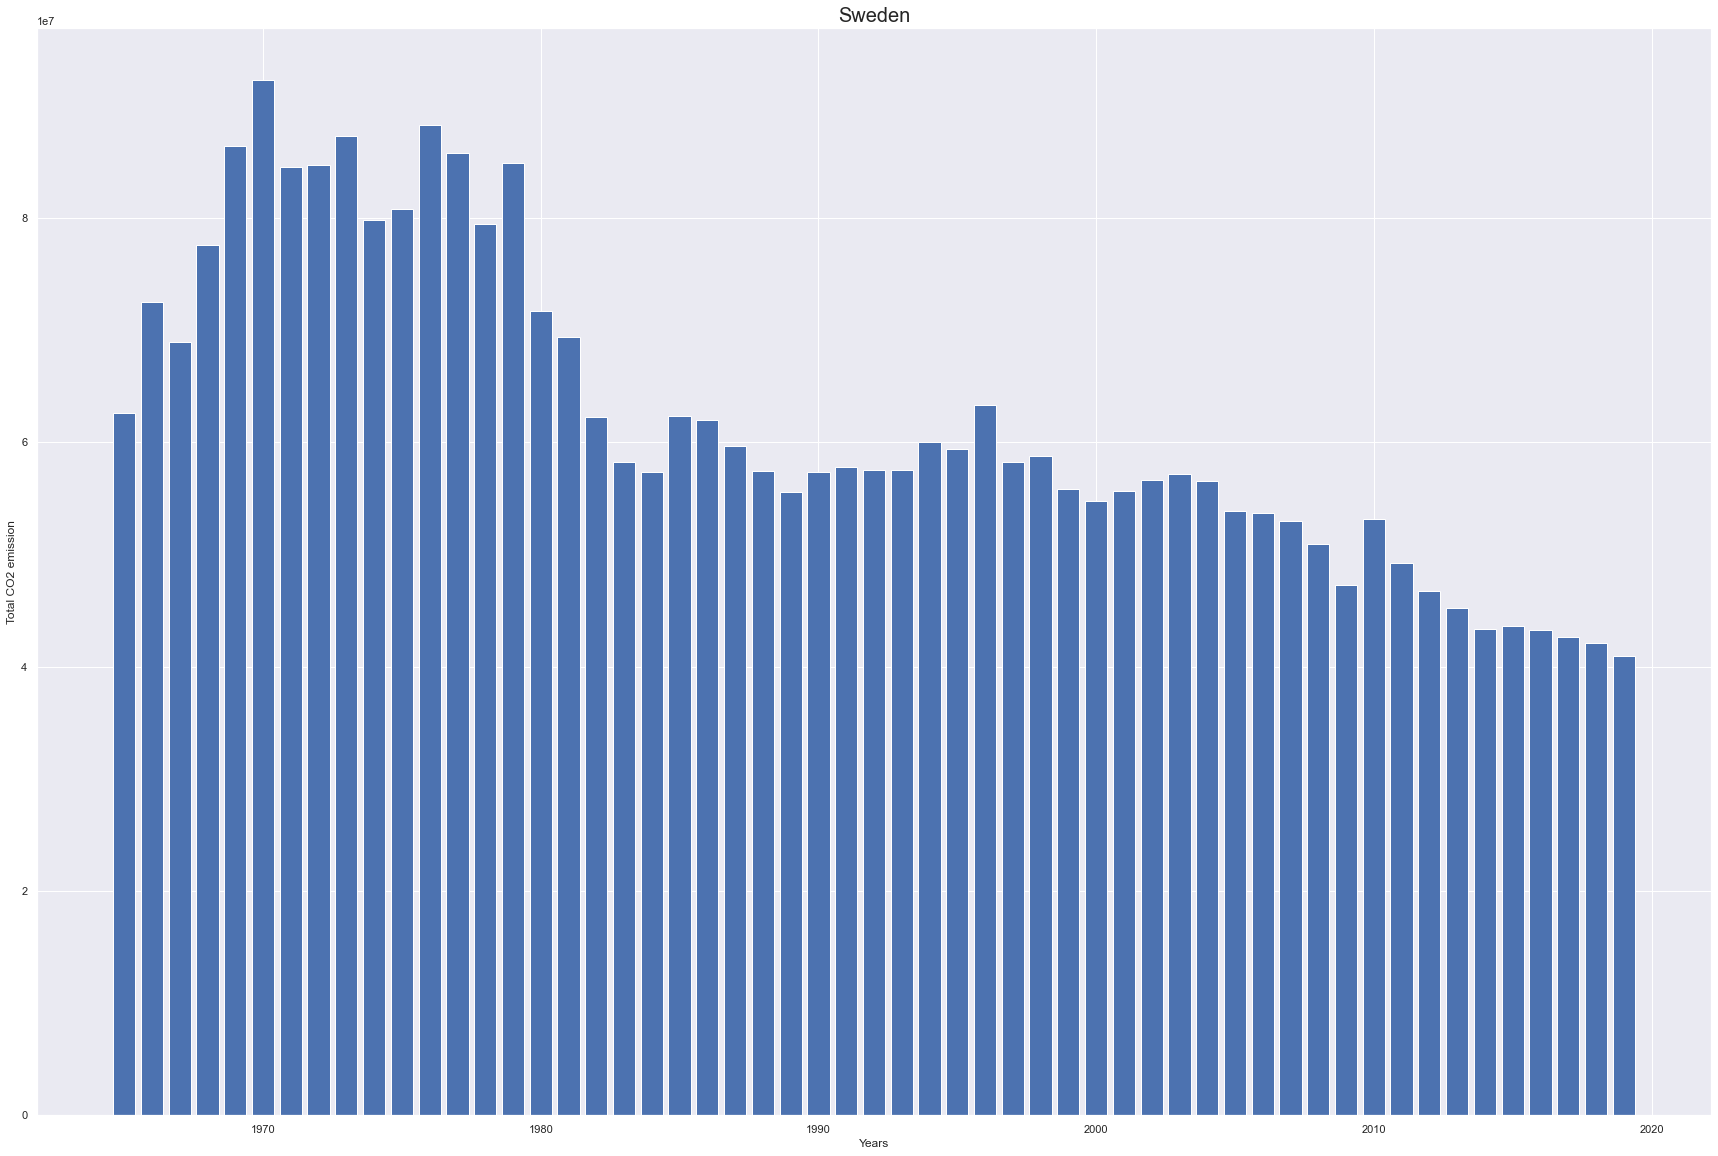

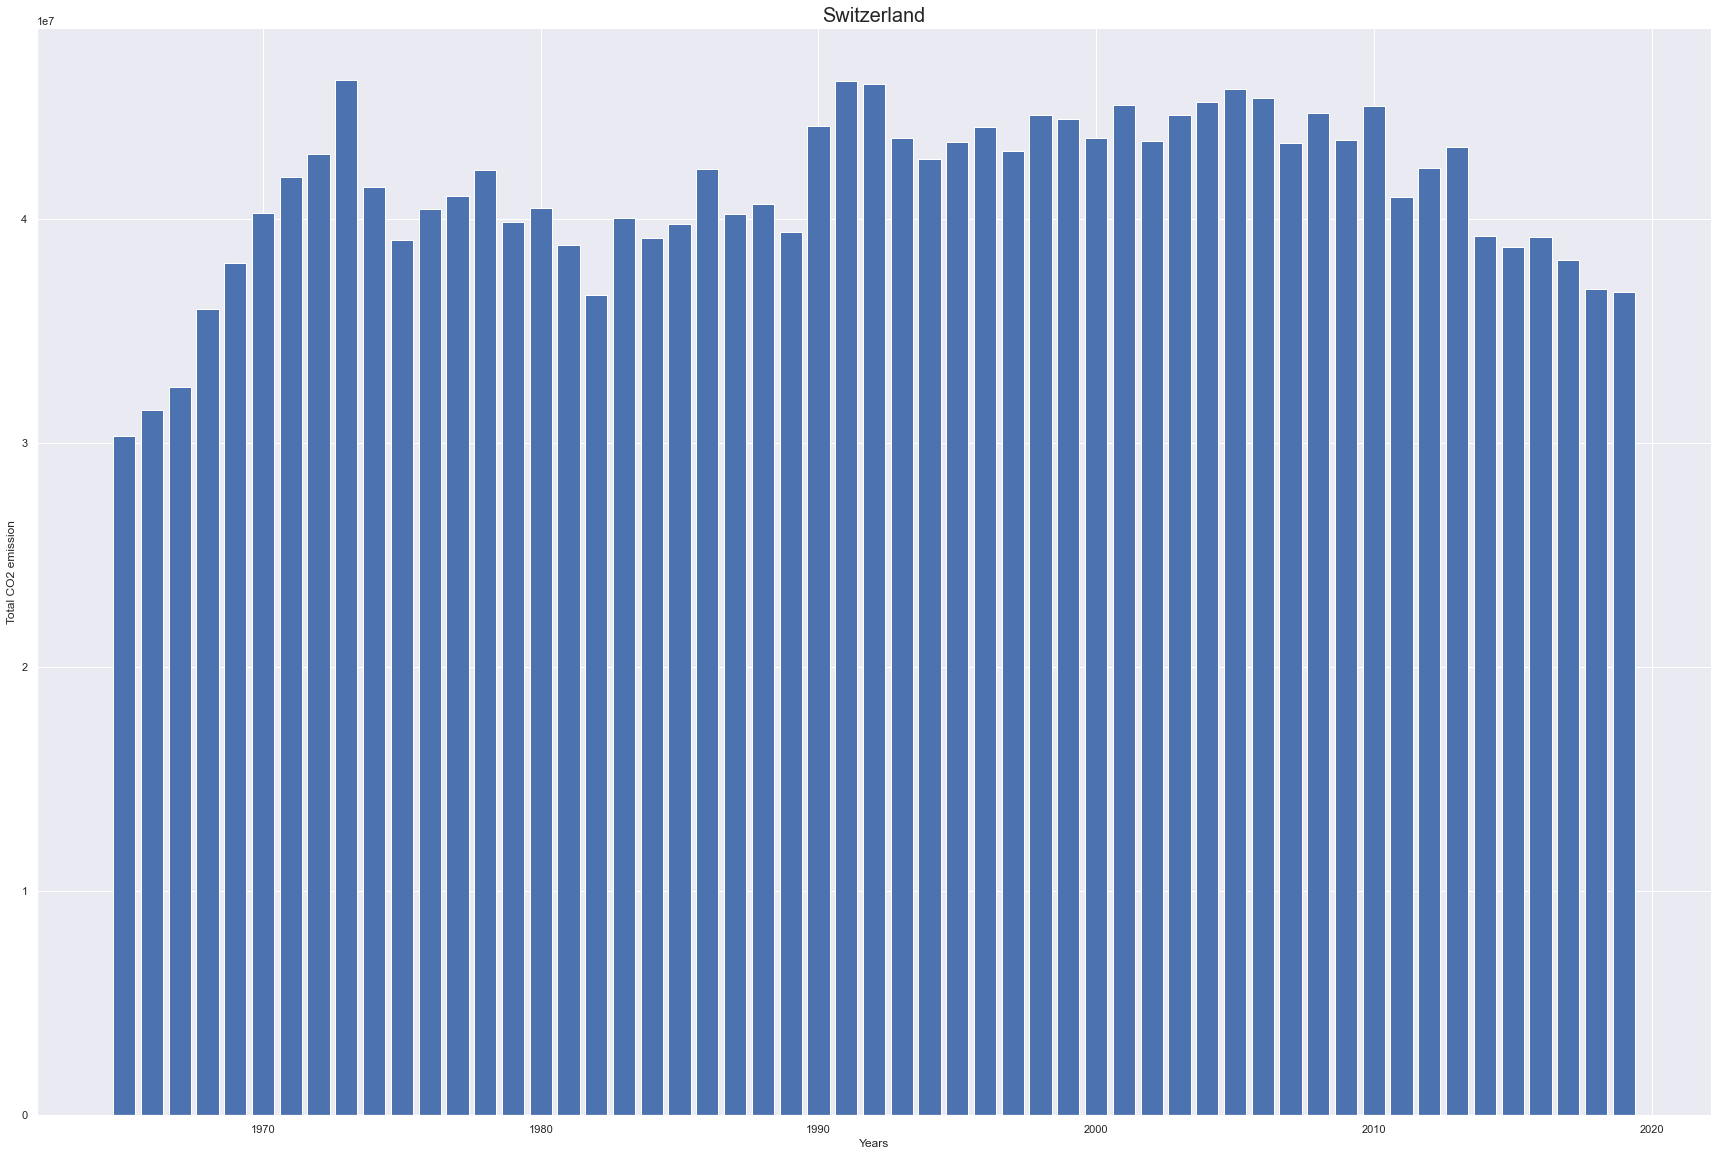

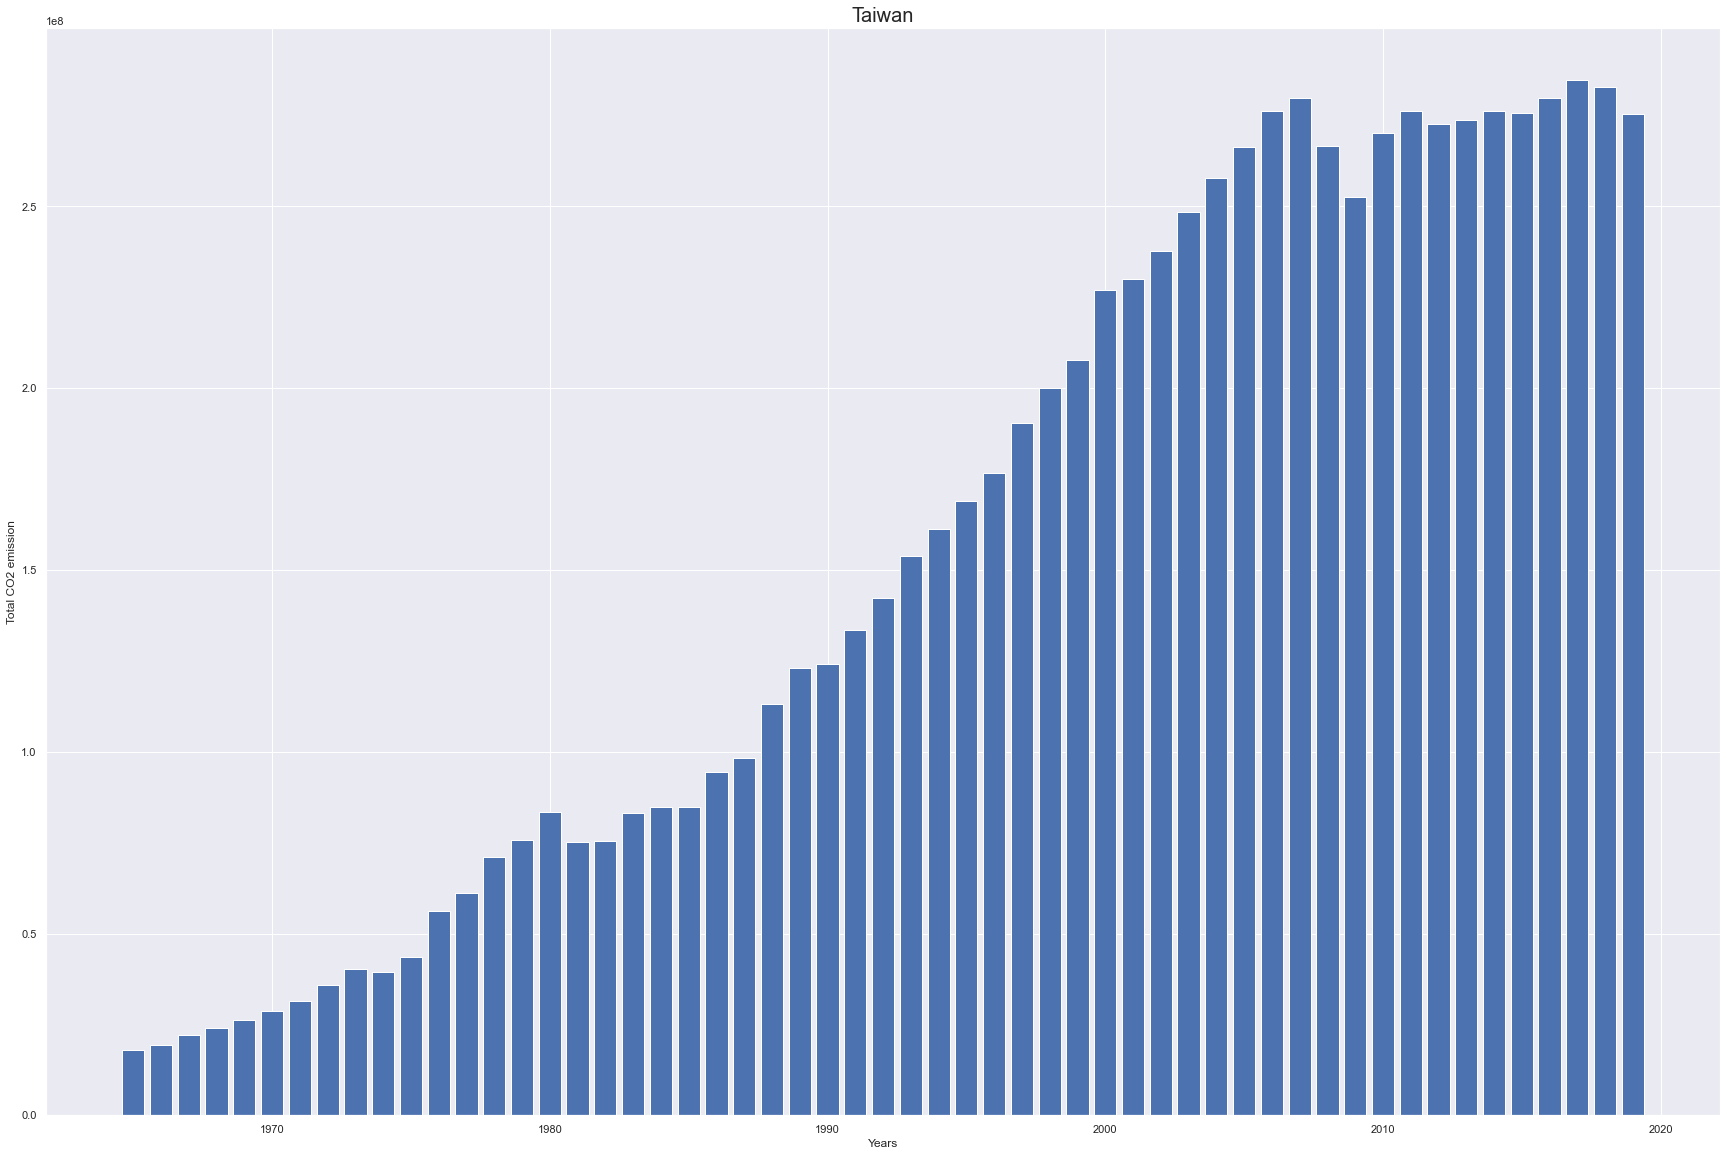

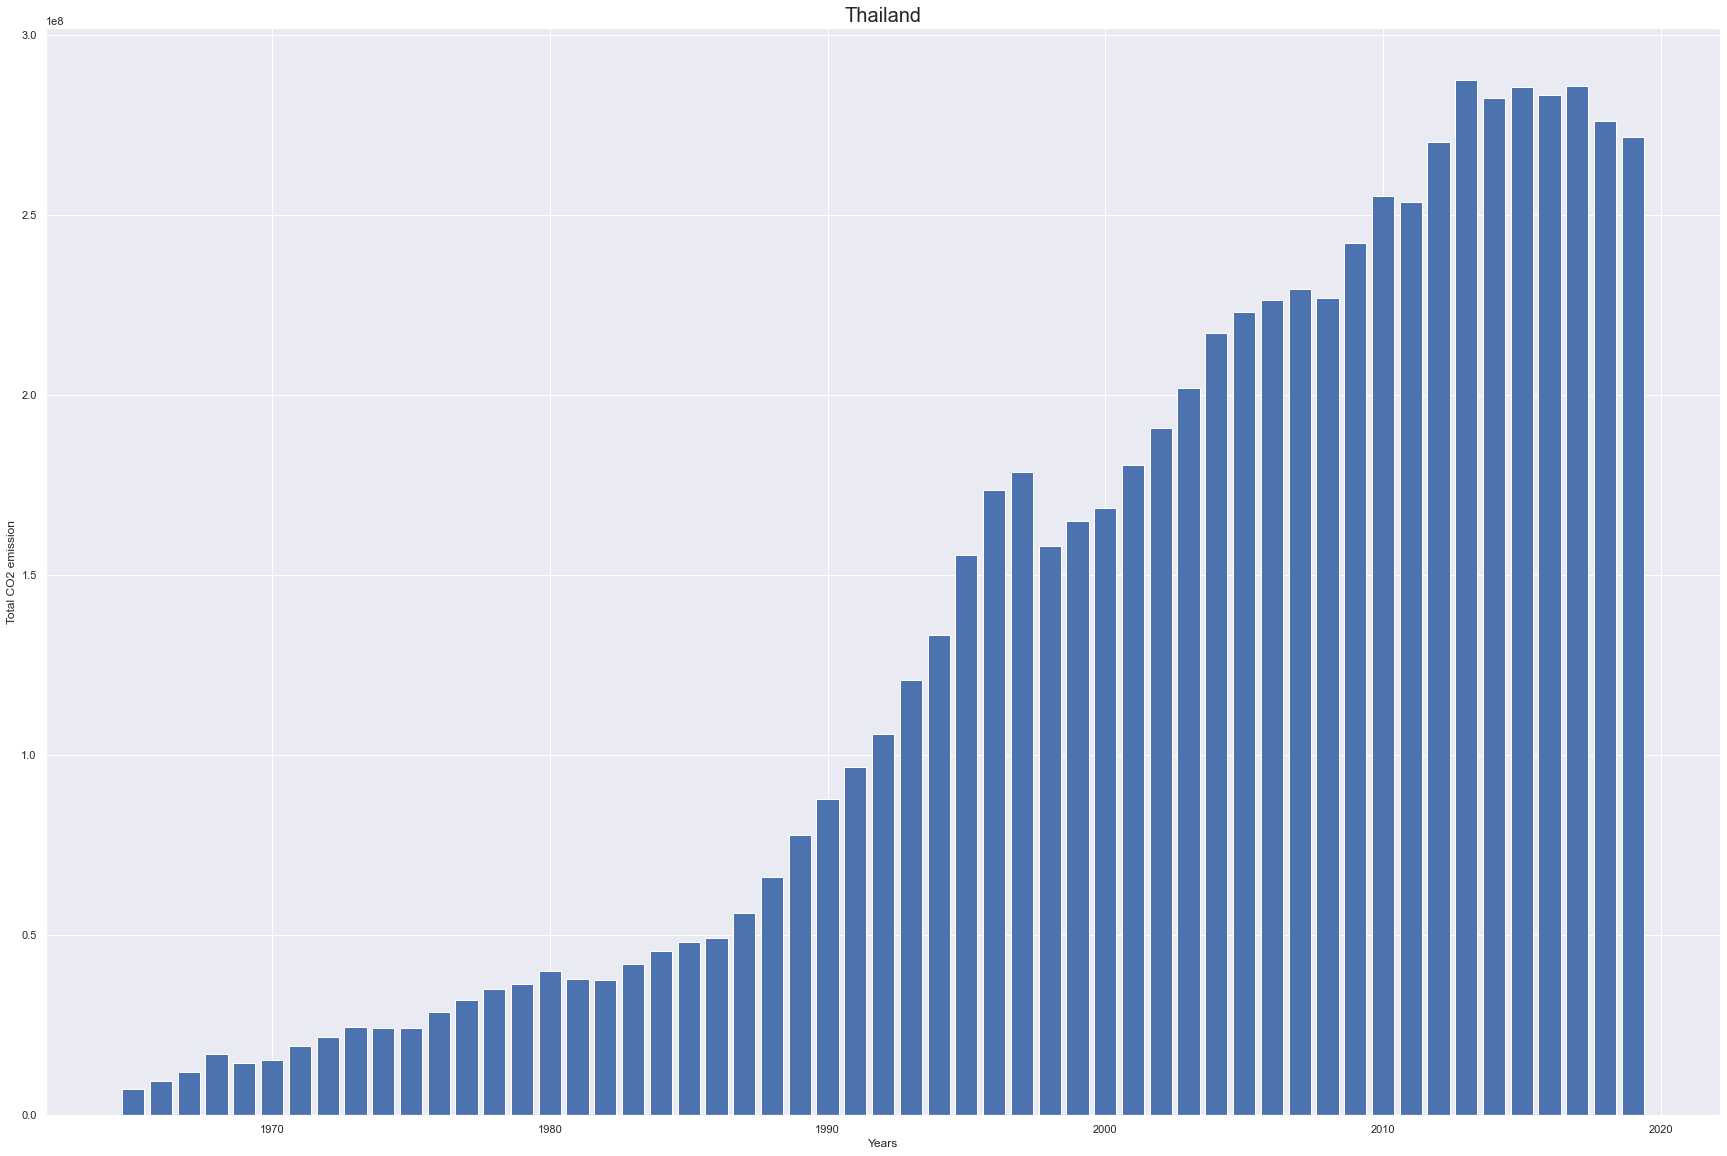

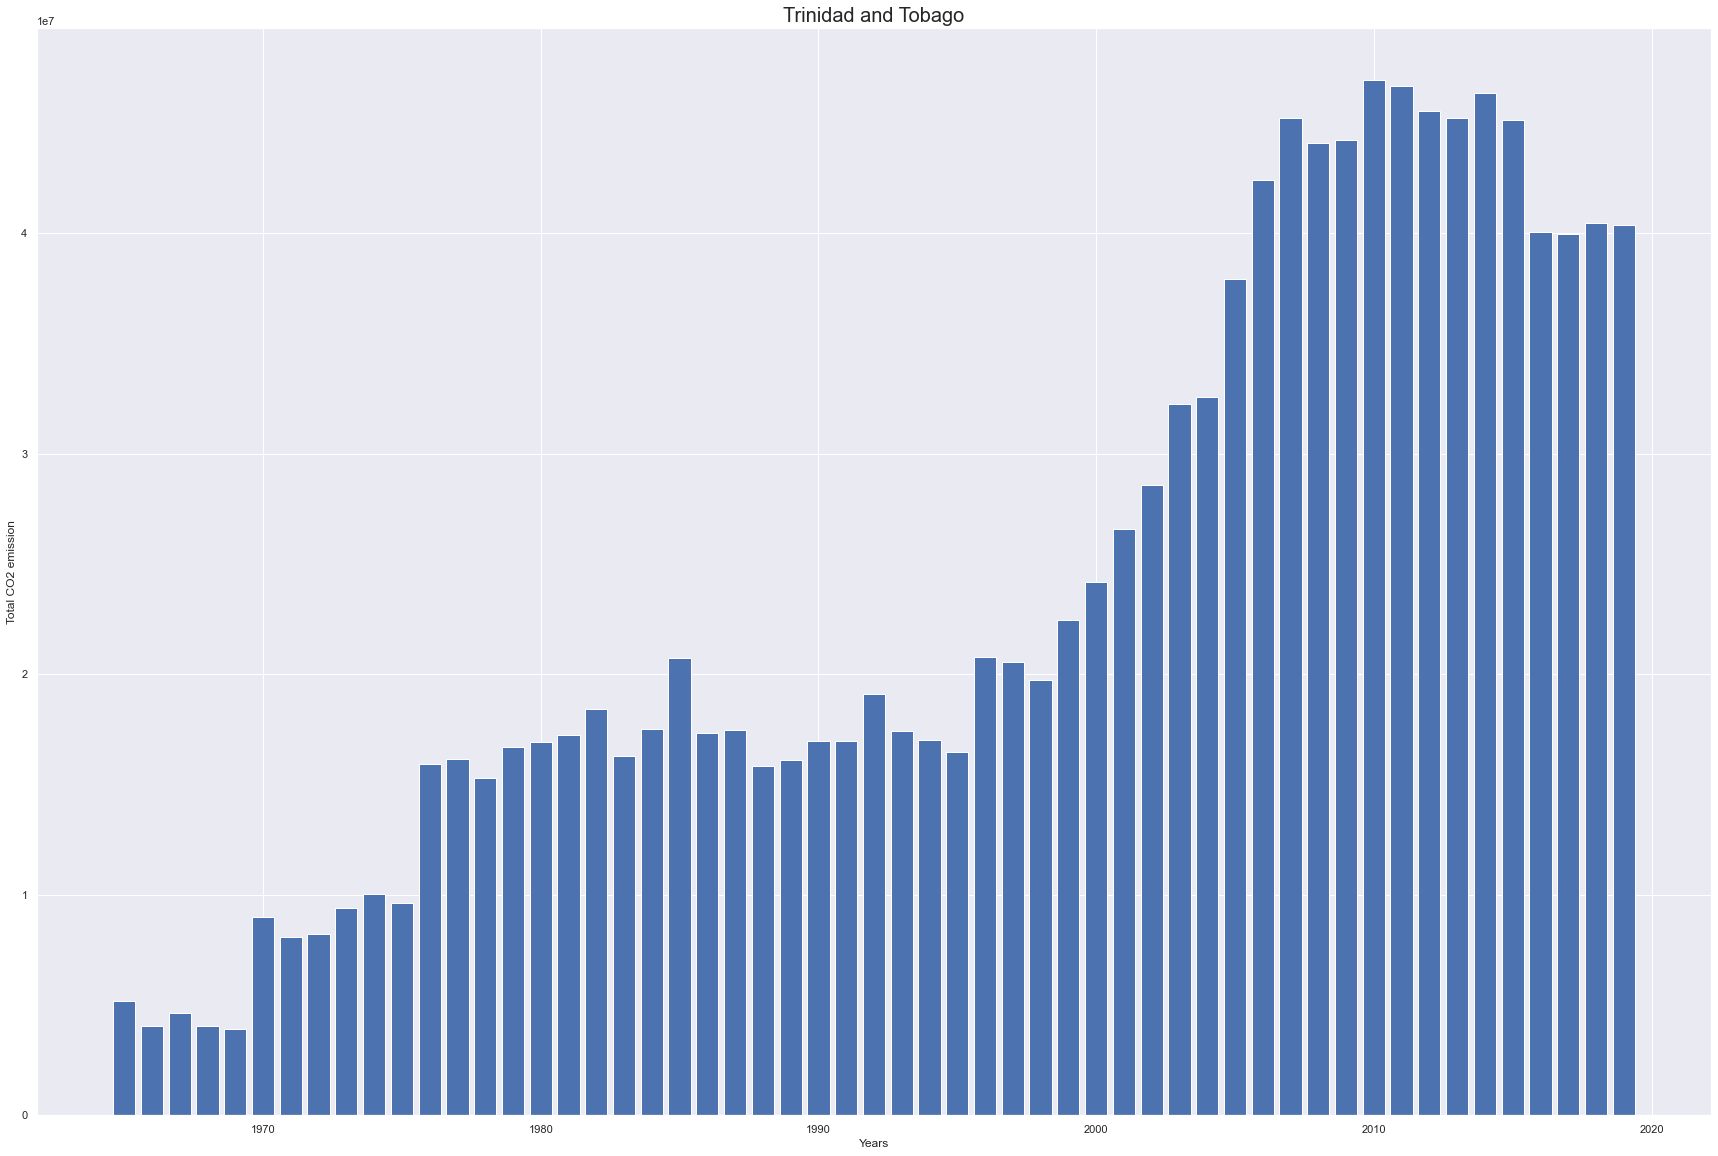

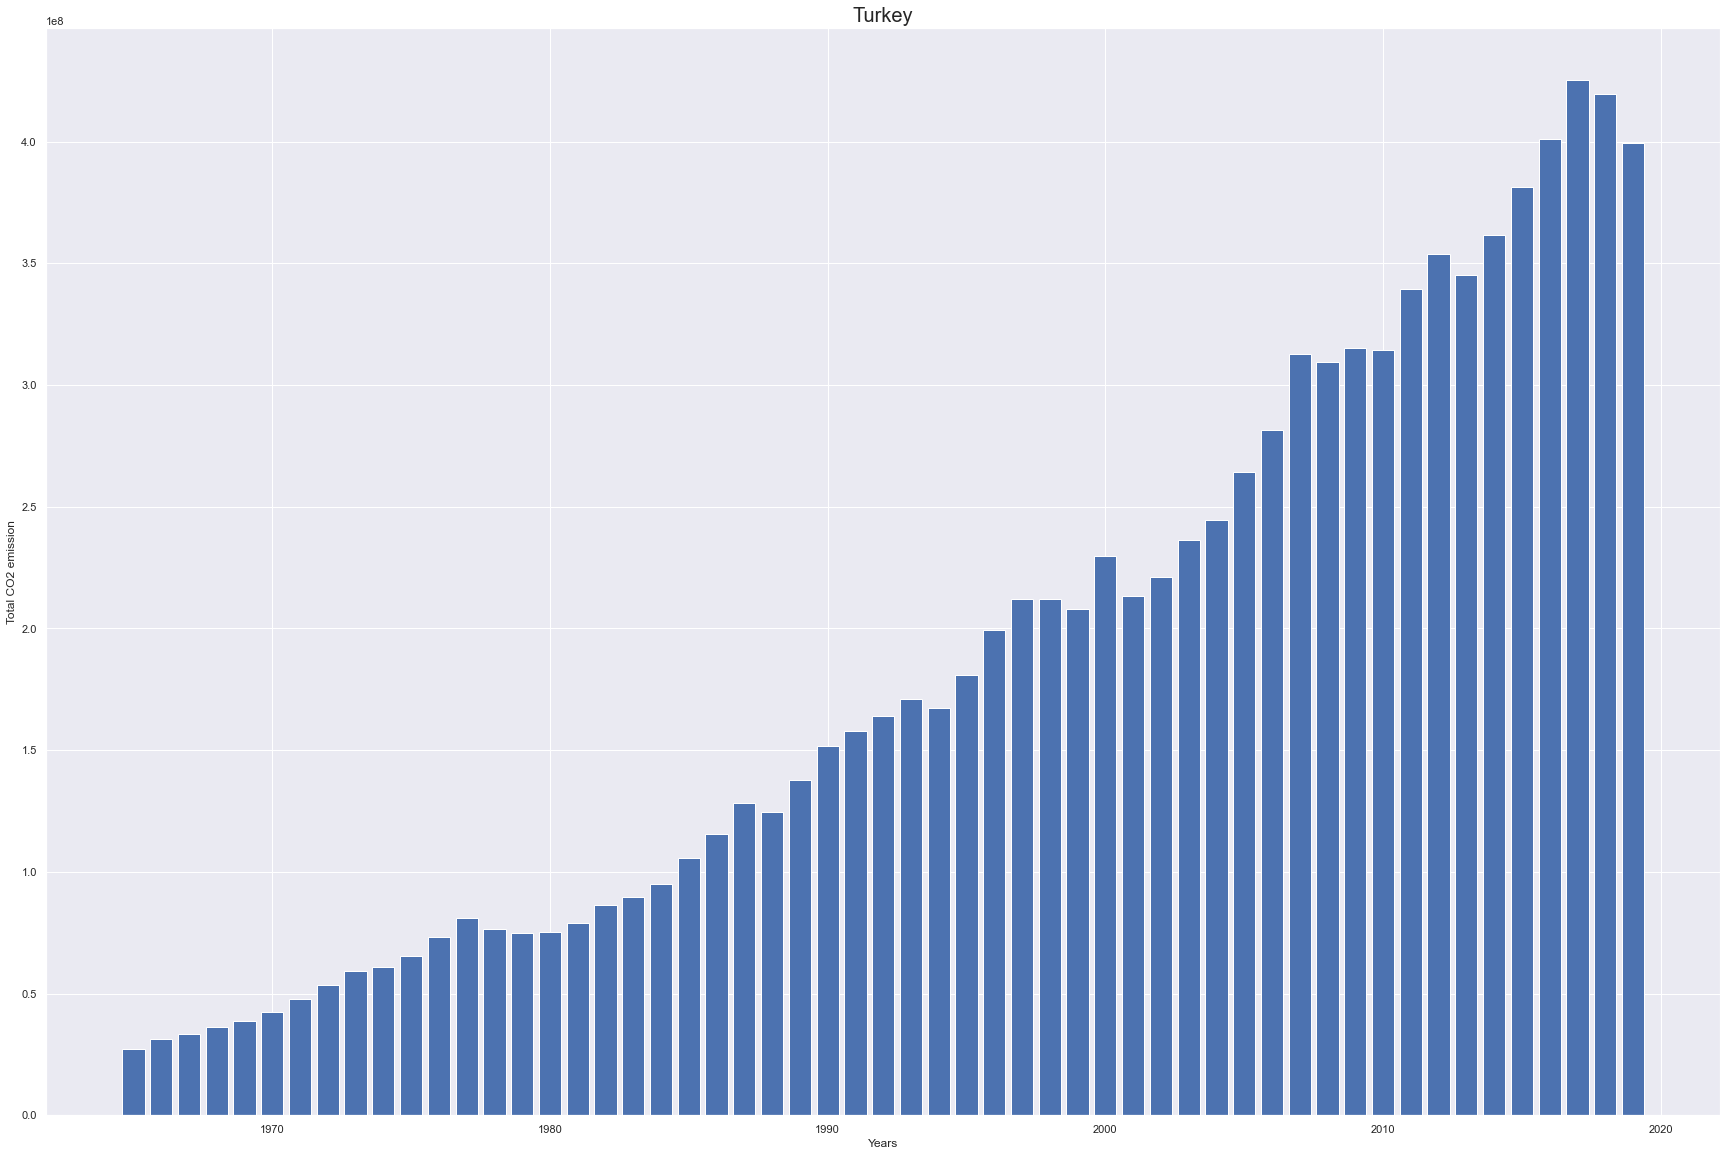

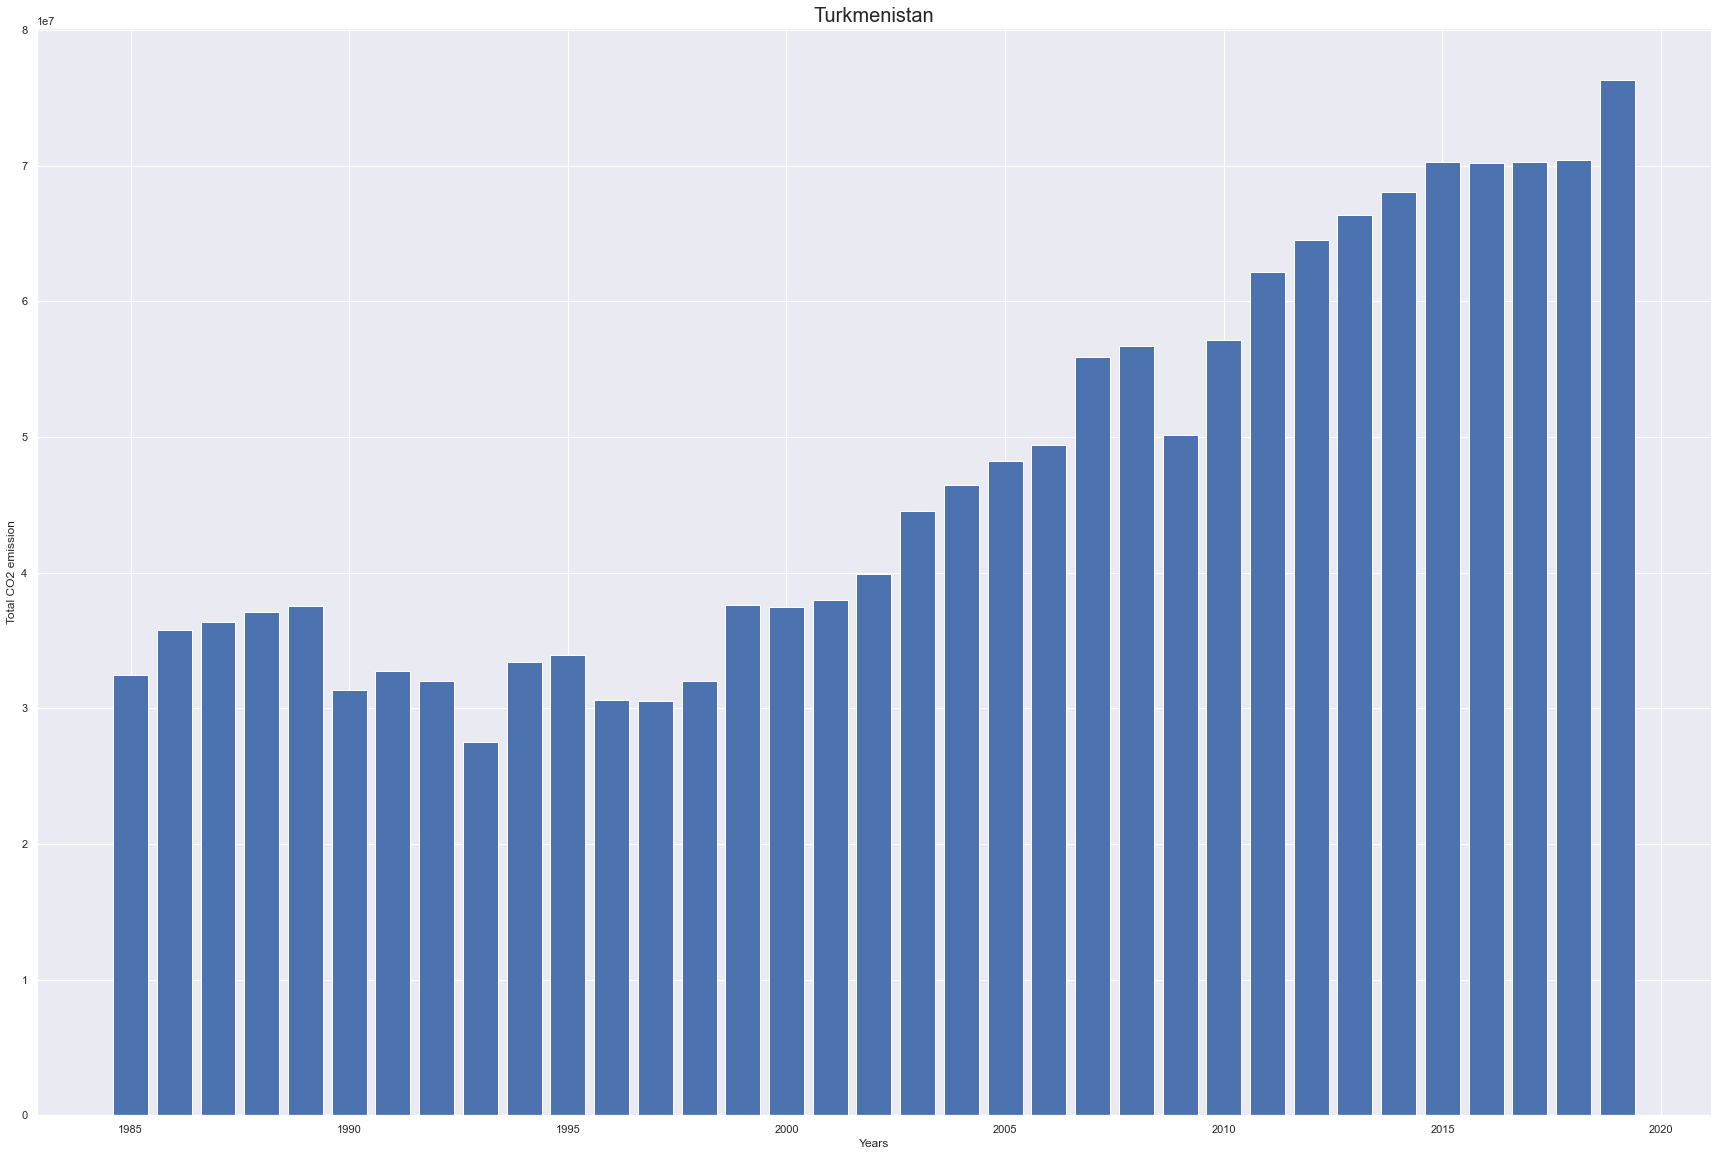

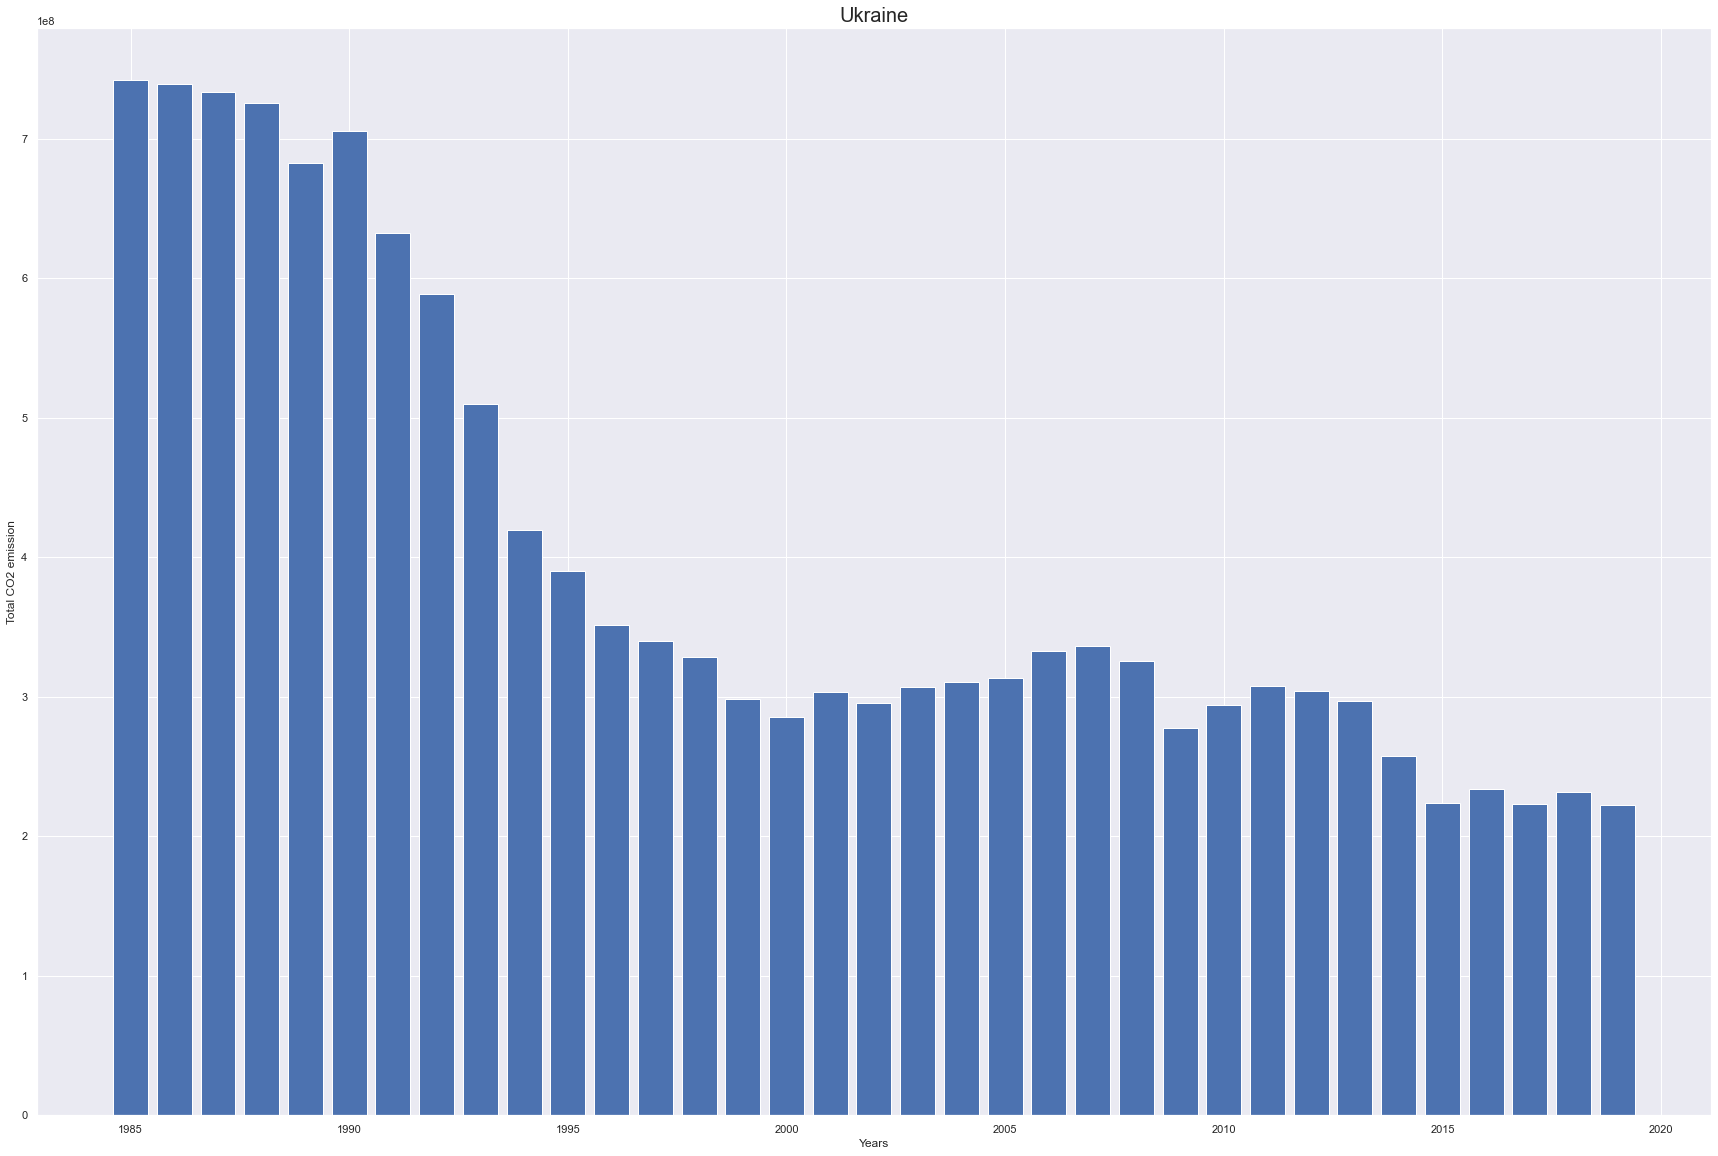

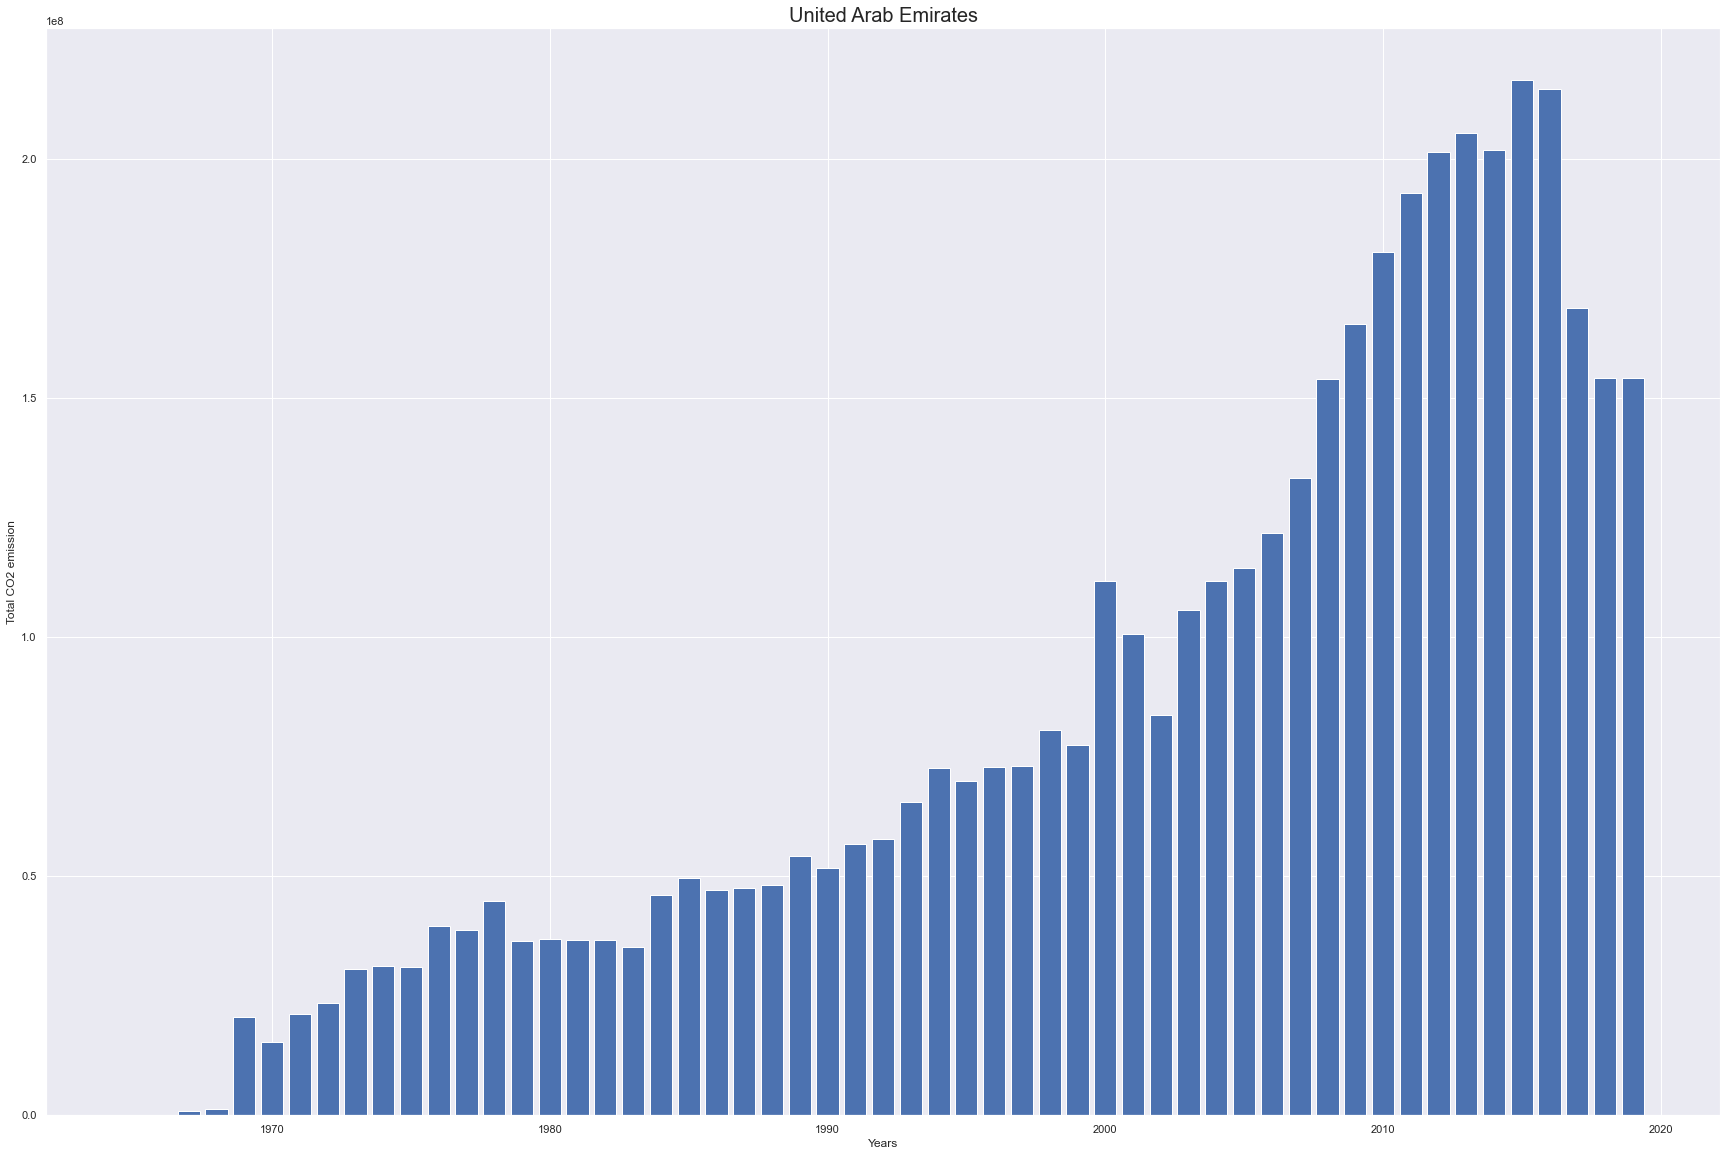

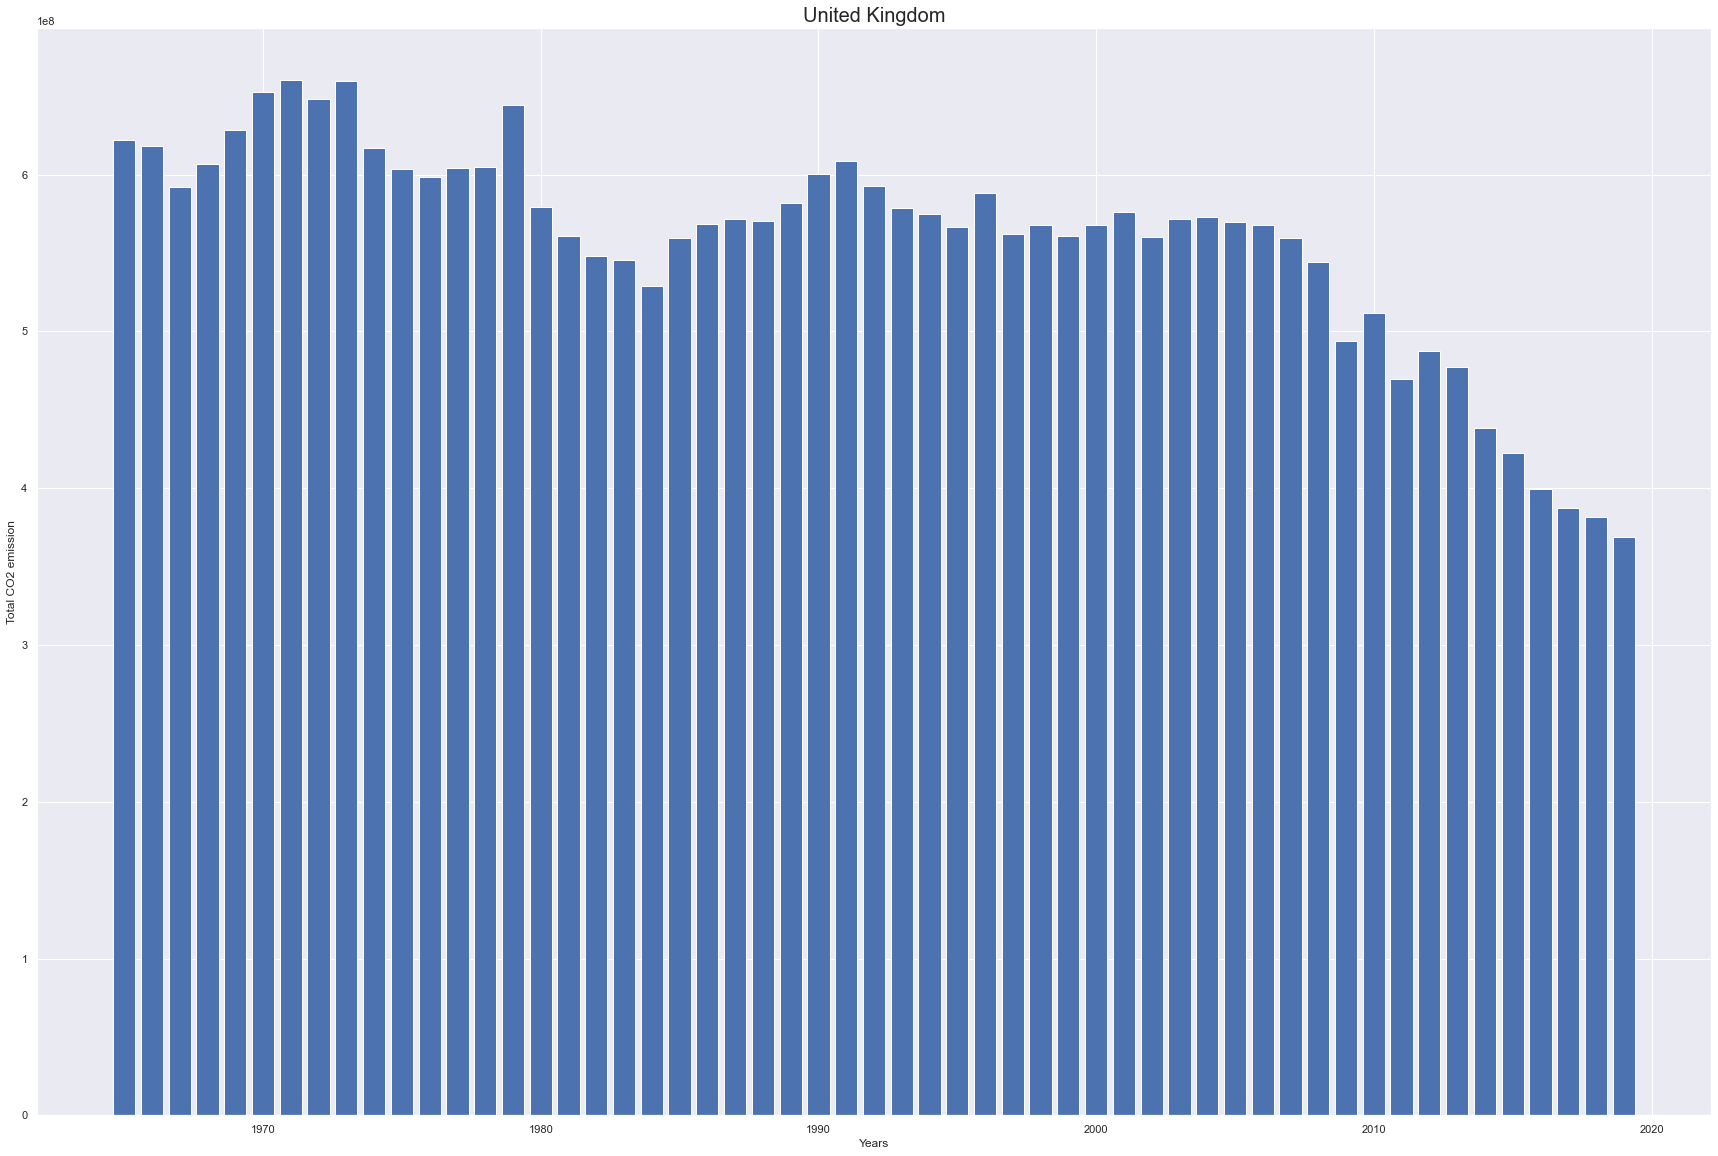

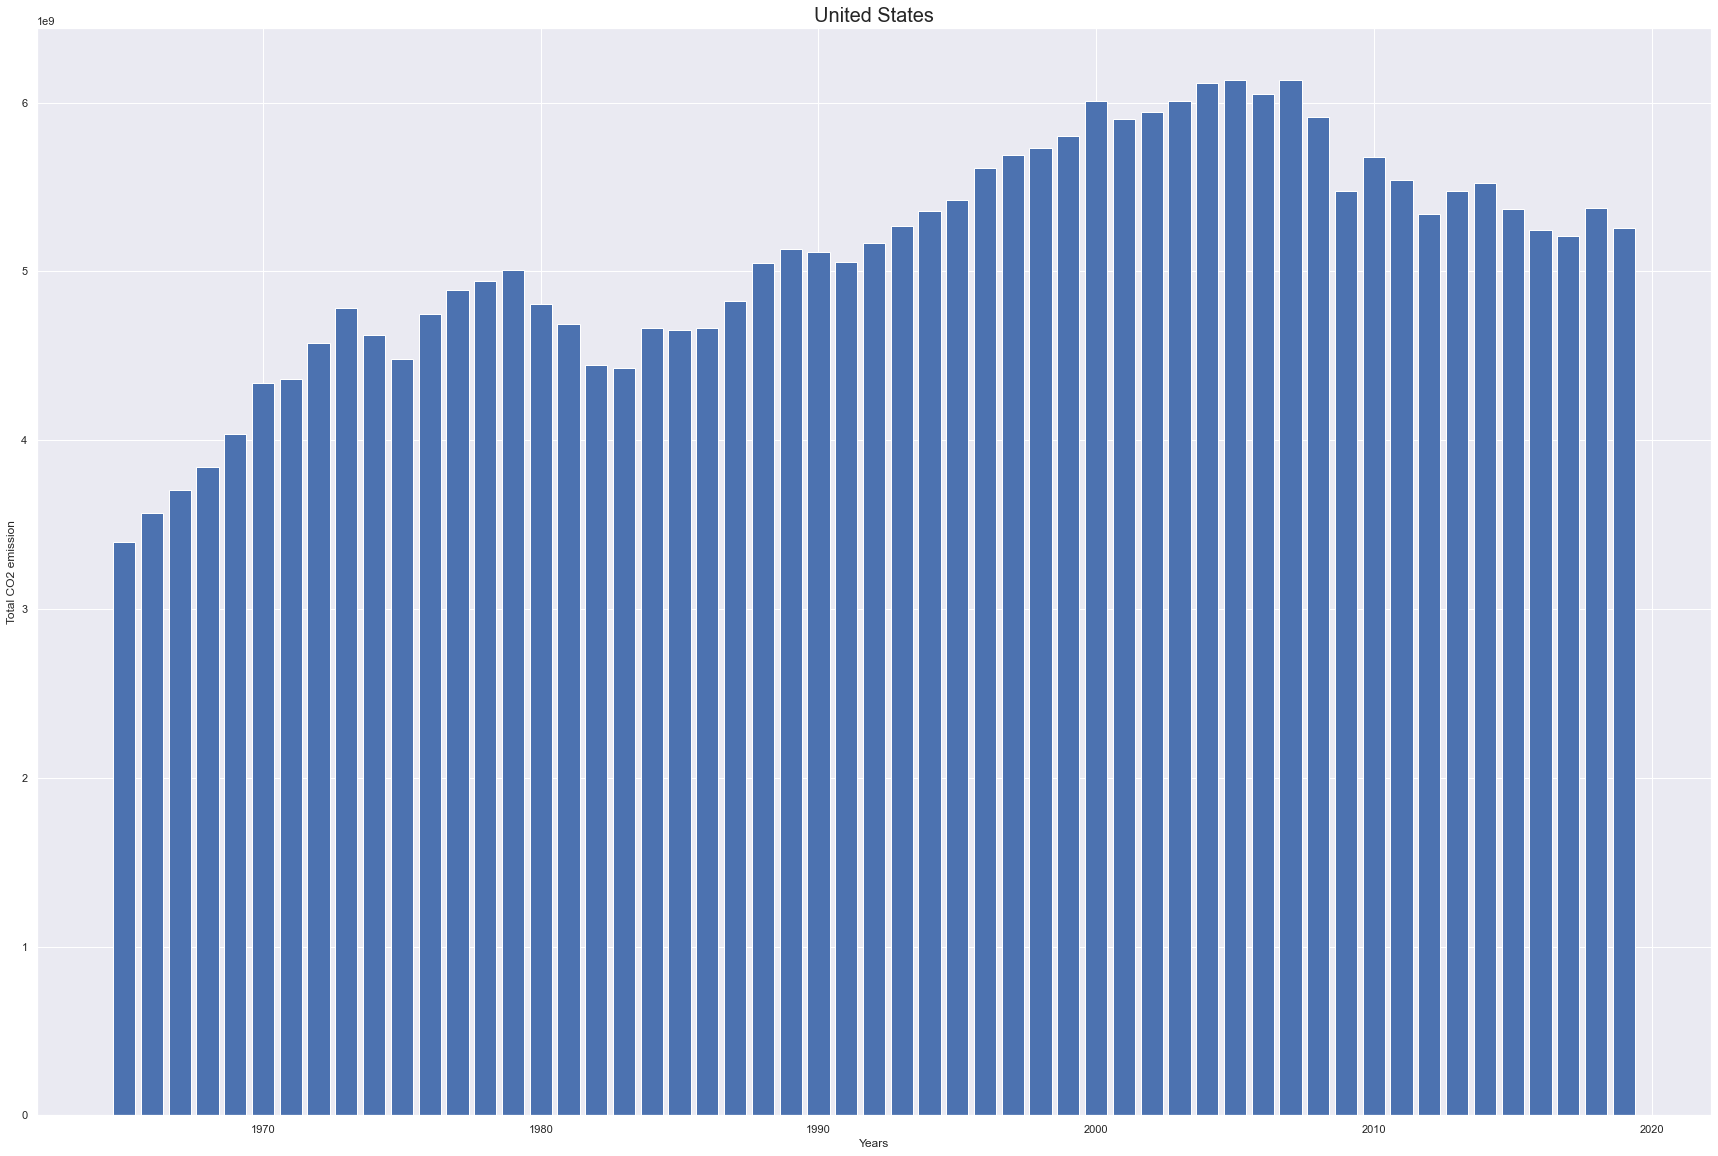

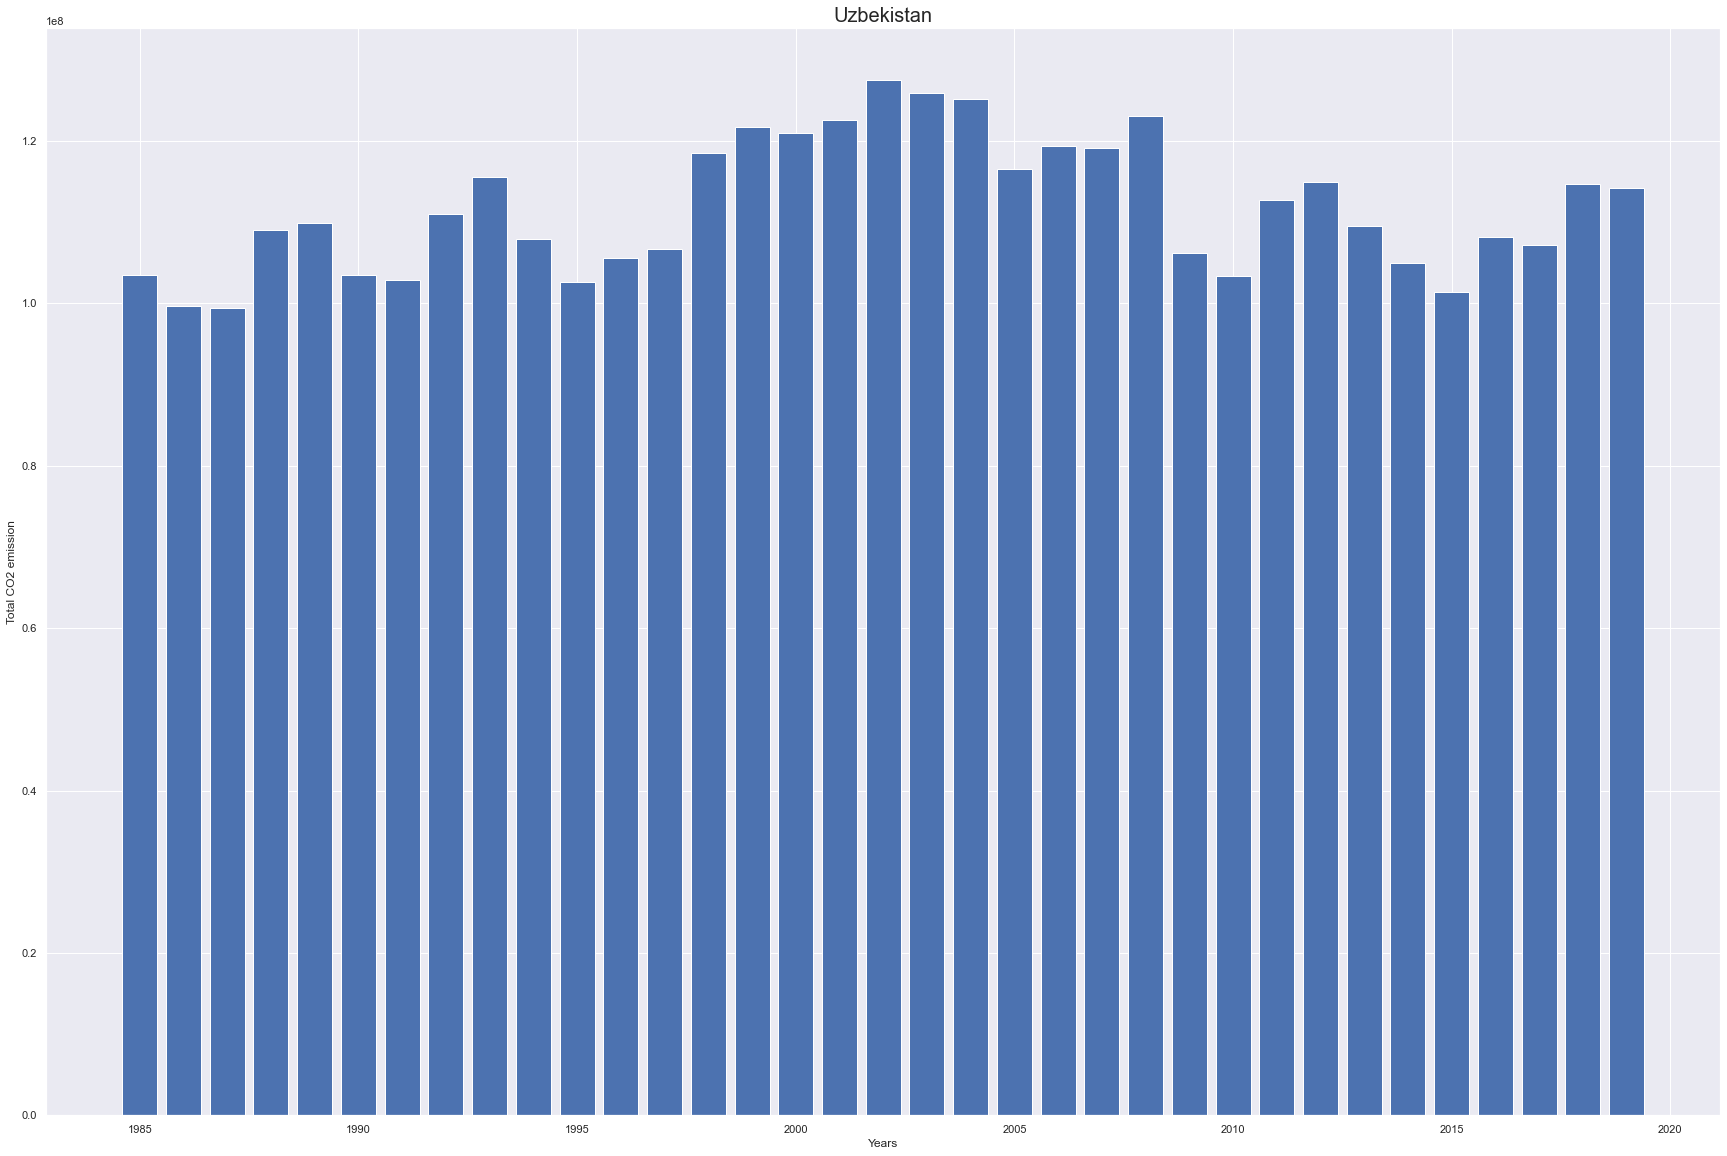

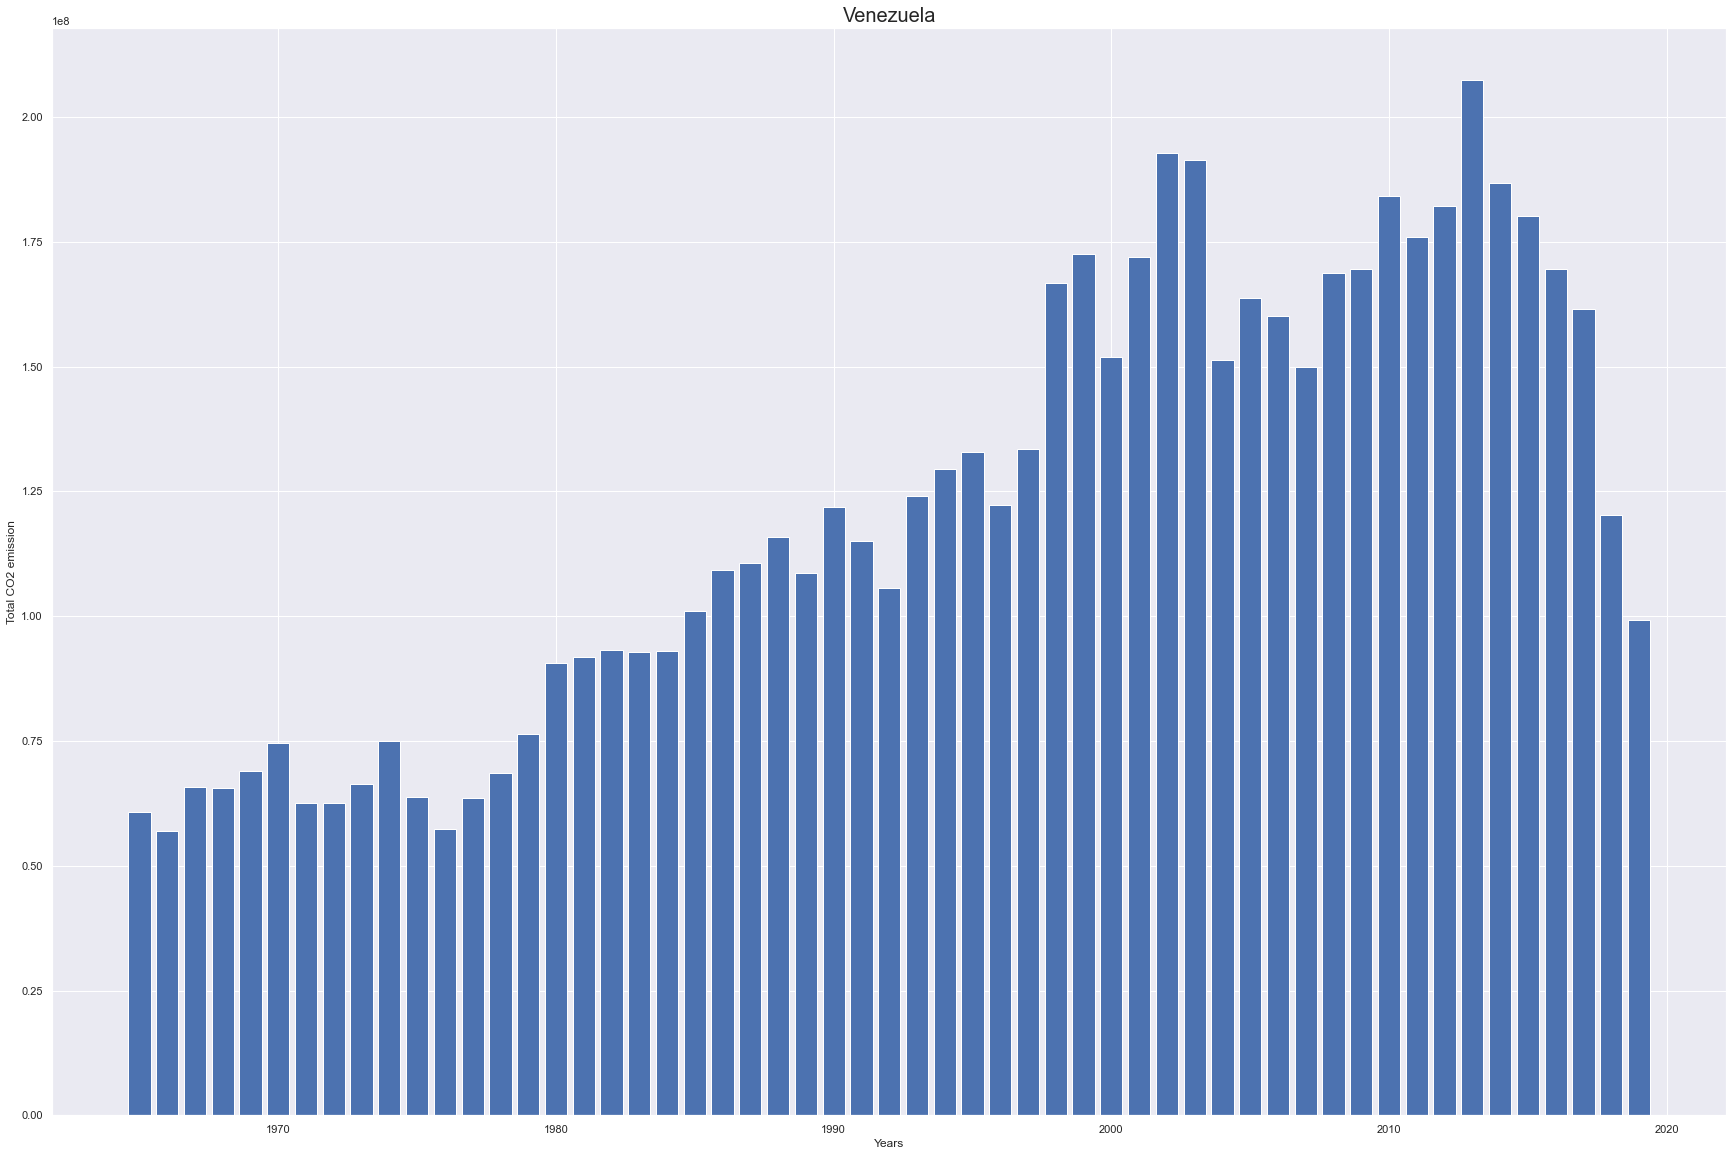

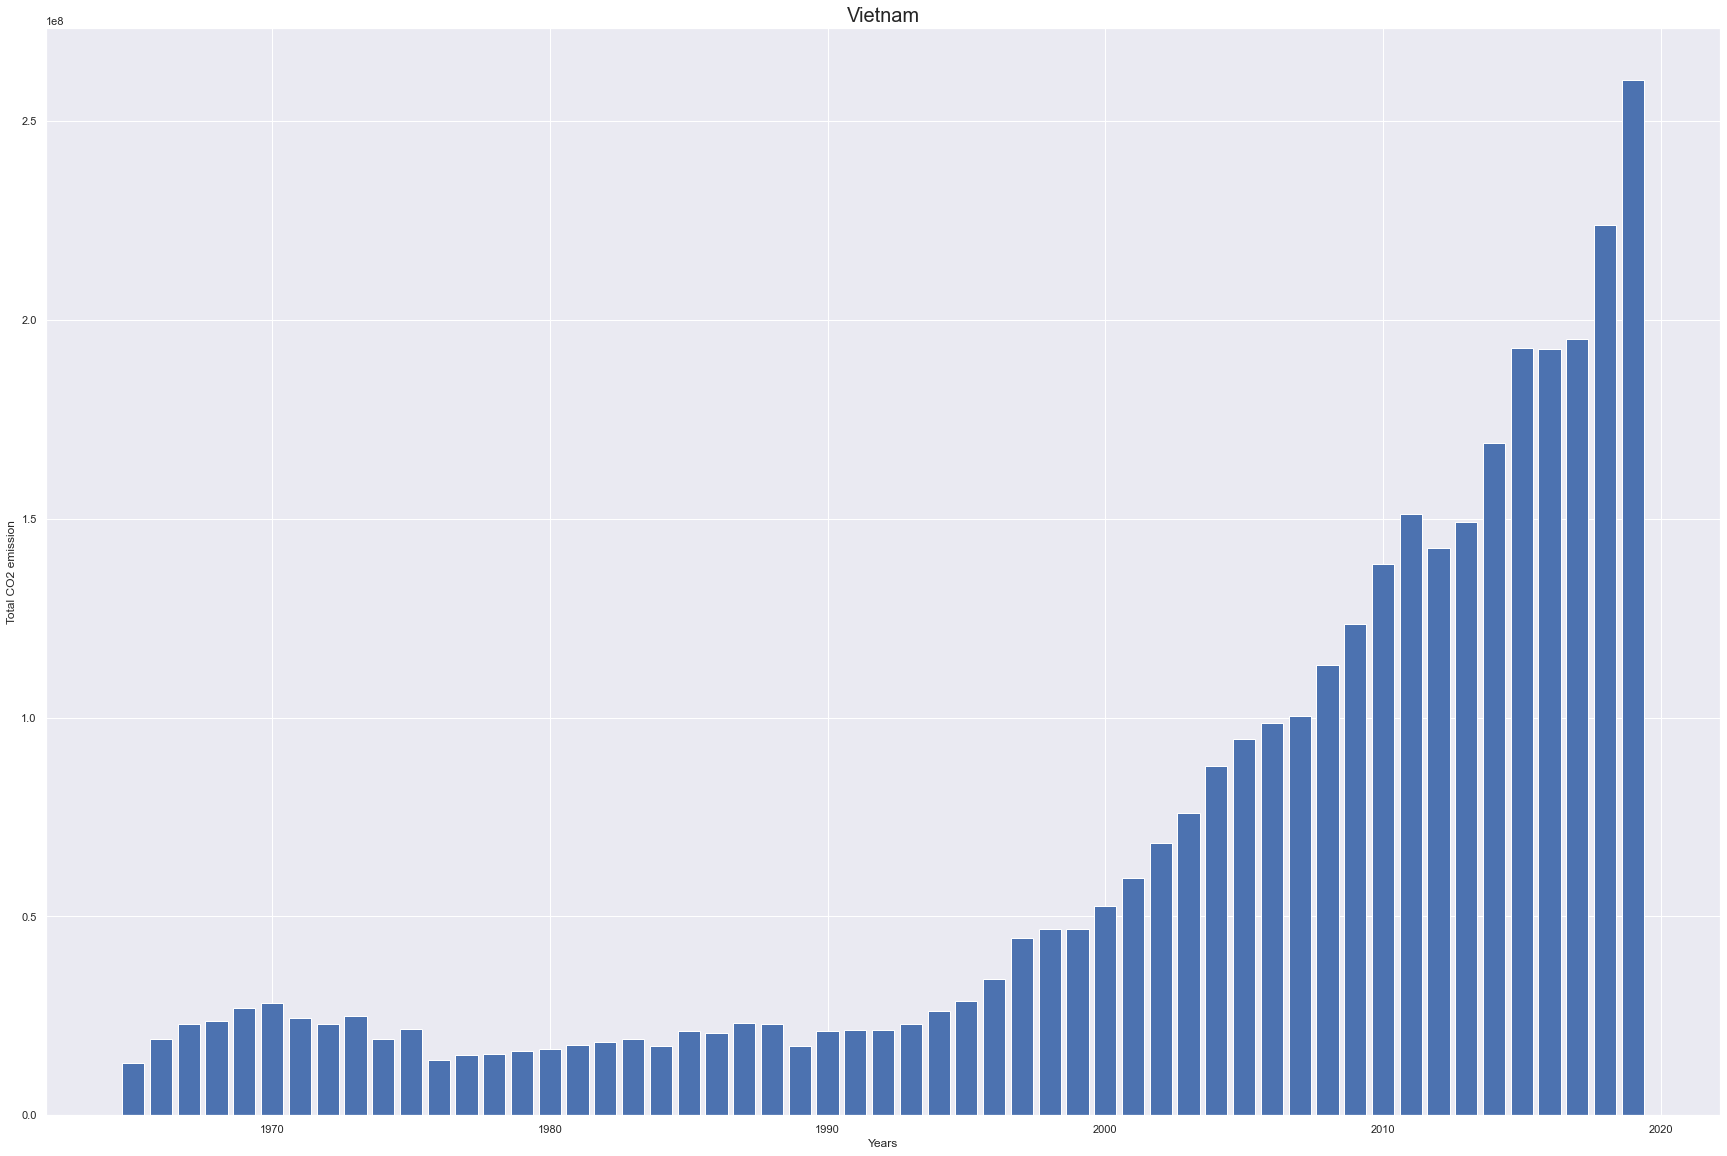

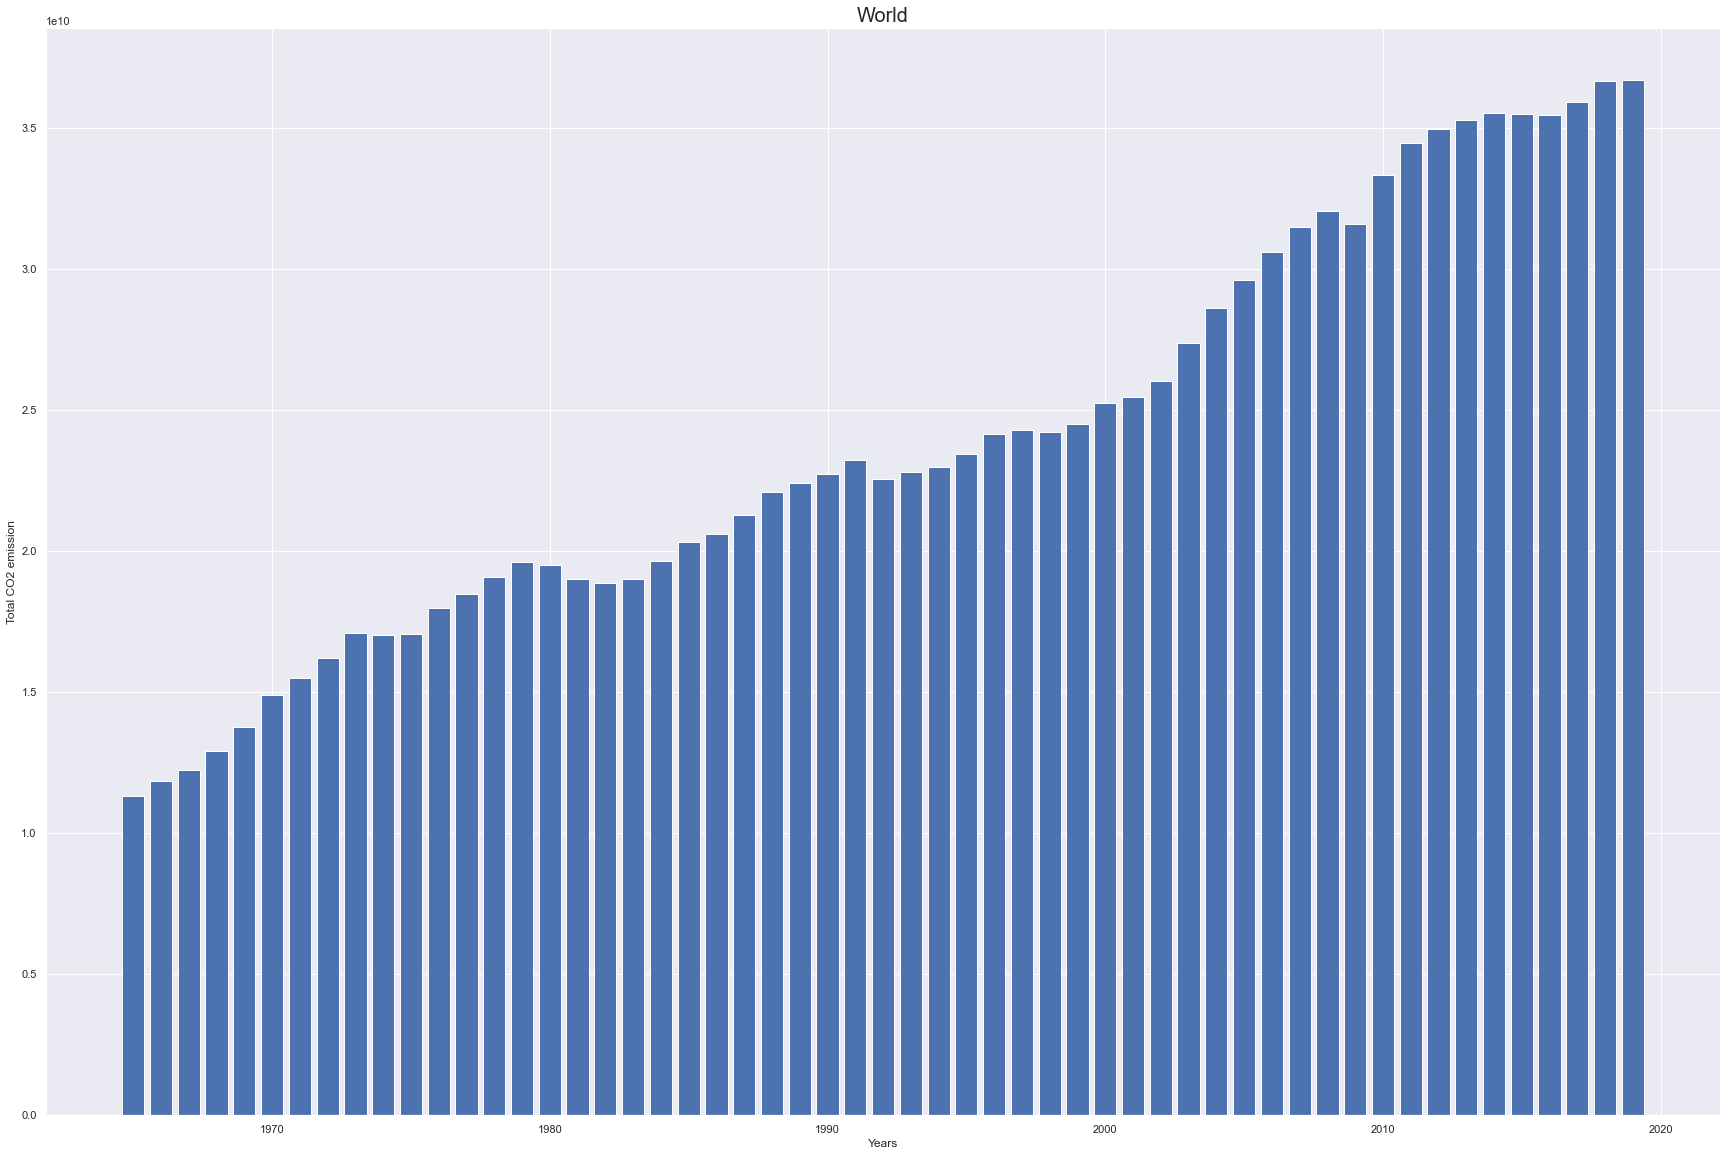

In [37]:
import matplotlib.pyplot as plt
import numpy as np

country_names= data45.Country.unique()
years_list= data45.Year.unique()

for country in country_names:
    temp1=data45[data45['Country']== country]
        
    fig=plt.figure()
    plt.bar(temp1.Year, temp1["Annual CO2 emissions"])
    plt.title(country)
    plt.xlabel("Years")
    plt.ylabel("Total CO2 emission")


<AxesSubplot:title={'center':'ciao'}, xlabel='Country'>

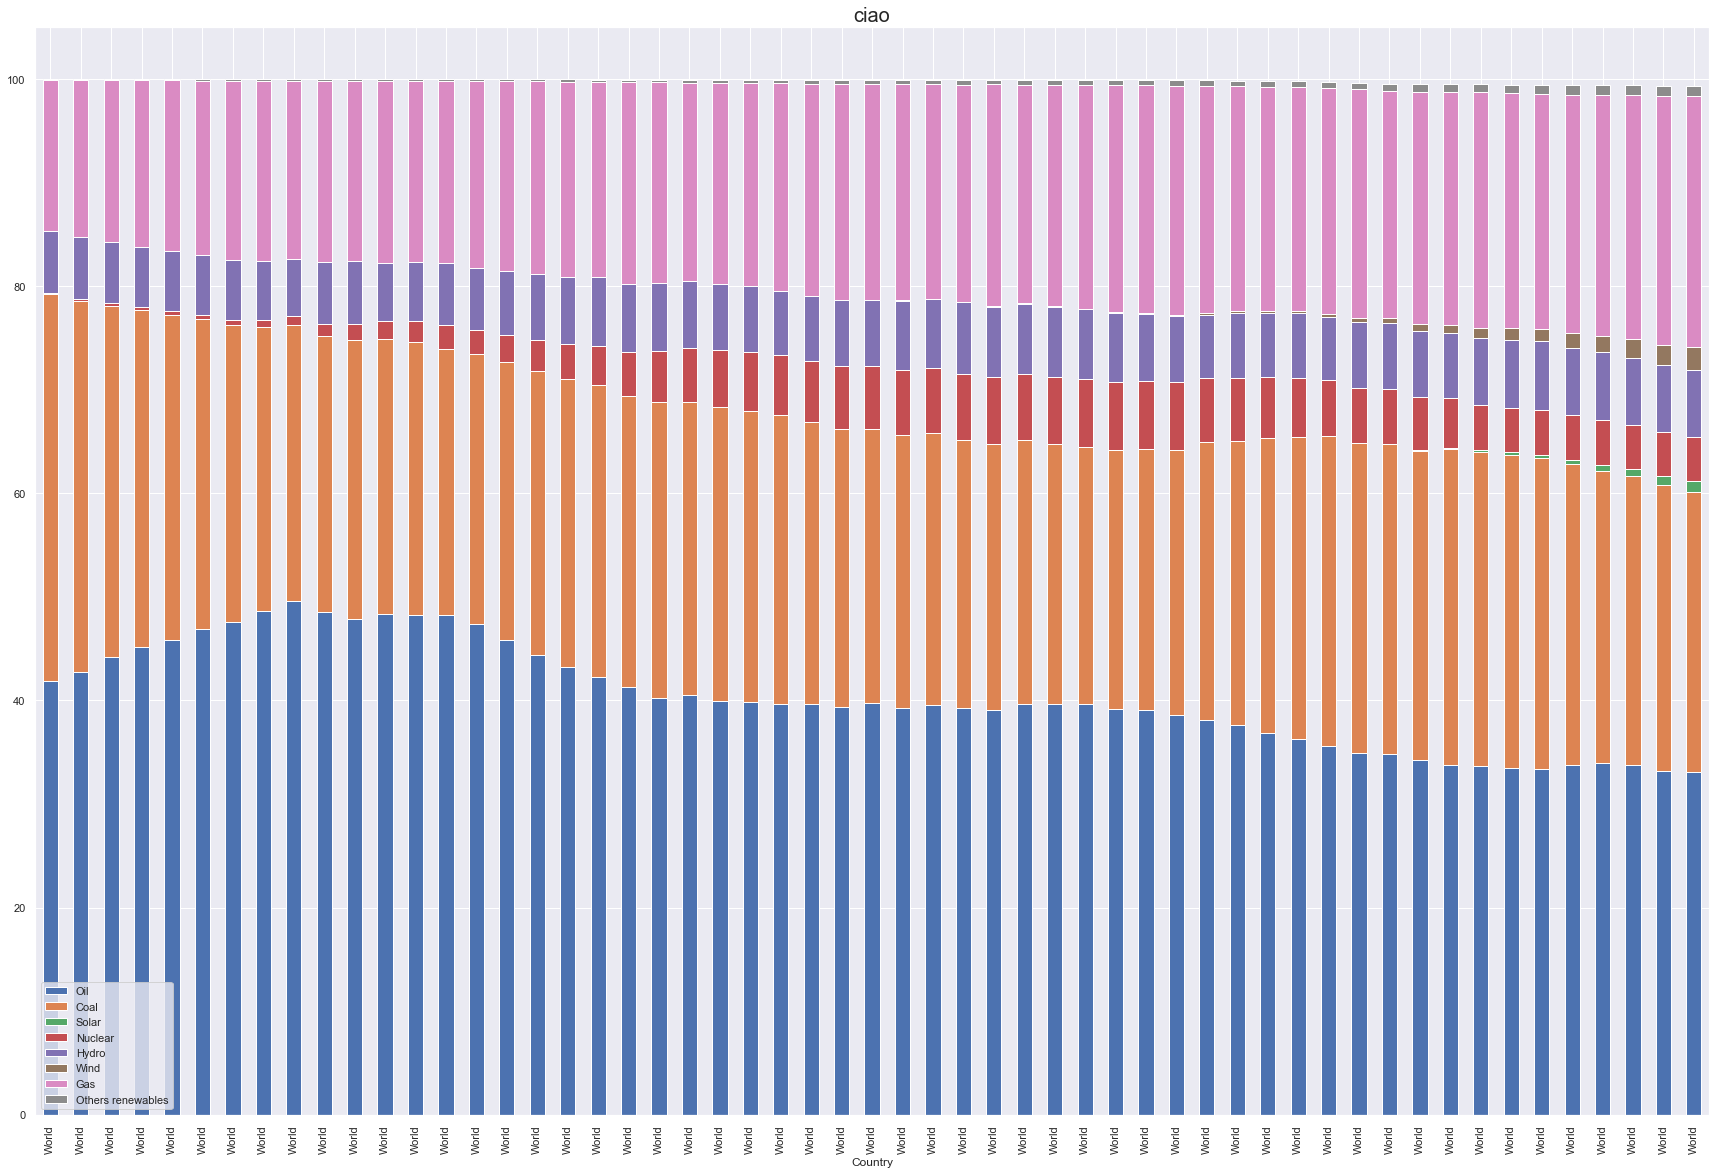

In [39]:
#bar plot data4 world in time(x: 1965 to 2019)

df_world= data45[data45.Country =='World']


df_world.plot.bar(x='Country', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')


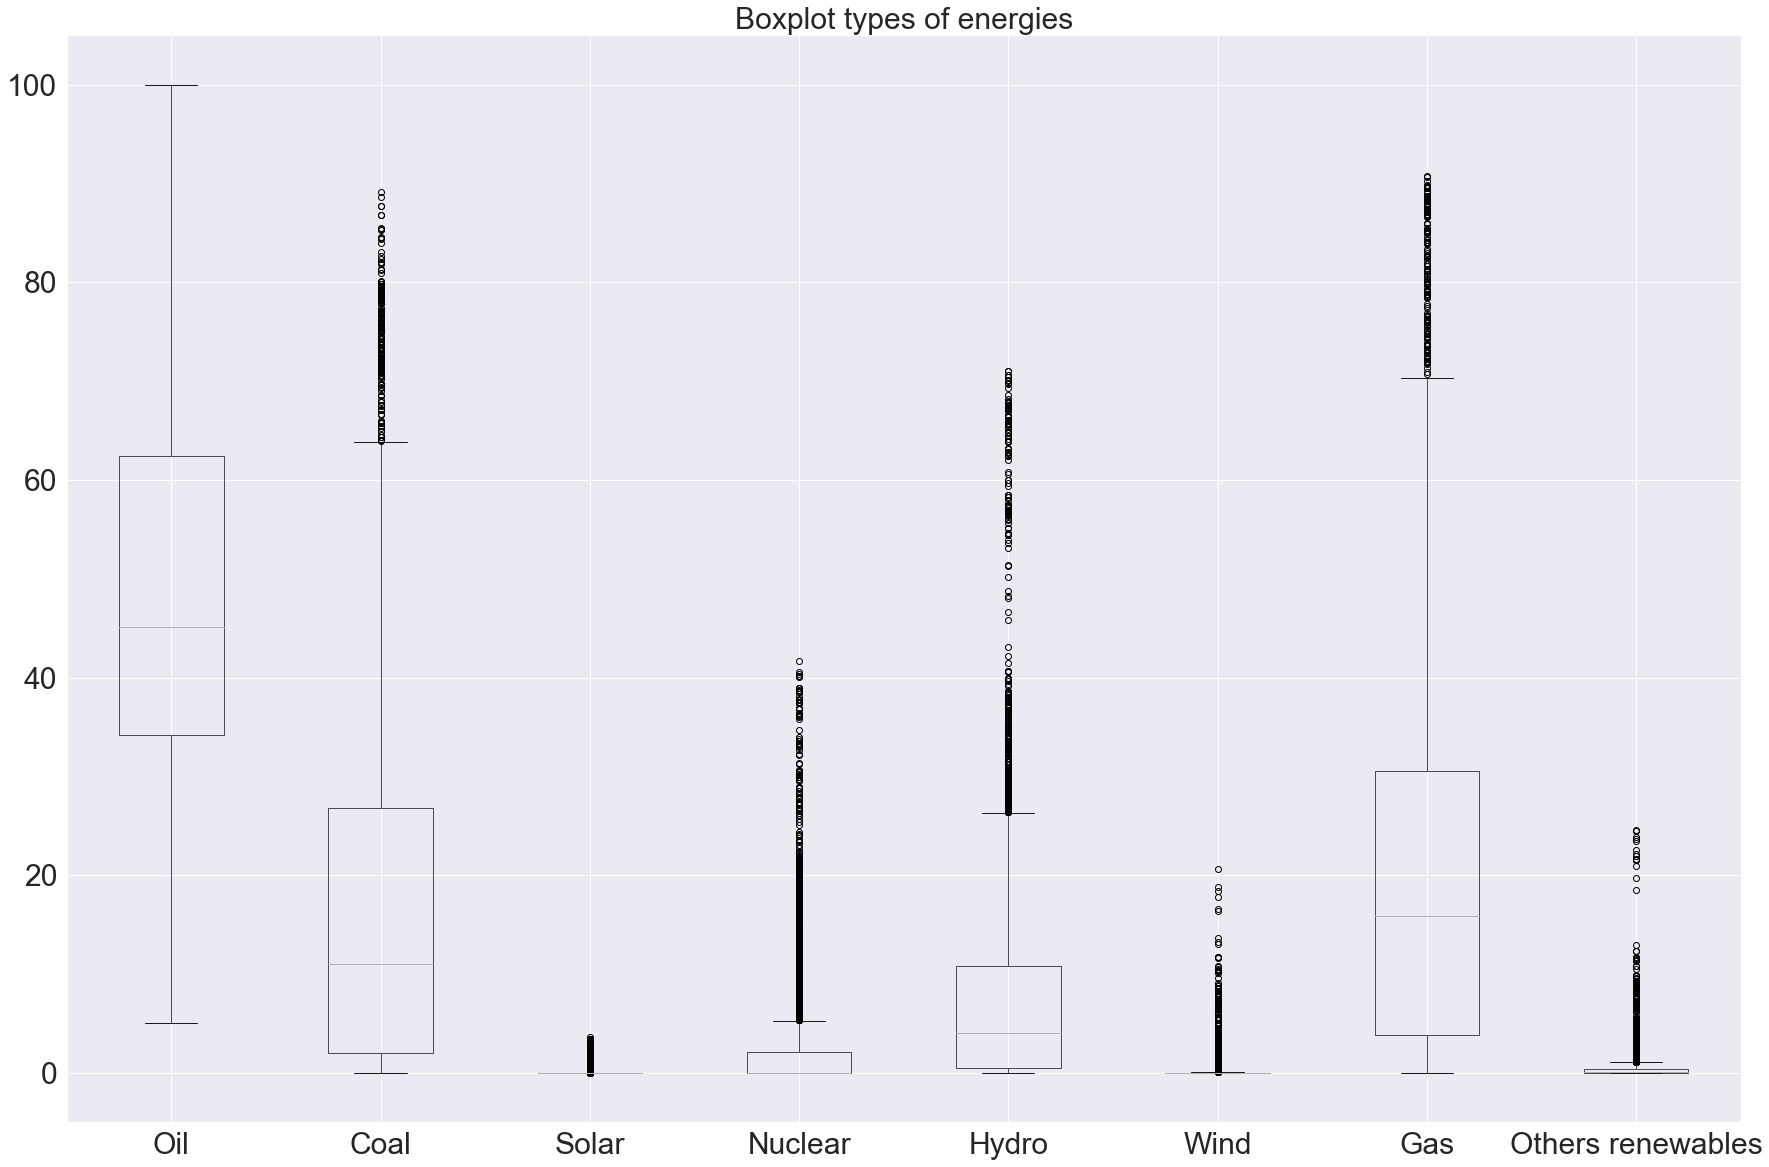

In [40]:
import matplotlib.pyplot as plt    

data45.boxplot(column=['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], fontsize= 30 , figsize= (30,20))
plt.title('Boxplot types of energies', fontsize= 30)
plt.show()


<Figure size 2160x1800 with 0 Axes>

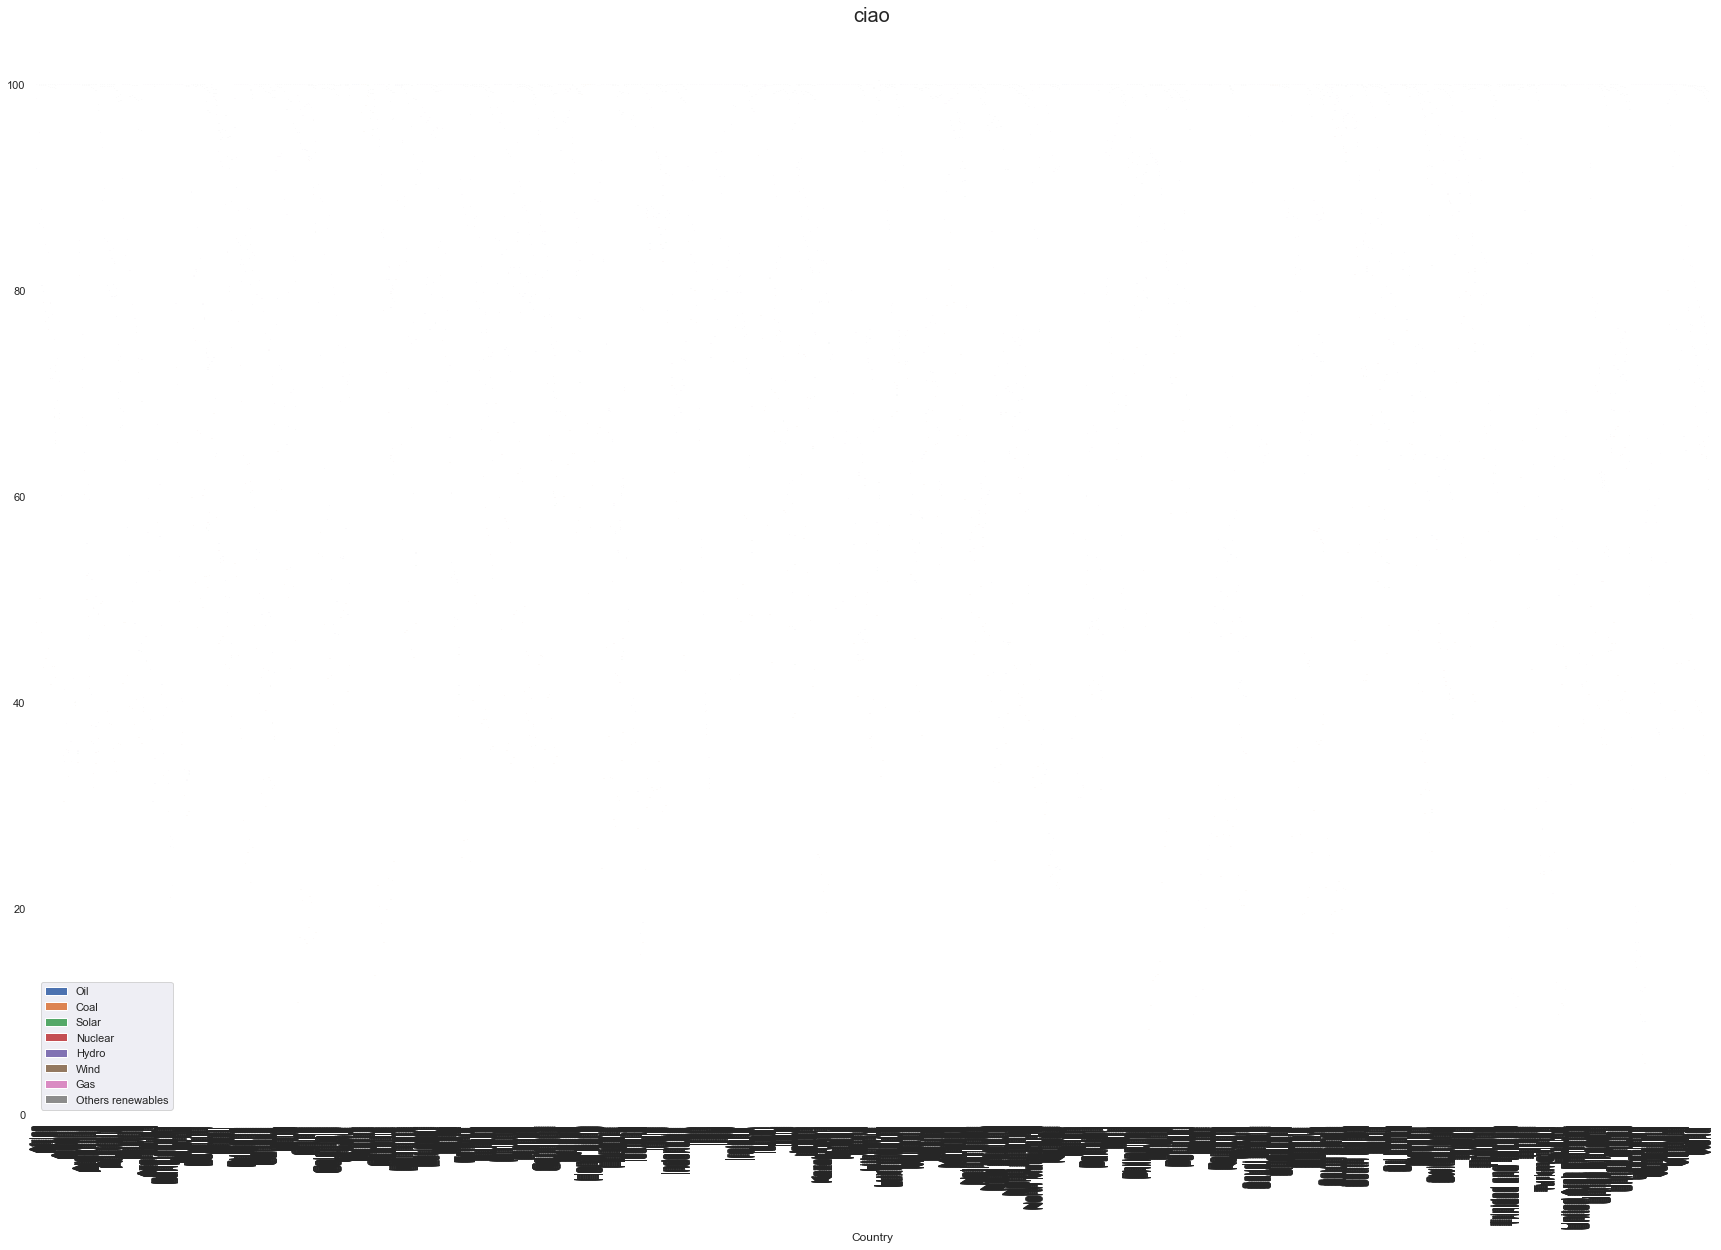

In [41]:
# stacked bar plot with the types of energy in each country

#plt.figure(figsize=(30,25))
#data45.plot.bar(x='Country', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')
#plt.show()

In [ ]:
# stacked bar plot with types of energy every year

#plt.figure(figsize=(30,25))
#data45.plot.bar(x='Year', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')
#plt.show()

# References 

# Contributions